In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
def loadData(path):
    listOfFiles = os.listdir(path='cifar-10-batches-py/')
    train = []
    train_labels = []
    print("Training files = ",listOfFiles[1:6])
    #For collecting Training data:
    for file in listOfFiles[1:6]:
        with open(path+file,'rb') as fo:
            dict = pickle.load(fo,encoding='bytes')
            train.append(dict[b'data'])
            train_labels.append(dict[b'labels'])

    dictData = {}
    dictData['train_data'] = np.reshape(np.array(train),newshape=(np.array(train).shape[0]*np.array(train).shape[1],np.array(train).shape[2]))
    dictData['train_labels'] = np.reshape(np.array(train_labels),newshape=(np.array(train_labels).shape[0]*np.array(train_labels).shape[1]))
    return dictData

In [3]:
#load dataset
dataset = loadData(path='cifar-10-batches-py/')


dataset['train_data'].shape[0]

Training files =  ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']


50000

In [4]:
#visualizing train sample
temp = dataset['train_data'][49000]
label = dataset['train_labels'][49000]

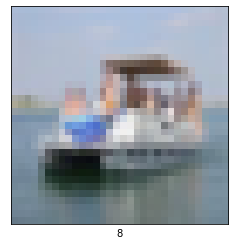

In [5]:
#representing RGB values
R = temp[0:1024].reshape(32,32)
G = np.reshape(temp[1024:2048],newshape=(32,32))
B = np.reshape(temp[2048:],newshape=(32,32))
temp = np.dstack((R,G,B))  
plt.imshow(temp)
plt.xticks([])
plt.yticks([])
plt.xlabel(label)
plt.show()


X_train, y_train= dataset['train_data'],dataset['train_labels']

In [6]:
#classifier:
class kNearestNeighbour(object):
    def __init__(self):
        pass
    
    def train(self,X,Y):
        #Knn will remember all of its training data
        self.Xtr = X
        self.Ytr = Y
        
    def predict(self,X,k):
       
        test_samples = X.shape[0]
        
        Ypred = np.zeros(test_samples,dtype=self.Ytr.dtype)
        
        #Calculating the l1 distance 
        for i in range(test_samples):
            print("Test example = ",i,end="\n")
            
            
            label_count = np.zeros(10,dtype=self.Ytr.dtype)    
            dist = np.sum(np.abs(X[i,:] - self.Xtr),axis=1)  #horizontally across columns
            
           
            idx = np.argpartition(dist,k)
            min_ind = idx[:k]
            
            #iterates over min_ind 
            #Max value at any index returned using np.argmax()
            for x in min_ind:
                label_count[int(self.Ytr[x])] +=1
            Ypred[i] = np.argmax(label_count)
    
    
        return Ypred



num_folds = 5
num_training = 50000

k_choices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

if num_training/num_folds % num_folds != 0.0:
    raise ValueError('Number of training examples not evenly divisible by number of folds.')

In [7]:
# Split training set
X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

In [8]:
# accuracy values that we found when using that value of k.
k_to_accuracies = {}

In [9]:
# Perform k-fold cross validation to find the best value of k
for k in range(1,20):
    k_to_accuracies[k] = []
    
for idx in range(num_folds):
    # Use bin with index idx as validation set
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0)
    y_train_set = np.concatenate((*y_train_folds[:idx], *y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx]
    y_validation_set = y_train_folds[idx]   
    num_validation_set = X_validation_set.shape[0]

    # Train kNN
    knn = kNearestNeighbour()
    knn.train(X_train_set, y_train_set)
 
    
    for k in k_choices:
        # Predict labels for validation set
        y_validation_pred = knn.predict(X_validation_set,k)
        # Check accuracy
        accuracy = (float(np.sum(np.equal(y_validation_pred, y_validation_set)))/num_validation_set)
        k_to_accuracies[k].append(accuracy)



Test example =  0
Test example =  1
Test example =  2
Test example =  3
Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test example =  15
Test example =  16
Test example =  17
Test example =  18
Test example =  19
Test example =  20
Test example =  21
Test example =  22
Test example =  23
Test example =  24
Test example =  25
Test example =  26
Test example =  27
Test example =  28
Test example =  29
Test example =  30
Test example =  31
Test example =  32
Test example =  33
Test example =  34
Test example =  35
Test example =  36
Test example =  37
Test example =  38
Test example =  39
Test example =  40
Test example =  41
Test example =  42
Test example =  43
Test example =  44
Test example =  45
Test example =  46
Test example =  47
Test example =  48
Test example =  49
Test example =  50
Test example =  51
Test example =  52
Tes

Test example =  416
Test example =  417
Test example =  418
Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431
Test example =  432
Test example =  433
Test example =  434
Test example =  435
Test example =  436
Test example =  437
Test example =  438
Test example =  439
Test example =  440
Test example =  441
Test example =  442
Test example =  443
Test example =  444
Test example =  445
Test example =  446
Test example =  447
Test example =  448
Test example =  449
Test example =  450
Test example =  451
Test example =  452
Test example =  453
Test example =  454
Test example =  455
Test example =  456
Test example =  457
Test example =  458
Test example =  459
Test example =  460
Test example =  461
Test example =  462
Test example =  463
Test example =  464
Test example =  465


Test example =  826
Test example =  827
Test example =  828
Test example =  829
Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842
Test example =  843
Test example =  844
Test example =  845
Test example =  846
Test example =  847
Test example =  848
Test example =  849
Test example =  850
Test example =  851
Test example =  852
Test example =  853
Test example =  854
Test example =  855
Test example =  856
Test example =  857
Test example =  858
Test example =  859
Test example =  860
Test example =  861
Test example =  862
Test example =  863
Test example =  864
Test example =  865
Test example =  866
Test example =  867
Test example =  868
Test example =  869
Test example =  870
Test example =  871
Test example =  872
Test example =  873
Test example =  874
Test example =  875


Test example =  1225
Test example =  1226
Test example =  1227
Test example =  1228
Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example =  1240
Test example =  1241
Test example =  1242
Test example =  1243
Test example =  1244
Test example =  1245
Test example =  1246
Test example =  1247
Test example =  1248
Test example =  1249
Test example =  1250
Test example =  1251
Test example =  1252
Test example =  1253
Test example =  1254
Test example =  1255
Test example =  1256
Test example =  1257
Test example =  1258
Test example =  1259
Test example =  1260
Test example =  1261
Test example =  1262
Test example =  1263
Test example =  1264
Test example =  1265
Test example =  1266
Test example =  1267
Test example =  1268
Test example =  1269
Test example =  1270
Test example =  1271
Test example 

Test example =  1616
Test example =  1617
Test example =  1618
Test example =  1619
Test example =  1620
Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example =  1631
Test example =  1632
Test example =  1633
Test example =  1634
Test example =  1635
Test example =  1636
Test example =  1637
Test example =  1638
Test example =  1639
Test example =  1640
Test example =  1641
Test example =  1642
Test example =  1643
Test example =  1644
Test example =  1645
Test example =  1646
Test example =  1647
Test example =  1648
Test example =  1649
Test example =  1650
Test example =  1651
Test example =  1652
Test example =  1653
Test example =  1654
Test example =  1655
Test example =  1656
Test example =  1657
Test example =  1658
Test example =  1659
Test example =  1660
Test example =  1661
Test example =  1662
Test example 

Test example =  2007
Test example =  2008
Test example =  2009
Test example =  2010
Test example =  2011
Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example =  2023
Test example =  2024
Test example =  2025
Test example =  2026
Test example =  2027
Test example =  2028
Test example =  2029
Test example =  2030
Test example =  2031
Test example =  2032
Test example =  2033
Test example =  2034
Test example =  2035
Test example =  2036
Test example =  2037
Test example =  2038
Test example =  2039
Test example =  2040
Test example =  2041
Test example =  2042
Test example =  2043
Test example =  2044
Test example =  2045
Test example =  2046
Test example =  2047
Test example =  2048
Test example =  2049
Test example =  2050
Test example =  2051
Test example =  2052
Test example =  2053
Test example 

Test example =  2398
Test example =  2399
Test example =  2400
Test example =  2401
Test example =  2402
Test example =  2403
Test example =  2404
Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example =  2416
Test example =  2417
Test example =  2418
Test example =  2419
Test example =  2420
Test example =  2421
Test example =  2422
Test example =  2423
Test example =  2424
Test example =  2425
Test example =  2426
Test example =  2427
Test example =  2428
Test example =  2429
Test example =  2430
Test example =  2431
Test example =  2432
Test example =  2433
Test example =  2434
Test example =  2435
Test example =  2436
Test example =  2437
Test example =  2438
Test example =  2439
Test example =  2440
Test example =  2441
Test example =  2442
Test example =  2443
Test example =  2444
Test example 

Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example =  2793
Test example =  2794
Test example =  2795
Test example =  2796
Test example =  2797
Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example =  2809
Test example =  2810
Test example =  2811
Test example =  2812
Test example =  2813
Test example =  2814
Test example =  2815
Test example =  2816
Test example =  2817
Test example =  2818
Test example =  2819
Test example =  2820
Test example =  2821
Test example =  2822
Test example =  2823
Test example =  2824
Test example =  2825
Test example =  2826
Test example =  2827
Test example =  2828
Test example =  2829
Test example =  2830
Test example =  2831
Test example =  2832
Test example =  2833
Test example =  2834
Test example =  2835
Test example 

Test example =  3180
Test example =  3181
Test example =  3182
Test example =  3183
Test example =  3184
Test example =  3185
Test example =  3186
Test example =  3187
Test example =  3188
Test example =  3189
Test example =  3190
Test example =  3191
Test example =  3192
Test example =  3193
Test example =  3194
Test example =  3195
Test example =  3196
Test example =  3197
Test example =  3198
Test example =  3199
Test example =  3200
Test example =  3201
Test example =  3202
Test example =  3203
Test example =  3204
Test example =  3205
Test example =  3206
Test example =  3207
Test example =  3208
Test example =  3209
Test example =  3210
Test example =  3211
Test example =  3212
Test example =  3213
Test example =  3214
Test example =  3215
Test example =  3216
Test example =  3217
Test example =  3218
Test example =  3219
Test example =  3220
Test example =  3221
Test example =  3222
Test example =  3223
Test example =  3224
Test example =  3225
Test example =  3226
Test example 

Test example =  3571
Test example =  3572
Test example =  3573
Test example =  3574
Test example =  3575
Test example =  3576
Test example =  3577
Test example =  3578
Test example =  3579
Test example =  3580
Test example =  3581
Test example =  3582
Test example =  3583
Test example =  3584
Test example =  3585
Test example =  3586
Test example =  3587
Test example =  3588
Test example =  3589
Test example =  3590
Test example =  3591
Test example =  3592
Test example =  3593
Test example =  3594
Test example =  3595
Test example =  3596
Test example =  3597
Test example =  3598
Test example =  3599
Test example =  3600
Test example =  3601
Test example =  3602
Test example =  3603
Test example =  3604
Test example =  3605
Test example =  3606
Test example =  3607
Test example =  3608
Test example =  3609
Test example =  3610
Test example =  3611
Test example =  3612
Test example =  3613
Test example =  3614
Test example =  3615
Test example =  3616
Test example =  3617
Test example 

Test example =  3962
Test example =  3963
Test example =  3964
Test example =  3965
Test example =  3966
Test example =  3967
Test example =  3968
Test example =  3969
Test example =  3970
Test example =  3971
Test example =  3972
Test example =  3973
Test example =  3974
Test example =  3975
Test example =  3976
Test example =  3977
Test example =  3978
Test example =  3979
Test example =  3980
Test example =  3981
Test example =  3982
Test example =  3983
Test example =  3984
Test example =  3985
Test example =  3986
Test example =  3987
Test example =  3988
Test example =  3989
Test example =  3990
Test example =  3991
Test example =  3992
Test example =  3993
Test example =  3994
Test example =  3995
Test example =  3996
Test example =  3997
Test example =  3998
Test example =  3999
Test example =  4000
Test example =  4001
Test example =  4002
Test example =  4003
Test example =  4004
Test example =  4005
Test example =  4006
Test example =  4007
Test example =  4008
Test example 

Test example =  4353
Test example =  4354
Test example =  4355
Test example =  4356
Test example =  4357
Test example =  4358
Test example =  4359
Test example =  4360
Test example =  4361
Test example =  4362
Test example =  4363
Test example =  4364
Test example =  4365
Test example =  4366
Test example =  4367
Test example =  4368
Test example =  4369
Test example =  4370
Test example =  4371
Test example =  4372
Test example =  4373
Test example =  4374
Test example =  4375
Test example =  4376
Test example =  4377
Test example =  4378
Test example =  4379
Test example =  4380
Test example =  4381
Test example =  4382
Test example =  4383
Test example =  4384
Test example =  4385
Test example =  4386
Test example =  4387
Test example =  4388
Test example =  4389
Test example =  4390
Test example =  4391
Test example =  4392
Test example =  4393
Test example =  4394
Test example =  4395
Test example =  4396
Test example =  4397
Test example =  4398
Test example =  4399
Test example 

Test example =  4744
Test example =  4745
Test example =  4746
Test example =  4747
Test example =  4748
Test example =  4749
Test example =  4750
Test example =  4751
Test example =  4752
Test example =  4753
Test example =  4754
Test example =  4755
Test example =  4756
Test example =  4757
Test example =  4758
Test example =  4759
Test example =  4760
Test example =  4761
Test example =  4762
Test example =  4763
Test example =  4764
Test example =  4765
Test example =  4766
Test example =  4767
Test example =  4768
Test example =  4769
Test example =  4770
Test example =  4771
Test example =  4772
Test example =  4773
Test example =  4774
Test example =  4775
Test example =  4776
Test example =  4777
Test example =  4778
Test example =  4779
Test example =  4780
Test example =  4781
Test example =  4782
Test example =  4783
Test example =  4784
Test example =  4785
Test example =  4786
Test example =  4787
Test example =  4788
Test example =  4789
Test example =  4790
Test example 

Test example =  5135
Test example =  5136
Test example =  5137
Test example =  5138
Test example =  5139
Test example =  5140
Test example =  5141
Test example =  5142
Test example =  5143
Test example =  5144
Test example =  5145
Test example =  5146
Test example =  5147
Test example =  5148
Test example =  5149
Test example =  5150
Test example =  5151
Test example =  5152
Test example =  5153
Test example =  5154
Test example =  5155
Test example =  5156
Test example =  5157
Test example =  5158
Test example =  5159
Test example =  5160
Test example =  5161
Test example =  5162
Test example =  5163
Test example =  5164
Test example =  5165
Test example =  5166
Test example =  5167
Test example =  5168
Test example =  5169
Test example =  5170
Test example =  5171
Test example =  5172
Test example =  5173
Test example =  5174
Test example =  5175
Test example =  5176
Test example =  5177
Test example =  5178
Test example =  5179
Test example =  5180
Test example =  5181
Test example 

Test example =  5526
Test example =  5527
Test example =  5528
Test example =  5529
Test example =  5530
Test example =  5531
Test example =  5532
Test example =  5533
Test example =  5534
Test example =  5535
Test example =  5536
Test example =  5537
Test example =  5538
Test example =  5539
Test example =  5540
Test example =  5541
Test example =  5542
Test example =  5543
Test example =  5544
Test example =  5545
Test example =  5546
Test example =  5547
Test example =  5548
Test example =  5549
Test example =  5550
Test example =  5551
Test example =  5552
Test example =  5553
Test example =  5554
Test example =  5555
Test example =  5556
Test example =  5557
Test example =  5558
Test example =  5559
Test example =  5560
Test example =  5561
Test example =  5562
Test example =  5563
Test example =  5564
Test example =  5565
Test example =  5566
Test example =  5567
Test example =  5568
Test example =  5569
Test example =  5570
Test example =  5571
Test example =  5572
Test example 

Test example =  5917
Test example =  5918
Test example =  5919
Test example =  5920
Test example =  5921
Test example =  5922
Test example =  5923
Test example =  5924
Test example =  5925
Test example =  5926
Test example =  5927
Test example =  5928
Test example =  5929
Test example =  5930
Test example =  5931
Test example =  5932
Test example =  5933
Test example =  5934
Test example =  5935
Test example =  5936
Test example =  5937
Test example =  5938
Test example =  5939
Test example =  5940
Test example =  5941
Test example =  5942
Test example =  5943
Test example =  5944
Test example =  5945
Test example =  5946
Test example =  5947
Test example =  5948
Test example =  5949
Test example =  5950
Test example =  5951
Test example =  5952
Test example =  5953
Test example =  5954
Test example =  5955
Test example =  5956
Test example =  5957
Test example =  5958
Test example =  5959
Test example =  5960
Test example =  5961
Test example =  5962
Test example =  5963
Test example 

Test example =  6308
Test example =  6309
Test example =  6310
Test example =  6311
Test example =  6312
Test example =  6313
Test example =  6314
Test example =  6315
Test example =  6316
Test example =  6317
Test example =  6318
Test example =  6319
Test example =  6320
Test example =  6321
Test example =  6322
Test example =  6323
Test example =  6324
Test example =  6325
Test example =  6326
Test example =  6327
Test example =  6328
Test example =  6329
Test example =  6330
Test example =  6331
Test example =  6332
Test example =  6333
Test example =  6334
Test example =  6335
Test example =  6336
Test example =  6337
Test example =  6338
Test example =  6339
Test example =  6340
Test example =  6341
Test example =  6342
Test example =  6343
Test example =  6344
Test example =  6345
Test example =  6346
Test example =  6347
Test example =  6348
Test example =  6349
Test example =  6350
Test example =  6351
Test example =  6352
Test example =  6353
Test example =  6354
Test example 

Test example =  6699
Test example =  6700
Test example =  6701
Test example =  6702
Test example =  6703
Test example =  6704
Test example =  6705
Test example =  6706
Test example =  6707
Test example =  6708
Test example =  6709
Test example =  6710
Test example =  6711
Test example =  6712
Test example =  6713
Test example =  6714
Test example =  6715
Test example =  6716
Test example =  6717
Test example =  6718
Test example =  6719
Test example =  6720
Test example =  6721
Test example =  6722
Test example =  6723
Test example =  6724
Test example =  6725
Test example =  6726
Test example =  6727
Test example =  6728
Test example =  6729
Test example =  6730
Test example =  6731
Test example =  6732
Test example =  6733
Test example =  6734
Test example =  6735
Test example =  6736
Test example =  6737
Test example =  6738
Test example =  6739
Test example =  6740
Test example =  6741
Test example =  6742
Test example =  6743
Test example =  6744
Test example =  6745
Test example 

Test example =  7090
Test example =  7091
Test example =  7092
Test example =  7093
Test example =  7094
Test example =  7095
Test example =  7096
Test example =  7097
Test example =  7098
Test example =  7099
Test example =  7100
Test example =  7101
Test example =  7102
Test example =  7103
Test example =  7104
Test example =  7105
Test example =  7106
Test example =  7107
Test example =  7108
Test example =  7109
Test example =  7110
Test example =  7111
Test example =  7112
Test example =  7113
Test example =  7114
Test example =  7115
Test example =  7116
Test example =  7117
Test example =  7118
Test example =  7119
Test example =  7120
Test example =  7121
Test example =  7122
Test example =  7123
Test example =  7124
Test example =  7125
Test example =  7126
Test example =  7127
Test example =  7128
Test example =  7129
Test example =  7130
Test example =  7131
Test example =  7132
Test example =  7133
Test example =  7134
Test example =  7135
Test example =  7136
Test example 

Test example =  7481
Test example =  7482
Test example =  7483
Test example =  7484
Test example =  7485
Test example =  7486
Test example =  7487
Test example =  7488
Test example =  7489
Test example =  7490
Test example =  7491
Test example =  7492
Test example =  7493
Test example =  7494
Test example =  7495
Test example =  7496
Test example =  7497
Test example =  7498
Test example =  7499
Test example =  7500
Test example =  7501
Test example =  7502
Test example =  7503
Test example =  7504
Test example =  7505
Test example =  7506
Test example =  7507
Test example =  7508
Test example =  7509
Test example =  7510
Test example =  7511
Test example =  7512
Test example =  7513
Test example =  7514
Test example =  7515
Test example =  7516
Test example =  7517
Test example =  7518
Test example =  7519
Test example =  7520
Test example =  7521
Test example =  7522
Test example =  7523
Test example =  7524
Test example =  7525
Test example =  7526
Test example =  7527
Test example 

Test example =  7872
Test example =  7873
Test example =  7874
Test example =  7875
Test example =  7876
Test example =  7877
Test example =  7878
Test example =  7879
Test example =  7880
Test example =  7881
Test example =  7882
Test example =  7883
Test example =  7884
Test example =  7885
Test example =  7886
Test example =  7887
Test example =  7888
Test example =  7889
Test example =  7890
Test example =  7891
Test example =  7892
Test example =  7893
Test example =  7894
Test example =  7895
Test example =  7896
Test example =  7897
Test example =  7898
Test example =  7899
Test example =  7900
Test example =  7901
Test example =  7902
Test example =  7903
Test example =  7904
Test example =  7905
Test example =  7906
Test example =  7907
Test example =  7908
Test example =  7909
Test example =  7910
Test example =  7911
Test example =  7912
Test example =  7913
Test example =  7914
Test example =  7915
Test example =  7916
Test example =  7917
Test example =  7918
Test example 

Test example =  8263
Test example =  8264
Test example =  8265
Test example =  8266
Test example =  8267
Test example =  8268
Test example =  8269
Test example =  8270
Test example =  8271
Test example =  8272
Test example =  8273
Test example =  8274
Test example =  8275
Test example =  8276
Test example =  8277
Test example =  8278
Test example =  8279
Test example =  8280
Test example =  8281
Test example =  8282
Test example =  8283
Test example =  8284
Test example =  8285
Test example =  8286
Test example =  8287
Test example =  8288
Test example =  8289
Test example =  8290
Test example =  8291
Test example =  8292
Test example =  8293
Test example =  8294
Test example =  8295
Test example =  8296
Test example =  8297
Test example =  8298
Test example =  8299
Test example =  8300
Test example =  8301
Test example =  8302
Test example =  8303
Test example =  8304
Test example =  8305
Test example =  8306
Test example =  8307
Test example =  8308
Test example =  8309
Test example 

Test example =  8654
Test example =  8655
Test example =  8656
Test example =  8657
Test example =  8658
Test example =  8659
Test example =  8660
Test example =  8661
Test example =  8662
Test example =  8663
Test example =  8664
Test example =  8665
Test example =  8666
Test example =  8667
Test example =  8668
Test example =  8669
Test example =  8670
Test example =  8671
Test example =  8672
Test example =  8673
Test example =  8674
Test example =  8675
Test example =  8676
Test example =  8677
Test example =  8678
Test example =  8679
Test example =  8680
Test example =  8681
Test example =  8682
Test example =  8683
Test example =  8684
Test example =  8685
Test example =  8686
Test example =  8687
Test example =  8688
Test example =  8689
Test example =  8690
Test example =  8691
Test example =  8692
Test example =  8693
Test example =  8694
Test example =  8695
Test example =  8696
Test example =  8697
Test example =  8698
Test example =  8699
Test example =  8700
Test example 

Test example =  9045
Test example =  9046
Test example =  9047
Test example =  9048
Test example =  9049
Test example =  9050
Test example =  9051
Test example =  9052
Test example =  9053
Test example =  9054
Test example =  9055
Test example =  9056
Test example =  9057
Test example =  9058
Test example =  9059
Test example =  9060
Test example =  9061
Test example =  9062
Test example =  9063
Test example =  9064
Test example =  9065
Test example =  9066
Test example =  9067
Test example =  9068
Test example =  9069
Test example =  9070
Test example =  9071
Test example =  9072
Test example =  9073
Test example =  9074
Test example =  9075
Test example =  9076
Test example =  9077
Test example =  9078
Test example =  9079
Test example =  9080
Test example =  9081
Test example =  9082
Test example =  9083
Test example =  9084
Test example =  9085
Test example =  9086
Test example =  9087
Test example =  9088
Test example =  9089
Test example =  9090
Test example =  9091
Test example 

Test example =  9436
Test example =  9437
Test example =  9438
Test example =  9439
Test example =  9440
Test example =  9441
Test example =  9442
Test example =  9443
Test example =  9444
Test example =  9445
Test example =  9446
Test example =  9447
Test example =  9448
Test example =  9449
Test example =  9450
Test example =  9451
Test example =  9452
Test example =  9453
Test example =  9454
Test example =  9455
Test example =  9456
Test example =  9457
Test example =  9458
Test example =  9459
Test example =  9460
Test example =  9461
Test example =  9462
Test example =  9463
Test example =  9464
Test example =  9465
Test example =  9466
Test example =  9467
Test example =  9468
Test example =  9469
Test example =  9470
Test example =  9471
Test example =  9472
Test example =  9473
Test example =  9474
Test example =  9475
Test example =  9476
Test example =  9477
Test example =  9478
Test example =  9479
Test example =  9480
Test example =  9481
Test example =  9482
Test example 

Test example =  9827
Test example =  9828
Test example =  9829
Test example =  9830
Test example =  9831
Test example =  9832
Test example =  9833
Test example =  9834
Test example =  9835
Test example =  9836
Test example =  9837
Test example =  9838
Test example =  9839
Test example =  9840
Test example =  9841
Test example =  9842
Test example =  9843
Test example =  9844
Test example =  9845
Test example =  9846
Test example =  9847
Test example =  9848
Test example =  9849
Test example =  9850
Test example =  9851
Test example =  9852
Test example =  9853
Test example =  9854
Test example =  9855
Test example =  9856
Test example =  9857
Test example =  9858
Test example =  9859
Test example =  9860
Test example =  9861
Test example =  9862
Test example =  9863
Test example =  9864
Test example =  9865
Test example =  9866
Test example =  9867
Test example =  9868
Test example =  9869
Test example =  9870
Test example =  9871
Test example =  9872
Test example =  9873
Test example 

Test example =  234
Test example =  235
Test example =  236
Test example =  237
Test example =  238
Test example =  239
Test example =  240
Test example =  241
Test example =  242
Test example =  243
Test example =  244
Test example =  245
Test example =  246
Test example =  247
Test example =  248
Test example =  249
Test example =  250
Test example =  251
Test example =  252
Test example =  253
Test example =  254
Test example =  255
Test example =  256
Test example =  257
Test example =  258
Test example =  259
Test example =  260
Test example =  261
Test example =  262
Test example =  263
Test example =  264
Test example =  265
Test example =  266
Test example =  267
Test example =  268
Test example =  269
Test example =  270
Test example =  271
Test example =  272
Test example =  273
Test example =  274
Test example =  275
Test example =  276
Test example =  277
Test example =  278
Test example =  279
Test example =  280
Test example =  281
Test example =  282
Test example =  283


Test example =  644
Test example =  645
Test example =  646
Test example =  647
Test example =  648
Test example =  649
Test example =  650
Test example =  651
Test example =  652
Test example =  653
Test example =  654
Test example =  655
Test example =  656
Test example =  657
Test example =  658
Test example =  659
Test example =  660
Test example =  661
Test example =  662
Test example =  663
Test example =  664
Test example =  665
Test example =  666
Test example =  667
Test example =  668
Test example =  669
Test example =  670
Test example =  671
Test example =  672
Test example =  673
Test example =  674
Test example =  675
Test example =  676
Test example =  677
Test example =  678
Test example =  679
Test example =  680
Test example =  681
Test example =  682
Test example =  683
Test example =  684
Test example =  685
Test example =  686
Test example =  687
Test example =  688
Test example =  689
Test example =  690
Test example =  691
Test example =  692
Test example =  693


Test example =  1052
Test example =  1053
Test example =  1054
Test example =  1055
Test example =  1056
Test example =  1057
Test example =  1058
Test example =  1059
Test example =  1060
Test example =  1061
Test example =  1062
Test example =  1063
Test example =  1064
Test example =  1065
Test example =  1066
Test example =  1067
Test example =  1068
Test example =  1069
Test example =  1070
Test example =  1071
Test example =  1072
Test example =  1073
Test example =  1074
Test example =  1075
Test example =  1076
Test example =  1077
Test example =  1078
Test example =  1079
Test example =  1080
Test example =  1081
Test example =  1082
Test example =  1083
Test example =  1084
Test example =  1085
Test example =  1086
Test example =  1087
Test example =  1088
Test example =  1089
Test example =  1090
Test example =  1091
Test example =  1092
Test example =  1093
Test example =  1094
Test example =  1095
Test example =  1096
Test example =  1097
Test example =  1098
Test example 

Test example =  1443
Test example =  1444
Test example =  1445
Test example =  1446
Test example =  1447
Test example =  1448
Test example =  1449
Test example =  1450
Test example =  1451
Test example =  1452
Test example =  1453
Test example =  1454
Test example =  1455
Test example =  1456
Test example =  1457
Test example =  1458
Test example =  1459
Test example =  1460
Test example =  1461
Test example =  1462
Test example =  1463
Test example =  1464
Test example =  1465
Test example =  1466
Test example =  1467
Test example =  1468
Test example =  1469
Test example =  1470
Test example =  1471
Test example =  1472
Test example =  1473
Test example =  1474
Test example =  1475
Test example =  1476
Test example =  1477
Test example =  1478
Test example =  1479
Test example =  1480
Test example =  1481
Test example =  1482
Test example =  1483
Test example =  1484
Test example =  1485
Test example =  1486
Test example =  1487
Test example =  1488
Test example =  1489
Test example 

Test example =  1834
Test example =  1835
Test example =  1836
Test example =  1837
Test example =  1838
Test example =  1839
Test example =  1840
Test example =  1841
Test example =  1842
Test example =  1843
Test example =  1844
Test example =  1845
Test example =  1846
Test example =  1847
Test example =  1848
Test example =  1849
Test example =  1850
Test example =  1851
Test example =  1852
Test example =  1853
Test example =  1854
Test example =  1855
Test example =  1856
Test example =  1857
Test example =  1858
Test example =  1859
Test example =  1860
Test example =  1861
Test example =  1862
Test example =  1863
Test example =  1864
Test example =  1865
Test example =  1866
Test example =  1867
Test example =  1868
Test example =  1869
Test example =  1870
Test example =  1871
Test example =  1872
Test example =  1873
Test example =  1874
Test example =  1875
Test example =  1876
Test example =  1877
Test example =  1878
Test example =  1879
Test example =  1880
Test example 

Test example =  2225
Test example =  2226
Test example =  2227
Test example =  2228
Test example =  2229
Test example =  2230
Test example =  2231
Test example =  2232
Test example =  2233
Test example =  2234
Test example =  2235
Test example =  2236
Test example =  2237
Test example =  2238
Test example =  2239
Test example =  2240
Test example =  2241
Test example =  2242
Test example =  2243
Test example =  2244
Test example =  2245
Test example =  2246
Test example =  2247
Test example =  2248
Test example =  2249
Test example =  2250
Test example =  2251
Test example =  2252
Test example =  2253
Test example =  2254
Test example =  2255
Test example =  2256
Test example =  2257
Test example =  2258
Test example =  2259
Test example =  2260
Test example =  2261
Test example =  2262
Test example =  2263
Test example =  2264
Test example =  2265
Test example =  2266
Test example =  2267
Test example =  2268
Test example =  2269
Test example =  2270
Test example =  2271
Test example 

Test example =  2616
Test example =  2617
Test example =  2618
Test example =  2619
Test example =  2620
Test example =  2621
Test example =  2622
Test example =  2623
Test example =  2624
Test example =  2625
Test example =  2626
Test example =  2627
Test example =  2628
Test example =  2629
Test example =  2630
Test example =  2631
Test example =  2632
Test example =  2633
Test example =  2634
Test example =  2635
Test example =  2636
Test example =  2637
Test example =  2638
Test example =  2639
Test example =  2640
Test example =  2641
Test example =  2642
Test example =  2643
Test example =  2644
Test example =  2645
Test example =  2646
Test example =  2647
Test example =  2648
Test example =  2649
Test example =  2650
Test example =  2651
Test example =  2652
Test example =  2653
Test example =  2654
Test example =  2655
Test example =  2656
Test example =  2657
Test example =  2658
Test example =  2659
Test example =  2660
Test example =  2661
Test example =  2662
Test example 

Test example =  3007
Test example =  3008
Test example =  3009
Test example =  3010
Test example =  3011
Test example =  3012
Test example =  3013
Test example =  3014
Test example =  3015
Test example =  3016
Test example =  3017
Test example =  3018
Test example =  3019
Test example =  3020
Test example =  3021
Test example =  3022
Test example =  3023
Test example =  3024
Test example =  3025
Test example =  3026
Test example =  3027
Test example =  3028
Test example =  3029
Test example =  3030
Test example =  3031
Test example =  3032
Test example =  3033
Test example =  3034
Test example =  3035
Test example =  3036
Test example =  3037
Test example =  3038
Test example =  3039
Test example =  3040
Test example =  3041
Test example =  3042
Test example =  3043
Test example =  3044
Test example =  3045
Test example =  3046
Test example =  3047
Test example =  3048
Test example =  3049
Test example =  3050
Test example =  3051
Test example =  3052
Test example =  3053
Test example 

Test example =  3398
Test example =  3399
Test example =  3400
Test example =  3401
Test example =  3402
Test example =  3403
Test example =  3404
Test example =  3405
Test example =  3406
Test example =  3407
Test example =  3408
Test example =  3409
Test example =  3410
Test example =  3411
Test example =  3412
Test example =  3413
Test example =  3414
Test example =  3415
Test example =  3416
Test example =  3417
Test example =  3418
Test example =  3419
Test example =  3420
Test example =  3421
Test example =  3422
Test example =  3423
Test example =  3424
Test example =  3425
Test example =  3426
Test example =  3427
Test example =  3428
Test example =  3429
Test example =  3430
Test example =  3431
Test example =  3432
Test example =  3433
Test example =  3434
Test example =  3435
Test example =  3436
Test example =  3437
Test example =  3438
Test example =  3439
Test example =  3440
Test example =  3441
Test example =  3442
Test example =  3443
Test example =  3444
Test example 

Test example =  3789
Test example =  3790
Test example =  3791
Test example =  3792
Test example =  3793
Test example =  3794
Test example =  3795
Test example =  3796
Test example =  3797
Test example =  3798
Test example =  3799
Test example =  3800
Test example =  3801
Test example =  3802
Test example =  3803
Test example =  3804
Test example =  3805
Test example =  3806
Test example =  3807
Test example =  3808
Test example =  3809
Test example =  3810
Test example =  3811
Test example =  3812
Test example =  3813
Test example =  3814
Test example =  3815
Test example =  3816
Test example =  3817
Test example =  3818
Test example =  3819
Test example =  3820
Test example =  3821
Test example =  3822
Test example =  3823
Test example =  3824
Test example =  3825
Test example =  3826
Test example =  3827
Test example =  3828
Test example =  3829
Test example =  3830
Test example =  3831
Test example =  3832
Test example =  3833
Test example =  3834
Test example =  3835
Test example 

Test example =  4180
Test example =  4181
Test example =  4182
Test example =  4183
Test example =  4184
Test example =  4185
Test example =  4186
Test example =  4187
Test example =  4188
Test example =  4189
Test example =  4190
Test example =  4191
Test example =  4192
Test example =  4193
Test example =  4194
Test example =  4195
Test example =  4196
Test example =  4197
Test example =  4198
Test example =  4199
Test example =  4200
Test example =  4201
Test example =  4202
Test example =  4203
Test example =  4204
Test example =  4205
Test example =  4206
Test example =  4207
Test example =  4208
Test example =  4209
Test example =  4210
Test example =  4211
Test example =  4212
Test example =  4213
Test example =  4214
Test example =  4215
Test example =  4216
Test example =  4217
Test example =  4218
Test example =  4219
Test example =  4220
Test example =  4221
Test example =  4222
Test example =  4223
Test example =  4224
Test example =  4225
Test example =  4226
Test example 

Test example =  4571
Test example =  4572
Test example =  4573
Test example =  4574
Test example =  4575
Test example =  4576
Test example =  4577
Test example =  4578
Test example =  4579
Test example =  4580
Test example =  4581
Test example =  4582
Test example =  4583
Test example =  4584
Test example =  4585
Test example =  4586
Test example =  4587
Test example =  4588
Test example =  4589
Test example =  4590
Test example =  4591
Test example =  4592
Test example =  4593
Test example =  4594
Test example =  4595
Test example =  4596
Test example =  4597
Test example =  4598
Test example =  4599
Test example =  4600
Test example =  4601
Test example =  4602
Test example =  4603
Test example =  4604
Test example =  4605
Test example =  4606
Test example =  4607
Test example =  4608
Test example =  4609
Test example =  4610
Test example =  4611
Test example =  4612
Test example =  4613
Test example =  4614
Test example =  4615
Test example =  4616
Test example =  4617
Test example 

Test example =  4962
Test example =  4963
Test example =  4964
Test example =  4965
Test example =  4966
Test example =  4967
Test example =  4968
Test example =  4969
Test example =  4970
Test example =  4971
Test example =  4972
Test example =  4973
Test example =  4974
Test example =  4975
Test example =  4976
Test example =  4977
Test example =  4978
Test example =  4979
Test example =  4980
Test example =  4981
Test example =  4982
Test example =  4983
Test example =  4984
Test example =  4985
Test example =  4986
Test example =  4987
Test example =  4988
Test example =  4989
Test example =  4990
Test example =  4991
Test example =  4992
Test example =  4993
Test example =  4994
Test example =  4995
Test example =  4996
Test example =  4997
Test example =  4998
Test example =  4999
Test example =  5000
Test example =  5001
Test example =  5002
Test example =  5003
Test example =  5004
Test example =  5005
Test example =  5006
Test example =  5007
Test example =  5008
Test example 

Test example =  5353
Test example =  5354
Test example =  5355
Test example =  5356
Test example =  5357
Test example =  5358
Test example =  5359
Test example =  5360
Test example =  5361
Test example =  5362
Test example =  5363
Test example =  5364
Test example =  5365
Test example =  5366
Test example =  5367
Test example =  5368
Test example =  5369
Test example =  5370
Test example =  5371
Test example =  5372
Test example =  5373
Test example =  5374
Test example =  5375
Test example =  5376
Test example =  5377
Test example =  5378
Test example =  5379
Test example =  5380
Test example =  5381
Test example =  5382
Test example =  5383
Test example =  5384
Test example =  5385
Test example =  5386
Test example =  5387
Test example =  5388
Test example =  5389
Test example =  5390
Test example =  5391
Test example =  5392
Test example =  5393
Test example =  5394
Test example =  5395
Test example =  5396
Test example =  5397
Test example =  5398
Test example =  5399
Test example 

Test example =  5744
Test example =  5745
Test example =  5746
Test example =  5747
Test example =  5748
Test example =  5749
Test example =  5750
Test example =  5751
Test example =  5752
Test example =  5753
Test example =  5754
Test example =  5755
Test example =  5756
Test example =  5757
Test example =  5758
Test example =  5759
Test example =  5760
Test example =  5761
Test example =  5762
Test example =  5763
Test example =  5764
Test example =  5765
Test example =  5766
Test example =  5767
Test example =  5768
Test example =  5769
Test example =  5770
Test example =  5771
Test example =  5772
Test example =  5773
Test example =  5774
Test example =  5775
Test example =  5776
Test example =  5777
Test example =  5778
Test example =  5779
Test example =  5780
Test example =  5781
Test example =  5782
Test example =  5783
Test example =  5784
Test example =  5785
Test example =  5786
Test example =  5787
Test example =  5788
Test example =  5789
Test example =  5790
Test example 

Test example =  6135
Test example =  6136
Test example =  6137
Test example =  6138
Test example =  6139
Test example =  6140
Test example =  6141
Test example =  6142
Test example =  6143
Test example =  6144
Test example =  6145
Test example =  6146
Test example =  6147
Test example =  6148
Test example =  6149
Test example =  6150
Test example =  6151
Test example =  6152
Test example =  6153
Test example =  6154
Test example =  6155
Test example =  6156
Test example =  6157
Test example =  6158
Test example =  6159
Test example =  6160
Test example =  6161
Test example =  6162
Test example =  6163
Test example =  6164
Test example =  6165
Test example =  6166
Test example =  6167
Test example =  6168
Test example =  6169
Test example =  6170
Test example =  6171
Test example =  6172
Test example =  6173
Test example =  6174
Test example =  6175
Test example =  6176
Test example =  6177
Test example =  6178
Test example =  6179
Test example =  6180
Test example =  6181
Test example 

Test example =  6526
Test example =  6527
Test example =  6528
Test example =  6529
Test example =  6530
Test example =  6531
Test example =  6532
Test example =  6533
Test example =  6534
Test example =  6535
Test example =  6536
Test example =  6537
Test example =  6538
Test example =  6539
Test example =  6540
Test example =  6541
Test example =  6542
Test example =  6543
Test example =  6544
Test example =  6545
Test example =  6546
Test example =  6547
Test example =  6548
Test example =  6549
Test example =  6550
Test example =  6551
Test example =  6552
Test example =  6553
Test example =  6554
Test example =  6555
Test example =  6556
Test example =  6557
Test example =  6558
Test example =  6559
Test example =  6560
Test example =  6561
Test example =  6562
Test example =  6563
Test example =  6564
Test example =  6565
Test example =  6566
Test example =  6567
Test example =  6568
Test example =  6569
Test example =  6570
Test example =  6571
Test example =  6572
Test example 

Test example =  6917
Test example =  6918
Test example =  6919
Test example =  6920
Test example =  6921
Test example =  6922
Test example =  6923
Test example =  6924
Test example =  6925
Test example =  6926
Test example =  6927
Test example =  6928
Test example =  6929
Test example =  6930
Test example =  6931
Test example =  6932
Test example =  6933
Test example =  6934
Test example =  6935
Test example =  6936
Test example =  6937
Test example =  6938
Test example =  6939
Test example =  6940
Test example =  6941
Test example =  6942
Test example =  6943
Test example =  6944
Test example =  6945
Test example =  6946
Test example =  6947
Test example =  6948
Test example =  6949
Test example =  6950
Test example =  6951
Test example =  6952
Test example =  6953
Test example =  6954
Test example =  6955
Test example =  6956
Test example =  6957
Test example =  6958
Test example =  6959
Test example =  6960
Test example =  6961
Test example =  6962
Test example =  6963
Test example 

Test example =  7308
Test example =  7309
Test example =  7310
Test example =  7311
Test example =  7312
Test example =  7313
Test example =  7314
Test example =  7315
Test example =  7316
Test example =  7317
Test example =  7318
Test example =  7319
Test example =  7320
Test example =  7321
Test example =  7322
Test example =  7323
Test example =  7324
Test example =  7325
Test example =  7326
Test example =  7327
Test example =  7328
Test example =  7329
Test example =  7330
Test example =  7331
Test example =  7332
Test example =  7333
Test example =  7334
Test example =  7335
Test example =  7336
Test example =  7337
Test example =  7338
Test example =  7339
Test example =  7340
Test example =  7341
Test example =  7342
Test example =  7343
Test example =  7344
Test example =  7345
Test example =  7346
Test example =  7347
Test example =  7348
Test example =  7349
Test example =  7350
Test example =  7351
Test example =  7352
Test example =  7353
Test example =  7354
Test example 

Test example =  7699
Test example =  7700
Test example =  7701
Test example =  7702
Test example =  7703
Test example =  7704
Test example =  7705
Test example =  7706
Test example =  7707
Test example =  7708
Test example =  7709
Test example =  7710
Test example =  7711
Test example =  7712
Test example =  7713
Test example =  7714
Test example =  7715
Test example =  7716
Test example =  7717
Test example =  7718
Test example =  7719
Test example =  7720
Test example =  7721
Test example =  7722
Test example =  7723
Test example =  7724
Test example =  7725
Test example =  7726
Test example =  7727
Test example =  7728
Test example =  7729
Test example =  7730
Test example =  7731
Test example =  7732
Test example =  7733
Test example =  7734
Test example =  7735
Test example =  7736
Test example =  7737
Test example =  7738
Test example =  7739
Test example =  7740
Test example =  7741
Test example =  7742
Test example =  7743
Test example =  7744
Test example =  7745
Test example 

Test example =  8090
Test example =  8091
Test example =  8092
Test example =  8093
Test example =  8094
Test example =  8095
Test example =  8096
Test example =  8097
Test example =  8098
Test example =  8099
Test example =  8100
Test example =  8101
Test example =  8102
Test example =  8103
Test example =  8104
Test example =  8105
Test example =  8106
Test example =  8107
Test example =  8108
Test example =  8109
Test example =  8110
Test example =  8111
Test example =  8112
Test example =  8113
Test example =  8114
Test example =  8115
Test example =  8116
Test example =  8117
Test example =  8118
Test example =  8119
Test example =  8120
Test example =  8121
Test example =  8122
Test example =  8123
Test example =  8124
Test example =  8125
Test example =  8126
Test example =  8127
Test example =  8128
Test example =  8129
Test example =  8130
Test example =  8131
Test example =  8132
Test example =  8133
Test example =  8134
Test example =  8135
Test example =  8136
Test example 

Test example =  8481
Test example =  8482
Test example =  8483
Test example =  8484
Test example =  8485
Test example =  8486
Test example =  8487
Test example =  8488
Test example =  8489
Test example =  8490
Test example =  8491
Test example =  8492
Test example =  8493
Test example =  8494
Test example =  8495
Test example =  8496
Test example =  8497
Test example =  8498
Test example =  8499
Test example =  8500
Test example =  8501
Test example =  8502
Test example =  8503
Test example =  8504
Test example =  8505
Test example =  8506
Test example =  8507
Test example =  8508
Test example =  8509
Test example =  8510
Test example =  8511
Test example =  8512
Test example =  8513
Test example =  8514
Test example =  8515
Test example =  8516
Test example =  8517
Test example =  8518
Test example =  8519
Test example =  8520
Test example =  8521
Test example =  8522
Test example =  8523
Test example =  8524
Test example =  8525
Test example =  8526
Test example =  8527
Test example 

Test example =  8872
Test example =  8873
Test example =  8874
Test example =  8875
Test example =  8876
Test example =  8877
Test example =  8878
Test example =  8879
Test example =  8880
Test example =  8881
Test example =  8882
Test example =  8883
Test example =  8884
Test example =  8885
Test example =  8886
Test example =  8887
Test example =  8888
Test example =  8889
Test example =  8890
Test example =  8891
Test example =  8892
Test example =  8893
Test example =  8894
Test example =  8895
Test example =  8896
Test example =  8897
Test example =  8898
Test example =  8899
Test example =  8900
Test example =  8901
Test example =  8902
Test example =  8903
Test example =  8904
Test example =  8905
Test example =  8906
Test example =  8907
Test example =  8908
Test example =  8909
Test example =  8910
Test example =  8911
Test example =  8912
Test example =  8913
Test example =  8914
Test example =  8915
Test example =  8916
Test example =  8917
Test example =  8918
Test example 

Test example =  9263
Test example =  9264
Test example =  9265
Test example =  9266
Test example =  9267
Test example =  9268
Test example =  9269
Test example =  9270
Test example =  9271
Test example =  9272
Test example =  9273
Test example =  9274
Test example =  9275
Test example =  9276
Test example =  9277
Test example =  9278
Test example =  9279
Test example =  9280
Test example =  9281
Test example =  9282
Test example =  9283
Test example =  9284
Test example =  9285
Test example =  9286
Test example =  9287
Test example =  9288
Test example =  9289
Test example =  9290
Test example =  9291
Test example =  9292
Test example =  9293
Test example =  9294
Test example =  9295
Test example =  9296
Test example =  9297
Test example =  9298
Test example =  9299
Test example =  9300
Test example =  9301
Test example =  9302
Test example =  9303
Test example =  9304
Test example =  9305
Test example =  9306
Test example =  9307
Test example =  9308
Test example =  9309
Test example 

Test example =  9654
Test example =  9655
Test example =  9656
Test example =  9657
Test example =  9658
Test example =  9659
Test example =  9660
Test example =  9661
Test example =  9662
Test example =  9663
Test example =  9664
Test example =  9665
Test example =  9666
Test example =  9667
Test example =  9668
Test example =  9669
Test example =  9670
Test example =  9671
Test example =  9672
Test example =  9673
Test example =  9674
Test example =  9675
Test example =  9676
Test example =  9677
Test example =  9678
Test example =  9679
Test example =  9680
Test example =  9681
Test example =  9682
Test example =  9683
Test example =  9684
Test example =  9685
Test example =  9686
Test example =  9687
Test example =  9688
Test example =  9689
Test example =  9690
Test example =  9691
Test example =  9692
Test example =  9693
Test example =  9694
Test example =  9695
Test example =  9696
Test example =  9697
Test example =  9698
Test example =  9699
Test example =  9700
Test example 

Test example =  50
Test example =  51
Test example =  52
Test example =  53
Test example =  54
Test example =  55
Test example =  56
Test example =  57
Test example =  58
Test example =  59
Test example =  60
Test example =  61
Test example =  62
Test example =  63
Test example =  64
Test example =  65
Test example =  66
Test example =  67
Test example =  68
Test example =  69
Test example =  70
Test example =  71
Test example =  72
Test example =  73
Test example =  74
Test example =  75
Test example =  76
Test example =  77
Test example =  78
Test example =  79
Test example =  80
Test example =  81
Test example =  82
Test example =  83
Test example =  84
Test example =  85
Test example =  86
Test example =  87
Test example =  88
Test example =  89
Test example =  90
Test example =  91
Test example =  92
Test example =  93
Test example =  94
Test example =  95
Test example =  96
Test example =  97
Test example =  98
Test example =  99
Test example =  100
Test example =  101
Test examp

Test example =  463
Test example =  464
Test example =  465
Test example =  466
Test example =  467
Test example =  468
Test example =  469
Test example =  470
Test example =  471
Test example =  472
Test example =  473
Test example =  474
Test example =  475
Test example =  476
Test example =  477
Test example =  478
Test example =  479
Test example =  480
Test example =  481
Test example =  482
Test example =  483
Test example =  484
Test example =  485
Test example =  486
Test example =  487
Test example =  488
Test example =  489
Test example =  490
Test example =  491
Test example =  492
Test example =  493
Test example =  494
Test example =  495
Test example =  496
Test example =  497
Test example =  498
Test example =  499
Test example =  500
Test example =  501
Test example =  502
Test example =  503
Test example =  504
Test example =  505
Test example =  506
Test example =  507
Test example =  508
Test example =  509
Test example =  510
Test example =  511
Test example =  512


Test example =  873
Test example =  874
Test example =  875
Test example =  876
Test example =  877
Test example =  878
Test example =  879
Test example =  880
Test example =  881
Test example =  882
Test example =  883
Test example =  884
Test example =  885
Test example =  886
Test example =  887
Test example =  888
Test example =  889
Test example =  890
Test example =  891
Test example =  892
Test example =  893
Test example =  894
Test example =  895
Test example =  896
Test example =  897
Test example =  898
Test example =  899
Test example =  900
Test example =  901
Test example =  902
Test example =  903
Test example =  904
Test example =  905
Test example =  906
Test example =  907
Test example =  908
Test example =  909
Test example =  910
Test example =  911
Test example =  912
Test example =  913
Test example =  914
Test example =  915
Test example =  916
Test example =  917
Test example =  918
Test example =  919
Test example =  920
Test example =  921
Test example =  922


Test example =  1270
Test example =  1271
Test example =  1272
Test example =  1273
Test example =  1274
Test example =  1275
Test example =  1276
Test example =  1277
Test example =  1278
Test example =  1279
Test example =  1280
Test example =  1281
Test example =  1282
Test example =  1283
Test example =  1284
Test example =  1285
Test example =  1286
Test example =  1287
Test example =  1288
Test example =  1289
Test example =  1290
Test example =  1291
Test example =  1292
Test example =  1293
Test example =  1294
Test example =  1295
Test example =  1296
Test example =  1297
Test example =  1298
Test example =  1299
Test example =  1300
Test example =  1301
Test example =  1302
Test example =  1303
Test example =  1304
Test example =  1305
Test example =  1306
Test example =  1307
Test example =  1308
Test example =  1309
Test example =  1310
Test example =  1311
Test example =  1312
Test example =  1313
Test example =  1314
Test example =  1315
Test example =  1316
Test example 

Test example =  1661
Test example =  1662
Test example =  1663
Test example =  1664
Test example =  1665
Test example =  1666
Test example =  1667
Test example =  1668
Test example =  1669
Test example =  1670
Test example =  1671
Test example =  1672
Test example =  1673
Test example =  1674
Test example =  1675
Test example =  1676
Test example =  1677
Test example =  1678
Test example =  1679
Test example =  1680
Test example =  1681
Test example =  1682
Test example =  1683
Test example =  1684
Test example =  1685
Test example =  1686
Test example =  1687
Test example =  1688
Test example =  1689
Test example =  1690
Test example =  1691
Test example =  1692
Test example =  1693
Test example =  1694
Test example =  1695
Test example =  1696
Test example =  1697
Test example =  1698
Test example =  1699
Test example =  1700
Test example =  1701
Test example =  1702
Test example =  1703
Test example =  1704
Test example =  1705
Test example =  1706
Test example =  1707
Test example 

Test example =  2052
Test example =  2053
Test example =  2054
Test example =  2055
Test example =  2056
Test example =  2057
Test example =  2058
Test example =  2059
Test example =  2060
Test example =  2061
Test example =  2062
Test example =  2063
Test example =  2064
Test example =  2065
Test example =  2066
Test example =  2067
Test example =  2068
Test example =  2069
Test example =  2070
Test example =  2071
Test example =  2072
Test example =  2073
Test example =  2074
Test example =  2075
Test example =  2076
Test example =  2077
Test example =  2078
Test example =  2079
Test example =  2080
Test example =  2081
Test example =  2082
Test example =  2083
Test example =  2084
Test example =  2085
Test example =  2086
Test example =  2087
Test example =  2088
Test example =  2089
Test example =  2090
Test example =  2091
Test example =  2092
Test example =  2093
Test example =  2094
Test example =  2095
Test example =  2096
Test example =  2097
Test example =  2098
Test example 

Test example =  2443
Test example =  2444
Test example =  2445
Test example =  2446
Test example =  2447
Test example =  2448
Test example =  2449
Test example =  2450
Test example =  2451
Test example =  2452
Test example =  2453
Test example =  2454
Test example =  2455
Test example =  2456
Test example =  2457
Test example =  2458
Test example =  2459
Test example =  2460
Test example =  2461
Test example =  2462
Test example =  2463
Test example =  2464
Test example =  2465
Test example =  2466
Test example =  2467
Test example =  2468
Test example =  2469
Test example =  2470
Test example =  2471
Test example =  2472
Test example =  2473
Test example =  2474
Test example =  2475
Test example =  2476
Test example =  2477
Test example =  2478
Test example =  2479
Test example =  2480
Test example =  2481
Test example =  2482
Test example =  2483
Test example =  2484
Test example =  2485
Test example =  2486
Test example =  2487
Test example =  2488
Test example =  2489
Test example 

Test example =  2834
Test example =  2835
Test example =  2836
Test example =  2837
Test example =  2838
Test example =  2839
Test example =  2840
Test example =  2841
Test example =  2842
Test example =  2843
Test example =  2844
Test example =  2845
Test example =  2846
Test example =  2847
Test example =  2848
Test example =  2849
Test example =  2850
Test example =  2851
Test example =  2852
Test example =  2853
Test example =  2854
Test example =  2855
Test example =  2856
Test example =  2857
Test example =  2858
Test example =  2859
Test example =  2860
Test example =  2861
Test example =  2862
Test example =  2863
Test example =  2864
Test example =  2865
Test example =  2866
Test example =  2867
Test example =  2868
Test example =  2869
Test example =  2870
Test example =  2871
Test example =  2872
Test example =  2873
Test example =  2874
Test example =  2875
Test example =  2876
Test example =  2877
Test example =  2878
Test example =  2879
Test example =  2880
Test example 

Test example =  3225
Test example =  3226
Test example =  3227
Test example =  3228
Test example =  3229
Test example =  3230
Test example =  3231
Test example =  3232
Test example =  3233
Test example =  3234
Test example =  3235
Test example =  3236
Test example =  3237
Test example =  3238
Test example =  3239
Test example =  3240
Test example =  3241
Test example =  3242
Test example =  3243
Test example =  3244
Test example =  3245
Test example =  3246
Test example =  3247
Test example =  3248
Test example =  3249
Test example =  3250
Test example =  3251
Test example =  3252
Test example =  3253
Test example =  3254
Test example =  3255
Test example =  3256
Test example =  3257
Test example =  3258
Test example =  3259
Test example =  3260
Test example =  3261
Test example =  3262
Test example =  3263
Test example =  3264
Test example =  3265
Test example =  3266
Test example =  3267
Test example =  3268
Test example =  3269
Test example =  3270
Test example =  3271
Test example 

Test example =  3616
Test example =  3617
Test example =  3618
Test example =  3619
Test example =  3620
Test example =  3621
Test example =  3622
Test example =  3623
Test example =  3624
Test example =  3625
Test example =  3626
Test example =  3627
Test example =  3628
Test example =  3629
Test example =  3630
Test example =  3631
Test example =  3632
Test example =  3633
Test example =  3634
Test example =  3635
Test example =  3636
Test example =  3637
Test example =  3638
Test example =  3639
Test example =  3640
Test example =  3641
Test example =  3642
Test example =  3643
Test example =  3644
Test example =  3645
Test example =  3646
Test example =  3647
Test example =  3648
Test example =  3649
Test example =  3650
Test example =  3651
Test example =  3652
Test example =  3653
Test example =  3654
Test example =  3655
Test example =  3656
Test example =  3657
Test example =  3658
Test example =  3659
Test example =  3660
Test example =  3661
Test example =  3662
Test example 

Test example =  4007
Test example =  4008
Test example =  4009
Test example =  4010
Test example =  4011
Test example =  4012
Test example =  4013
Test example =  4014
Test example =  4015
Test example =  4016
Test example =  4017
Test example =  4018
Test example =  4019
Test example =  4020
Test example =  4021
Test example =  4022
Test example =  4023
Test example =  4024
Test example =  4025
Test example =  4026
Test example =  4027
Test example =  4028
Test example =  4029
Test example =  4030
Test example =  4031
Test example =  4032
Test example =  4033
Test example =  4034
Test example =  4035
Test example =  4036
Test example =  4037
Test example =  4038
Test example =  4039
Test example =  4040
Test example =  4041
Test example =  4042
Test example =  4043
Test example =  4044
Test example =  4045
Test example =  4046
Test example =  4047
Test example =  4048
Test example =  4049
Test example =  4050
Test example =  4051
Test example =  4052
Test example =  4053
Test example 

Test example =  4398
Test example =  4399
Test example =  4400
Test example =  4401
Test example =  4402
Test example =  4403
Test example =  4404
Test example =  4405
Test example =  4406
Test example =  4407
Test example =  4408
Test example =  4409
Test example =  4410
Test example =  4411
Test example =  4412
Test example =  4413
Test example =  4414
Test example =  4415
Test example =  4416
Test example =  4417
Test example =  4418
Test example =  4419
Test example =  4420
Test example =  4421
Test example =  4422
Test example =  4423
Test example =  4424
Test example =  4425
Test example =  4426
Test example =  4427
Test example =  4428
Test example =  4429
Test example =  4430
Test example =  4431
Test example =  4432
Test example =  4433
Test example =  4434
Test example =  4435
Test example =  4436
Test example =  4437
Test example =  4438
Test example =  4439
Test example =  4440
Test example =  4441
Test example =  4442
Test example =  4443
Test example =  4444
Test example 

Test example =  4789
Test example =  4790
Test example =  4791
Test example =  4792
Test example =  4793
Test example =  4794
Test example =  4795
Test example =  4796
Test example =  4797
Test example =  4798
Test example =  4799
Test example =  4800
Test example =  4801
Test example =  4802
Test example =  4803
Test example =  4804
Test example =  4805
Test example =  4806
Test example =  4807
Test example =  4808
Test example =  4809
Test example =  4810
Test example =  4811
Test example =  4812
Test example =  4813
Test example =  4814
Test example =  4815
Test example =  4816
Test example =  4817
Test example =  4818
Test example =  4819
Test example =  4820
Test example =  4821
Test example =  4822
Test example =  4823
Test example =  4824
Test example =  4825
Test example =  4826
Test example =  4827
Test example =  4828
Test example =  4829
Test example =  4830
Test example =  4831
Test example =  4832
Test example =  4833
Test example =  4834
Test example =  4835
Test example 

Test example =  5180
Test example =  5181
Test example =  5182
Test example =  5183
Test example =  5184
Test example =  5185
Test example =  5186
Test example =  5187
Test example =  5188
Test example =  5189
Test example =  5190
Test example =  5191
Test example =  5192
Test example =  5193
Test example =  5194
Test example =  5195
Test example =  5196
Test example =  5197
Test example =  5198
Test example =  5199
Test example =  5200
Test example =  5201
Test example =  5202
Test example =  5203
Test example =  5204
Test example =  5205
Test example =  5206
Test example =  5207
Test example =  5208
Test example =  5209
Test example =  5210
Test example =  5211
Test example =  5212
Test example =  5213
Test example =  5214
Test example =  5215
Test example =  5216
Test example =  5217
Test example =  5218
Test example =  5219
Test example =  5220
Test example =  5221
Test example =  5222
Test example =  5223
Test example =  5224
Test example =  5225
Test example =  5226
Test example 

Test example =  5571
Test example =  5572
Test example =  5573
Test example =  5574
Test example =  5575
Test example =  5576
Test example =  5577
Test example =  5578
Test example =  5579
Test example =  5580
Test example =  5581
Test example =  5582
Test example =  5583
Test example =  5584
Test example =  5585
Test example =  5586
Test example =  5587
Test example =  5588
Test example =  5589
Test example =  5590
Test example =  5591
Test example =  5592
Test example =  5593
Test example =  5594
Test example =  5595
Test example =  5596
Test example =  5597
Test example =  5598
Test example =  5599
Test example =  5600
Test example =  5601
Test example =  5602
Test example =  5603
Test example =  5604
Test example =  5605
Test example =  5606
Test example =  5607
Test example =  5608
Test example =  5609
Test example =  5610
Test example =  5611
Test example =  5612
Test example =  5613
Test example =  5614
Test example =  5615
Test example =  5616
Test example =  5617
Test example 

Test example =  5962
Test example =  5963
Test example =  5964
Test example =  5965
Test example =  5966
Test example =  5967
Test example =  5968
Test example =  5969
Test example =  5970
Test example =  5971
Test example =  5972
Test example =  5973
Test example =  5974
Test example =  5975
Test example =  5976
Test example =  5977
Test example =  5978
Test example =  5979
Test example =  5980
Test example =  5981
Test example =  5982
Test example =  5983
Test example =  5984
Test example =  5985
Test example =  5986
Test example =  5987
Test example =  5988
Test example =  5989
Test example =  5990
Test example =  5991
Test example =  5992
Test example =  5993
Test example =  5994
Test example =  5995
Test example =  5996
Test example =  5997
Test example =  5998
Test example =  5999
Test example =  6000
Test example =  6001
Test example =  6002
Test example =  6003
Test example =  6004
Test example =  6005
Test example =  6006
Test example =  6007
Test example =  6008
Test example 

Test example =  6353
Test example =  6354
Test example =  6355
Test example =  6356
Test example =  6357
Test example =  6358
Test example =  6359
Test example =  6360
Test example =  6361
Test example =  6362
Test example =  6363
Test example =  6364
Test example =  6365
Test example =  6366
Test example =  6367
Test example =  6368
Test example =  6369
Test example =  6370
Test example =  6371
Test example =  6372
Test example =  6373
Test example =  6374
Test example =  6375
Test example =  6376
Test example =  6377
Test example =  6378
Test example =  6379
Test example =  6380
Test example =  6381
Test example =  6382
Test example =  6383
Test example =  6384
Test example =  6385
Test example =  6386
Test example =  6387
Test example =  6388
Test example =  6389
Test example =  6390
Test example =  6391
Test example =  6392
Test example =  6393
Test example =  6394
Test example =  6395
Test example =  6396
Test example =  6397
Test example =  6398
Test example =  6399
Test example 

Test example =  6744
Test example =  6745
Test example =  6746
Test example =  6747
Test example =  6748
Test example =  6749
Test example =  6750
Test example =  6751
Test example =  6752
Test example =  6753
Test example =  6754
Test example =  6755
Test example =  6756
Test example =  6757
Test example =  6758
Test example =  6759
Test example =  6760
Test example =  6761
Test example =  6762
Test example =  6763
Test example =  6764
Test example =  6765
Test example =  6766
Test example =  6767
Test example =  6768
Test example =  6769
Test example =  6770
Test example =  6771
Test example =  6772
Test example =  6773
Test example =  6774
Test example =  6775
Test example =  6776
Test example =  6777
Test example =  6778
Test example =  6779
Test example =  6780
Test example =  6781
Test example =  6782
Test example =  6783
Test example =  6784
Test example =  6785
Test example =  6786
Test example =  6787
Test example =  6788
Test example =  6789
Test example =  6790
Test example 

Test example =  7135
Test example =  7136
Test example =  7137
Test example =  7138
Test example =  7139
Test example =  7140
Test example =  7141
Test example =  7142
Test example =  7143
Test example =  7144
Test example =  7145
Test example =  7146
Test example =  7147
Test example =  7148
Test example =  7149
Test example =  7150
Test example =  7151
Test example =  7152
Test example =  7153
Test example =  7154
Test example =  7155
Test example =  7156
Test example =  7157
Test example =  7158
Test example =  7159
Test example =  7160
Test example =  7161
Test example =  7162
Test example =  7163
Test example =  7164
Test example =  7165
Test example =  7166
Test example =  7167
Test example =  7168
Test example =  7169
Test example =  7170
Test example =  7171
Test example =  7172
Test example =  7173
Test example =  7174
Test example =  7175
Test example =  7176
Test example =  7177
Test example =  7178
Test example =  7179
Test example =  7180
Test example =  7181
Test example 

Test example =  7526
Test example =  7527
Test example =  7528
Test example =  7529
Test example =  7530
Test example =  7531
Test example =  7532
Test example =  7533
Test example =  7534
Test example =  7535
Test example =  7536
Test example =  7537
Test example =  7538
Test example =  7539
Test example =  7540
Test example =  7541
Test example =  7542
Test example =  7543
Test example =  7544
Test example =  7545
Test example =  7546
Test example =  7547
Test example =  7548
Test example =  7549
Test example =  7550
Test example =  7551
Test example =  7552
Test example =  7553
Test example =  7554
Test example =  7555
Test example =  7556
Test example =  7557
Test example =  7558
Test example =  7559
Test example =  7560
Test example =  7561
Test example =  7562
Test example =  7563
Test example =  7564
Test example =  7565
Test example =  7566
Test example =  7567
Test example =  7568
Test example =  7569
Test example =  7570
Test example =  7571
Test example =  7572
Test example 

Test example =  7917
Test example =  7918
Test example =  7919
Test example =  7920
Test example =  7921
Test example =  7922
Test example =  7923
Test example =  7924
Test example =  7925
Test example =  7926
Test example =  7927
Test example =  7928
Test example =  7929
Test example =  7930
Test example =  7931
Test example =  7932
Test example =  7933
Test example =  7934
Test example =  7935
Test example =  7936
Test example =  7937
Test example =  7938
Test example =  7939
Test example =  7940
Test example =  7941
Test example =  7942
Test example =  7943
Test example =  7944
Test example =  7945
Test example =  7946
Test example =  7947
Test example =  7948
Test example =  7949
Test example =  7950
Test example =  7951
Test example =  7952
Test example =  7953
Test example =  7954
Test example =  7955
Test example =  7956
Test example =  7957
Test example =  7958
Test example =  7959
Test example =  7960
Test example =  7961
Test example =  7962
Test example =  7963
Test example 

Test example =  8308
Test example =  8309
Test example =  8310
Test example =  8311
Test example =  8312
Test example =  8313
Test example =  8314
Test example =  8315
Test example =  8316
Test example =  8317
Test example =  8318
Test example =  8319
Test example =  8320
Test example =  8321
Test example =  8322
Test example =  8323
Test example =  8324
Test example =  8325
Test example =  8326
Test example =  8327
Test example =  8328
Test example =  8329
Test example =  8330
Test example =  8331
Test example =  8332
Test example =  8333
Test example =  8334
Test example =  8335
Test example =  8336
Test example =  8337
Test example =  8338
Test example =  8339
Test example =  8340
Test example =  8341
Test example =  8342
Test example =  8343
Test example =  8344
Test example =  8345
Test example =  8346
Test example =  8347
Test example =  8348
Test example =  8349
Test example =  8350
Test example =  8351
Test example =  8352
Test example =  8353
Test example =  8354
Test example 

Test example =  8699
Test example =  8700
Test example =  8701
Test example =  8702
Test example =  8703
Test example =  8704
Test example =  8705
Test example =  8706
Test example =  8707
Test example =  8708
Test example =  8709
Test example =  8710
Test example =  8711
Test example =  8712
Test example =  8713
Test example =  8714
Test example =  8715
Test example =  8716
Test example =  8717
Test example =  8718
Test example =  8719
Test example =  8720
Test example =  8721
Test example =  8722
Test example =  8723
Test example =  8724
Test example =  8725
Test example =  8726
Test example =  8727
Test example =  8728
Test example =  8729
Test example =  8730
Test example =  8731
Test example =  8732
Test example =  8733
Test example =  8734
Test example =  8735
Test example =  8736
Test example =  8737
Test example =  8738
Test example =  8739
Test example =  8740
Test example =  8741
Test example =  8742
Test example =  8743
Test example =  8744
Test example =  8745
Test example 

Test example =  9090
Test example =  9091
Test example =  9092
Test example =  9093
Test example =  9094
Test example =  9095
Test example =  9096
Test example =  9097
Test example =  9098
Test example =  9099
Test example =  9100
Test example =  9101
Test example =  9102
Test example =  9103
Test example =  9104
Test example =  9105
Test example =  9106
Test example =  9107
Test example =  9108
Test example =  9109
Test example =  9110
Test example =  9111
Test example =  9112
Test example =  9113
Test example =  9114
Test example =  9115
Test example =  9116
Test example =  9117
Test example =  9118
Test example =  9119
Test example =  9120
Test example =  9121
Test example =  9122
Test example =  9123
Test example =  9124
Test example =  9125
Test example =  9126
Test example =  9127
Test example =  9128
Test example =  9129
Test example =  9130
Test example =  9131
Test example =  9132
Test example =  9133
Test example =  9134
Test example =  9135
Test example =  9136
Test example 

Test example =  9481
Test example =  9482
Test example =  9483
Test example =  9484
Test example =  9485
Test example =  9486
Test example =  9487
Test example =  9488
Test example =  9489
Test example =  9490
Test example =  9491
Test example =  9492
Test example =  9493
Test example =  9494
Test example =  9495
Test example =  9496
Test example =  9497
Test example =  9498
Test example =  9499
Test example =  9500
Test example =  9501
Test example =  9502
Test example =  9503
Test example =  9504
Test example =  9505
Test example =  9506
Test example =  9507
Test example =  9508
Test example =  9509
Test example =  9510
Test example =  9511
Test example =  9512
Test example =  9513
Test example =  9514
Test example =  9515
Test example =  9516
Test example =  9517
Test example =  9518
Test example =  9519
Test example =  9520
Test example =  9521
Test example =  9522
Test example =  9523
Test example =  9524
Test example =  9525
Test example =  9526
Test example =  9527
Test example 

Test example =  9872
Test example =  9873
Test example =  9874
Test example =  9875
Test example =  9876
Test example =  9877
Test example =  9878
Test example =  9879
Test example =  9880
Test example =  9881
Test example =  9882
Test example =  9883
Test example =  9884
Test example =  9885
Test example =  9886
Test example =  9887
Test example =  9888
Test example =  9889
Test example =  9890
Test example =  9891
Test example =  9892
Test example =  9893
Test example =  9894
Test example =  9895
Test example =  9896
Test example =  9897
Test example =  9898
Test example =  9899
Test example =  9900
Test example =  9901
Test example =  9902
Test example =  9903
Test example =  9904
Test example =  9905
Test example =  9906
Test example =  9907
Test example =  9908
Test example =  9909
Test example =  9910
Test example =  9911
Test example =  9912
Test example =  9913
Test example =  9914
Test example =  9915
Test example =  9916
Test example =  9917
Test example =  9918
Test example 

Test example =  281
Test example =  282
Test example =  283
Test example =  284
Test example =  285
Test example =  286
Test example =  287
Test example =  288
Test example =  289
Test example =  290
Test example =  291
Test example =  292
Test example =  293
Test example =  294
Test example =  295
Test example =  296
Test example =  297
Test example =  298
Test example =  299
Test example =  300
Test example =  301
Test example =  302
Test example =  303
Test example =  304
Test example =  305
Test example =  306
Test example =  307
Test example =  308
Test example =  309
Test example =  310
Test example =  311
Test example =  312
Test example =  313
Test example =  314
Test example =  315
Test example =  316
Test example =  317
Test example =  318
Test example =  319
Test example =  320
Test example =  321
Test example =  322
Test example =  323
Test example =  324
Test example =  325
Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330


Test example =  691
Test example =  692
Test example =  693
Test example =  694
Test example =  695
Test example =  696
Test example =  697
Test example =  698
Test example =  699
Test example =  700
Test example =  701
Test example =  702
Test example =  703
Test example =  704
Test example =  705
Test example =  706
Test example =  707
Test example =  708
Test example =  709
Test example =  710
Test example =  711
Test example =  712
Test example =  713
Test example =  714
Test example =  715
Test example =  716
Test example =  717
Test example =  718
Test example =  719
Test example =  720
Test example =  721
Test example =  722
Test example =  723
Test example =  724
Test example =  725
Test example =  726
Test example =  727
Test example =  728
Test example =  729
Test example =  730
Test example =  731
Test example =  732
Test example =  733
Test example =  734
Test example =  735
Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740


Test example =  1096
Test example =  1097
Test example =  1098
Test example =  1099
Test example =  1100
Test example =  1101
Test example =  1102
Test example =  1103
Test example =  1104
Test example =  1105
Test example =  1106
Test example =  1107
Test example =  1108
Test example =  1109
Test example =  1110
Test example =  1111
Test example =  1112
Test example =  1113
Test example =  1114
Test example =  1115
Test example =  1116
Test example =  1117
Test example =  1118
Test example =  1119
Test example =  1120
Test example =  1121
Test example =  1122
Test example =  1123
Test example =  1124
Test example =  1125
Test example =  1126
Test example =  1127
Test example =  1128
Test example =  1129
Test example =  1130
Test example =  1131
Test example =  1132
Test example =  1133
Test example =  1134
Test example =  1135
Test example =  1136
Test example =  1137
Test example =  1138
Test example =  1139
Test example =  1140
Test example =  1141
Test example =  1142
Test example 

Test example =  1487
Test example =  1488
Test example =  1489
Test example =  1490
Test example =  1491
Test example =  1492
Test example =  1493
Test example =  1494
Test example =  1495
Test example =  1496
Test example =  1497
Test example =  1498
Test example =  1499
Test example =  1500
Test example =  1501
Test example =  1502
Test example =  1503
Test example =  1504
Test example =  1505
Test example =  1506
Test example =  1507
Test example =  1508
Test example =  1509
Test example =  1510
Test example =  1511
Test example =  1512
Test example =  1513
Test example =  1514
Test example =  1515
Test example =  1516
Test example =  1517
Test example =  1518
Test example =  1519
Test example =  1520
Test example =  1521
Test example =  1522
Test example =  1523
Test example =  1524
Test example =  1525
Test example =  1526
Test example =  1527
Test example =  1528
Test example =  1529
Test example =  1530
Test example =  1531
Test example =  1532
Test example =  1533
Test example 

Test example =  1878
Test example =  1879
Test example =  1880
Test example =  1881
Test example =  1882
Test example =  1883
Test example =  1884
Test example =  1885
Test example =  1886
Test example =  1887
Test example =  1888
Test example =  1889
Test example =  1890
Test example =  1891
Test example =  1892
Test example =  1893
Test example =  1894
Test example =  1895
Test example =  1896
Test example =  1897
Test example =  1898
Test example =  1899
Test example =  1900
Test example =  1901
Test example =  1902
Test example =  1903
Test example =  1904
Test example =  1905
Test example =  1906
Test example =  1907
Test example =  1908
Test example =  1909
Test example =  1910
Test example =  1911
Test example =  1912
Test example =  1913
Test example =  1914
Test example =  1915
Test example =  1916
Test example =  1917
Test example =  1918
Test example =  1919
Test example =  1920
Test example =  1921
Test example =  1922
Test example =  1923
Test example =  1924
Test example 

Test example =  2269
Test example =  2270
Test example =  2271
Test example =  2272
Test example =  2273
Test example =  2274
Test example =  2275
Test example =  2276
Test example =  2277
Test example =  2278
Test example =  2279
Test example =  2280
Test example =  2281
Test example =  2282
Test example =  2283
Test example =  2284
Test example =  2285
Test example =  2286
Test example =  2287
Test example =  2288
Test example =  2289
Test example =  2290
Test example =  2291
Test example =  2292
Test example =  2293
Test example =  2294
Test example =  2295
Test example =  2296
Test example =  2297
Test example =  2298
Test example =  2299
Test example =  2300
Test example =  2301
Test example =  2302
Test example =  2303
Test example =  2304
Test example =  2305
Test example =  2306
Test example =  2307
Test example =  2308
Test example =  2309
Test example =  2310
Test example =  2311
Test example =  2312
Test example =  2313
Test example =  2314
Test example =  2315
Test example 

Test example =  2660
Test example =  2661
Test example =  2662
Test example =  2663
Test example =  2664
Test example =  2665
Test example =  2666
Test example =  2667
Test example =  2668
Test example =  2669
Test example =  2670
Test example =  2671
Test example =  2672
Test example =  2673
Test example =  2674
Test example =  2675
Test example =  2676
Test example =  2677
Test example =  2678
Test example =  2679
Test example =  2680
Test example =  2681
Test example =  2682
Test example =  2683
Test example =  2684
Test example =  2685
Test example =  2686
Test example =  2687
Test example =  2688
Test example =  2689
Test example =  2690
Test example =  2691
Test example =  2692
Test example =  2693
Test example =  2694
Test example =  2695
Test example =  2696
Test example =  2697
Test example =  2698
Test example =  2699
Test example =  2700
Test example =  2701
Test example =  2702
Test example =  2703
Test example =  2704
Test example =  2705
Test example =  2706
Test example 

Test example =  3051
Test example =  3052
Test example =  3053
Test example =  3054
Test example =  3055
Test example =  3056
Test example =  3057
Test example =  3058
Test example =  3059
Test example =  3060
Test example =  3061
Test example =  3062
Test example =  3063
Test example =  3064
Test example =  3065
Test example =  3066
Test example =  3067
Test example =  3068
Test example =  3069
Test example =  3070
Test example =  3071
Test example =  3072
Test example =  3073
Test example =  3074
Test example =  3075
Test example =  3076
Test example =  3077
Test example =  3078
Test example =  3079
Test example =  3080
Test example =  3081
Test example =  3082
Test example =  3083
Test example =  3084
Test example =  3085
Test example =  3086
Test example =  3087
Test example =  3088
Test example =  3089
Test example =  3090
Test example =  3091
Test example =  3092
Test example =  3093
Test example =  3094
Test example =  3095
Test example =  3096
Test example =  3097
Test example 

Test example =  3442
Test example =  3443
Test example =  3444
Test example =  3445
Test example =  3446
Test example =  3447
Test example =  3448
Test example =  3449
Test example =  3450
Test example =  3451
Test example =  3452
Test example =  3453
Test example =  3454
Test example =  3455
Test example =  3456
Test example =  3457
Test example =  3458
Test example =  3459
Test example =  3460
Test example =  3461
Test example =  3462
Test example =  3463
Test example =  3464
Test example =  3465
Test example =  3466
Test example =  3467
Test example =  3468
Test example =  3469
Test example =  3470
Test example =  3471
Test example =  3472
Test example =  3473
Test example =  3474
Test example =  3475
Test example =  3476
Test example =  3477
Test example =  3478
Test example =  3479
Test example =  3480
Test example =  3481
Test example =  3482
Test example =  3483
Test example =  3484
Test example =  3485
Test example =  3486
Test example =  3487
Test example =  3488
Test example 

Test example =  3833
Test example =  3834
Test example =  3835
Test example =  3836
Test example =  3837
Test example =  3838
Test example =  3839
Test example =  3840
Test example =  3841
Test example =  3842
Test example =  3843
Test example =  3844
Test example =  3845
Test example =  3846
Test example =  3847
Test example =  3848
Test example =  3849
Test example =  3850
Test example =  3851
Test example =  3852
Test example =  3853
Test example =  3854
Test example =  3855
Test example =  3856
Test example =  3857
Test example =  3858
Test example =  3859
Test example =  3860
Test example =  3861
Test example =  3862
Test example =  3863
Test example =  3864
Test example =  3865
Test example =  3866
Test example =  3867
Test example =  3868
Test example =  3869
Test example =  3870
Test example =  3871
Test example =  3872
Test example =  3873
Test example =  3874
Test example =  3875
Test example =  3876
Test example =  3877
Test example =  3878
Test example =  3879
Test example 

Test example =  4224
Test example =  4225
Test example =  4226
Test example =  4227
Test example =  4228
Test example =  4229
Test example =  4230
Test example =  4231
Test example =  4232
Test example =  4233
Test example =  4234
Test example =  4235
Test example =  4236
Test example =  4237
Test example =  4238
Test example =  4239
Test example =  4240
Test example =  4241
Test example =  4242
Test example =  4243
Test example =  4244
Test example =  4245
Test example =  4246
Test example =  4247
Test example =  4248
Test example =  4249
Test example =  4250
Test example =  4251
Test example =  4252
Test example =  4253
Test example =  4254
Test example =  4255
Test example =  4256
Test example =  4257
Test example =  4258
Test example =  4259
Test example =  4260
Test example =  4261
Test example =  4262
Test example =  4263
Test example =  4264
Test example =  4265
Test example =  4266
Test example =  4267
Test example =  4268
Test example =  4269
Test example =  4270
Test example 

Test example =  4615
Test example =  4616
Test example =  4617
Test example =  4618
Test example =  4619
Test example =  4620
Test example =  4621
Test example =  4622
Test example =  4623
Test example =  4624
Test example =  4625
Test example =  4626
Test example =  4627
Test example =  4628
Test example =  4629
Test example =  4630
Test example =  4631
Test example =  4632
Test example =  4633
Test example =  4634
Test example =  4635
Test example =  4636
Test example =  4637
Test example =  4638
Test example =  4639
Test example =  4640
Test example =  4641
Test example =  4642
Test example =  4643
Test example =  4644
Test example =  4645
Test example =  4646
Test example =  4647
Test example =  4648
Test example =  4649
Test example =  4650
Test example =  4651
Test example =  4652
Test example =  4653
Test example =  4654
Test example =  4655
Test example =  4656
Test example =  4657
Test example =  4658
Test example =  4659
Test example =  4660
Test example =  4661
Test example 

Test example =  5006
Test example =  5007
Test example =  5008
Test example =  5009
Test example =  5010
Test example =  5011
Test example =  5012
Test example =  5013
Test example =  5014
Test example =  5015
Test example =  5016
Test example =  5017
Test example =  5018
Test example =  5019
Test example =  5020
Test example =  5021
Test example =  5022
Test example =  5023
Test example =  5024
Test example =  5025
Test example =  5026
Test example =  5027
Test example =  5028
Test example =  5029
Test example =  5030
Test example =  5031
Test example =  5032
Test example =  5033
Test example =  5034
Test example =  5035
Test example =  5036
Test example =  5037
Test example =  5038
Test example =  5039
Test example =  5040
Test example =  5041
Test example =  5042
Test example =  5043
Test example =  5044
Test example =  5045
Test example =  5046
Test example =  5047
Test example =  5048
Test example =  5049
Test example =  5050
Test example =  5051
Test example =  5052
Test example 

Test example =  5397
Test example =  5398
Test example =  5399
Test example =  5400
Test example =  5401
Test example =  5402
Test example =  5403
Test example =  5404
Test example =  5405
Test example =  5406
Test example =  5407
Test example =  5408
Test example =  5409
Test example =  5410
Test example =  5411
Test example =  5412
Test example =  5413
Test example =  5414
Test example =  5415
Test example =  5416
Test example =  5417
Test example =  5418
Test example =  5419
Test example =  5420
Test example =  5421
Test example =  5422
Test example =  5423
Test example =  5424
Test example =  5425
Test example =  5426
Test example =  5427
Test example =  5428
Test example =  5429
Test example =  5430
Test example =  5431
Test example =  5432
Test example =  5433
Test example =  5434
Test example =  5435
Test example =  5436
Test example =  5437
Test example =  5438
Test example =  5439
Test example =  5440
Test example =  5441
Test example =  5442
Test example =  5443
Test example 

Test example =  5788
Test example =  5789
Test example =  5790
Test example =  5791
Test example =  5792
Test example =  5793
Test example =  5794
Test example =  5795
Test example =  5796
Test example =  5797
Test example =  5798
Test example =  5799
Test example =  5800
Test example =  5801
Test example =  5802
Test example =  5803
Test example =  5804
Test example =  5805
Test example =  5806
Test example =  5807
Test example =  5808
Test example =  5809
Test example =  5810
Test example =  5811
Test example =  5812
Test example =  5813
Test example =  5814
Test example =  5815
Test example =  5816
Test example =  5817
Test example =  5818
Test example =  5819
Test example =  5820
Test example =  5821
Test example =  5822
Test example =  5823
Test example =  5824
Test example =  5825
Test example =  5826
Test example =  5827
Test example =  5828
Test example =  5829
Test example =  5830
Test example =  5831
Test example =  5832
Test example =  5833
Test example =  5834
Test example 

Test example =  6179
Test example =  6180
Test example =  6181
Test example =  6182
Test example =  6183
Test example =  6184
Test example =  6185
Test example =  6186
Test example =  6187
Test example =  6188
Test example =  6189
Test example =  6190
Test example =  6191
Test example =  6192
Test example =  6193
Test example =  6194
Test example =  6195
Test example =  6196
Test example =  6197
Test example =  6198
Test example =  6199
Test example =  6200
Test example =  6201
Test example =  6202
Test example =  6203
Test example =  6204
Test example =  6205
Test example =  6206
Test example =  6207
Test example =  6208
Test example =  6209
Test example =  6210
Test example =  6211
Test example =  6212
Test example =  6213
Test example =  6214
Test example =  6215
Test example =  6216
Test example =  6217
Test example =  6218
Test example =  6219
Test example =  6220
Test example =  6221
Test example =  6222
Test example =  6223
Test example =  6224
Test example =  6225
Test example 

Test example =  6570
Test example =  6571
Test example =  6572
Test example =  6573
Test example =  6574
Test example =  6575
Test example =  6576
Test example =  6577
Test example =  6578
Test example =  6579
Test example =  6580
Test example =  6581
Test example =  6582
Test example =  6583
Test example =  6584
Test example =  6585
Test example =  6586
Test example =  6587
Test example =  6588
Test example =  6589
Test example =  6590
Test example =  6591
Test example =  6592
Test example =  6593
Test example =  6594
Test example =  6595
Test example =  6596
Test example =  6597
Test example =  6598
Test example =  6599
Test example =  6600
Test example =  6601
Test example =  6602
Test example =  6603
Test example =  6604
Test example =  6605
Test example =  6606
Test example =  6607
Test example =  6608
Test example =  6609
Test example =  6610
Test example =  6611
Test example =  6612
Test example =  6613
Test example =  6614
Test example =  6615
Test example =  6616
Test example 

Test example =  6961
Test example =  6962
Test example =  6963
Test example =  6964
Test example =  6965
Test example =  6966
Test example =  6967
Test example =  6968
Test example =  6969
Test example =  6970
Test example =  6971
Test example =  6972
Test example =  6973
Test example =  6974
Test example =  6975
Test example =  6976
Test example =  6977
Test example =  6978
Test example =  6979
Test example =  6980
Test example =  6981
Test example =  6982
Test example =  6983
Test example =  6984
Test example =  6985
Test example =  6986
Test example =  6987
Test example =  6988
Test example =  6989
Test example =  6990
Test example =  6991
Test example =  6992
Test example =  6993
Test example =  6994
Test example =  6995
Test example =  6996
Test example =  6997
Test example =  6998
Test example =  6999
Test example =  7000
Test example =  7001
Test example =  7002
Test example =  7003
Test example =  7004
Test example =  7005
Test example =  7006
Test example =  7007
Test example 

Test example =  7352
Test example =  7353
Test example =  7354
Test example =  7355
Test example =  7356
Test example =  7357
Test example =  7358
Test example =  7359
Test example =  7360
Test example =  7361
Test example =  7362
Test example =  7363
Test example =  7364
Test example =  7365
Test example =  7366
Test example =  7367
Test example =  7368
Test example =  7369
Test example =  7370
Test example =  7371
Test example =  7372
Test example =  7373
Test example =  7374
Test example =  7375
Test example =  7376
Test example =  7377
Test example =  7378
Test example =  7379
Test example =  7380
Test example =  7381
Test example =  7382
Test example =  7383
Test example =  7384
Test example =  7385
Test example =  7386
Test example =  7387
Test example =  7388
Test example =  7389
Test example =  7390
Test example =  7391
Test example =  7392
Test example =  7393
Test example =  7394
Test example =  7395
Test example =  7396
Test example =  7397
Test example =  7398
Test example 

Test example =  7743
Test example =  7744
Test example =  7745
Test example =  7746
Test example =  7747
Test example =  7748
Test example =  7749
Test example =  7750
Test example =  7751
Test example =  7752
Test example =  7753
Test example =  7754
Test example =  7755
Test example =  7756
Test example =  7757
Test example =  7758
Test example =  7759
Test example =  7760
Test example =  7761
Test example =  7762
Test example =  7763
Test example =  7764
Test example =  7765
Test example =  7766
Test example =  7767
Test example =  7768
Test example =  7769
Test example =  7770
Test example =  7771
Test example =  7772
Test example =  7773
Test example =  7774
Test example =  7775
Test example =  7776
Test example =  7777
Test example =  7778
Test example =  7779
Test example =  7780
Test example =  7781
Test example =  7782
Test example =  7783
Test example =  7784
Test example =  7785
Test example =  7786
Test example =  7787
Test example =  7788
Test example =  7789
Test example 

Test example =  8134
Test example =  8135
Test example =  8136
Test example =  8137
Test example =  8138
Test example =  8139
Test example =  8140
Test example =  8141
Test example =  8142
Test example =  8143
Test example =  8144
Test example =  8145
Test example =  8146
Test example =  8147
Test example =  8148
Test example =  8149
Test example =  8150
Test example =  8151
Test example =  8152
Test example =  8153
Test example =  8154
Test example =  8155
Test example =  8156
Test example =  8157
Test example =  8158
Test example =  8159
Test example =  8160
Test example =  8161
Test example =  8162
Test example =  8163
Test example =  8164
Test example =  8165
Test example =  8166
Test example =  8167
Test example =  8168
Test example =  8169
Test example =  8170
Test example =  8171
Test example =  8172
Test example =  8173
Test example =  8174
Test example =  8175
Test example =  8176
Test example =  8177
Test example =  8178
Test example =  8179
Test example =  8180
Test example 

Test example =  8525
Test example =  8526
Test example =  8527
Test example =  8528
Test example =  8529
Test example =  8530
Test example =  8531
Test example =  8532
Test example =  8533
Test example =  8534
Test example =  8535
Test example =  8536
Test example =  8537
Test example =  8538
Test example =  8539
Test example =  8540
Test example =  8541
Test example =  8542
Test example =  8543
Test example =  8544
Test example =  8545
Test example =  8546
Test example =  8547
Test example =  8548
Test example =  8549
Test example =  8550
Test example =  8551
Test example =  8552
Test example =  8553
Test example =  8554
Test example =  8555
Test example =  8556
Test example =  8557
Test example =  8558
Test example =  8559
Test example =  8560
Test example =  8561
Test example =  8562
Test example =  8563
Test example =  8564
Test example =  8565
Test example =  8566
Test example =  8567
Test example =  8568
Test example =  8569
Test example =  8570
Test example =  8571
Test example 

Test example =  8916
Test example =  8917
Test example =  8918
Test example =  8919
Test example =  8920
Test example =  8921
Test example =  8922
Test example =  8923
Test example =  8924
Test example =  8925
Test example =  8926
Test example =  8927
Test example =  8928
Test example =  8929
Test example =  8930
Test example =  8931
Test example =  8932
Test example =  8933
Test example =  8934
Test example =  8935
Test example =  8936
Test example =  8937
Test example =  8938
Test example =  8939
Test example =  8940
Test example =  8941
Test example =  8942
Test example =  8943
Test example =  8944
Test example =  8945
Test example =  8946
Test example =  8947
Test example =  8948
Test example =  8949
Test example =  8950
Test example =  8951
Test example =  8952
Test example =  8953
Test example =  8954
Test example =  8955
Test example =  8956
Test example =  8957
Test example =  8958
Test example =  8959
Test example =  8960
Test example =  8961
Test example =  8962
Test example 

Test example =  9307
Test example =  9308
Test example =  9309
Test example =  9310
Test example =  9311
Test example =  9312
Test example =  9313
Test example =  9314
Test example =  9315
Test example =  9316
Test example =  9317
Test example =  9318
Test example =  9319
Test example =  9320
Test example =  9321
Test example =  9322
Test example =  9323
Test example =  9324
Test example =  9325
Test example =  9326
Test example =  9327
Test example =  9328
Test example =  9329
Test example =  9330
Test example =  9331
Test example =  9332
Test example =  9333
Test example =  9334
Test example =  9335
Test example =  9336
Test example =  9337
Test example =  9338
Test example =  9339
Test example =  9340
Test example =  9341
Test example =  9342
Test example =  9343
Test example =  9344
Test example =  9345
Test example =  9346
Test example =  9347
Test example =  9348
Test example =  9349
Test example =  9350
Test example =  9351
Test example =  9352
Test example =  9353
Test example 

Test example =  9698
Test example =  9699
Test example =  9700
Test example =  9701
Test example =  9702
Test example =  9703
Test example =  9704
Test example =  9705
Test example =  9706
Test example =  9707
Test example =  9708
Test example =  9709
Test example =  9710
Test example =  9711
Test example =  9712
Test example =  9713
Test example =  9714
Test example =  9715
Test example =  9716
Test example =  9717
Test example =  9718
Test example =  9719
Test example =  9720
Test example =  9721
Test example =  9722
Test example =  9723
Test example =  9724
Test example =  9725
Test example =  9726
Test example =  9727
Test example =  9728
Test example =  9729
Test example =  9730
Test example =  9731
Test example =  9732
Test example =  9733
Test example =  9734
Test example =  9735
Test example =  9736
Test example =  9737
Test example =  9738
Test example =  9739
Test example =  9740
Test example =  9741
Test example =  9742
Test example =  9743
Test example =  9744
Test example 

Test example =  98
Test example =  99
Test example =  100
Test example =  101
Test example =  102
Test example =  103
Test example =  104
Test example =  105
Test example =  106
Test example =  107
Test example =  108
Test example =  109
Test example =  110
Test example =  111
Test example =  112
Test example =  113
Test example =  114
Test example =  115
Test example =  116
Test example =  117
Test example =  118
Test example =  119
Test example =  120
Test example =  121
Test example =  122
Test example =  123
Test example =  124
Test example =  125
Test example =  126
Test example =  127
Test example =  128
Test example =  129
Test example =  130
Test example =  131
Test example =  132
Test example =  133
Test example =  134
Test example =  135
Test example =  136
Test example =  137
Test example =  138
Test example =  139
Test example =  140
Test example =  141
Test example =  142
Test example =  143
Test example =  144
Test example =  145
Test example =  146
Test example =  147
Te

Test example =  508
Test example =  509
Test example =  510
Test example =  511
Test example =  512
Test example =  513
Test example =  514
Test example =  515
Test example =  516
Test example =  517
Test example =  518
Test example =  519
Test example =  520
Test example =  521
Test example =  522
Test example =  523
Test example =  524
Test example =  525
Test example =  526
Test example =  527
Test example =  528
Test example =  529
Test example =  530
Test example =  531
Test example =  532
Test example =  533
Test example =  534
Test example =  535
Test example =  536
Test example =  537
Test example =  538
Test example =  539
Test example =  540
Test example =  541
Test example =  542
Test example =  543
Test example =  544
Test example =  545
Test example =  546
Test example =  547
Test example =  548
Test example =  549
Test example =  550
Test example =  551
Test example =  552
Test example =  553
Test example =  554
Test example =  555
Test example =  556
Test example =  557


Test example =  918
Test example =  919
Test example =  920
Test example =  921
Test example =  922
Test example =  923
Test example =  924
Test example =  925
Test example =  926
Test example =  927
Test example =  928
Test example =  929
Test example =  930
Test example =  931
Test example =  932
Test example =  933
Test example =  934
Test example =  935
Test example =  936
Test example =  937
Test example =  938
Test example =  939
Test example =  940
Test example =  941
Test example =  942
Test example =  943
Test example =  944
Test example =  945
Test example =  946
Test example =  947
Test example =  948
Test example =  949
Test example =  950
Test example =  951
Test example =  952
Test example =  953
Test example =  954
Test example =  955
Test example =  956
Test example =  957
Test example =  958
Test example =  959
Test example =  960
Test example =  961
Test example =  962
Test example =  963
Test example =  964
Test example =  965
Test example =  966
Test example =  967


Test example =  1313
Test example =  1314
Test example =  1315
Test example =  1316
Test example =  1317
Test example =  1318
Test example =  1319
Test example =  1320
Test example =  1321
Test example =  1322
Test example =  1323
Test example =  1324
Test example =  1325
Test example =  1326
Test example =  1327
Test example =  1328
Test example =  1329
Test example =  1330
Test example =  1331
Test example =  1332
Test example =  1333
Test example =  1334
Test example =  1335
Test example =  1336
Test example =  1337
Test example =  1338
Test example =  1339
Test example =  1340
Test example =  1341
Test example =  1342
Test example =  1343
Test example =  1344
Test example =  1345
Test example =  1346
Test example =  1347
Test example =  1348
Test example =  1349
Test example =  1350
Test example =  1351
Test example =  1352
Test example =  1353
Test example =  1354
Test example =  1355
Test example =  1356
Test example =  1357
Test example =  1358
Test example =  1359
Test example 

Test example =  1704
Test example =  1705
Test example =  1706
Test example =  1707
Test example =  1708
Test example =  1709
Test example =  1710
Test example =  1711
Test example =  1712
Test example =  1713
Test example =  1714
Test example =  1715
Test example =  1716
Test example =  1717
Test example =  1718
Test example =  1719
Test example =  1720
Test example =  1721
Test example =  1722
Test example =  1723
Test example =  1724
Test example =  1725
Test example =  1726
Test example =  1727
Test example =  1728
Test example =  1729
Test example =  1730
Test example =  1731
Test example =  1732
Test example =  1733
Test example =  1734
Test example =  1735
Test example =  1736
Test example =  1737
Test example =  1738
Test example =  1739
Test example =  1740
Test example =  1741
Test example =  1742
Test example =  1743
Test example =  1744
Test example =  1745
Test example =  1746
Test example =  1747
Test example =  1748
Test example =  1749
Test example =  1750
Test example 

Test example =  2095
Test example =  2096
Test example =  2097
Test example =  2098
Test example =  2099
Test example =  2100
Test example =  2101
Test example =  2102
Test example =  2103
Test example =  2104
Test example =  2105
Test example =  2106
Test example =  2107
Test example =  2108
Test example =  2109
Test example =  2110
Test example =  2111
Test example =  2112
Test example =  2113
Test example =  2114
Test example =  2115
Test example =  2116
Test example =  2117
Test example =  2118
Test example =  2119
Test example =  2120
Test example =  2121
Test example =  2122
Test example =  2123
Test example =  2124
Test example =  2125
Test example =  2126
Test example =  2127
Test example =  2128
Test example =  2129
Test example =  2130
Test example =  2131
Test example =  2132
Test example =  2133
Test example =  2134
Test example =  2135
Test example =  2136
Test example =  2137
Test example =  2138
Test example =  2139
Test example =  2140
Test example =  2141
Test example 

Test example =  2486
Test example =  2487
Test example =  2488
Test example =  2489
Test example =  2490
Test example =  2491
Test example =  2492
Test example =  2493
Test example =  2494
Test example =  2495
Test example =  2496
Test example =  2497
Test example =  2498
Test example =  2499
Test example =  2500
Test example =  2501
Test example =  2502
Test example =  2503
Test example =  2504
Test example =  2505
Test example =  2506
Test example =  2507
Test example =  2508
Test example =  2509
Test example =  2510
Test example =  2511
Test example =  2512
Test example =  2513
Test example =  2514
Test example =  2515
Test example =  2516
Test example =  2517
Test example =  2518
Test example =  2519
Test example =  2520
Test example =  2521
Test example =  2522
Test example =  2523
Test example =  2524
Test example =  2525
Test example =  2526
Test example =  2527
Test example =  2528
Test example =  2529
Test example =  2530
Test example =  2531
Test example =  2532
Test example 

Test example =  2877
Test example =  2878
Test example =  2879
Test example =  2880
Test example =  2881
Test example =  2882
Test example =  2883
Test example =  2884
Test example =  2885
Test example =  2886
Test example =  2887
Test example =  2888
Test example =  2889
Test example =  2890
Test example =  2891
Test example =  2892
Test example =  2893
Test example =  2894
Test example =  2895
Test example =  2896
Test example =  2897
Test example =  2898
Test example =  2899
Test example =  2900
Test example =  2901
Test example =  2902
Test example =  2903
Test example =  2904
Test example =  2905
Test example =  2906
Test example =  2907
Test example =  2908
Test example =  2909
Test example =  2910
Test example =  2911
Test example =  2912
Test example =  2913
Test example =  2914
Test example =  2915
Test example =  2916
Test example =  2917
Test example =  2918
Test example =  2919
Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example 

Test example =  3268
Test example =  3269
Test example =  3270
Test example =  3271
Test example =  3272
Test example =  3273
Test example =  3274
Test example =  3275
Test example =  3276
Test example =  3277
Test example =  3278
Test example =  3279
Test example =  3280
Test example =  3281
Test example =  3282
Test example =  3283
Test example =  3284
Test example =  3285
Test example =  3286
Test example =  3287
Test example =  3288
Test example =  3289
Test example =  3290
Test example =  3291
Test example =  3292
Test example =  3293
Test example =  3294
Test example =  3295
Test example =  3296
Test example =  3297
Test example =  3298
Test example =  3299
Test example =  3300
Test example =  3301
Test example =  3302
Test example =  3303
Test example =  3304
Test example =  3305
Test example =  3306
Test example =  3307
Test example =  3308
Test example =  3309
Test example =  3310
Test example =  3311
Test example =  3312
Test example =  3313
Test example =  3314
Test example 

Test example =  3659
Test example =  3660
Test example =  3661
Test example =  3662
Test example =  3663
Test example =  3664
Test example =  3665
Test example =  3666
Test example =  3667
Test example =  3668
Test example =  3669
Test example =  3670
Test example =  3671
Test example =  3672
Test example =  3673
Test example =  3674
Test example =  3675
Test example =  3676
Test example =  3677
Test example =  3678
Test example =  3679
Test example =  3680
Test example =  3681
Test example =  3682
Test example =  3683
Test example =  3684
Test example =  3685
Test example =  3686
Test example =  3687
Test example =  3688
Test example =  3689
Test example =  3690
Test example =  3691
Test example =  3692
Test example =  3693
Test example =  3694
Test example =  3695
Test example =  3696
Test example =  3697
Test example =  3698
Test example =  3699
Test example =  3700
Test example =  3701
Test example =  3702
Test example =  3703
Test example =  3704
Test example =  3705
Test example 

Test example =  4050
Test example =  4051
Test example =  4052
Test example =  4053
Test example =  4054
Test example =  4055
Test example =  4056
Test example =  4057
Test example =  4058
Test example =  4059
Test example =  4060
Test example =  4061
Test example =  4062
Test example =  4063
Test example =  4064
Test example =  4065
Test example =  4066
Test example =  4067
Test example =  4068
Test example =  4069
Test example =  4070
Test example =  4071
Test example =  4072
Test example =  4073
Test example =  4074
Test example =  4075
Test example =  4076
Test example =  4077
Test example =  4078
Test example =  4079
Test example =  4080
Test example =  4081
Test example =  4082
Test example =  4083
Test example =  4084
Test example =  4085
Test example =  4086
Test example =  4087
Test example =  4088
Test example =  4089
Test example =  4090
Test example =  4091
Test example =  4092
Test example =  4093
Test example =  4094
Test example =  4095
Test example =  4096
Test example 

Test example =  4441
Test example =  4442
Test example =  4443
Test example =  4444
Test example =  4445
Test example =  4446
Test example =  4447
Test example =  4448
Test example =  4449
Test example =  4450
Test example =  4451
Test example =  4452
Test example =  4453
Test example =  4454
Test example =  4455
Test example =  4456
Test example =  4457
Test example =  4458
Test example =  4459
Test example =  4460
Test example =  4461
Test example =  4462
Test example =  4463
Test example =  4464
Test example =  4465
Test example =  4466
Test example =  4467
Test example =  4468
Test example =  4469
Test example =  4470
Test example =  4471
Test example =  4472
Test example =  4473
Test example =  4474
Test example =  4475
Test example =  4476
Test example =  4477
Test example =  4478
Test example =  4479
Test example =  4480
Test example =  4481
Test example =  4482
Test example =  4483
Test example =  4484
Test example =  4485
Test example =  4486
Test example =  4487
Test example 

Test example =  4832
Test example =  4833
Test example =  4834
Test example =  4835
Test example =  4836
Test example =  4837
Test example =  4838
Test example =  4839
Test example =  4840
Test example =  4841
Test example =  4842
Test example =  4843
Test example =  4844
Test example =  4845
Test example =  4846
Test example =  4847
Test example =  4848
Test example =  4849
Test example =  4850
Test example =  4851
Test example =  4852
Test example =  4853
Test example =  4854
Test example =  4855
Test example =  4856
Test example =  4857
Test example =  4858
Test example =  4859
Test example =  4860
Test example =  4861
Test example =  4862
Test example =  4863
Test example =  4864
Test example =  4865
Test example =  4866
Test example =  4867
Test example =  4868
Test example =  4869
Test example =  4870
Test example =  4871
Test example =  4872
Test example =  4873
Test example =  4874
Test example =  4875
Test example =  4876
Test example =  4877
Test example =  4878
Test example 

Test example =  5223
Test example =  5224
Test example =  5225
Test example =  5226
Test example =  5227
Test example =  5228
Test example =  5229
Test example =  5230
Test example =  5231
Test example =  5232
Test example =  5233
Test example =  5234
Test example =  5235
Test example =  5236
Test example =  5237
Test example =  5238
Test example =  5239
Test example =  5240
Test example =  5241
Test example =  5242
Test example =  5243
Test example =  5244
Test example =  5245
Test example =  5246
Test example =  5247
Test example =  5248
Test example =  5249
Test example =  5250
Test example =  5251
Test example =  5252
Test example =  5253
Test example =  5254
Test example =  5255
Test example =  5256
Test example =  5257
Test example =  5258
Test example =  5259
Test example =  5260
Test example =  5261
Test example =  5262
Test example =  5263
Test example =  5264
Test example =  5265
Test example =  5266
Test example =  5267
Test example =  5268
Test example =  5269
Test example 

Test example =  5614
Test example =  5615
Test example =  5616
Test example =  5617
Test example =  5618
Test example =  5619
Test example =  5620
Test example =  5621
Test example =  5622
Test example =  5623
Test example =  5624
Test example =  5625
Test example =  5626
Test example =  5627
Test example =  5628
Test example =  5629
Test example =  5630
Test example =  5631
Test example =  5632
Test example =  5633
Test example =  5634
Test example =  5635
Test example =  5636
Test example =  5637
Test example =  5638
Test example =  5639
Test example =  5640
Test example =  5641
Test example =  5642
Test example =  5643
Test example =  5644
Test example =  5645
Test example =  5646
Test example =  5647
Test example =  5648
Test example =  5649
Test example =  5650
Test example =  5651
Test example =  5652
Test example =  5653
Test example =  5654
Test example =  5655
Test example =  5656
Test example =  5657
Test example =  5658
Test example =  5659
Test example =  5660
Test example 

Test example =  6005
Test example =  6006
Test example =  6007
Test example =  6008
Test example =  6009
Test example =  6010
Test example =  6011
Test example =  6012
Test example =  6013
Test example =  6014
Test example =  6015
Test example =  6016
Test example =  6017
Test example =  6018
Test example =  6019
Test example =  6020
Test example =  6021
Test example =  6022
Test example =  6023
Test example =  6024
Test example =  6025
Test example =  6026
Test example =  6027
Test example =  6028
Test example =  6029
Test example =  6030
Test example =  6031
Test example =  6032
Test example =  6033
Test example =  6034
Test example =  6035
Test example =  6036
Test example =  6037
Test example =  6038
Test example =  6039
Test example =  6040
Test example =  6041
Test example =  6042
Test example =  6043
Test example =  6044
Test example =  6045
Test example =  6046
Test example =  6047
Test example =  6048
Test example =  6049
Test example =  6050
Test example =  6051
Test example 

Test example =  6396
Test example =  6397
Test example =  6398
Test example =  6399
Test example =  6400
Test example =  6401
Test example =  6402
Test example =  6403
Test example =  6404
Test example =  6405
Test example =  6406
Test example =  6407
Test example =  6408
Test example =  6409
Test example =  6410
Test example =  6411
Test example =  6412
Test example =  6413
Test example =  6414
Test example =  6415
Test example =  6416
Test example =  6417
Test example =  6418
Test example =  6419
Test example =  6420
Test example =  6421
Test example =  6422
Test example =  6423
Test example =  6424
Test example =  6425
Test example =  6426
Test example =  6427
Test example =  6428
Test example =  6429
Test example =  6430
Test example =  6431
Test example =  6432
Test example =  6433
Test example =  6434
Test example =  6435
Test example =  6436
Test example =  6437
Test example =  6438
Test example =  6439
Test example =  6440
Test example =  6441
Test example =  6442
Test example 

Test example =  6787
Test example =  6788
Test example =  6789
Test example =  6790
Test example =  6791
Test example =  6792
Test example =  6793
Test example =  6794
Test example =  6795
Test example =  6796
Test example =  6797
Test example =  6798
Test example =  6799
Test example =  6800
Test example =  6801
Test example =  6802
Test example =  6803
Test example =  6804
Test example =  6805
Test example =  6806
Test example =  6807
Test example =  6808
Test example =  6809
Test example =  6810
Test example =  6811
Test example =  6812
Test example =  6813
Test example =  6814
Test example =  6815
Test example =  6816
Test example =  6817
Test example =  6818
Test example =  6819
Test example =  6820
Test example =  6821
Test example =  6822
Test example =  6823
Test example =  6824
Test example =  6825
Test example =  6826
Test example =  6827
Test example =  6828
Test example =  6829
Test example =  6830
Test example =  6831
Test example =  6832
Test example =  6833
Test example 

Test example =  7178
Test example =  7179
Test example =  7180
Test example =  7181
Test example =  7182
Test example =  7183
Test example =  7184
Test example =  7185
Test example =  7186
Test example =  7187
Test example =  7188
Test example =  7189
Test example =  7190
Test example =  7191
Test example =  7192
Test example =  7193
Test example =  7194
Test example =  7195
Test example =  7196
Test example =  7197
Test example =  7198
Test example =  7199
Test example =  7200
Test example =  7201
Test example =  7202
Test example =  7203
Test example =  7204
Test example =  7205
Test example =  7206
Test example =  7207
Test example =  7208
Test example =  7209
Test example =  7210
Test example =  7211
Test example =  7212
Test example =  7213
Test example =  7214
Test example =  7215
Test example =  7216
Test example =  7217
Test example =  7218
Test example =  7219
Test example =  7220
Test example =  7221
Test example =  7222
Test example =  7223
Test example =  7224
Test example 

Test example =  7569
Test example =  7570
Test example =  7571
Test example =  7572
Test example =  7573
Test example =  7574
Test example =  7575
Test example =  7576
Test example =  7577
Test example =  7578
Test example =  7579
Test example =  7580
Test example =  7581
Test example =  7582
Test example =  7583
Test example =  7584
Test example =  7585
Test example =  7586
Test example =  7587
Test example =  7588
Test example =  7589
Test example =  7590
Test example =  7591
Test example =  7592
Test example =  7593
Test example =  7594
Test example =  7595
Test example =  7596
Test example =  7597
Test example =  7598
Test example =  7599
Test example =  7600
Test example =  7601
Test example =  7602
Test example =  7603
Test example =  7604
Test example =  7605
Test example =  7606
Test example =  7607
Test example =  7608
Test example =  7609
Test example =  7610
Test example =  7611
Test example =  7612
Test example =  7613
Test example =  7614
Test example =  7615
Test example 

Test example =  7960
Test example =  7961
Test example =  7962
Test example =  7963
Test example =  7964
Test example =  7965
Test example =  7966
Test example =  7967
Test example =  7968
Test example =  7969
Test example =  7970
Test example =  7971
Test example =  7972
Test example =  7973
Test example =  7974
Test example =  7975
Test example =  7976
Test example =  7977
Test example =  7978
Test example =  7979
Test example =  7980
Test example =  7981
Test example =  7982
Test example =  7983
Test example =  7984
Test example =  7985
Test example =  7986
Test example =  7987
Test example =  7988
Test example =  7989
Test example =  7990
Test example =  7991
Test example =  7992
Test example =  7993
Test example =  7994
Test example =  7995
Test example =  7996
Test example =  7997
Test example =  7998
Test example =  7999
Test example =  8000
Test example =  8001
Test example =  8002
Test example =  8003
Test example =  8004
Test example =  8005
Test example =  8006
Test example 

Test example =  8351
Test example =  8352
Test example =  8353
Test example =  8354
Test example =  8355
Test example =  8356
Test example =  8357
Test example =  8358
Test example =  8359
Test example =  8360
Test example =  8361
Test example =  8362
Test example =  8363
Test example =  8364
Test example =  8365
Test example =  8366
Test example =  8367
Test example =  8368
Test example =  8369
Test example =  8370
Test example =  8371
Test example =  8372
Test example =  8373
Test example =  8374
Test example =  8375
Test example =  8376
Test example =  8377
Test example =  8378
Test example =  8379
Test example =  8380
Test example =  8381
Test example =  8382
Test example =  8383
Test example =  8384
Test example =  8385
Test example =  8386
Test example =  8387
Test example =  8388
Test example =  8389
Test example =  8390
Test example =  8391
Test example =  8392
Test example =  8393
Test example =  8394
Test example =  8395
Test example =  8396
Test example =  8397
Test example 

Test example =  8742
Test example =  8743
Test example =  8744
Test example =  8745
Test example =  8746
Test example =  8747
Test example =  8748
Test example =  8749
Test example =  8750
Test example =  8751
Test example =  8752
Test example =  8753
Test example =  8754
Test example =  8755
Test example =  8756
Test example =  8757
Test example =  8758
Test example =  8759
Test example =  8760
Test example =  8761
Test example =  8762
Test example =  8763
Test example =  8764
Test example =  8765
Test example =  8766
Test example =  8767
Test example =  8768
Test example =  8769
Test example =  8770
Test example =  8771
Test example =  8772
Test example =  8773
Test example =  8774
Test example =  8775
Test example =  8776
Test example =  8777
Test example =  8778
Test example =  8779
Test example =  8780
Test example =  8781
Test example =  8782
Test example =  8783
Test example =  8784
Test example =  8785
Test example =  8786
Test example =  8787
Test example =  8788
Test example 

Test example =  9133
Test example =  9134
Test example =  9135
Test example =  9136
Test example =  9137
Test example =  9138
Test example =  9139
Test example =  9140
Test example =  9141
Test example =  9142
Test example =  9143
Test example =  9144
Test example =  9145
Test example =  9146
Test example =  9147
Test example =  9148
Test example =  9149
Test example =  9150
Test example =  9151
Test example =  9152
Test example =  9153
Test example =  9154
Test example =  9155
Test example =  9156
Test example =  9157
Test example =  9158
Test example =  9159
Test example =  9160
Test example =  9161
Test example =  9162
Test example =  9163
Test example =  9164
Test example =  9165
Test example =  9166
Test example =  9167
Test example =  9168
Test example =  9169
Test example =  9170
Test example =  9171
Test example =  9172
Test example =  9173
Test example =  9174
Test example =  9175
Test example =  9176
Test example =  9177
Test example =  9178
Test example =  9179
Test example 

Test example =  9524
Test example =  9525
Test example =  9526
Test example =  9527
Test example =  9528
Test example =  9529
Test example =  9530
Test example =  9531
Test example =  9532
Test example =  9533
Test example =  9534
Test example =  9535
Test example =  9536
Test example =  9537
Test example =  9538
Test example =  9539
Test example =  9540
Test example =  9541
Test example =  9542
Test example =  9543
Test example =  9544
Test example =  9545
Test example =  9546
Test example =  9547
Test example =  9548
Test example =  9549
Test example =  9550
Test example =  9551
Test example =  9552
Test example =  9553
Test example =  9554
Test example =  9555
Test example =  9556
Test example =  9557
Test example =  9558
Test example =  9559
Test example =  9560
Test example =  9561
Test example =  9562
Test example =  9563
Test example =  9564
Test example =  9565
Test example =  9566
Test example =  9567
Test example =  9568
Test example =  9569
Test example =  9570
Test example 

Test example =  9915
Test example =  9916
Test example =  9917
Test example =  9918
Test example =  9919
Test example =  9920
Test example =  9921
Test example =  9922
Test example =  9923
Test example =  9924
Test example =  9925
Test example =  9926
Test example =  9927
Test example =  9928
Test example =  9929
Test example =  9930
Test example =  9931
Test example =  9932
Test example =  9933
Test example =  9934
Test example =  9935
Test example =  9936
Test example =  9937
Test example =  9938
Test example =  9939
Test example =  9940
Test example =  9941
Test example =  9942
Test example =  9943
Test example =  9944
Test example =  9945
Test example =  9946
Test example =  9947
Test example =  9948
Test example =  9949
Test example =  9950
Test example =  9951
Test example =  9952
Test example =  9953
Test example =  9954
Test example =  9955
Test example =  9956
Test example =  9957
Test example =  9958
Test example =  9959
Test example =  9960
Test example =  9961
Test example 

Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331
Test example =  332
Test example =  333
Test example =  334
Test example =  335
Test example =  336
Test example =  337
Test example =  338
Test example =  339
Test example =  340
Test example =  341
Test example =  342
Test example =  343
Test example =  344
Test example =  345
Test example =  346
Test example =  347
Test example =  348
Test example =  349
Test example =  350
Test example =  351
Test example =  352
Test example =  353
Test example =  354
Test example =  355
Test example =  356
Test example =  357
Test example =  358
Test example =  359
Test example =  360
Test example =  361
Test example =  362
Test example =  363
Test example =  364
Test example =  365
Test example =  366
Test example =  367
Test example =  368
Test example =  369
Test example =  370
Test example =  371
Test example =  372
Test example =  373
Test example =  374
Test example =  375


Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741
Test example =  742
Test example =  743
Test example =  744
Test example =  745
Test example =  746
Test example =  747
Test example =  748
Test example =  749
Test example =  750
Test example =  751
Test example =  752
Test example =  753
Test example =  754
Test example =  755
Test example =  756
Test example =  757
Test example =  758
Test example =  759
Test example =  760
Test example =  761
Test example =  762
Test example =  763
Test example =  764
Test example =  765
Test example =  766
Test example =  767
Test example =  768
Test example =  769
Test example =  770
Test example =  771
Test example =  772
Test example =  773
Test example =  774
Test example =  775
Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780
Test example =  781
Test example =  782
Test example =  783
Test example =  784
Test example =  785


Test example =  1139
Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example =  1144
Test example =  1145
Test example =  1146
Test example =  1147
Test example =  1148
Test example =  1149
Test example =  1150
Test example =  1151
Test example =  1152
Test example =  1153
Test example =  1154
Test example =  1155
Test example =  1156
Test example =  1157
Test example =  1158
Test example =  1159
Test example =  1160
Test example =  1161
Test example =  1162
Test example =  1163
Test example =  1164
Test example =  1165
Test example =  1166
Test example =  1167
Test example =  1168
Test example =  1169
Test example =  1170
Test example =  1171
Test example =  1172
Test example =  1173
Test example =  1174
Test example =  1175
Test example =  1176
Test example =  1177
Test example =  1178
Test example =  1179
Test example =  1180
Test example =  1181
Test example =  1182
Test example =  1183
Test example =  1184
Test example =  1185
Test example 

Test example =  1530
Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example =  1535
Test example =  1536
Test example =  1537
Test example =  1538
Test example =  1539
Test example =  1540
Test example =  1541
Test example =  1542
Test example =  1543
Test example =  1544
Test example =  1545
Test example =  1546
Test example =  1547
Test example =  1548
Test example =  1549
Test example =  1550
Test example =  1551
Test example =  1552
Test example =  1553
Test example =  1554
Test example =  1555
Test example =  1556
Test example =  1557
Test example =  1558
Test example =  1559
Test example =  1560
Test example =  1561
Test example =  1562
Test example =  1563
Test example =  1564
Test example =  1565
Test example =  1566
Test example =  1567
Test example =  1568
Test example =  1569
Test example =  1570
Test example =  1571
Test example =  1572
Test example =  1573
Test example =  1574
Test example =  1575
Test example =  1576
Test example 

Test example =  1921
Test example =  1922
Test example =  1923
Test example =  1924
Test example =  1925
Test example =  1926
Test example =  1927
Test example =  1928
Test example =  1929
Test example =  1930
Test example =  1931
Test example =  1932
Test example =  1933
Test example =  1934
Test example =  1935
Test example =  1936
Test example =  1937
Test example =  1938
Test example =  1939
Test example =  1940
Test example =  1941
Test example =  1942
Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example =  1947
Test example =  1948
Test example =  1949
Test example =  1950
Test example =  1951
Test example =  1952
Test example =  1953
Test example =  1954
Test example =  1955
Test example =  1956
Test example =  1957
Test example =  1958
Test example =  1959
Test example =  1960
Test example =  1961
Test example =  1962
Test example =  1963
Test example =  1964
Test example =  1965
Test example =  1966
Test example =  1967
Test example 

Test example =  2312
Test example =  2313
Test example =  2314
Test example =  2315
Test example =  2316
Test example =  2317
Test example =  2318
Test example =  2319
Test example =  2320
Test example =  2321
Test example =  2322
Test example =  2323
Test example =  2324
Test example =  2325
Test example =  2326
Test example =  2327
Test example =  2328
Test example =  2329
Test example =  2330
Test example =  2331
Test example =  2332
Test example =  2333
Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example =  2340
Test example =  2341
Test example =  2342
Test example =  2343
Test example =  2344
Test example =  2345
Test example =  2346
Test example =  2347
Test example =  2348
Test example =  2349
Test example =  2350
Test example =  2351
Test example =  2352
Test example =  2353
Test example =  2354
Test example =  2355
Test example =  2356
Test example =  2357
Test example =  2358
Test example 

Test example =  2703
Test example =  2704
Test example =  2705
Test example =  2706
Test example =  2707
Test example =  2708
Test example =  2709
Test example =  2710
Test example =  2711
Test example =  2712
Test example =  2713
Test example =  2714
Test example =  2715
Test example =  2716
Test example =  2717
Test example =  2718
Test example =  2719
Test example =  2720
Test example =  2721
Test example =  2722
Test example =  2723
Test example =  2724
Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example =  2731
Test example =  2732
Test example =  2733
Test example =  2734
Test example =  2735
Test example =  2736
Test example =  2737
Test example =  2738
Test example =  2739
Test example =  2740
Test example =  2741
Test example =  2742
Test example =  2743
Test example =  2744
Test example =  2745
Test example =  2746
Test example =  2747
Test example =  2748
Test example =  2749
Test example 

Test example =  3094
Test example =  3095
Test example =  3096
Test example =  3097
Test example =  3098
Test example =  3099
Test example =  3100
Test example =  3101
Test example =  3102
Test example =  3103
Test example =  3104
Test example =  3105
Test example =  3106
Test example =  3107
Test example =  3108
Test example =  3109
Test example =  3110
Test example =  3111
Test example =  3112
Test example =  3113
Test example =  3114
Test example =  3115
Test example =  3116
Test example =  3117
Test example =  3118
Test example =  3119
Test example =  3120
Test example =  3121
Test example =  3122
Test example =  3123
Test example =  3124
Test example =  3125
Test example =  3126
Test example =  3127
Test example =  3128
Test example =  3129
Test example =  3130
Test example =  3131
Test example =  3132
Test example =  3133
Test example =  3134
Test example =  3135
Test example =  3136
Test example =  3137
Test example =  3138
Test example =  3139
Test example =  3140
Test example 

Test example =  3485
Test example =  3486
Test example =  3487
Test example =  3488
Test example =  3489
Test example =  3490
Test example =  3491
Test example =  3492
Test example =  3493
Test example =  3494
Test example =  3495
Test example =  3496
Test example =  3497
Test example =  3498
Test example =  3499
Test example =  3500
Test example =  3501
Test example =  3502
Test example =  3503
Test example =  3504
Test example =  3505
Test example =  3506
Test example =  3507
Test example =  3508
Test example =  3509
Test example =  3510
Test example =  3511
Test example =  3512
Test example =  3513
Test example =  3514
Test example =  3515
Test example =  3516
Test example =  3517
Test example =  3518
Test example =  3519
Test example =  3520
Test example =  3521
Test example =  3522
Test example =  3523
Test example =  3524
Test example =  3525
Test example =  3526
Test example =  3527
Test example =  3528
Test example =  3529
Test example =  3530
Test example =  3531
Test example 

Test example =  3876
Test example =  3877
Test example =  3878
Test example =  3879
Test example =  3880
Test example =  3881
Test example =  3882
Test example =  3883
Test example =  3884
Test example =  3885
Test example =  3886
Test example =  3887
Test example =  3888
Test example =  3889
Test example =  3890
Test example =  3891
Test example =  3892
Test example =  3893
Test example =  3894
Test example =  3895
Test example =  3896
Test example =  3897
Test example =  3898
Test example =  3899
Test example =  3900
Test example =  3901
Test example =  3902
Test example =  3903
Test example =  3904
Test example =  3905
Test example =  3906
Test example =  3907
Test example =  3908
Test example =  3909
Test example =  3910
Test example =  3911
Test example =  3912
Test example =  3913
Test example =  3914
Test example =  3915
Test example =  3916
Test example =  3917
Test example =  3918
Test example =  3919
Test example =  3920
Test example =  3921
Test example =  3922
Test example 

Test example =  4267
Test example =  4268
Test example =  4269
Test example =  4270
Test example =  4271
Test example =  4272
Test example =  4273
Test example =  4274
Test example =  4275
Test example =  4276
Test example =  4277
Test example =  4278
Test example =  4279
Test example =  4280
Test example =  4281
Test example =  4282
Test example =  4283
Test example =  4284
Test example =  4285
Test example =  4286
Test example =  4287
Test example =  4288
Test example =  4289
Test example =  4290
Test example =  4291
Test example =  4292
Test example =  4293
Test example =  4294
Test example =  4295
Test example =  4296
Test example =  4297
Test example =  4298
Test example =  4299
Test example =  4300
Test example =  4301
Test example =  4302
Test example =  4303
Test example =  4304
Test example =  4305
Test example =  4306
Test example =  4307
Test example =  4308
Test example =  4309
Test example =  4310
Test example =  4311
Test example =  4312
Test example =  4313
Test example 

Test example =  4658
Test example =  4659
Test example =  4660
Test example =  4661
Test example =  4662
Test example =  4663
Test example =  4664
Test example =  4665
Test example =  4666
Test example =  4667
Test example =  4668
Test example =  4669
Test example =  4670
Test example =  4671
Test example =  4672
Test example =  4673
Test example =  4674
Test example =  4675
Test example =  4676
Test example =  4677
Test example =  4678
Test example =  4679
Test example =  4680
Test example =  4681
Test example =  4682
Test example =  4683
Test example =  4684
Test example =  4685
Test example =  4686
Test example =  4687
Test example =  4688
Test example =  4689
Test example =  4690
Test example =  4691
Test example =  4692
Test example =  4693
Test example =  4694
Test example =  4695
Test example =  4696
Test example =  4697
Test example =  4698
Test example =  4699
Test example =  4700
Test example =  4701
Test example =  4702
Test example =  4703
Test example =  4704
Test example 

Test example =  5049
Test example =  5050
Test example =  5051
Test example =  5052
Test example =  5053
Test example =  5054
Test example =  5055
Test example =  5056
Test example =  5057
Test example =  5058
Test example =  5059
Test example =  5060
Test example =  5061
Test example =  5062
Test example =  5063
Test example =  5064
Test example =  5065
Test example =  5066
Test example =  5067
Test example =  5068
Test example =  5069
Test example =  5070
Test example =  5071
Test example =  5072
Test example =  5073
Test example =  5074
Test example =  5075
Test example =  5076
Test example =  5077
Test example =  5078
Test example =  5079
Test example =  5080
Test example =  5081
Test example =  5082
Test example =  5083
Test example =  5084
Test example =  5085
Test example =  5086
Test example =  5087
Test example =  5088
Test example =  5089
Test example =  5090
Test example =  5091
Test example =  5092
Test example =  5093
Test example =  5094
Test example =  5095
Test example 

Test example =  5440
Test example =  5441
Test example =  5442
Test example =  5443
Test example =  5444
Test example =  5445
Test example =  5446
Test example =  5447
Test example =  5448
Test example =  5449
Test example =  5450
Test example =  5451
Test example =  5452
Test example =  5453
Test example =  5454
Test example =  5455
Test example =  5456
Test example =  5457
Test example =  5458
Test example =  5459
Test example =  5460
Test example =  5461
Test example =  5462
Test example =  5463
Test example =  5464
Test example =  5465
Test example =  5466
Test example =  5467
Test example =  5468
Test example =  5469
Test example =  5470
Test example =  5471
Test example =  5472
Test example =  5473
Test example =  5474
Test example =  5475
Test example =  5476
Test example =  5477
Test example =  5478
Test example =  5479
Test example =  5480
Test example =  5481
Test example =  5482
Test example =  5483
Test example =  5484
Test example =  5485
Test example =  5486
Test example 

Test example =  5831
Test example =  5832
Test example =  5833
Test example =  5834
Test example =  5835
Test example =  5836
Test example =  5837
Test example =  5838
Test example =  5839
Test example =  5840
Test example =  5841
Test example =  5842
Test example =  5843
Test example =  5844
Test example =  5845
Test example =  5846
Test example =  5847
Test example =  5848
Test example =  5849
Test example =  5850
Test example =  5851
Test example =  5852
Test example =  5853
Test example =  5854
Test example =  5855
Test example =  5856
Test example =  5857
Test example =  5858
Test example =  5859
Test example =  5860
Test example =  5861
Test example =  5862
Test example =  5863
Test example =  5864
Test example =  5865
Test example =  5866
Test example =  5867
Test example =  5868
Test example =  5869
Test example =  5870
Test example =  5871
Test example =  5872
Test example =  5873
Test example =  5874
Test example =  5875
Test example =  5876
Test example =  5877
Test example 

Test example =  6222
Test example =  6223
Test example =  6224
Test example =  6225
Test example =  6226
Test example =  6227
Test example =  6228
Test example =  6229
Test example =  6230
Test example =  6231
Test example =  6232
Test example =  6233
Test example =  6234
Test example =  6235
Test example =  6236
Test example =  6237
Test example =  6238
Test example =  6239
Test example =  6240
Test example =  6241
Test example =  6242
Test example =  6243
Test example =  6244
Test example =  6245
Test example =  6246
Test example =  6247
Test example =  6248
Test example =  6249
Test example =  6250
Test example =  6251
Test example =  6252
Test example =  6253
Test example =  6254
Test example =  6255
Test example =  6256
Test example =  6257
Test example =  6258
Test example =  6259
Test example =  6260
Test example =  6261
Test example =  6262
Test example =  6263
Test example =  6264
Test example =  6265
Test example =  6266
Test example =  6267
Test example =  6268
Test example 

Test example =  6613
Test example =  6614
Test example =  6615
Test example =  6616
Test example =  6617
Test example =  6618
Test example =  6619
Test example =  6620
Test example =  6621
Test example =  6622
Test example =  6623
Test example =  6624
Test example =  6625
Test example =  6626
Test example =  6627
Test example =  6628
Test example =  6629
Test example =  6630
Test example =  6631
Test example =  6632
Test example =  6633
Test example =  6634
Test example =  6635
Test example =  6636
Test example =  6637
Test example =  6638
Test example =  6639
Test example =  6640
Test example =  6641
Test example =  6642
Test example =  6643
Test example =  6644
Test example =  6645
Test example =  6646
Test example =  6647
Test example =  6648
Test example =  6649
Test example =  6650
Test example =  6651
Test example =  6652
Test example =  6653
Test example =  6654
Test example =  6655
Test example =  6656
Test example =  6657
Test example =  6658
Test example =  6659
Test example 

Test example =  7004
Test example =  7005
Test example =  7006
Test example =  7007
Test example =  7008
Test example =  7009
Test example =  7010
Test example =  7011
Test example =  7012
Test example =  7013
Test example =  7014
Test example =  7015
Test example =  7016
Test example =  7017
Test example =  7018
Test example =  7019
Test example =  7020
Test example =  7021
Test example =  7022
Test example =  7023
Test example =  7024
Test example =  7025
Test example =  7026
Test example =  7027
Test example =  7028
Test example =  7029
Test example =  7030
Test example =  7031
Test example =  7032
Test example =  7033
Test example =  7034
Test example =  7035
Test example =  7036
Test example =  7037
Test example =  7038
Test example =  7039
Test example =  7040
Test example =  7041
Test example =  7042
Test example =  7043
Test example =  7044
Test example =  7045
Test example =  7046
Test example =  7047
Test example =  7048
Test example =  7049
Test example =  7050
Test example 

Test example =  7395
Test example =  7396
Test example =  7397
Test example =  7398
Test example =  7399
Test example =  7400
Test example =  7401
Test example =  7402
Test example =  7403
Test example =  7404
Test example =  7405
Test example =  7406
Test example =  7407
Test example =  7408
Test example =  7409
Test example =  7410
Test example =  7411
Test example =  7412
Test example =  7413
Test example =  7414
Test example =  7415
Test example =  7416
Test example =  7417
Test example =  7418
Test example =  7419
Test example =  7420
Test example =  7421
Test example =  7422
Test example =  7423
Test example =  7424
Test example =  7425
Test example =  7426
Test example =  7427
Test example =  7428
Test example =  7429
Test example =  7430
Test example =  7431
Test example =  7432
Test example =  7433
Test example =  7434
Test example =  7435
Test example =  7436
Test example =  7437
Test example =  7438
Test example =  7439
Test example =  7440
Test example =  7441
Test example 

Test example =  7786
Test example =  7787
Test example =  7788
Test example =  7789
Test example =  7790
Test example =  7791
Test example =  7792
Test example =  7793
Test example =  7794
Test example =  7795
Test example =  7796
Test example =  7797
Test example =  7798
Test example =  7799
Test example =  7800
Test example =  7801
Test example =  7802
Test example =  7803
Test example =  7804
Test example =  7805
Test example =  7806
Test example =  7807
Test example =  7808
Test example =  7809
Test example =  7810
Test example =  7811
Test example =  7812
Test example =  7813
Test example =  7814
Test example =  7815
Test example =  7816
Test example =  7817
Test example =  7818
Test example =  7819
Test example =  7820
Test example =  7821
Test example =  7822
Test example =  7823
Test example =  7824
Test example =  7825
Test example =  7826
Test example =  7827
Test example =  7828
Test example =  7829
Test example =  7830
Test example =  7831
Test example =  7832
Test example 

Test example =  8177
Test example =  8178
Test example =  8179
Test example =  8180
Test example =  8181
Test example =  8182
Test example =  8183
Test example =  8184
Test example =  8185
Test example =  8186
Test example =  8187
Test example =  8188
Test example =  8189
Test example =  8190
Test example =  8191
Test example =  8192
Test example =  8193
Test example =  8194
Test example =  8195
Test example =  8196
Test example =  8197
Test example =  8198
Test example =  8199
Test example =  8200
Test example =  8201
Test example =  8202
Test example =  8203
Test example =  8204
Test example =  8205
Test example =  8206
Test example =  8207
Test example =  8208
Test example =  8209
Test example =  8210
Test example =  8211
Test example =  8212
Test example =  8213
Test example =  8214
Test example =  8215
Test example =  8216
Test example =  8217
Test example =  8218
Test example =  8219
Test example =  8220
Test example =  8221
Test example =  8222
Test example =  8223
Test example 

Test example =  8568
Test example =  8569
Test example =  8570
Test example =  8571
Test example =  8572
Test example =  8573
Test example =  8574
Test example =  8575
Test example =  8576
Test example =  8577
Test example =  8578
Test example =  8579
Test example =  8580
Test example =  8581
Test example =  8582
Test example =  8583
Test example =  8584
Test example =  8585
Test example =  8586
Test example =  8587
Test example =  8588
Test example =  8589
Test example =  8590
Test example =  8591
Test example =  8592
Test example =  8593
Test example =  8594
Test example =  8595
Test example =  8596
Test example =  8597
Test example =  8598
Test example =  8599
Test example =  8600
Test example =  8601
Test example =  8602
Test example =  8603
Test example =  8604
Test example =  8605
Test example =  8606
Test example =  8607
Test example =  8608
Test example =  8609
Test example =  8610
Test example =  8611
Test example =  8612
Test example =  8613
Test example =  8614
Test example 

Test example =  8959
Test example =  8960
Test example =  8961
Test example =  8962
Test example =  8963
Test example =  8964
Test example =  8965
Test example =  8966
Test example =  8967
Test example =  8968
Test example =  8969
Test example =  8970
Test example =  8971
Test example =  8972
Test example =  8973
Test example =  8974
Test example =  8975
Test example =  8976
Test example =  8977
Test example =  8978
Test example =  8979
Test example =  8980
Test example =  8981
Test example =  8982
Test example =  8983
Test example =  8984
Test example =  8985
Test example =  8986
Test example =  8987
Test example =  8988
Test example =  8989
Test example =  8990
Test example =  8991
Test example =  8992
Test example =  8993
Test example =  8994
Test example =  8995
Test example =  8996
Test example =  8997
Test example =  8998
Test example =  8999
Test example =  9000
Test example =  9001
Test example =  9002
Test example =  9003
Test example =  9004
Test example =  9005
Test example 

Test example =  9350
Test example =  9351
Test example =  9352
Test example =  9353
Test example =  9354
Test example =  9355
Test example =  9356
Test example =  9357
Test example =  9358
Test example =  9359
Test example =  9360
Test example =  9361
Test example =  9362
Test example =  9363
Test example =  9364
Test example =  9365
Test example =  9366
Test example =  9367
Test example =  9368
Test example =  9369
Test example =  9370
Test example =  9371
Test example =  9372
Test example =  9373
Test example =  9374
Test example =  9375
Test example =  9376
Test example =  9377
Test example =  9378
Test example =  9379
Test example =  9380
Test example =  9381
Test example =  9382
Test example =  9383
Test example =  9384
Test example =  9385
Test example =  9386
Test example =  9387
Test example =  9388
Test example =  9389
Test example =  9390
Test example =  9391
Test example =  9392
Test example =  9393
Test example =  9394
Test example =  9395
Test example =  9396
Test example 

Test example =  9741
Test example =  9742
Test example =  9743
Test example =  9744
Test example =  9745
Test example =  9746
Test example =  9747
Test example =  9748
Test example =  9749
Test example =  9750
Test example =  9751
Test example =  9752
Test example =  9753
Test example =  9754
Test example =  9755
Test example =  9756
Test example =  9757
Test example =  9758
Test example =  9759
Test example =  9760
Test example =  9761
Test example =  9762
Test example =  9763
Test example =  9764
Test example =  9765
Test example =  9766
Test example =  9767
Test example =  9768
Test example =  9769
Test example =  9770
Test example =  9771
Test example =  9772
Test example =  9773
Test example =  9774
Test example =  9775
Test example =  9776
Test example =  9777
Test example =  9778
Test example =  9779
Test example =  9780
Test example =  9781
Test example =  9782
Test example =  9783
Test example =  9784
Test example =  9785
Test example =  9786
Test example =  9787
Test example 

Test example =  144
Test example =  145
Test example =  146
Test example =  147
Test example =  148
Test example =  149
Test example =  150
Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155
Test example =  156
Test example =  157
Test example =  158
Test example =  159
Test example =  160
Test example =  161
Test example =  162
Test example =  163
Test example =  164
Test example =  165
Test example =  166
Test example =  167
Test example =  168
Test example =  169
Test example =  170
Test example =  171
Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176
Test example =  177
Test example =  178
Test example =  179
Test example =  180
Test example =  181
Test example =  182
Test example =  183
Test example =  184
Test example =  185
Test example =  186
Test example =  187
Test example =  188
Test example =  189
Test example =  190
Test example =  191
Test example =  192
Test example =  193


Test example =  554
Test example =  555
Test example =  556
Test example =  557
Test example =  558
Test example =  559
Test example =  560
Test example =  561
Test example =  562
Test example =  563
Test example =  564
Test example =  565
Test example =  566
Test example =  567
Test example =  568
Test example =  569
Test example =  570
Test example =  571
Test example =  572
Test example =  573
Test example =  574
Test example =  575
Test example =  576
Test example =  577
Test example =  578
Test example =  579
Test example =  580
Test example =  581
Test example =  582
Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587
Test example =  588
Test example =  589
Test example =  590
Test example =  591
Test example =  592
Test example =  593
Test example =  594
Test example =  595
Test example =  596
Test example =  597
Test example =  598
Test example =  599
Test example =  600
Test example =  601
Test example =  602
Test example =  603


Test example =  964
Test example =  965
Test example =  966
Test example =  967
Test example =  968
Test example =  969
Test example =  970
Test example =  971
Test example =  972
Test example =  973
Test example =  974
Test example =  975
Test example =  976
Test example =  977
Test example =  978
Test example =  979
Test example =  980
Test example =  981
Test example =  982
Test example =  983
Test example =  984
Test example =  985
Test example =  986
Test example =  987
Test example =  988
Test example =  989
Test example =  990
Test example =  991
Test example =  992
Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998
Test example =  999
Test example =  1000
Test example =  1001
Test example =  1002
Test example =  1003
Test example =  1004
Test example =  1005
Test example =  1006
Test example =  1007
Test example =  1008
Test example =  1009
Test example =  1010
Test example =  1011
Test example =  1012
Test ex

Test example =  1356
Test example =  1357
Test example =  1358
Test example =  1359
Test example =  1360
Test example =  1361
Test example =  1362
Test example =  1363
Test example =  1364
Test example =  1365
Test example =  1366
Test example =  1367
Test example =  1368
Test example =  1369
Test example =  1370
Test example =  1371
Test example =  1372
Test example =  1373
Test example =  1374
Test example =  1375
Test example =  1376
Test example =  1377
Test example =  1378
Test example =  1379
Test example =  1380
Test example =  1381
Test example =  1382
Test example =  1383
Test example =  1384
Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example =  1389
Test example =  1390
Test example =  1391
Test example =  1392
Test example =  1393
Test example =  1394
Test example =  1395
Test example =  1396
Test example =  1397
Test example =  1398
Test example =  1399
Test example =  1400
Test example =  1401
Test example =  1402
Test example 

Test example =  1747
Test example =  1748
Test example =  1749
Test example =  1750
Test example =  1751
Test example =  1752
Test example =  1753
Test example =  1754
Test example =  1755
Test example =  1756
Test example =  1757
Test example =  1758
Test example =  1759
Test example =  1760
Test example =  1761
Test example =  1762
Test example =  1763
Test example =  1764
Test example =  1765
Test example =  1766
Test example =  1767
Test example =  1768
Test example =  1769
Test example =  1770
Test example =  1771
Test example =  1772
Test example =  1773
Test example =  1774
Test example =  1775
Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example =  1781
Test example =  1782
Test example =  1783
Test example =  1784
Test example =  1785
Test example =  1786
Test example =  1787
Test example =  1788
Test example =  1789
Test example =  1790
Test example =  1791
Test example =  1792
Test example =  1793
Test example 

Test example =  2138
Test example =  2139
Test example =  2140
Test example =  2141
Test example =  2142
Test example =  2143
Test example =  2144
Test example =  2145
Test example =  2146
Test example =  2147
Test example =  2148
Test example =  2149
Test example =  2150
Test example =  2151
Test example =  2152
Test example =  2153
Test example =  2154
Test example =  2155
Test example =  2156
Test example =  2157
Test example =  2158
Test example =  2159
Test example =  2160
Test example =  2161
Test example =  2162
Test example =  2163
Test example =  2164
Test example =  2165
Test example =  2166
Test example =  2167
Test example =  2168
Test example =  2169
Test example =  2170
Test example =  2171
Test example =  2172
Test example =  2173
Test example =  2174
Test example =  2175
Test example =  2176
Test example =  2177
Test example =  2178
Test example =  2179
Test example =  2180
Test example =  2181
Test example =  2182
Test example =  2183
Test example =  2184
Test example 

Test example =  2529
Test example =  2530
Test example =  2531
Test example =  2532
Test example =  2533
Test example =  2534
Test example =  2535
Test example =  2536
Test example =  2537
Test example =  2538
Test example =  2539
Test example =  2540
Test example =  2541
Test example =  2542
Test example =  2543
Test example =  2544
Test example =  2545
Test example =  2546
Test example =  2547
Test example =  2548
Test example =  2549
Test example =  2550
Test example =  2551
Test example =  2552
Test example =  2553
Test example =  2554
Test example =  2555
Test example =  2556
Test example =  2557
Test example =  2558
Test example =  2559
Test example =  2560
Test example =  2561
Test example =  2562
Test example =  2563
Test example =  2564
Test example =  2565
Test example =  2566
Test example =  2567
Test example =  2568
Test example =  2569
Test example =  2570
Test example =  2571
Test example =  2572
Test example =  2573
Test example =  2574
Test example =  2575
Test example 

Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example =  2924
Test example =  2925
Test example =  2926
Test example =  2927
Test example =  2928
Test example =  2929
Test example =  2930
Test example =  2931
Test example =  2932
Test example =  2933
Test example =  2934
Test example =  2935
Test example =  2936
Test example =  2937
Test example =  2938
Test example =  2939
Test example =  2940
Test example =  2941
Test example =  2942
Test example =  2943
Test example =  2944
Test example =  2945
Test example =  2946
Test example =  2947
Test example =  2948
Test example =  2949
Test example =  2950
Test example =  2951
Test example =  2952
Test example =  2953
Test example =  2954
Test example =  2955
Test example =  2956
Test example =  2957
Test example =  2958
Test example =  2959
Test example =  2960
Test example =  2961
Test example =  2962
Test example =  2963
Test example =  2964
Test example =  2965
Test example =  2966
Test example 

Test example =  3311
Test example =  3312
Test example =  3313
Test example =  3314
Test example =  3315
Test example =  3316
Test example =  3317
Test example =  3318
Test example =  3319
Test example =  3320
Test example =  3321
Test example =  3322
Test example =  3323
Test example =  3324
Test example =  3325
Test example =  3326
Test example =  3327
Test example =  3328
Test example =  3329
Test example =  3330
Test example =  3331
Test example =  3332
Test example =  3333
Test example =  3334
Test example =  3335
Test example =  3336
Test example =  3337
Test example =  3338
Test example =  3339
Test example =  3340
Test example =  3341
Test example =  3342
Test example =  3343
Test example =  3344
Test example =  3345
Test example =  3346
Test example =  3347
Test example =  3348
Test example =  3349
Test example =  3350
Test example =  3351
Test example =  3352
Test example =  3353
Test example =  3354
Test example =  3355
Test example =  3356
Test example =  3357
Test example 

Test example =  3702
Test example =  3703
Test example =  3704
Test example =  3705
Test example =  3706
Test example =  3707
Test example =  3708
Test example =  3709
Test example =  3710
Test example =  3711
Test example =  3712
Test example =  3713
Test example =  3714
Test example =  3715
Test example =  3716
Test example =  3717
Test example =  3718
Test example =  3719
Test example =  3720
Test example =  3721
Test example =  3722
Test example =  3723
Test example =  3724
Test example =  3725
Test example =  3726
Test example =  3727
Test example =  3728
Test example =  3729
Test example =  3730
Test example =  3731
Test example =  3732
Test example =  3733
Test example =  3734
Test example =  3735
Test example =  3736
Test example =  3737
Test example =  3738
Test example =  3739
Test example =  3740
Test example =  3741
Test example =  3742
Test example =  3743
Test example =  3744
Test example =  3745
Test example =  3746
Test example =  3747
Test example =  3748
Test example 

Test example =  4093
Test example =  4094
Test example =  4095
Test example =  4096
Test example =  4097
Test example =  4098
Test example =  4099
Test example =  4100
Test example =  4101
Test example =  4102
Test example =  4103
Test example =  4104
Test example =  4105
Test example =  4106
Test example =  4107
Test example =  4108
Test example =  4109
Test example =  4110
Test example =  4111
Test example =  4112
Test example =  4113
Test example =  4114
Test example =  4115
Test example =  4116
Test example =  4117
Test example =  4118
Test example =  4119
Test example =  4120
Test example =  4121
Test example =  4122
Test example =  4123
Test example =  4124
Test example =  4125
Test example =  4126
Test example =  4127
Test example =  4128
Test example =  4129
Test example =  4130
Test example =  4131
Test example =  4132
Test example =  4133
Test example =  4134
Test example =  4135
Test example =  4136
Test example =  4137
Test example =  4138
Test example =  4139
Test example 

Test example =  4484
Test example =  4485
Test example =  4486
Test example =  4487
Test example =  4488
Test example =  4489
Test example =  4490
Test example =  4491
Test example =  4492
Test example =  4493
Test example =  4494
Test example =  4495
Test example =  4496
Test example =  4497
Test example =  4498
Test example =  4499
Test example =  4500
Test example =  4501
Test example =  4502
Test example =  4503
Test example =  4504
Test example =  4505
Test example =  4506
Test example =  4507
Test example =  4508
Test example =  4509
Test example =  4510
Test example =  4511
Test example =  4512
Test example =  4513
Test example =  4514
Test example =  4515
Test example =  4516
Test example =  4517
Test example =  4518
Test example =  4519
Test example =  4520
Test example =  4521
Test example =  4522
Test example =  4523
Test example =  4524
Test example =  4525
Test example =  4526
Test example =  4527
Test example =  4528
Test example =  4529
Test example =  4530
Test example 

Test example =  4875
Test example =  4876
Test example =  4877
Test example =  4878
Test example =  4879
Test example =  4880
Test example =  4881
Test example =  4882
Test example =  4883
Test example =  4884
Test example =  4885
Test example =  4886
Test example =  4887
Test example =  4888
Test example =  4889
Test example =  4890
Test example =  4891
Test example =  4892
Test example =  4893
Test example =  4894
Test example =  4895
Test example =  4896
Test example =  4897
Test example =  4898
Test example =  4899
Test example =  4900
Test example =  4901
Test example =  4902
Test example =  4903
Test example =  4904
Test example =  4905
Test example =  4906
Test example =  4907
Test example =  4908
Test example =  4909
Test example =  4910
Test example =  4911
Test example =  4912
Test example =  4913
Test example =  4914
Test example =  4915
Test example =  4916
Test example =  4917
Test example =  4918
Test example =  4919
Test example =  4920
Test example =  4921
Test example 

Test example =  5266
Test example =  5267
Test example =  5268
Test example =  5269
Test example =  5270
Test example =  5271
Test example =  5272
Test example =  5273
Test example =  5274
Test example =  5275
Test example =  5276
Test example =  5277
Test example =  5278
Test example =  5279
Test example =  5280
Test example =  5281
Test example =  5282
Test example =  5283
Test example =  5284
Test example =  5285
Test example =  5286
Test example =  5287
Test example =  5288
Test example =  5289
Test example =  5290
Test example =  5291
Test example =  5292
Test example =  5293
Test example =  5294
Test example =  5295
Test example =  5296
Test example =  5297
Test example =  5298
Test example =  5299
Test example =  5300
Test example =  5301
Test example =  5302
Test example =  5303
Test example =  5304
Test example =  5305
Test example =  5306
Test example =  5307
Test example =  5308
Test example =  5309
Test example =  5310
Test example =  5311
Test example =  5312
Test example 

Test example =  5657
Test example =  5658
Test example =  5659
Test example =  5660
Test example =  5661
Test example =  5662
Test example =  5663
Test example =  5664
Test example =  5665
Test example =  5666
Test example =  5667
Test example =  5668
Test example =  5669
Test example =  5670
Test example =  5671
Test example =  5672
Test example =  5673
Test example =  5674
Test example =  5675
Test example =  5676
Test example =  5677
Test example =  5678
Test example =  5679
Test example =  5680
Test example =  5681
Test example =  5682
Test example =  5683
Test example =  5684
Test example =  5685
Test example =  5686
Test example =  5687
Test example =  5688
Test example =  5689
Test example =  5690
Test example =  5691
Test example =  5692
Test example =  5693
Test example =  5694
Test example =  5695
Test example =  5696
Test example =  5697
Test example =  5698
Test example =  5699
Test example =  5700
Test example =  5701
Test example =  5702
Test example =  5703
Test example 

Test example =  6048
Test example =  6049
Test example =  6050
Test example =  6051
Test example =  6052
Test example =  6053
Test example =  6054
Test example =  6055
Test example =  6056
Test example =  6057
Test example =  6058
Test example =  6059
Test example =  6060
Test example =  6061
Test example =  6062
Test example =  6063
Test example =  6064
Test example =  6065
Test example =  6066
Test example =  6067
Test example =  6068
Test example =  6069
Test example =  6070
Test example =  6071
Test example =  6072
Test example =  6073
Test example =  6074
Test example =  6075
Test example =  6076
Test example =  6077
Test example =  6078
Test example =  6079
Test example =  6080
Test example =  6081
Test example =  6082
Test example =  6083
Test example =  6084
Test example =  6085
Test example =  6086
Test example =  6087
Test example =  6088
Test example =  6089
Test example =  6090
Test example =  6091
Test example =  6092
Test example =  6093
Test example =  6094
Test example 

Test example =  6439
Test example =  6440
Test example =  6441
Test example =  6442
Test example =  6443
Test example =  6444
Test example =  6445
Test example =  6446
Test example =  6447
Test example =  6448
Test example =  6449
Test example =  6450
Test example =  6451
Test example =  6452
Test example =  6453
Test example =  6454
Test example =  6455
Test example =  6456
Test example =  6457
Test example =  6458
Test example =  6459
Test example =  6460
Test example =  6461
Test example =  6462
Test example =  6463
Test example =  6464
Test example =  6465
Test example =  6466
Test example =  6467
Test example =  6468
Test example =  6469
Test example =  6470
Test example =  6471
Test example =  6472
Test example =  6473
Test example =  6474
Test example =  6475
Test example =  6476
Test example =  6477
Test example =  6478
Test example =  6479
Test example =  6480
Test example =  6481
Test example =  6482
Test example =  6483
Test example =  6484
Test example =  6485
Test example 

Test example =  6830
Test example =  6831
Test example =  6832
Test example =  6833
Test example =  6834
Test example =  6835
Test example =  6836
Test example =  6837
Test example =  6838
Test example =  6839
Test example =  6840
Test example =  6841
Test example =  6842
Test example =  6843
Test example =  6844
Test example =  6845
Test example =  6846
Test example =  6847
Test example =  6848
Test example =  6849
Test example =  6850
Test example =  6851
Test example =  6852
Test example =  6853
Test example =  6854
Test example =  6855
Test example =  6856
Test example =  6857
Test example =  6858
Test example =  6859
Test example =  6860
Test example =  6861
Test example =  6862
Test example =  6863
Test example =  6864
Test example =  6865
Test example =  6866
Test example =  6867
Test example =  6868
Test example =  6869
Test example =  6870
Test example =  6871
Test example =  6872
Test example =  6873
Test example =  6874
Test example =  6875
Test example =  6876
Test example 

Test example =  7221
Test example =  7222
Test example =  7223
Test example =  7224
Test example =  7225
Test example =  7226
Test example =  7227
Test example =  7228
Test example =  7229
Test example =  7230
Test example =  7231
Test example =  7232
Test example =  7233
Test example =  7234
Test example =  7235
Test example =  7236
Test example =  7237
Test example =  7238
Test example =  7239
Test example =  7240
Test example =  7241
Test example =  7242
Test example =  7243
Test example =  7244
Test example =  7245
Test example =  7246
Test example =  7247
Test example =  7248
Test example =  7249
Test example =  7250
Test example =  7251
Test example =  7252
Test example =  7253
Test example =  7254
Test example =  7255
Test example =  7256
Test example =  7257
Test example =  7258
Test example =  7259
Test example =  7260
Test example =  7261
Test example =  7262
Test example =  7263
Test example =  7264
Test example =  7265
Test example =  7266
Test example =  7267
Test example 

Test example =  7612
Test example =  7613
Test example =  7614
Test example =  7615
Test example =  7616
Test example =  7617
Test example =  7618
Test example =  7619
Test example =  7620
Test example =  7621
Test example =  7622
Test example =  7623
Test example =  7624
Test example =  7625
Test example =  7626
Test example =  7627
Test example =  7628
Test example =  7629
Test example =  7630
Test example =  7631
Test example =  7632
Test example =  7633
Test example =  7634
Test example =  7635
Test example =  7636
Test example =  7637
Test example =  7638
Test example =  7639
Test example =  7640
Test example =  7641
Test example =  7642
Test example =  7643
Test example =  7644
Test example =  7645
Test example =  7646
Test example =  7647
Test example =  7648
Test example =  7649
Test example =  7650
Test example =  7651
Test example =  7652
Test example =  7653
Test example =  7654
Test example =  7655
Test example =  7656
Test example =  7657
Test example =  7658
Test example 

Test example =  8003
Test example =  8004
Test example =  8005
Test example =  8006
Test example =  8007
Test example =  8008
Test example =  8009
Test example =  8010
Test example =  8011
Test example =  8012
Test example =  8013
Test example =  8014
Test example =  8015
Test example =  8016
Test example =  8017
Test example =  8018
Test example =  8019
Test example =  8020
Test example =  8021
Test example =  8022
Test example =  8023
Test example =  8024
Test example =  8025
Test example =  8026
Test example =  8027
Test example =  8028
Test example =  8029
Test example =  8030
Test example =  8031
Test example =  8032
Test example =  8033
Test example =  8034
Test example =  8035
Test example =  8036
Test example =  8037
Test example =  8038
Test example =  8039
Test example =  8040
Test example =  8041
Test example =  8042
Test example =  8043
Test example =  8044
Test example =  8045
Test example =  8046
Test example =  8047
Test example =  8048
Test example =  8049
Test example 

Test example =  8394
Test example =  8395
Test example =  8396
Test example =  8397
Test example =  8398
Test example =  8399
Test example =  8400
Test example =  8401
Test example =  8402
Test example =  8403
Test example =  8404
Test example =  8405
Test example =  8406
Test example =  8407
Test example =  8408
Test example =  8409
Test example =  8410
Test example =  8411
Test example =  8412
Test example =  8413
Test example =  8414
Test example =  8415
Test example =  8416
Test example =  8417
Test example =  8418
Test example =  8419
Test example =  8420
Test example =  8421
Test example =  8422
Test example =  8423
Test example =  8424
Test example =  8425
Test example =  8426
Test example =  8427
Test example =  8428
Test example =  8429
Test example =  8430
Test example =  8431
Test example =  8432
Test example =  8433
Test example =  8434
Test example =  8435
Test example =  8436
Test example =  8437
Test example =  8438
Test example =  8439
Test example =  8440
Test example 

Test example =  8785
Test example =  8786
Test example =  8787
Test example =  8788
Test example =  8789
Test example =  8790
Test example =  8791
Test example =  8792
Test example =  8793
Test example =  8794
Test example =  8795
Test example =  8796
Test example =  8797
Test example =  8798
Test example =  8799
Test example =  8800
Test example =  8801
Test example =  8802
Test example =  8803
Test example =  8804
Test example =  8805
Test example =  8806
Test example =  8807
Test example =  8808
Test example =  8809
Test example =  8810
Test example =  8811
Test example =  8812
Test example =  8813
Test example =  8814
Test example =  8815
Test example =  8816
Test example =  8817
Test example =  8818
Test example =  8819
Test example =  8820
Test example =  8821
Test example =  8822
Test example =  8823
Test example =  8824
Test example =  8825
Test example =  8826
Test example =  8827
Test example =  8828
Test example =  8829
Test example =  8830
Test example =  8831
Test example 

Test example =  9176
Test example =  9177
Test example =  9178
Test example =  9179
Test example =  9180
Test example =  9181
Test example =  9182
Test example =  9183
Test example =  9184
Test example =  9185
Test example =  9186
Test example =  9187
Test example =  9188
Test example =  9189
Test example =  9190
Test example =  9191
Test example =  9192
Test example =  9193
Test example =  9194
Test example =  9195
Test example =  9196
Test example =  9197
Test example =  9198
Test example =  9199
Test example =  9200
Test example =  9201
Test example =  9202
Test example =  9203
Test example =  9204
Test example =  9205
Test example =  9206
Test example =  9207
Test example =  9208
Test example =  9209
Test example =  9210
Test example =  9211
Test example =  9212
Test example =  9213
Test example =  9214
Test example =  9215
Test example =  9216
Test example =  9217
Test example =  9218
Test example =  9219
Test example =  9220
Test example =  9221
Test example =  9222
Test example 

Test example =  9567
Test example =  9568
Test example =  9569
Test example =  9570
Test example =  9571
Test example =  9572
Test example =  9573
Test example =  9574
Test example =  9575
Test example =  9576
Test example =  9577
Test example =  9578
Test example =  9579
Test example =  9580
Test example =  9581
Test example =  9582
Test example =  9583
Test example =  9584
Test example =  9585
Test example =  9586
Test example =  9587
Test example =  9588
Test example =  9589
Test example =  9590
Test example =  9591
Test example =  9592
Test example =  9593
Test example =  9594
Test example =  9595
Test example =  9596
Test example =  9597
Test example =  9598
Test example =  9599
Test example =  9600
Test example =  9601
Test example =  9602
Test example =  9603
Test example =  9604
Test example =  9605
Test example =  9606
Test example =  9607
Test example =  9608
Test example =  9609
Test example =  9610
Test example =  9611
Test example =  9612
Test example =  9613
Test example 

Test example =  9958
Test example =  9959
Test example =  9960
Test example =  9961
Test example =  9962
Test example =  9963
Test example =  9964
Test example =  9965
Test example =  9966
Test example =  9967
Test example =  9968
Test example =  9969
Test example =  9970
Test example =  9971
Test example =  9972
Test example =  9973
Test example =  9974
Test example =  9975
Test example =  9976
Test example =  9977
Test example =  9978
Test example =  9979
Test example =  9980
Test example =  9981
Test example =  9982
Test example =  9983
Test example =  9984
Test example =  9985
Test example =  9986
Test example =  9987
Test example =  9988
Test example =  9989
Test example =  9990
Test example =  9991
Test example =  9992
Test example =  9993
Test example =  9994
Test example =  9995
Test example =  9996
Test example =  9997
Test example =  9998
Test example =  9999
Test example =  0
Test example =  1
Test example =  2
Test example =  3
Test example =  4
Test example =  5
Test examp

Test example =  372
Test example =  373
Test example =  374
Test example =  375
Test example =  376
Test example =  377
Test example =  378
Test example =  379
Test example =  380
Test example =  381
Test example =  382
Test example =  383
Test example =  384
Test example =  385
Test example =  386
Test example =  387
Test example =  388
Test example =  389
Test example =  390
Test example =  391
Test example =  392
Test example =  393
Test example =  394
Test example =  395
Test example =  396
Test example =  397
Test example =  398
Test example =  399
Test example =  400
Test example =  401
Test example =  402
Test example =  403
Test example =  404
Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412
Test example =  413
Test example =  414
Test example =  415
Test example =  416
Test example =  417
Test example =  418
Test example =  419
Test example =  420
Test example =  421


Test example =  782
Test example =  783
Test example =  784
Test example =  785
Test example =  786
Test example =  787
Test example =  788
Test example =  789
Test example =  790
Test example =  791
Test example =  792
Test example =  793
Test example =  794
Test example =  795
Test example =  796
Test example =  797
Test example =  798
Test example =  799
Test example =  800
Test example =  801
Test example =  802
Test example =  803
Test example =  804
Test example =  805
Test example =  806
Test example =  807
Test example =  808
Test example =  809
Test example =  810
Test example =  811
Test example =  812
Test example =  813
Test example =  814
Test example =  815
Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823
Test example =  824
Test example =  825
Test example =  826
Test example =  827
Test example =  828
Test example =  829
Test example =  830
Test example =  831


Test example =  1183
Test example =  1184
Test example =  1185
Test example =  1186
Test example =  1187
Test example =  1188
Test example =  1189
Test example =  1190
Test example =  1191
Test example =  1192
Test example =  1193
Test example =  1194
Test example =  1195
Test example =  1196
Test example =  1197
Test example =  1198
Test example =  1199
Test example =  1200
Test example =  1201
Test example =  1202
Test example =  1203
Test example =  1204
Test example =  1205
Test example =  1206
Test example =  1207
Test example =  1208
Test example =  1209
Test example =  1210
Test example =  1211
Test example =  1212
Test example =  1213
Test example =  1214
Test example =  1215
Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example =  1223
Test example =  1224
Test example =  1225
Test example =  1226
Test example =  1227
Test example =  1228
Test example =  1229
Test example 

Test example =  1574
Test example =  1575
Test example =  1576
Test example =  1577
Test example =  1578
Test example =  1579
Test example =  1580
Test example =  1581
Test example =  1582
Test example =  1583
Test example =  1584
Test example =  1585
Test example =  1586
Test example =  1587
Test example =  1588
Test example =  1589
Test example =  1590
Test example =  1591
Test example =  1592
Test example =  1593
Test example =  1594
Test example =  1595
Test example =  1596
Test example =  1597
Test example =  1598
Test example =  1599
Test example =  1600
Test example =  1601
Test example =  1602
Test example =  1603
Test example =  1604
Test example =  1605
Test example =  1606
Test example =  1607
Test example =  1608
Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example =  1614
Test example =  1615
Test example =  1616
Test example =  1617
Test example =  1618
Test example =  1619
Test example =  1620
Test example 

Test example =  1965
Test example =  1966
Test example =  1967
Test example =  1968
Test example =  1969
Test example =  1970
Test example =  1971
Test example =  1972
Test example =  1973
Test example =  1974
Test example =  1975
Test example =  1976
Test example =  1977
Test example =  1978
Test example =  1979
Test example =  1980
Test example =  1981
Test example =  1982
Test example =  1983
Test example =  1984
Test example =  1985
Test example =  1986
Test example =  1987
Test example =  1988
Test example =  1989
Test example =  1990
Test example =  1991
Test example =  1992
Test example =  1993
Test example =  1994
Test example =  1995
Test example =  1996
Test example =  1997
Test example =  1998
Test example =  1999
Test example =  2000
Test example =  2001
Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example =  2007
Test example =  2008
Test example =  2009
Test example =  2010
Test example =  2011
Test example 

Test example =  2356
Test example =  2357
Test example =  2358
Test example =  2359
Test example =  2360
Test example =  2361
Test example =  2362
Test example =  2363
Test example =  2364
Test example =  2365
Test example =  2366
Test example =  2367
Test example =  2368
Test example =  2369
Test example =  2370
Test example =  2371
Test example =  2372
Test example =  2373
Test example =  2374
Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example =  2380
Test example =  2381
Test example =  2382
Test example =  2383
Test example =  2384
Test example =  2385
Test example =  2386
Test example =  2387
Test example =  2388
Test example =  2389
Test example =  2390
Test example =  2391
Test example =  2392
Test example =  2393
Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example =  2398
Test example =  2399
Test example =  2400
Test example =  2401
Test example =  2402
Test example 

Test example =  2747
Test example =  2748
Test example =  2749
Test example =  2750
Test example =  2751
Test example =  2752
Test example =  2753
Test example =  2754
Test example =  2755
Test example =  2756
Test example =  2757
Test example =  2758
Test example =  2759
Test example =  2760
Test example =  2761
Test example =  2762
Test example =  2763
Test example =  2764
Test example =  2765
Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example =  2771
Test example =  2772
Test example =  2773
Test example =  2774
Test example =  2775
Test example =  2776
Test example =  2777
Test example =  2778
Test example =  2779
Test example =  2780
Test example =  2781
Test example =  2782
Test example =  2783
Test example =  2784
Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example =  2793
Test example 

Test example =  3138
Test example =  3139
Test example =  3140
Test example =  3141
Test example =  3142
Test example =  3143
Test example =  3144
Test example =  3145
Test example =  3146
Test example =  3147
Test example =  3148
Test example =  3149
Test example =  3150
Test example =  3151
Test example =  3152
Test example =  3153
Test example =  3154
Test example =  3155
Test example =  3156
Test example =  3157
Test example =  3158
Test example =  3159
Test example =  3160
Test example =  3161
Test example =  3162
Test example =  3163
Test example =  3164
Test example =  3165
Test example =  3166
Test example =  3167
Test example =  3168
Test example =  3169
Test example =  3170
Test example =  3171
Test example =  3172
Test example =  3173
Test example =  3174
Test example =  3175
Test example =  3176
Test example =  3177
Test example =  3178
Test example =  3179
Test example =  3180
Test example =  3181
Test example =  3182
Test example =  3183
Test example =  3184
Test example 

Test example =  3529
Test example =  3530
Test example =  3531
Test example =  3532
Test example =  3533
Test example =  3534
Test example =  3535
Test example =  3536
Test example =  3537
Test example =  3538
Test example =  3539
Test example =  3540
Test example =  3541
Test example =  3542
Test example =  3543
Test example =  3544
Test example =  3545
Test example =  3546
Test example =  3547
Test example =  3548
Test example =  3549
Test example =  3550
Test example =  3551
Test example =  3552
Test example =  3553
Test example =  3554
Test example =  3555
Test example =  3556
Test example =  3557
Test example =  3558
Test example =  3559
Test example =  3560
Test example =  3561
Test example =  3562
Test example =  3563
Test example =  3564
Test example =  3565
Test example =  3566
Test example =  3567
Test example =  3568
Test example =  3569
Test example =  3570
Test example =  3571
Test example =  3572
Test example =  3573
Test example =  3574
Test example =  3575
Test example 

Test example =  3920
Test example =  3921
Test example =  3922
Test example =  3923
Test example =  3924
Test example =  3925
Test example =  3926
Test example =  3927
Test example =  3928
Test example =  3929
Test example =  3930
Test example =  3931
Test example =  3932
Test example =  3933
Test example =  3934
Test example =  3935
Test example =  3936
Test example =  3937
Test example =  3938
Test example =  3939
Test example =  3940
Test example =  3941
Test example =  3942
Test example =  3943
Test example =  3944
Test example =  3945
Test example =  3946
Test example =  3947
Test example =  3948
Test example =  3949
Test example =  3950
Test example =  3951
Test example =  3952
Test example =  3953
Test example =  3954
Test example =  3955
Test example =  3956
Test example =  3957
Test example =  3958
Test example =  3959
Test example =  3960
Test example =  3961
Test example =  3962
Test example =  3963
Test example =  3964
Test example =  3965
Test example =  3966
Test example 

Test example =  4311
Test example =  4312
Test example =  4313
Test example =  4314
Test example =  4315
Test example =  4316
Test example =  4317
Test example =  4318
Test example =  4319
Test example =  4320
Test example =  4321
Test example =  4322
Test example =  4323
Test example =  4324
Test example =  4325
Test example =  4326
Test example =  4327
Test example =  4328
Test example =  4329
Test example =  4330
Test example =  4331
Test example =  4332
Test example =  4333
Test example =  4334
Test example =  4335
Test example =  4336
Test example =  4337
Test example =  4338
Test example =  4339
Test example =  4340
Test example =  4341
Test example =  4342
Test example =  4343
Test example =  4344
Test example =  4345
Test example =  4346
Test example =  4347
Test example =  4348
Test example =  4349
Test example =  4350
Test example =  4351
Test example =  4352
Test example =  4353
Test example =  4354
Test example =  4355
Test example =  4356
Test example =  4357
Test example 

Test example =  4702
Test example =  4703
Test example =  4704
Test example =  4705
Test example =  4706
Test example =  4707
Test example =  4708
Test example =  4709
Test example =  4710
Test example =  4711
Test example =  4712
Test example =  4713
Test example =  4714
Test example =  4715
Test example =  4716
Test example =  4717
Test example =  4718
Test example =  4719
Test example =  4720
Test example =  4721
Test example =  4722
Test example =  4723
Test example =  4724
Test example =  4725
Test example =  4726
Test example =  4727
Test example =  4728
Test example =  4729
Test example =  4730
Test example =  4731
Test example =  4732
Test example =  4733
Test example =  4734
Test example =  4735
Test example =  4736
Test example =  4737
Test example =  4738
Test example =  4739
Test example =  4740
Test example =  4741
Test example =  4742
Test example =  4743
Test example =  4744
Test example =  4745
Test example =  4746
Test example =  4747
Test example =  4748
Test example 

Test example =  5093
Test example =  5094
Test example =  5095
Test example =  5096
Test example =  5097
Test example =  5098
Test example =  5099
Test example =  5100
Test example =  5101
Test example =  5102
Test example =  5103
Test example =  5104
Test example =  5105
Test example =  5106
Test example =  5107
Test example =  5108
Test example =  5109
Test example =  5110
Test example =  5111
Test example =  5112
Test example =  5113
Test example =  5114
Test example =  5115
Test example =  5116
Test example =  5117
Test example =  5118
Test example =  5119
Test example =  5120
Test example =  5121
Test example =  5122
Test example =  5123
Test example =  5124
Test example =  5125
Test example =  5126
Test example =  5127
Test example =  5128
Test example =  5129
Test example =  5130
Test example =  5131
Test example =  5132
Test example =  5133
Test example =  5134
Test example =  5135
Test example =  5136
Test example =  5137
Test example =  5138
Test example =  5139
Test example 

Test example =  5484
Test example =  5485
Test example =  5486
Test example =  5487
Test example =  5488
Test example =  5489
Test example =  5490
Test example =  5491
Test example =  5492
Test example =  5493
Test example =  5494
Test example =  5495
Test example =  5496
Test example =  5497
Test example =  5498
Test example =  5499
Test example =  5500
Test example =  5501
Test example =  5502
Test example =  5503
Test example =  5504
Test example =  5505
Test example =  5506
Test example =  5507
Test example =  5508
Test example =  5509
Test example =  5510
Test example =  5511
Test example =  5512
Test example =  5513
Test example =  5514
Test example =  5515
Test example =  5516
Test example =  5517
Test example =  5518
Test example =  5519
Test example =  5520
Test example =  5521
Test example =  5522
Test example =  5523
Test example =  5524
Test example =  5525
Test example =  5526
Test example =  5527
Test example =  5528
Test example =  5529
Test example =  5530
Test example 

Test example =  5875
Test example =  5876
Test example =  5877
Test example =  5878
Test example =  5879
Test example =  5880
Test example =  5881
Test example =  5882
Test example =  5883
Test example =  5884
Test example =  5885
Test example =  5886
Test example =  5887
Test example =  5888
Test example =  5889
Test example =  5890
Test example =  5891
Test example =  5892
Test example =  5893
Test example =  5894
Test example =  5895
Test example =  5896
Test example =  5897
Test example =  5898
Test example =  5899
Test example =  5900
Test example =  5901
Test example =  5902
Test example =  5903
Test example =  5904
Test example =  5905
Test example =  5906
Test example =  5907
Test example =  5908
Test example =  5909
Test example =  5910
Test example =  5911
Test example =  5912
Test example =  5913
Test example =  5914
Test example =  5915
Test example =  5916
Test example =  5917
Test example =  5918
Test example =  5919
Test example =  5920
Test example =  5921
Test example 

Test example =  6266
Test example =  6267
Test example =  6268
Test example =  6269
Test example =  6270
Test example =  6271
Test example =  6272
Test example =  6273
Test example =  6274
Test example =  6275
Test example =  6276
Test example =  6277
Test example =  6278
Test example =  6279
Test example =  6280
Test example =  6281
Test example =  6282
Test example =  6283
Test example =  6284
Test example =  6285
Test example =  6286
Test example =  6287
Test example =  6288
Test example =  6289
Test example =  6290
Test example =  6291
Test example =  6292
Test example =  6293
Test example =  6294
Test example =  6295
Test example =  6296
Test example =  6297
Test example =  6298
Test example =  6299
Test example =  6300
Test example =  6301
Test example =  6302
Test example =  6303
Test example =  6304
Test example =  6305
Test example =  6306
Test example =  6307
Test example =  6308
Test example =  6309
Test example =  6310
Test example =  6311
Test example =  6312
Test example 

Test example =  6657
Test example =  6658
Test example =  6659
Test example =  6660
Test example =  6661
Test example =  6662
Test example =  6663
Test example =  6664
Test example =  6665
Test example =  6666
Test example =  6667
Test example =  6668
Test example =  6669
Test example =  6670
Test example =  6671
Test example =  6672
Test example =  6673
Test example =  6674
Test example =  6675
Test example =  6676
Test example =  6677
Test example =  6678
Test example =  6679
Test example =  6680
Test example =  6681
Test example =  6682
Test example =  6683
Test example =  6684
Test example =  6685
Test example =  6686
Test example =  6687
Test example =  6688
Test example =  6689
Test example =  6690
Test example =  6691
Test example =  6692
Test example =  6693
Test example =  6694
Test example =  6695
Test example =  6696
Test example =  6697
Test example =  6698
Test example =  6699
Test example =  6700
Test example =  6701
Test example =  6702
Test example =  6703
Test example 

Test example =  7048
Test example =  7049
Test example =  7050
Test example =  7051
Test example =  7052
Test example =  7053
Test example =  7054
Test example =  7055
Test example =  7056
Test example =  7057
Test example =  7058
Test example =  7059
Test example =  7060
Test example =  7061
Test example =  7062
Test example =  7063
Test example =  7064
Test example =  7065
Test example =  7066
Test example =  7067
Test example =  7068
Test example =  7069
Test example =  7070
Test example =  7071
Test example =  7072
Test example =  7073
Test example =  7074
Test example =  7075
Test example =  7076
Test example =  7077
Test example =  7078
Test example =  7079
Test example =  7080
Test example =  7081
Test example =  7082
Test example =  7083
Test example =  7084
Test example =  7085
Test example =  7086
Test example =  7087
Test example =  7088
Test example =  7089
Test example =  7090
Test example =  7091
Test example =  7092
Test example =  7093
Test example =  7094
Test example 

Test example =  7439
Test example =  7440
Test example =  7441
Test example =  7442
Test example =  7443
Test example =  7444
Test example =  7445
Test example =  7446
Test example =  7447
Test example =  7448
Test example =  7449
Test example =  7450
Test example =  7451
Test example =  7452
Test example =  7453
Test example =  7454
Test example =  7455
Test example =  7456
Test example =  7457
Test example =  7458
Test example =  7459
Test example =  7460
Test example =  7461
Test example =  7462
Test example =  7463
Test example =  7464
Test example =  7465
Test example =  7466
Test example =  7467
Test example =  7468
Test example =  7469
Test example =  7470
Test example =  7471
Test example =  7472
Test example =  7473
Test example =  7474
Test example =  7475
Test example =  7476
Test example =  7477
Test example =  7478
Test example =  7479
Test example =  7480
Test example =  7481
Test example =  7482
Test example =  7483
Test example =  7484
Test example =  7485
Test example 

Test example =  7830
Test example =  7831
Test example =  7832
Test example =  7833
Test example =  7834
Test example =  7835
Test example =  7836
Test example =  7837
Test example =  7838
Test example =  7839
Test example =  7840
Test example =  7841
Test example =  7842
Test example =  7843
Test example =  7844
Test example =  7845
Test example =  7846
Test example =  7847
Test example =  7848
Test example =  7849
Test example =  7850
Test example =  7851
Test example =  7852
Test example =  7853
Test example =  7854
Test example =  7855
Test example =  7856
Test example =  7857
Test example =  7858
Test example =  7859
Test example =  7860
Test example =  7861
Test example =  7862
Test example =  7863
Test example =  7864
Test example =  7865
Test example =  7866
Test example =  7867
Test example =  7868
Test example =  7869
Test example =  7870
Test example =  7871
Test example =  7872
Test example =  7873
Test example =  7874
Test example =  7875
Test example =  7876
Test example 

Test example =  8221
Test example =  8222
Test example =  8223
Test example =  8224
Test example =  8225
Test example =  8226
Test example =  8227
Test example =  8228
Test example =  8229
Test example =  8230
Test example =  8231
Test example =  8232
Test example =  8233
Test example =  8234
Test example =  8235
Test example =  8236
Test example =  8237
Test example =  8238
Test example =  8239
Test example =  8240
Test example =  8241
Test example =  8242
Test example =  8243
Test example =  8244
Test example =  8245
Test example =  8246
Test example =  8247
Test example =  8248
Test example =  8249
Test example =  8250
Test example =  8251
Test example =  8252
Test example =  8253
Test example =  8254
Test example =  8255
Test example =  8256
Test example =  8257
Test example =  8258
Test example =  8259
Test example =  8260
Test example =  8261
Test example =  8262
Test example =  8263
Test example =  8264
Test example =  8265
Test example =  8266
Test example =  8267
Test example 

Test example =  8612
Test example =  8613
Test example =  8614
Test example =  8615
Test example =  8616
Test example =  8617
Test example =  8618
Test example =  8619
Test example =  8620
Test example =  8621
Test example =  8622
Test example =  8623
Test example =  8624
Test example =  8625
Test example =  8626
Test example =  8627
Test example =  8628
Test example =  8629
Test example =  8630
Test example =  8631
Test example =  8632
Test example =  8633
Test example =  8634
Test example =  8635
Test example =  8636
Test example =  8637
Test example =  8638
Test example =  8639
Test example =  8640
Test example =  8641
Test example =  8642
Test example =  8643
Test example =  8644
Test example =  8645
Test example =  8646
Test example =  8647
Test example =  8648
Test example =  8649
Test example =  8650
Test example =  8651
Test example =  8652
Test example =  8653
Test example =  8654
Test example =  8655
Test example =  8656
Test example =  8657
Test example =  8658
Test example 

Test example =  9003
Test example =  9004
Test example =  9005
Test example =  9006
Test example =  9007
Test example =  9008
Test example =  9009
Test example =  9010
Test example =  9011
Test example =  9012
Test example =  9013
Test example =  9014
Test example =  9015
Test example =  9016
Test example =  9017
Test example =  9018
Test example =  9019
Test example =  9020
Test example =  9021
Test example =  9022
Test example =  9023
Test example =  9024
Test example =  9025
Test example =  9026
Test example =  9027
Test example =  9028
Test example =  9029
Test example =  9030
Test example =  9031
Test example =  9032
Test example =  9033
Test example =  9034
Test example =  9035
Test example =  9036
Test example =  9037
Test example =  9038
Test example =  9039
Test example =  9040
Test example =  9041
Test example =  9042
Test example =  9043
Test example =  9044
Test example =  9045
Test example =  9046
Test example =  9047
Test example =  9048
Test example =  9049
Test example 

Test example =  9394
Test example =  9395
Test example =  9396
Test example =  9397
Test example =  9398
Test example =  9399
Test example =  9400
Test example =  9401
Test example =  9402
Test example =  9403
Test example =  9404
Test example =  9405
Test example =  9406
Test example =  9407
Test example =  9408
Test example =  9409
Test example =  9410
Test example =  9411
Test example =  9412
Test example =  9413
Test example =  9414
Test example =  9415
Test example =  9416
Test example =  9417
Test example =  9418
Test example =  9419
Test example =  9420
Test example =  9421
Test example =  9422
Test example =  9423
Test example =  9424
Test example =  9425
Test example =  9426
Test example =  9427
Test example =  9428
Test example =  9429
Test example =  9430
Test example =  9431
Test example =  9432
Test example =  9433
Test example =  9434
Test example =  9435
Test example =  9436
Test example =  9437
Test example =  9438
Test example =  9439
Test example =  9440
Test example 

Test example =  9785
Test example =  9786
Test example =  9787
Test example =  9788
Test example =  9789
Test example =  9790
Test example =  9791
Test example =  9792
Test example =  9793
Test example =  9794
Test example =  9795
Test example =  9796
Test example =  9797
Test example =  9798
Test example =  9799
Test example =  9800
Test example =  9801
Test example =  9802
Test example =  9803
Test example =  9804
Test example =  9805
Test example =  9806
Test example =  9807
Test example =  9808
Test example =  9809
Test example =  9810
Test example =  9811
Test example =  9812
Test example =  9813
Test example =  9814
Test example =  9815
Test example =  9816
Test example =  9817
Test example =  9818
Test example =  9819
Test example =  9820
Test example =  9821
Test example =  9822
Test example =  9823
Test example =  9824
Test example =  9825
Test example =  9826
Test example =  9827
Test example =  9828
Test example =  9829
Test example =  9830
Test example =  9831
Test example 

Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198
Test example =  199
Test example =  200
Test example =  201
Test example =  202
Test example =  203
Test example =  204
Test example =  205
Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213
Test example =  214
Test example =  215
Test example =  216
Test example =  217
Test example =  218
Test example =  219
Test example =  220
Test example =  221
Test example =  222
Test example =  223
Test example =  224
Test example =  225
Test example =  226
Test example =  227
Test example =  228
Test example =  229
Test example =  230
Test example =  231
Test example =  232
Test example =  233
Test example =  234
Test example =  235
Test example =  236
Test example =  237
Test example =  238
Test example =  239


Test example =  600
Test example =  601
Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608
Test example =  609
Test example =  610
Test example =  611
Test example =  612
Test example =  613
Test example =  614
Test example =  615
Test example =  616
Test example =  617
Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624
Test example =  625
Test example =  626
Test example =  627
Test example =  628
Test example =  629
Test example =  630
Test example =  631
Test example =  632
Test example =  633
Test example =  634
Test example =  635
Test example =  636
Test example =  637
Test example =  638
Test example =  639
Test example =  640
Test example =  641
Test example =  642
Test example =  643
Test example =  644
Test example =  645
Test example =  646
Test example =  647
Test example =  648
Test example =  649


Test example =  1010
Test example =  1011
Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Test example =  1018
Test example =  1019
Test example =  1020
Test example =  1021
Test example =  1022
Test example =  1023
Test example =  1024
Test example =  1025
Test example =  1026
Test example =  1027
Test example =  1028
Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test example =  1035
Test example =  1036
Test example =  1037
Test example =  1038
Test example =  1039
Test example =  1040
Test example =  1041
Test example =  1042
Test example =  1043
Test example =  1044
Test example =  1045
Test example =  1046
Test example =  1047
Test example =  1048
Test example =  1049
Test example =  1050
Test example =  1051
Test example =  1052
Test example =  1053
Test example =  1054
Test example =  1055
Test example =  1056
Test example 

Test example =  1401
Test example =  1402
Test example =  1403
Test example =  1404
Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example =  1410
Test example =  1411
Test example =  1412
Test example =  1413
Test example =  1414
Test example =  1415
Test example =  1416
Test example =  1417
Test example =  1418
Test example =  1419
Test example =  1420
Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example =  1427
Test example =  1428
Test example =  1429
Test example =  1430
Test example =  1431
Test example =  1432
Test example =  1433
Test example =  1434
Test example =  1435
Test example =  1436
Test example =  1437
Test example =  1438
Test example =  1439
Test example =  1440
Test example =  1441
Test example =  1442
Test example =  1443
Test example =  1444
Test example =  1445
Test example =  1446
Test example =  1447
Test example 

Test example =  1792
Test example =  1793
Test example =  1794
Test example =  1795
Test example =  1796
Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example =  1802
Test example =  1803
Test example =  1804
Test example =  1805
Test example =  1806
Test example =  1807
Test example =  1808
Test example =  1809
Test example =  1810
Test example =  1811
Test example =  1812
Test example =  1813
Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example =  1819
Test example =  1820
Test example =  1821
Test example =  1822
Test example =  1823
Test example =  1824
Test example =  1825
Test example =  1826
Test example =  1827
Test example =  1828
Test example =  1829
Test example =  1830
Test example =  1831
Test example =  1832
Test example =  1833
Test example =  1834
Test example =  1835
Test example =  1836
Test example =  1837
Test example =  1838
Test example 

Test example =  2183
Test example =  2184
Test example =  2185
Test example =  2186
Test example =  2187
Test example =  2188
Test example =  2189
Test example =  2190
Test example =  2191
Test example =  2192
Test example =  2193
Test example =  2194
Test example =  2195
Test example =  2196
Test example =  2197
Test example =  2198
Test example =  2199
Test example =  2200
Test example =  2201
Test example =  2202
Test example =  2203
Test example =  2204
Test example =  2205
Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example =  2211
Test example =  2212
Test example =  2213
Test example =  2214
Test example =  2215
Test example =  2216
Test example =  2217
Test example =  2218
Test example =  2219
Test example =  2220
Test example =  2221
Test example =  2222
Test example =  2223
Test example =  2224
Test example =  2225
Test example =  2226
Test example =  2227
Test example =  2228
Test example =  2229
Test example 

Test example =  2574
Test example =  2575
Test example =  2576
Test example =  2577
Test example =  2578
Test example =  2579
Test example =  2580
Test example =  2581
Test example =  2582
Test example =  2583
Test example =  2584
Test example =  2585
Test example =  2586
Test example =  2587
Test example =  2588
Test example =  2589
Test example =  2590
Test example =  2591
Test example =  2592
Test example =  2593
Test example =  2594
Test example =  2595
Test example =  2596
Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example =  2604
Test example =  2605
Test example =  2606
Test example =  2607
Test example =  2608
Test example =  2609
Test example =  2610
Test example =  2611
Test example =  2612
Test example =  2613
Test example =  2614
Test example =  2615
Test example =  2616
Test example =  2617
Test example =  2618
Test example =  2619
Test example =  2620
Test example 

Test example =  2965
Test example =  2966
Test example =  2967
Test example =  2968
Test example =  2969
Test example =  2970
Test example =  2971
Test example =  2972
Test example =  2973
Test example =  2974
Test example =  2975
Test example =  2976
Test example =  2977
Test example =  2978
Test example =  2979
Test example =  2980
Test example =  2981
Test example =  2982
Test example =  2983
Test example =  2984
Test example =  2985
Test example =  2986
Test example =  2987
Test example =  2988
Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example =  2996
Test example =  2997
Test example =  2998
Test example =  2999
Test example =  3000
Test example =  3001
Test example =  3002
Test example =  3003
Test example =  3004
Test example =  3005
Test example =  3006
Test example =  3007
Test example =  3008
Test example =  3009
Test example =  3010
Test example =  3011
Test example 

Test example =  3356
Test example =  3357
Test example =  3358
Test example =  3359
Test example =  3360
Test example =  3361
Test example =  3362
Test example =  3363
Test example =  3364
Test example =  3365
Test example =  3366
Test example =  3367
Test example =  3368
Test example =  3369
Test example =  3370
Test example =  3371
Test example =  3372
Test example =  3373
Test example =  3374
Test example =  3375
Test example =  3376
Test example =  3377
Test example =  3378
Test example =  3379
Test example =  3380
Test example =  3381
Test example =  3382
Test example =  3383
Test example =  3384
Test example =  3385
Test example =  3386
Test example =  3387
Test example =  3388
Test example =  3389
Test example =  3390
Test example =  3391
Test example =  3392
Test example =  3393
Test example =  3394
Test example =  3395
Test example =  3396
Test example =  3397
Test example =  3398
Test example =  3399
Test example =  3400
Test example =  3401
Test example =  3402
Test example 

Test example =  3747
Test example =  3748
Test example =  3749
Test example =  3750
Test example =  3751
Test example =  3752
Test example =  3753
Test example =  3754
Test example =  3755
Test example =  3756
Test example =  3757
Test example =  3758
Test example =  3759
Test example =  3760
Test example =  3761
Test example =  3762
Test example =  3763
Test example =  3764
Test example =  3765
Test example =  3766
Test example =  3767
Test example =  3768
Test example =  3769
Test example =  3770
Test example =  3771
Test example =  3772
Test example =  3773
Test example =  3774
Test example =  3775
Test example =  3776
Test example =  3777
Test example =  3778
Test example =  3779
Test example =  3780
Test example =  3781
Test example =  3782
Test example =  3783
Test example =  3784
Test example =  3785
Test example =  3786
Test example =  3787
Test example =  3788
Test example =  3789
Test example =  3790
Test example =  3791
Test example =  3792
Test example =  3793
Test example 

Test example =  4138
Test example =  4139
Test example =  4140
Test example =  4141
Test example =  4142
Test example =  4143
Test example =  4144
Test example =  4145
Test example =  4146
Test example =  4147
Test example =  4148
Test example =  4149
Test example =  4150
Test example =  4151
Test example =  4152
Test example =  4153
Test example =  4154
Test example =  4155
Test example =  4156
Test example =  4157
Test example =  4158
Test example =  4159
Test example =  4160
Test example =  4161
Test example =  4162
Test example =  4163
Test example =  4164
Test example =  4165
Test example =  4166
Test example =  4167
Test example =  4168
Test example =  4169
Test example =  4170
Test example =  4171
Test example =  4172
Test example =  4173
Test example =  4174
Test example =  4175
Test example =  4176
Test example =  4177
Test example =  4178
Test example =  4179
Test example =  4180
Test example =  4181
Test example =  4182
Test example =  4183
Test example =  4184
Test example 

Test example =  4529
Test example =  4530
Test example =  4531
Test example =  4532
Test example =  4533
Test example =  4534
Test example =  4535
Test example =  4536
Test example =  4537
Test example =  4538
Test example =  4539
Test example =  4540
Test example =  4541
Test example =  4542
Test example =  4543
Test example =  4544
Test example =  4545
Test example =  4546
Test example =  4547
Test example =  4548
Test example =  4549
Test example =  4550
Test example =  4551
Test example =  4552
Test example =  4553
Test example =  4554
Test example =  4555
Test example =  4556
Test example =  4557
Test example =  4558
Test example =  4559
Test example =  4560
Test example =  4561
Test example =  4562
Test example =  4563
Test example =  4564
Test example =  4565
Test example =  4566
Test example =  4567
Test example =  4568
Test example =  4569
Test example =  4570
Test example =  4571
Test example =  4572
Test example =  4573
Test example =  4574
Test example =  4575
Test example 

Test example =  4920
Test example =  4921
Test example =  4922
Test example =  4923
Test example =  4924
Test example =  4925
Test example =  4926
Test example =  4927
Test example =  4928
Test example =  4929
Test example =  4930
Test example =  4931
Test example =  4932
Test example =  4933
Test example =  4934
Test example =  4935
Test example =  4936
Test example =  4937
Test example =  4938
Test example =  4939
Test example =  4940
Test example =  4941
Test example =  4942
Test example =  4943
Test example =  4944
Test example =  4945
Test example =  4946
Test example =  4947
Test example =  4948
Test example =  4949
Test example =  4950
Test example =  4951
Test example =  4952
Test example =  4953
Test example =  4954
Test example =  4955
Test example =  4956
Test example =  4957
Test example =  4958
Test example =  4959
Test example =  4960
Test example =  4961
Test example =  4962
Test example =  4963
Test example =  4964
Test example =  4965
Test example =  4966
Test example 

Test example =  5311
Test example =  5312
Test example =  5313
Test example =  5314
Test example =  5315
Test example =  5316
Test example =  5317
Test example =  5318
Test example =  5319
Test example =  5320
Test example =  5321
Test example =  5322
Test example =  5323
Test example =  5324
Test example =  5325
Test example =  5326
Test example =  5327
Test example =  5328
Test example =  5329
Test example =  5330
Test example =  5331
Test example =  5332
Test example =  5333
Test example =  5334
Test example =  5335
Test example =  5336
Test example =  5337
Test example =  5338
Test example =  5339
Test example =  5340
Test example =  5341
Test example =  5342
Test example =  5343
Test example =  5344
Test example =  5345
Test example =  5346
Test example =  5347
Test example =  5348
Test example =  5349
Test example =  5350
Test example =  5351
Test example =  5352
Test example =  5353
Test example =  5354
Test example =  5355
Test example =  5356
Test example =  5357
Test example 

Test example =  5702
Test example =  5703
Test example =  5704
Test example =  5705
Test example =  5706
Test example =  5707
Test example =  5708
Test example =  5709
Test example =  5710
Test example =  5711
Test example =  5712
Test example =  5713
Test example =  5714
Test example =  5715
Test example =  5716
Test example =  5717
Test example =  5718
Test example =  5719
Test example =  5720
Test example =  5721
Test example =  5722
Test example =  5723
Test example =  5724
Test example =  5725
Test example =  5726
Test example =  5727
Test example =  5728
Test example =  5729
Test example =  5730
Test example =  5731
Test example =  5732
Test example =  5733
Test example =  5734
Test example =  5735
Test example =  5736
Test example =  5737
Test example =  5738
Test example =  5739
Test example =  5740
Test example =  5741
Test example =  5742
Test example =  5743
Test example =  5744
Test example =  5745
Test example =  5746
Test example =  5747
Test example =  5748
Test example 

Test example =  6093
Test example =  6094
Test example =  6095
Test example =  6096
Test example =  6097
Test example =  6098
Test example =  6099
Test example =  6100
Test example =  6101
Test example =  6102
Test example =  6103
Test example =  6104
Test example =  6105
Test example =  6106
Test example =  6107
Test example =  6108
Test example =  6109
Test example =  6110
Test example =  6111
Test example =  6112
Test example =  6113
Test example =  6114
Test example =  6115
Test example =  6116
Test example =  6117
Test example =  6118
Test example =  6119
Test example =  6120
Test example =  6121
Test example =  6122
Test example =  6123
Test example =  6124
Test example =  6125
Test example =  6126
Test example =  6127
Test example =  6128
Test example =  6129
Test example =  6130
Test example =  6131
Test example =  6132
Test example =  6133
Test example =  6134
Test example =  6135
Test example =  6136
Test example =  6137
Test example =  6138
Test example =  6139
Test example 

Test example =  6484
Test example =  6485
Test example =  6486
Test example =  6487
Test example =  6488
Test example =  6489
Test example =  6490
Test example =  6491
Test example =  6492
Test example =  6493
Test example =  6494
Test example =  6495
Test example =  6496
Test example =  6497
Test example =  6498
Test example =  6499
Test example =  6500
Test example =  6501
Test example =  6502
Test example =  6503
Test example =  6504
Test example =  6505
Test example =  6506
Test example =  6507
Test example =  6508
Test example =  6509
Test example =  6510
Test example =  6511
Test example =  6512
Test example =  6513
Test example =  6514
Test example =  6515
Test example =  6516
Test example =  6517
Test example =  6518
Test example =  6519
Test example =  6520
Test example =  6521
Test example =  6522
Test example =  6523
Test example =  6524
Test example =  6525
Test example =  6526
Test example =  6527
Test example =  6528
Test example =  6529
Test example =  6530
Test example 

Test example =  6875
Test example =  6876
Test example =  6877
Test example =  6878
Test example =  6879
Test example =  6880
Test example =  6881
Test example =  6882
Test example =  6883
Test example =  6884
Test example =  6885
Test example =  6886
Test example =  6887
Test example =  6888
Test example =  6889
Test example =  6890
Test example =  6891
Test example =  6892
Test example =  6893
Test example =  6894
Test example =  6895
Test example =  6896
Test example =  6897
Test example =  6898
Test example =  6899
Test example =  6900
Test example =  6901
Test example =  6902
Test example =  6903
Test example =  6904
Test example =  6905
Test example =  6906
Test example =  6907
Test example =  6908
Test example =  6909
Test example =  6910
Test example =  6911
Test example =  6912
Test example =  6913
Test example =  6914
Test example =  6915
Test example =  6916
Test example =  6917
Test example =  6918
Test example =  6919
Test example =  6920
Test example =  6921
Test example 

Test example =  7266
Test example =  7267
Test example =  7268
Test example =  7269
Test example =  7270
Test example =  7271
Test example =  7272
Test example =  7273
Test example =  7274
Test example =  7275
Test example =  7276
Test example =  7277
Test example =  7278
Test example =  7279
Test example =  7280
Test example =  7281
Test example =  7282
Test example =  7283
Test example =  7284
Test example =  7285
Test example =  7286
Test example =  7287
Test example =  7288
Test example =  7289
Test example =  7290
Test example =  7291
Test example =  7292
Test example =  7293
Test example =  7294
Test example =  7295
Test example =  7296
Test example =  7297
Test example =  7298
Test example =  7299
Test example =  7300
Test example =  7301
Test example =  7302
Test example =  7303
Test example =  7304
Test example =  7305
Test example =  7306
Test example =  7307
Test example =  7308
Test example =  7309
Test example =  7310
Test example =  7311
Test example =  7312
Test example 

Test example =  7657
Test example =  7658
Test example =  7659
Test example =  7660
Test example =  7661
Test example =  7662
Test example =  7663
Test example =  7664
Test example =  7665
Test example =  7666
Test example =  7667
Test example =  7668
Test example =  7669
Test example =  7670
Test example =  7671
Test example =  7672
Test example =  7673
Test example =  7674
Test example =  7675
Test example =  7676
Test example =  7677
Test example =  7678
Test example =  7679
Test example =  7680
Test example =  7681
Test example =  7682
Test example =  7683
Test example =  7684
Test example =  7685
Test example =  7686
Test example =  7687
Test example =  7688
Test example =  7689
Test example =  7690
Test example =  7691
Test example =  7692
Test example =  7693
Test example =  7694
Test example =  7695
Test example =  7696
Test example =  7697
Test example =  7698
Test example =  7699
Test example =  7700
Test example =  7701
Test example =  7702
Test example =  7703
Test example 

Test example =  8048
Test example =  8049
Test example =  8050
Test example =  8051
Test example =  8052
Test example =  8053
Test example =  8054
Test example =  8055
Test example =  8056
Test example =  8057
Test example =  8058
Test example =  8059
Test example =  8060
Test example =  8061
Test example =  8062
Test example =  8063
Test example =  8064
Test example =  8065
Test example =  8066
Test example =  8067
Test example =  8068
Test example =  8069
Test example =  8070
Test example =  8071
Test example =  8072
Test example =  8073
Test example =  8074
Test example =  8075
Test example =  8076
Test example =  8077
Test example =  8078
Test example =  8079
Test example =  8080
Test example =  8081
Test example =  8082
Test example =  8083
Test example =  8084
Test example =  8085
Test example =  8086
Test example =  8087
Test example =  8088
Test example =  8089
Test example =  8090
Test example =  8091
Test example =  8092
Test example =  8093
Test example =  8094
Test example 

Test example =  8439
Test example =  8440
Test example =  8441
Test example =  8442
Test example =  8443
Test example =  8444
Test example =  8445
Test example =  8446
Test example =  8447
Test example =  8448
Test example =  8449
Test example =  8450
Test example =  8451
Test example =  8452
Test example =  8453
Test example =  8454
Test example =  8455
Test example =  8456
Test example =  8457
Test example =  8458
Test example =  8459
Test example =  8460
Test example =  8461
Test example =  8462
Test example =  8463
Test example =  8464
Test example =  8465
Test example =  8466
Test example =  8467
Test example =  8468
Test example =  8469
Test example =  8470
Test example =  8471
Test example =  8472
Test example =  8473
Test example =  8474
Test example =  8475
Test example =  8476
Test example =  8477
Test example =  8478
Test example =  8479
Test example =  8480
Test example =  8481
Test example =  8482
Test example =  8483
Test example =  8484
Test example =  8485
Test example 

Test example =  8830
Test example =  8831
Test example =  8832
Test example =  8833
Test example =  8834
Test example =  8835
Test example =  8836
Test example =  8837
Test example =  8838
Test example =  8839
Test example =  8840
Test example =  8841
Test example =  8842
Test example =  8843
Test example =  8844
Test example =  8845
Test example =  8846
Test example =  8847
Test example =  8848
Test example =  8849
Test example =  8850
Test example =  8851
Test example =  8852
Test example =  8853
Test example =  8854
Test example =  8855
Test example =  8856
Test example =  8857
Test example =  8858
Test example =  8859
Test example =  8860
Test example =  8861
Test example =  8862
Test example =  8863
Test example =  8864
Test example =  8865
Test example =  8866
Test example =  8867
Test example =  8868
Test example =  8869
Test example =  8870
Test example =  8871
Test example =  8872
Test example =  8873
Test example =  8874
Test example =  8875
Test example =  8876
Test example 

Test example =  9221
Test example =  9222
Test example =  9223
Test example =  9224
Test example =  9225
Test example =  9226
Test example =  9227
Test example =  9228
Test example =  9229
Test example =  9230
Test example =  9231
Test example =  9232
Test example =  9233
Test example =  9234
Test example =  9235
Test example =  9236
Test example =  9237
Test example =  9238
Test example =  9239
Test example =  9240
Test example =  9241
Test example =  9242
Test example =  9243
Test example =  9244
Test example =  9245
Test example =  9246
Test example =  9247
Test example =  9248
Test example =  9249
Test example =  9250
Test example =  9251
Test example =  9252
Test example =  9253
Test example =  9254
Test example =  9255
Test example =  9256
Test example =  9257
Test example =  9258
Test example =  9259
Test example =  9260
Test example =  9261
Test example =  9262
Test example =  9263
Test example =  9264
Test example =  9265
Test example =  9266
Test example =  9267
Test example 

Test example =  9612
Test example =  9613
Test example =  9614
Test example =  9615
Test example =  9616
Test example =  9617
Test example =  9618
Test example =  9619
Test example =  9620
Test example =  9621
Test example =  9622
Test example =  9623
Test example =  9624
Test example =  9625
Test example =  9626
Test example =  9627
Test example =  9628
Test example =  9629
Test example =  9630
Test example =  9631
Test example =  9632
Test example =  9633
Test example =  9634
Test example =  9635
Test example =  9636
Test example =  9637
Test example =  9638
Test example =  9639
Test example =  9640
Test example =  9641
Test example =  9642
Test example =  9643
Test example =  9644
Test example =  9645
Test example =  9646
Test example =  9647
Test example =  9648
Test example =  9649
Test example =  9650
Test example =  9651
Test example =  9652
Test example =  9653
Test example =  9654
Test example =  9655
Test example =  9656
Test example =  9657
Test example =  9658
Test example 

Test example =  3
Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test example =  15
Test example =  16
Test example =  17
Test example =  18
Test example =  19
Test example =  20
Test example =  21
Test example =  22
Test example =  23
Test example =  24
Test example =  25
Test example =  26
Test example =  27
Test example =  28
Test example =  29
Test example =  30
Test example =  31
Test example =  32
Test example =  33
Test example =  34
Test example =  35
Test example =  36
Test example =  37
Test example =  38
Test example =  39
Test example =  40
Test example =  41
Test example =  42
Test example =  43
Test example =  44
Test example =  45
Test example =  46
Test example =  47
Test example =  48
Test example =  49
Test example =  50
Test example =  51
Test example =  52
Test example =  53
Test example =  54
Test example =  55


Test example =  418
Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431
Test example =  432
Test example =  433
Test example =  434
Test example =  435
Test example =  436
Test example =  437
Test example =  438
Test example =  439
Test example =  440
Test example =  441
Test example =  442
Test example =  443
Test example =  444
Test example =  445
Test example =  446
Test example =  447
Test example =  448
Test example =  449
Test example =  450
Test example =  451
Test example =  452
Test example =  453
Test example =  454
Test example =  455
Test example =  456
Test example =  457
Test example =  458
Test example =  459
Test example =  460
Test example =  461
Test example =  462
Test example =  463
Test example =  464
Test example =  465
Test example =  466
Test example =  467


Test example =  828
Test example =  829
Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842
Test example =  843
Test example =  844
Test example =  845
Test example =  846
Test example =  847
Test example =  848
Test example =  849
Test example =  850
Test example =  851
Test example =  852
Test example =  853
Test example =  854
Test example =  855
Test example =  856
Test example =  857
Test example =  858
Test example =  859
Test example =  860
Test example =  861
Test example =  862
Test example =  863
Test example =  864
Test example =  865
Test example =  866
Test example =  867
Test example =  868
Test example =  869
Test example =  870
Test example =  871
Test example =  872
Test example =  873
Test example =  874
Test example =  875
Test example =  876
Test example =  877


Test example =  1227
Test example =  1228
Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example =  1240
Test example =  1241
Test example =  1242
Test example =  1243
Test example =  1244
Test example =  1245
Test example =  1246
Test example =  1247
Test example =  1248
Test example =  1249
Test example =  1250
Test example =  1251
Test example =  1252
Test example =  1253
Test example =  1254
Test example =  1255
Test example =  1256
Test example =  1257
Test example =  1258
Test example =  1259
Test example =  1260
Test example =  1261
Test example =  1262
Test example =  1263
Test example =  1264
Test example =  1265
Test example =  1266
Test example =  1267
Test example =  1268
Test example =  1269
Test example =  1270
Test example =  1271
Test example =  1272
Test example =  1273
Test example 

Test example =  1618
Test example =  1619
Test example =  1620
Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example =  1631
Test example =  1632
Test example =  1633
Test example =  1634
Test example =  1635
Test example =  1636
Test example =  1637
Test example =  1638
Test example =  1639
Test example =  1640
Test example =  1641
Test example =  1642
Test example =  1643
Test example =  1644
Test example =  1645
Test example =  1646
Test example =  1647
Test example =  1648
Test example =  1649
Test example =  1650
Test example =  1651
Test example =  1652
Test example =  1653
Test example =  1654
Test example =  1655
Test example =  1656
Test example =  1657
Test example =  1658
Test example =  1659
Test example =  1660
Test example =  1661
Test example =  1662
Test example =  1663
Test example =  1664
Test example 

Test example =  2009
Test example =  2010
Test example =  2011
Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example =  2023
Test example =  2024
Test example =  2025
Test example =  2026
Test example =  2027
Test example =  2028
Test example =  2029
Test example =  2030
Test example =  2031
Test example =  2032
Test example =  2033
Test example =  2034
Test example =  2035
Test example =  2036
Test example =  2037
Test example =  2038
Test example =  2039
Test example =  2040
Test example =  2041
Test example =  2042
Test example =  2043
Test example =  2044
Test example =  2045
Test example =  2046
Test example =  2047
Test example =  2048
Test example =  2049
Test example =  2050
Test example =  2051
Test example =  2052
Test example =  2053
Test example =  2054
Test example =  2055
Test example 

Test example =  2400
Test example =  2401
Test example =  2402
Test example =  2403
Test example =  2404
Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example =  2416
Test example =  2417
Test example =  2418
Test example =  2419
Test example =  2420
Test example =  2421
Test example =  2422
Test example =  2423
Test example =  2424
Test example =  2425
Test example =  2426
Test example =  2427
Test example =  2428
Test example =  2429
Test example =  2430
Test example =  2431
Test example =  2432
Test example =  2433
Test example =  2434
Test example =  2435
Test example =  2436
Test example =  2437
Test example =  2438
Test example =  2439
Test example =  2440
Test example =  2441
Test example =  2442
Test example =  2443
Test example =  2444
Test example =  2445
Test example =  2446
Test example 

Test example =  2791
Test example =  2792
Test example =  2793
Test example =  2794
Test example =  2795
Test example =  2796
Test example =  2797
Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example =  2809
Test example =  2810
Test example =  2811
Test example =  2812
Test example =  2813
Test example =  2814
Test example =  2815
Test example =  2816
Test example =  2817
Test example =  2818
Test example =  2819
Test example =  2820
Test example =  2821
Test example =  2822
Test example =  2823
Test example =  2824
Test example =  2825
Test example =  2826
Test example =  2827
Test example =  2828
Test example =  2829
Test example =  2830
Test example =  2831
Test example =  2832
Test example =  2833
Test example =  2834
Test example =  2835
Test example =  2836
Test example =  2837
Test example 

Test example =  3182
Test example =  3183
Test example =  3184
Test example =  3185
Test example =  3186
Test example =  3187
Test example =  3188
Test example =  3189
Test example =  3190
Test example =  3191
Test example =  3192
Test example =  3193
Test example =  3194
Test example =  3195
Test example =  3196
Test example =  3197
Test example =  3198
Test example =  3199
Test example =  3200
Test example =  3201
Test example =  3202
Test example =  3203
Test example =  3204
Test example =  3205
Test example =  3206
Test example =  3207
Test example =  3208
Test example =  3209
Test example =  3210
Test example =  3211
Test example =  3212
Test example =  3213
Test example =  3214
Test example =  3215
Test example =  3216
Test example =  3217
Test example =  3218
Test example =  3219
Test example =  3220
Test example =  3221
Test example =  3222
Test example =  3223
Test example =  3224
Test example =  3225
Test example =  3226
Test example =  3227
Test example =  3228
Test example 

Test example =  3573
Test example =  3574
Test example =  3575
Test example =  3576
Test example =  3577
Test example =  3578
Test example =  3579
Test example =  3580
Test example =  3581
Test example =  3582
Test example =  3583
Test example =  3584
Test example =  3585
Test example =  3586
Test example =  3587
Test example =  3588
Test example =  3589
Test example =  3590
Test example =  3591
Test example =  3592
Test example =  3593
Test example =  3594
Test example =  3595
Test example =  3596
Test example =  3597
Test example =  3598
Test example =  3599
Test example =  3600
Test example =  3601
Test example =  3602
Test example =  3603
Test example =  3604
Test example =  3605
Test example =  3606
Test example =  3607
Test example =  3608
Test example =  3609
Test example =  3610
Test example =  3611
Test example =  3612
Test example =  3613
Test example =  3614
Test example =  3615
Test example =  3616
Test example =  3617
Test example =  3618
Test example =  3619
Test example 

Test example =  3964
Test example =  3965
Test example =  3966
Test example =  3967
Test example =  3968
Test example =  3969
Test example =  3970
Test example =  3971
Test example =  3972
Test example =  3973
Test example =  3974
Test example =  3975
Test example =  3976
Test example =  3977
Test example =  3978
Test example =  3979
Test example =  3980
Test example =  3981
Test example =  3982
Test example =  3983
Test example =  3984
Test example =  3985
Test example =  3986
Test example =  3987
Test example =  3988
Test example =  3989
Test example =  3990
Test example =  3991
Test example =  3992
Test example =  3993
Test example =  3994
Test example =  3995
Test example =  3996
Test example =  3997
Test example =  3998
Test example =  3999
Test example =  4000
Test example =  4001
Test example =  4002
Test example =  4003
Test example =  4004
Test example =  4005
Test example =  4006
Test example =  4007
Test example =  4008
Test example =  4009
Test example =  4010
Test example 

Test example =  4355
Test example =  4356
Test example =  4357
Test example =  4358
Test example =  4359
Test example =  4360
Test example =  4361
Test example =  4362
Test example =  4363
Test example =  4364
Test example =  4365
Test example =  4366
Test example =  4367
Test example =  4368
Test example =  4369
Test example =  4370
Test example =  4371
Test example =  4372
Test example =  4373
Test example =  4374
Test example =  4375
Test example =  4376
Test example =  4377
Test example =  4378
Test example =  4379
Test example =  4380
Test example =  4381
Test example =  4382
Test example =  4383
Test example =  4384
Test example =  4385
Test example =  4386
Test example =  4387
Test example =  4388
Test example =  4389
Test example =  4390
Test example =  4391
Test example =  4392
Test example =  4393
Test example =  4394
Test example =  4395
Test example =  4396
Test example =  4397
Test example =  4398
Test example =  4399
Test example =  4400
Test example =  4401
Test example 

Test example =  4746
Test example =  4747
Test example =  4748
Test example =  4749
Test example =  4750
Test example =  4751
Test example =  4752
Test example =  4753
Test example =  4754
Test example =  4755
Test example =  4756
Test example =  4757
Test example =  4758
Test example =  4759
Test example =  4760
Test example =  4761
Test example =  4762
Test example =  4763
Test example =  4764
Test example =  4765
Test example =  4766
Test example =  4767
Test example =  4768
Test example =  4769
Test example =  4770
Test example =  4771
Test example =  4772
Test example =  4773
Test example =  4774
Test example =  4775
Test example =  4776
Test example =  4777
Test example =  4778
Test example =  4779
Test example =  4780
Test example =  4781
Test example =  4782
Test example =  4783
Test example =  4784
Test example =  4785
Test example =  4786
Test example =  4787
Test example =  4788
Test example =  4789
Test example =  4790
Test example =  4791
Test example =  4792
Test example 

Test example =  5137
Test example =  5138
Test example =  5139
Test example =  5140
Test example =  5141
Test example =  5142
Test example =  5143
Test example =  5144
Test example =  5145
Test example =  5146
Test example =  5147
Test example =  5148
Test example =  5149
Test example =  5150
Test example =  5151
Test example =  5152
Test example =  5153
Test example =  5154
Test example =  5155
Test example =  5156
Test example =  5157
Test example =  5158
Test example =  5159
Test example =  5160
Test example =  5161
Test example =  5162
Test example =  5163
Test example =  5164
Test example =  5165
Test example =  5166
Test example =  5167
Test example =  5168
Test example =  5169
Test example =  5170
Test example =  5171
Test example =  5172
Test example =  5173
Test example =  5174
Test example =  5175
Test example =  5176
Test example =  5177
Test example =  5178
Test example =  5179
Test example =  5180
Test example =  5181
Test example =  5182
Test example =  5183
Test example 

Test example =  5528
Test example =  5529
Test example =  5530
Test example =  5531
Test example =  5532
Test example =  5533
Test example =  5534
Test example =  5535
Test example =  5536
Test example =  5537
Test example =  5538
Test example =  5539
Test example =  5540
Test example =  5541
Test example =  5542
Test example =  5543
Test example =  5544
Test example =  5545
Test example =  5546
Test example =  5547
Test example =  5548
Test example =  5549
Test example =  5550
Test example =  5551
Test example =  5552
Test example =  5553
Test example =  5554
Test example =  5555
Test example =  5556
Test example =  5557
Test example =  5558
Test example =  5559
Test example =  5560
Test example =  5561
Test example =  5562
Test example =  5563
Test example =  5564
Test example =  5565
Test example =  5566
Test example =  5567
Test example =  5568
Test example =  5569
Test example =  5570
Test example =  5571
Test example =  5572
Test example =  5573
Test example =  5574
Test example 

Test example =  5919
Test example =  5920
Test example =  5921
Test example =  5922
Test example =  5923
Test example =  5924
Test example =  5925
Test example =  5926
Test example =  5927
Test example =  5928
Test example =  5929
Test example =  5930
Test example =  5931
Test example =  5932
Test example =  5933
Test example =  5934
Test example =  5935
Test example =  5936
Test example =  5937
Test example =  5938
Test example =  5939
Test example =  5940
Test example =  5941
Test example =  5942
Test example =  5943
Test example =  5944
Test example =  5945
Test example =  5946
Test example =  5947
Test example =  5948
Test example =  5949
Test example =  5950
Test example =  5951
Test example =  5952
Test example =  5953
Test example =  5954
Test example =  5955
Test example =  5956
Test example =  5957
Test example =  5958
Test example =  5959
Test example =  5960
Test example =  5961
Test example =  5962
Test example =  5963
Test example =  5964
Test example =  5965
Test example 

Test example =  6310
Test example =  6311
Test example =  6312
Test example =  6313
Test example =  6314
Test example =  6315
Test example =  6316
Test example =  6317
Test example =  6318
Test example =  6319
Test example =  6320
Test example =  6321
Test example =  6322
Test example =  6323
Test example =  6324
Test example =  6325
Test example =  6326
Test example =  6327
Test example =  6328
Test example =  6329
Test example =  6330
Test example =  6331
Test example =  6332
Test example =  6333
Test example =  6334
Test example =  6335
Test example =  6336
Test example =  6337
Test example =  6338
Test example =  6339
Test example =  6340
Test example =  6341
Test example =  6342
Test example =  6343
Test example =  6344
Test example =  6345
Test example =  6346
Test example =  6347
Test example =  6348
Test example =  6349
Test example =  6350
Test example =  6351
Test example =  6352
Test example =  6353
Test example =  6354
Test example =  6355
Test example =  6356
Test example 

Test example =  6701
Test example =  6702
Test example =  6703
Test example =  6704
Test example =  6705
Test example =  6706
Test example =  6707
Test example =  6708
Test example =  6709
Test example =  6710
Test example =  6711
Test example =  6712
Test example =  6713
Test example =  6714
Test example =  6715
Test example =  6716
Test example =  6717
Test example =  6718
Test example =  6719
Test example =  6720
Test example =  6721
Test example =  6722
Test example =  6723
Test example =  6724
Test example =  6725
Test example =  6726
Test example =  6727
Test example =  6728
Test example =  6729
Test example =  6730
Test example =  6731
Test example =  6732
Test example =  6733
Test example =  6734
Test example =  6735
Test example =  6736
Test example =  6737
Test example =  6738
Test example =  6739
Test example =  6740
Test example =  6741
Test example =  6742
Test example =  6743
Test example =  6744
Test example =  6745
Test example =  6746
Test example =  6747
Test example 

Test example =  7092
Test example =  7093
Test example =  7094
Test example =  7095
Test example =  7096
Test example =  7097
Test example =  7098
Test example =  7099
Test example =  7100
Test example =  7101
Test example =  7102
Test example =  7103
Test example =  7104
Test example =  7105
Test example =  7106
Test example =  7107
Test example =  7108
Test example =  7109
Test example =  7110
Test example =  7111
Test example =  7112
Test example =  7113
Test example =  7114
Test example =  7115
Test example =  7116
Test example =  7117
Test example =  7118
Test example =  7119
Test example =  7120
Test example =  7121
Test example =  7122
Test example =  7123
Test example =  7124
Test example =  7125
Test example =  7126
Test example =  7127
Test example =  7128
Test example =  7129
Test example =  7130
Test example =  7131
Test example =  7132
Test example =  7133
Test example =  7134
Test example =  7135
Test example =  7136
Test example =  7137
Test example =  7138
Test example 

Test example =  7483
Test example =  7484
Test example =  7485
Test example =  7486
Test example =  7487
Test example =  7488
Test example =  7489
Test example =  7490
Test example =  7491
Test example =  7492
Test example =  7493
Test example =  7494
Test example =  7495
Test example =  7496
Test example =  7497
Test example =  7498
Test example =  7499
Test example =  7500
Test example =  7501
Test example =  7502
Test example =  7503
Test example =  7504
Test example =  7505
Test example =  7506
Test example =  7507
Test example =  7508
Test example =  7509
Test example =  7510
Test example =  7511
Test example =  7512
Test example =  7513
Test example =  7514
Test example =  7515
Test example =  7516
Test example =  7517
Test example =  7518
Test example =  7519
Test example =  7520
Test example =  7521
Test example =  7522
Test example =  7523
Test example =  7524
Test example =  7525
Test example =  7526
Test example =  7527
Test example =  7528
Test example =  7529
Test example 

Test example =  7874
Test example =  7875
Test example =  7876
Test example =  7877
Test example =  7878
Test example =  7879
Test example =  7880
Test example =  7881
Test example =  7882
Test example =  7883
Test example =  7884
Test example =  7885
Test example =  7886
Test example =  7887
Test example =  7888
Test example =  7889
Test example =  7890
Test example =  7891
Test example =  7892
Test example =  7893
Test example =  7894
Test example =  7895
Test example =  7896
Test example =  7897
Test example =  7898
Test example =  7899
Test example =  7900
Test example =  7901
Test example =  7902
Test example =  7903
Test example =  7904
Test example =  7905
Test example =  7906
Test example =  7907
Test example =  7908
Test example =  7909
Test example =  7910
Test example =  7911
Test example =  7912
Test example =  7913
Test example =  7914
Test example =  7915
Test example =  7916
Test example =  7917
Test example =  7918
Test example =  7919
Test example =  7920
Test example 

Test example =  8265
Test example =  8266
Test example =  8267
Test example =  8268
Test example =  8269
Test example =  8270
Test example =  8271
Test example =  8272
Test example =  8273
Test example =  8274
Test example =  8275
Test example =  8276
Test example =  8277
Test example =  8278
Test example =  8279
Test example =  8280
Test example =  8281
Test example =  8282
Test example =  8283
Test example =  8284
Test example =  8285
Test example =  8286
Test example =  8287
Test example =  8288
Test example =  8289
Test example =  8290
Test example =  8291
Test example =  8292
Test example =  8293
Test example =  8294
Test example =  8295
Test example =  8296
Test example =  8297
Test example =  8298
Test example =  8299
Test example =  8300
Test example =  8301
Test example =  8302
Test example =  8303
Test example =  8304
Test example =  8305
Test example =  8306
Test example =  8307
Test example =  8308
Test example =  8309
Test example =  8310
Test example =  8311
Test example 

Test example =  8656
Test example =  8657
Test example =  8658
Test example =  8659
Test example =  8660
Test example =  8661
Test example =  8662
Test example =  8663
Test example =  8664
Test example =  8665
Test example =  8666
Test example =  8667
Test example =  8668
Test example =  8669
Test example =  8670
Test example =  8671
Test example =  8672
Test example =  8673
Test example =  8674
Test example =  8675
Test example =  8676
Test example =  8677
Test example =  8678
Test example =  8679
Test example =  8680
Test example =  8681
Test example =  8682
Test example =  8683
Test example =  8684
Test example =  8685
Test example =  8686
Test example =  8687
Test example =  8688
Test example =  8689
Test example =  8690
Test example =  8691
Test example =  8692
Test example =  8693
Test example =  8694
Test example =  8695
Test example =  8696
Test example =  8697
Test example =  8698
Test example =  8699
Test example =  8700
Test example =  8701
Test example =  8702
Test example 

Test example =  9047
Test example =  9048
Test example =  9049
Test example =  9050
Test example =  9051
Test example =  9052
Test example =  9053
Test example =  9054
Test example =  9055
Test example =  9056
Test example =  9057
Test example =  9058
Test example =  9059
Test example =  9060
Test example =  9061
Test example =  9062
Test example =  9063
Test example =  9064
Test example =  9065
Test example =  9066
Test example =  9067
Test example =  9068
Test example =  9069
Test example =  9070
Test example =  9071
Test example =  9072
Test example =  9073
Test example =  9074
Test example =  9075
Test example =  9076
Test example =  9077
Test example =  9078
Test example =  9079
Test example =  9080
Test example =  9081
Test example =  9082
Test example =  9083
Test example =  9084
Test example =  9085
Test example =  9086
Test example =  9087
Test example =  9088
Test example =  9089
Test example =  9090
Test example =  9091
Test example =  9092
Test example =  9093
Test example 

Test example =  9438
Test example =  9439
Test example =  9440
Test example =  9441
Test example =  9442
Test example =  9443
Test example =  9444
Test example =  9445
Test example =  9446
Test example =  9447
Test example =  9448
Test example =  9449
Test example =  9450
Test example =  9451
Test example =  9452
Test example =  9453
Test example =  9454
Test example =  9455
Test example =  9456
Test example =  9457
Test example =  9458
Test example =  9459
Test example =  9460
Test example =  9461
Test example =  9462
Test example =  9463
Test example =  9464
Test example =  9465
Test example =  9466
Test example =  9467
Test example =  9468
Test example =  9469
Test example =  9470
Test example =  9471
Test example =  9472
Test example =  9473
Test example =  9474
Test example =  9475
Test example =  9476
Test example =  9477
Test example =  9478
Test example =  9479
Test example =  9480
Test example =  9481
Test example =  9482
Test example =  9483
Test example =  9484
Test example 

Test example =  9829
Test example =  9830
Test example =  9831
Test example =  9832
Test example =  9833
Test example =  9834
Test example =  9835
Test example =  9836
Test example =  9837
Test example =  9838
Test example =  9839
Test example =  9840
Test example =  9841
Test example =  9842
Test example =  9843
Test example =  9844
Test example =  9845
Test example =  9846
Test example =  9847
Test example =  9848
Test example =  9849
Test example =  9850
Test example =  9851
Test example =  9852
Test example =  9853
Test example =  9854
Test example =  9855
Test example =  9856
Test example =  9857
Test example =  9858
Test example =  9859
Test example =  9860
Test example =  9861
Test example =  9862
Test example =  9863
Test example =  9864
Test example =  9865
Test example =  9866
Test example =  9867
Test example =  9868
Test example =  9869
Test example =  9870
Test example =  9871
Test example =  9872
Test example =  9873
Test example =  9874
Test example =  9875
Test example 

Test example =  236
Test example =  237
Test example =  238
Test example =  239
Test example =  240
Test example =  241
Test example =  242
Test example =  243
Test example =  244
Test example =  245
Test example =  246
Test example =  247
Test example =  248
Test example =  249
Test example =  250
Test example =  251
Test example =  252
Test example =  253
Test example =  254
Test example =  255
Test example =  256
Test example =  257
Test example =  258
Test example =  259
Test example =  260
Test example =  261
Test example =  262
Test example =  263
Test example =  264
Test example =  265
Test example =  266
Test example =  267
Test example =  268
Test example =  269
Test example =  270
Test example =  271
Test example =  272
Test example =  273
Test example =  274
Test example =  275
Test example =  276
Test example =  277
Test example =  278
Test example =  279
Test example =  280
Test example =  281
Test example =  282
Test example =  283
Test example =  284
Test example =  285


Test example =  646
Test example =  647
Test example =  648
Test example =  649
Test example =  650
Test example =  651
Test example =  652
Test example =  653
Test example =  654
Test example =  655
Test example =  656
Test example =  657
Test example =  658
Test example =  659
Test example =  660
Test example =  661
Test example =  662
Test example =  663
Test example =  664
Test example =  665
Test example =  666
Test example =  667
Test example =  668
Test example =  669
Test example =  670
Test example =  671
Test example =  672
Test example =  673
Test example =  674
Test example =  675
Test example =  676
Test example =  677
Test example =  678
Test example =  679
Test example =  680
Test example =  681
Test example =  682
Test example =  683
Test example =  684
Test example =  685
Test example =  686
Test example =  687
Test example =  688
Test example =  689
Test example =  690
Test example =  691
Test example =  692
Test example =  693
Test example =  694
Test example =  695


Test example =  1053
Test example =  1054
Test example =  1055
Test example =  1056
Test example =  1057
Test example =  1058
Test example =  1059
Test example =  1060
Test example =  1061
Test example =  1062
Test example =  1063
Test example =  1064
Test example =  1065
Test example =  1066
Test example =  1067
Test example =  1068
Test example =  1069
Test example =  1070
Test example =  1071
Test example =  1072
Test example =  1073
Test example =  1074
Test example =  1075
Test example =  1076
Test example =  1077
Test example =  1078
Test example =  1079
Test example =  1080
Test example =  1081
Test example =  1082
Test example =  1083
Test example =  1084
Test example =  1085
Test example =  1086
Test example =  1087
Test example =  1088
Test example =  1089
Test example =  1090
Test example =  1091
Test example =  1092
Test example =  1093
Test example =  1094
Test example =  1095
Test example =  1096
Test example =  1097
Test example =  1098
Test example =  1099
Test example 

Test example =  1444
Test example =  1445
Test example =  1446
Test example =  1447
Test example =  1448
Test example =  1449
Test example =  1450
Test example =  1451
Test example =  1452
Test example =  1453
Test example =  1454
Test example =  1455
Test example =  1456
Test example =  1457
Test example =  1458
Test example =  1459
Test example =  1460
Test example =  1461
Test example =  1462
Test example =  1463
Test example =  1464
Test example =  1465
Test example =  1466
Test example =  1467
Test example =  1468
Test example =  1469
Test example =  1470
Test example =  1471
Test example =  1472
Test example =  1473
Test example =  1474
Test example =  1475
Test example =  1476
Test example =  1477
Test example =  1478
Test example =  1479
Test example =  1480
Test example =  1481
Test example =  1482
Test example =  1483
Test example =  1484
Test example =  1485
Test example =  1486
Test example =  1487
Test example =  1488
Test example =  1489
Test example =  1490
Test example 

Test example =  1835
Test example =  1836
Test example =  1837
Test example =  1838
Test example =  1839
Test example =  1840
Test example =  1841
Test example =  1842
Test example =  1843
Test example =  1844
Test example =  1845
Test example =  1846
Test example =  1847
Test example =  1848
Test example =  1849
Test example =  1850
Test example =  1851
Test example =  1852
Test example =  1853
Test example =  1854
Test example =  1855
Test example =  1856
Test example =  1857
Test example =  1858
Test example =  1859
Test example =  1860
Test example =  1861
Test example =  1862
Test example =  1863
Test example =  1864
Test example =  1865
Test example =  1866
Test example =  1867
Test example =  1868
Test example =  1869
Test example =  1870
Test example =  1871
Test example =  1872
Test example =  1873
Test example =  1874
Test example =  1875
Test example =  1876
Test example =  1877
Test example =  1878
Test example =  1879
Test example =  1880
Test example =  1881
Test example 

Test example =  2226
Test example =  2227
Test example =  2228
Test example =  2229
Test example =  2230
Test example =  2231
Test example =  2232
Test example =  2233
Test example =  2234
Test example =  2235
Test example =  2236
Test example =  2237
Test example =  2238
Test example =  2239
Test example =  2240
Test example =  2241
Test example =  2242
Test example =  2243
Test example =  2244
Test example =  2245
Test example =  2246
Test example =  2247
Test example =  2248
Test example =  2249
Test example =  2250
Test example =  2251
Test example =  2252
Test example =  2253
Test example =  2254
Test example =  2255
Test example =  2256
Test example =  2257
Test example =  2258
Test example =  2259
Test example =  2260
Test example =  2261
Test example =  2262
Test example =  2263
Test example =  2264
Test example =  2265
Test example =  2266
Test example =  2267
Test example =  2268
Test example =  2269
Test example =  2270
Test example =  2271
Test example =  2272
Test example 

Test example =  2617
Test example =  2618
Test example =  2619
Test example =  2620
Test example =  2621
Test example =  2622
Test example =  2623
Test example =  2624
Test example =  2625
Test example =  2626
Test example =  2627
Test example =  2628
Test example =  2629
Test example =  2630
Test example =  2631
Test example =  2632
Test example =  2633
Test example =  2634
Test example =  2635
Test example =  2636
Test example =  2637
Test example =  2638
Test example =  2639
Test example =  2640
Test example =  2641
Test example =  2642
Test example =  2643
Test example =  2644
Test example =  2645
Test example =  2646
Test example =  2647
Test example =  2648
Test example =  2649
Test example =  2650
Test example =  2651
Test example =  2652
Test example =  2653
Test example =  2654
Test example =  2655
Test example =  2656
Test example =  2657
Test example =  2658
Test example =  2659
Test example =  2660
Test example =  2661
Test example =  2662
Test example =  2663
Test example 

Test example =  3008
Test example =  3009
Test example =  3010
Test example =  3011
Test example =  3012
Test example =  3013
Test example =  3014
Test example =  3015
Test example =  3016
Test example =  3017
Test example =  3018
Test example =  3019
Test example =  3020
Test example =  3021
Test example =  3022
Test example =  3023
Test example =  3024
Test example =  3025
Test example =  3026
Test example =  3027
Test example =  3028
Test example =  3029
Test example =  3030
Test example =  3031
Test example =  3032
Test example =  3033
Test example =  3034
Test example =  3035
Test example =  3036
Test example =  3037
Test example =  3038
Test example =  3039
Test example =  3040
Test example =  3041
Test example =  3042
Test example =  3043
Test example =  3044
Test example =  3045
Test example =  3046
Test example =  3047
Test example =  3048
Test example =  3049
Test example =  3050
Test example =  3051
Test example =  3052
Test example =  3053
Test example =  3054
Test example 

Test example =  3399
Test example =  3400
Test example =  3401
Test example =  3402
Test example =  3403
Test example =  3404
Test example =  3405
Test example =  3406
Test example =  3407
Test example =  3408
Test example =  3409
Test example =  3410
Test example =  3411
Test example =  3412
Test example =  3413
Test example =  3414
Test example =  3415
Test example =  3416
Test example =  3417
Test example =  3418
Test example =  3419
Test example =  3420
Test example =  3421
Test example =  3422
Test example =  3423
Test example =  3424
Test example =  3425
Test example =  3426
Test example =  3427
Test example =  3428
Test example =  3429
Test example =  3430
Test example =  3431
Test example =  3432
Test example =  3433
Test example =  3434
Test example =  3435
Test example =  3436
Test example =  3437
Test example =  3438
Test example =  3439
Test example =  3440
Test example =  3441
Test example =  3442
Test example =  3443
Test example =  3444
Test example =  3445
Test example 

Test example =  3790
Test example =  3791
Test example =  3792
Test example =  3793
Test example =  3794
Test example =  3795
Test example =  3796
Test example =  3797
Test example =  3798
Test example =  3799
Test example =  3800
Test example =  3801
Test example =  3802
Test example =  3803
Test example =  3804
Test example =  3805
Test example =  3806
Test example =  3807
Test example =  3808
Test example =  3809
Test example =  3810
Test example =  3811
Test example =  3812
Test example =  3813
Test example =  3814
Test example =  3815
Test example =  3816
Test example =  3817
Test example =  3818
Test example =  3819
Test example =  3820
Test example =  3821
Test example =  3822
Test example =  3823
Test example =  3824
Test example =  3825
Test example =  3826
Test example =  3827
Test example =  3828
Test example =  3829
Test example =  3830
Test example =  3831
Test example =  3832
Test example =  3833
Test example =  3834
Test example =  3835
Test example =  3836
Test example 

Test example =  4181
Test example =  4182
Test example =  4183
Test example =  4184
Test example =  4185
Test example =  4186
Test example =  4187
Test example =  4188
Test example =  4189
Test example =  4190
Test example =  4191
Test example =  4192
Test example =  4193
Test example =  4194
Test example =  4195
Test example =  4196
Test example =  4197
Test example =  4198
Test example =  4199
Test example =  4200
Test example =  4201
Test example =  4202
Test example =  4203
Test example =  4204
Test example =  4205
Test example =  4206
Test example =  4207
Test example =  4208
Test example =  4209
Test example =  4210
Test example =  4211
Test example =  4212
Test example =  4213
Test example =  4214
Test example =  4215
Test example =  4216
Test example =  4217
Test example =  4218
Test example =  4219
Test example =  4220
Test example =  4221
Test example =  4222
Test example =  4223
Test example =  4224
Test example =  4225
Test example =  4226
Test example =  4227
Test example 

Test example =  4572
Test example =  4573
Test example =  4574
Test example =  4575
Test example =  4576
Test example =  4577
Test example =  4578
Test example =  4579
Test example =  4580
Test example =  4581
Test example =  4582
Test example =  4583
Test example =  4584
Test example =  4585
Test example =  4586
Test example =  4587
Test example =  4588
Test example =  4589
Test example =  4590
Test example =  4591
Test example =  4592
Test example =  4593
Test example =  4594
Test example =  4595
Test example =  4596
Test example =  4597
Test example =  4598
Test example =  4599
Test example =  4600
Test example =  4601
Test example =  4602
Test example =  4603
Test example =  4604
Test example =  4605
Test example =  4606
Test example =  4607
Test example =  4608
Test example =  4609
Test example =  4610
Test example =  4611
Test example =  4612
Test example =  4613
Test example =  4614
Test example =  4615
Test example =  4616
Test example =  4617
Test example =  4618
Test example 

Test example =  4963
Test example =  4964
Test example =  4965
Test example =  4966
Test example =  4967
Test example =  4968
Test example =  4969
Test example =  4970
Test example =  4971
Test example =  4972
Test example =  4973
Test example =  4974
Test example =  4975
Test example =  4976
Test example =  4977
Test example =  4978
Test example =  4979
Test example =  4980
Test example =  4981
Test example =  4982
Test example =  4983
Test example =  4984
Test example =  4985
Test example =  4986
Test example =  4987
Test example =  4988
Test example =  4989
Test example =  4990
Test example =  4991
Test example =  4992
Test example =  4993
Test example =  4994
Test example =  4995
Test example =  4996
Test example =  4997
Test example =  4998
Test example =  4999
Test example =  5000
Test example =  5001
Test example =  5002
Test example =  5003
Test example =  5004
Test example =  5005
Test example =  5006
Test example =  5007
Test example =  5008
Test example =  5009
Test example 

Test example =  5354
Test example =  5355
Test example =  5356
Test example =  5357
Test example =  5358
Test example =  5359
Test example =  5360
Test example =  5361
Test example =  5362
Test example =  5363
Test example =  5364
Test example =  5365
Test example =  5366
Test example =  5367
Test example =  5368
Test example =  5369
Test example =  5370
Test example =  5371
Test example =  5372
Test example =  5373
Test example =  5374
Test example =  5375
Test example =  5376
Test example =  5377
Test example =  5378
Test example =  5379
Test example =  5380
Test example =  5381
Test example =  5382
Test example =  5383
Test example =  5384
Test example =  5385
Test example =  5386
Test example =  5387
Test example =  5388
Test example =  5389
Test example =  5390
Test example =  5391
Test example =  5392
Test example =  5393
Test example =  5394
Test example =  5395
Test example =  5396
Test example =  5397
Test example =  5398
Test example =  5399
Test example =  5400
Test example 

Test example =  5745
Test example =  5746
Test example =  5747
Test example =  5748
Test example =  5749
Test example =  5750
Test example =  5751
Test example =  5752
Test example =  5753
Test example =  5754
Test example =  5755
Test example =  5756
Test example =  5757
Test example =  5758
Test example =  5759
Test example =  5760
Test example =  5761
Test example =  5762
Test example =  5763
Test example =  5764
Test example =  5765
Test example =  5766
Test example =  5767
Test example =  5768
Test example =  5769
Test example =  5770
Test example =  5771
Test example =  5772
Test example =  5773
Test example =  5774
Test example =  5775
Test example =  5776
Test example =  5777
Test example =  5778
Test example =  5779
Test example =  5780
Test example =  5781
Test example =  5782
Test example =  5783
Test example =  5784
Test example =  5785
Test example =  5786
Test example =  5787
Test example =  5788
Test example =  5789
Test example =  5790
Test example =  5791
Test example 

Test example =  6136
Test example =  6137
Test example =  6138
Test example =  6139
Test example =  6140
Test example =  6141
Test example =  6142
Test example =  6143
Test example =  6144
Test example =  6145
Test example =  6146
Test example =  6147
Test example =  6148
Test example =  6149
Test example =  6150
Test example =  6151
Test example =  6152
Test example =  6153
Test example =  6154
Test example =  6155
Test example =  6156
Test example =  6157
Test example =  6158
Test example =  6159
Test example =  6160
Test example =  6161
Test example =  6162
Test example =  6163
Test example =  6164
Test example =  6165
Test example =  6166
Test example =  6167
Test example =  6168
Test example =  6169
Test example =  6170
Test example =  6171
Test example =  6172
Test example =  6173
Test example =  6174
Test example =  6175
Test example =  6176
Test example =  6177
Test example =  6178
Test example =  6179
Test example =  6180
Test example =  6181
Test example =  6182
Test example 

Test example =  6527
Test example =  6528
Test example =  6529
Test example =  6530
Test example =  6531
Test example =  6532
Test example =  6533
Test example =  6534
Test example =  6535
Test example =  6536
Test example =  6537
Test example =  6538
Test example =  6539
Test example =  6540
Test example =  6541
Test example =  6542
Test example =  6543
Test example =  6544
Test example =  6545
Test example =  6546
Test example =  6547
Test example =  6548
Test example =  6549
Test example =  6550
Test example =  6551
Test example =  6552
Test example =  6553
Test example =  6554
Test example =  6555
Test example =  6556
Test example =  6557
Test example =  6558
Test example =  6559
Test example =  6560
Test example =  6561
Test example =  6562
Test example =  6563
Test example =  6564
Test example =  6565
Test example =  6566
Test example =  6567
Test example =  6568
Test example =  6569
Test example =  6570
Test example =  6571
Test example =  6572
Test example =  6573
Test example 

Test example =  6918
Test example =  6919
Test example =  6920
Test example =  6921
Test example =  6922
Test example =  6923
Test example =  6924
Test example =  6925
Test example =  6926
Test example =  6927
Test example =  6928
Test example =  6929
Test example =  6930
Test example =  6931
Test example =  6932
Test example =  6933
Test example =  6934
Test example =  6935
Test example =  6936
Test example =  6937
Test example =  6938
Test example =  6939
Test example =  6940
Test example =  6941
Test example =  6942
Test example =  6943
Test example =  6944
Test example =  6945
Test example =  6946
Test example =  6947
Test example =  6948
Test example =  6949
Test example =  6950
Test example =  6951
Test example =  6952
Test example =  6953
Test example =  6954
Test example =  6955
Test example =  6956
Test example =  6957
Test example =  6958
Test example =  6959
Test example =  6960
Test example =  6961
Test example =  6962
Test example =  6963
Test example =  6964
Test example 

Test example =  7309
Test example =  7310
Test example =  7311
Test example =  7312
Test example =  7313
Test example =  7314
Test example =  7315
Test example =  7316
Test example =  7317
Test example =  7318
Test example =  7319
Test example =  7320
Test example =  7321
Test example =  7322
Test example =  7323
Test example =  7324
Test example =  7325
Test example =  7326
Test example =  7327
Test example =  7328
Test example =  7329
Test example =  7330
Test example =  7331
Test example =  7332
Test example =  7333
Test example =  7334
Test example =  7335
Test example =  7336
Test example =  7337
Test example =  7338
Test example =  7339
Test example =  7340
Test example =  7341
Test example =  7342
Test example =  7343
Test example =  7344
Test example =  7345
Test example =  7346
Test example =  7347
Test example =  7348
Test example =  7349
Test example =  7350
Test example =  7351
Test example =  7352
Test example =  7353
Test example =  7354
Test example =  7355
Test example 

Test example =  7700
Test example =  7701
Test example =  7702
Test example =  7703
Test example =  7704
Test example =  7705
Test example =  7706
Test example =  7707
Test example =  7708
Test example =  7709
Test example =  7710
Test example =  7711
Test example =  7712
Test example =  7713
Test example =  7714
Test example =  7715
Test example =  7716
Test example =  7717
Test example =  7718
Test example =  7719
Test example =  7720
Test example =  7721
Test example =  7722
Test example =  7723
Test example =  7724
Test example =  7725
Test example =  7726
Test example =  7727
Test example =  7728
Test example =  7729
Test example =  7730
Test example =  7731
Test example =  7732
Test example =  7733
Test example =  7734
Test example =  7735
Test example =  7736
Test example =  7737
Test example =  7738
Test example =  7739
Test example =  7740
Test example =  7741
Test example =  7742
Test example =  7743
Test example =  7744
Test example =  7745
Test example =  7746
Test example 

Test example =  8091
Test example =  8092
Test example =  8093
Test example =  8094
Test example =  8095
Test example =  8096
Test example =  8097
Test example =  8098
Test example =  8099
Test example =  8100
Test example =  8101
Test example =  8102
Test example =  8103
Test example =  8104
Test example =  8105
Test example =  8106
Test example =  8107
Test example =  8108
Test example =  8109
Test example =  8110
Test example =  8111
Test example =  8112
Test example =  8113
Test example =  8114
Test example =  8115
Test example =  8116
Test example =  8117
Test example =  8118
Test example =  8119
Test example =  8120
Test example =  8121
Test example =  8122
Test example =  8123
Test example =  8124
Test example =  8125
Test example =  8126
Test example =  8127
Test example =  8128
Test example =  8129
Test example =  8130
Test example =  8131
Test example =  8132
Test example =  8133
Test example =  8134
Test example =  8135
Test example =  8136
Test example =  8137
Test example 

Test example =  8482
Test example =  8483
Test example =  8484
Test example =  8485
Test example =  8486
Test example =  8487
Test example =  8488
Test example =  8489
Test example =  8490
Test example =  8491
Test example =  8492
Test example =  8493
Test example =  8494
Test example =  8495
Test example =  8496
Test example =  8497
Test example =  8498
Test example =  8499
Test example =  8500
Test example =  8501
Test example =  8502
Test example =  8503
Test example =  8504
Test example =  8505
Test example =  8506
Test example =  8507
Test example =  8508
Test example =  8509
Test example =  8510
Test example =  8511
Test example =  8512
Test example =  8513
Test example =  8514
Test example =  8515
Test example =  8516
Test example =  8517
Test example =  8518
Test example =  8519
Test example =  8520
Test example =  8521
Test example =  8522
Test example =  8523
Test example =  8524
Test example =  8525
Test example =  8526
Test example =  8527
Test example =  8528
Test example 

Test example =  8873
Test example =  8874
Test example =  8875
Test example =  8876
Test example =  8877
Test example =  8878
Test example =  8879
Test example =  8880
Test example =  8881
Test example =  8882
Test example =  8883
Test example =  8884
Test example =  8885
Test example =  8886
Test example =  8887
Test example =  8888
Test example =  8889
Test example =  8890
Test example =  8891
Test example =  8892
Test example =  8893
Test example =  8894
Test example =  8895
Test example =  8896
Test example =  8897
Test example =  8898
Test example =  8899
Test example =  8900
Test example =  8901
Test example =  8902
Test example =  8903
Test example =  8904
Test example =  8905
Test example =  8906
Test example =  8907
Test example =  8908
Test example =  8909
Test example =  8910
Test example =  8911
Test example =  8912
Test example =  8913
Test example =  8914
Test example =  8915
Test example =  8916
Test example =  8917
Test example =  8918
Test example =  8919
Test example 

Test example =  9264
Test example =  9265
Test example =  9266
Test example =  9267
Test example =  9268
Test example =  9269
Test example =  9270
Test example =  9271
Test example =  9272
Test example =  9273
Test example =  9274
Test example =  9275
Test example =  9276
Test example =  9277
Test example =  9278
Test example =  9279
Test example =  9280
Test example =  9281
Test example =  9282
Test example =  9283
Test example =  9284
Test example =  9285
Test example =  9286
Test example =  9287
Test example =  9288
Test example =  9289
Test example =  9290
Test example =  9291
Test example =  9292
Test example =  9293
Test example =  9294
Test example =  9295
Test example =  9296
Test example =  9297
Test example =  9298
Test example =  9299
Test example =  9300
Test example =  9301
Test example =  9302
Test example =  9303
Test example =  9304
Test example =  9305
Test example =  9306
Test example =  9307
Test example =  9308
Test example =  9309
Test example =  9310
Test example 

Test example =  9655
Test example =  9656
Test example =  9657
Test example =  9658
Test example =  9659
Test example =  9660
Test example =  9661
Test example =  9662
Test example =  9663
Test example =  9664
Test example =  9665
Test example =  9666
Test example =  9667
Test example =  9668
Test example =  9669
Test example =  9670
Test example =  9671
Test example =  9672
Test example =  9673
Test example =  9674
Test example =  9675
Test example =  9676
Test example =  9677
Test example =  9678
Test example =  9679
Test example =  9680
Test example =  9681
Test example =  9682
Test example =  9683
Test example =  9684
Test example =  9685
Test example =  9686
Test example =  9687
Test example =  9688
Test example =  9689
Test example =  9690
Test example =  9691
Test example =  9692
Test example =  9693
Test example =  9694
Test example =  9695
Test example =  9696
Test example =  9697
Test example =  9698
Test example =  9699
Test example =  9700
Test example =  9701
Test example 

Test example =  51
Test example =  52
Test example =  53
Test example =  54
Test example =  55
Test example =  56
Test example =  57
Test example =  58
Test example =  59
Test example =  60
Test example =  61
Test example =  62
Test example =  63
Test example =  64
Test example =  65
Test example =  66
Test example =  67
Test example =  68
Test example =  69
Test example =  70
Test example =  71
Test example =  72
Test example =  73
Test example =  74
Test example =  75
Test example =  76
Test example =  77
Test example =  78
Test example =  79
Test example =  80
Test example =  81
Test example =  82
Test example =  83
Test example =  84
Test example =  85
Test example =  86
Test example =  87
Test example =  88
Test example =  89
Test example =  90
Test example =  91
Test example =  92
Test example =  93
Test example =  94
Test example =  95
Test example =  96
Test example =  97
Test example =  98
Test example =  99
Test example =  100
Test example =  101
Test example =  102
Test exam

Test example =  464
Test example =  465
Test example =  466
Test example =  467
Test example =  468
Test example =  469
Test example =  470
Test example =  471
Test example =  472
Test example =  473
Test example =  474
Test example =  475
Test example =  476
Test example =  477
Test example =  478
Test example =  479
Test example =  480
Test example =  481
Test example =  482
Test example =  483
Test example =  484
Test example =  485
Test example =  486
Test example =  487
Test example =  488
Test example =  489
Test example =  490
Test example =  491
Test example =  492
Test example =  493
Test example =  494
Test example =  495
Test example =  496
Test example =  497
Test example =  498
Test example =  499
Test example =  500
Test example =  501
Test example =  502
Test example =  503
Test example =  504
Test example =  505
Test example =  506
Test example =  507
Test example =  508
Test example =  509
Test example =  510
Test example =  511
Test example =  512
Test example =  513


Test example =  874
Test example =  875
Test example =  876
Test example =  877
Test example =  878
Test example =  879
Test example =  880
Test example =  881
Test example =  882
Test example =  883
Test example =  884
Test example =  885
Test example =  886
Test example =  887
Test example =  888
Test example =  889
Test example =  890
Test example =  891
Test example =  892
Test example =  893
Test example =  894
Test example =  895
Test example =  896
Test example =  897
Test example =  898
Test example =  899
Test example =  900
Test example =  901
Test example =  902
Test example =  903
Test example =  904
Test example =  905
Test example =  906
Test example =  907
Test example =  908
Test example =  909
Test example =  910
Test example =  911
Test example =  912
Test example =  913
Test example =  914
Test example =  915
Test example =  916
Test example =  917
Test example =  918
Test example =  919
Test example =  920
Test example =  921
Test example =  922
Test example =  923


Test example =  1271
Test example =  1272
Test example =  1273
Test example =  1274
Test example =  1275
Test example =  1276
Test example =  1277
Test example =  1278
Test example =  1279
Test example =  1280
Test example =  1281
Test example =  1282
Test example =  1283
Test example =  1284
Test example =  1285
Test example =  1286
Test example =  1287
Test example =  1288
Test example =  1289
Test example =  1290
Test example =  1291
Test example =  1292
Test example =  1293
Test example =  1294
Test example =  1295
Test example =  1296
Test example =  1297
Test example =  1298
Test example =  1299
Test example =  1300
Test example =  1301
Test example =  1302
Test example =  1303
Test example =  1304
Test example =  1305
Test example =  1306
Test example =  1307
Test example =  1308
Test example =  1309
Test example =  1310
Test example =  1311
Test example =  1312
Test example =  1313
Test example =  1314
Test example =  1315
Test example =  1316
Test example =  1317
Test example 

Test example =  1662
Test example =  1663
Test example =  1664
Test example =  1665
Test example =  1666
Test example =  1667
Test example =  1668
Test example =  1669
Test example =  1670
Test example =  1671
Test example =  1672
Test example =  1673
Test example =  1674
Test example =  1675
Test example =  1676
Test example =  1677
Test example =  1678
Test example =  1679
Test example =  1680
Test example =  1681
Test example =  1682
Test example =  1683
Test example =  1684
Test example =  1685
Test example =  1686
Test example =  1687
Test example =  1688
Test example =  1689
Test example =  1690
Test example =  1691
Test example =  1692
Test example =  1693
Test example =  1694
Test example =  1695
Test example =  1696
Test example =  1697
Test example =  1698
Test example =  1699
Test example =  1700
Test example =  1701
Test example =  1702
Test example =  1703
Test example =  1704
Test example =  1705
Test example =  1706
Test example =  1707
Test example =  1708
Test example 

Test example =  2053
Test example =  2054
Test example =  2055
Test example =  2056
Test example =  2057
Test example =  2058
Test example =  2059
Test example =  2060
Test example =  2061
Test example =  2062
Test example =  2063
Test example =  2064
Test example =  2065
Test example =  2066
Test example =  2067
Test example =  2068
Test example =  2069
Test example =  2070
Test example =  2071
Test example =  2072
Test example =  2073
Test example =  2074
Test example =  2075
Test example =  2076
Test example =  2077
Test example =  2078
Test example =  2079
Test example =  2080
Test example =  2081
Test example =  2082
Test example =  2083
Test example =  2084
Test example =  2085
Test example =  2086
Test example =  2087
Test example =  2088
Test example =  2089
Test example =  2090
Test example =  2091
Test example =  2092
Test example =  2093
Test example =  2094
Test example =  2095
Test example =  2096
Test example =  2097
Test example =  2098
Test example =  2099
Test example 

Test example =  2444
Test example =  2445
Test example =  2446
Test example =  2447
Test example =  2448
Test example =  2449
Test example =  2450
Test example =  2451
Test example =  2452
Test example =  2453
Test example =  2454
Test example =  2455
Test example =  2456
Test example =  2457
Test example =  2458
Test example =  2459
Test example =  2460
Test example =  2461
Test example =  2462
Test example =  2463
Test example =  2464
Test example =  2465
Test example =  2466
Test example =  2467
Test example =  2468
Test example =  2469
Test example =  2470
Test example =  2471
Test example =  2472
Test example =  2473
Test example =  2474
Test example =  2475
Test example =  2476
Test example =  2477
Test example =  2478
Test example =  2479
Test example =  2480
Test example =  2481
Test example =  2482
Test example =  2483
Test example =  2484
Test example =  2485
Test example =  2486
Test example =  2487
Test example =  2488
Test example =  2489
Test example =  2490
Test example 

Test example =  2835
Test example =  2836
Test example =  2837
Test example =  2838
Test example =  2839
Test example =  2840
Test example =  2841
Test example =  2842
Test example =  2843
Test example =  2844
Test example =  2845
Test example =  2846
Test example =  2847
Test example =  2848
Test example =  2849
Test example =  2850
Test example =  2851
Test example =  2852
Test example =  2853
Test example =  2854
Test example =  2855
Test example =  2856
Test example =  2857
Test example =  2858
Test example =  2859
Test example =  2860
Test example =  2861
Test example =  2862
Test example =  2863
Test example =  2864
Test example =  2865
Test example =  2866
Test example =  2867
Test example =  2868
Test example =  2869
Test example =  2870
Test example =  2871
Test example =  2872
Test example =  2873
Test example =  2874
Test example =  2875
Test example =  2876
Test example =  2877
Test example =  2878
Test example =  2879
Test example =  2880
Test example =  2881
Test example 

Test example =  3226
Test example =  3227
Test example =  3228
Test example =  3229
Test example =  3230
Test example =  3231
Test example =  3232
Test example =  3233
Test example =  3234
Test example =  3235
Test example =  3236
Test example =  3237
Test example =  3238
Test example =  3239
Test example =  3240
Test example =  3241
Test example =  3242
Test example =  3243
Test example =  3244
Test example =  3245
Test example =  3246
Test example =  3247
Test example =  3248
Test example =  3249
Test example =  3250
Test example =  3251
Test example =  3252
Test example =  3253
Test example =  3254
Test example =  3255
Test example =  3256
Test example =  3257
Test example =  3258
Test example =  3259
Test example =  3260
Test example =  3261
Test example =  3262
Test example =  3263
Test example =  3264
Test example =  3265
Test example =  3266
Test example =  3267
Test example =  3268
Test example =  3269
Test example =  3270
Test example =  3271
Test example =  3272
Test example 

Test example =  3617
Test example =  3618
Test example =  3619
Test example =  3620
Test example =  3621
Test example =  3622
Test example =  3623
Test example =  3624
Test example =  3625
Test example =  3626
Test example =  3627
Test example =  3628
Test example =  3629
Test example =  3630
Test example =  3631
Test example =  3632
Test example =  3633
Test example =  3634
Test example =  3635
Test example =  3636
Test example =  3637
Test example =  3638
Test example =  3639
Test example =  3640
Test example =  3641
Test example =  3642
Test example =  3643
Test example =  3644
Test example =  3645
Test example =  3646
Test example =  3647
Test example =  3648
Test example =  3649
Test example =  3650
Test example =  3651
Test example =  3652
Test example =  3653
Test example =  3654
Test example =  3655
Test example =  3656
Test example =  3657
Test example =  3658
Test example =  3659
Test example =  3660
Test example =  3661
Test example =  3662
Test example =  3663
Test example 

Test example =  4008
Test example =  4009
Test example =  4010
Test example =  4011
Test example =  4012
Test example =  4013
Test example =  4014
Test example =  4015
Test example =  4016
Test example =  4017
Test example =  4018
Test example =  4019
Test example =  4020
Test example =  4021
Test example =  4022
Test example =  4023
Test example =  4024
Test example =  4025
Test example =  4026
Test example =  4027
Test example =  4028
Test example =  4029
Test example =  4030
Test example =  4031
Test example =  4032
Test example =  4033
Test example =  4034
Test example =  4035
Test example =  4036
Test example =  4037
Test example =  4038
Test example =  4039
Test example =  4040
Test example =  4041
Test example =  4042
Test example =  4043
Test example =  4044
Test example =  4045
Test example =  4046
Test example =  4047
Test example =  4048
Test example =  4049
Test example =  4050
Test example =  4051
Test example =  4052
Test example =  4053
Test example =  4054
Test example 

Test example =  4399
Test example =  4400
Test example =  4401
Test example =  4402
Test example =  4403
Test example =  4404
Test example =  4405
Test example =  4406
Test example =  4407
Test example =  4408
Test example =  4409
Test example =  4410
Test example =  4411
Test example =  4412
Test example =  4413
Test example =  4414
Test example =  4415
Test example =  4416
Test example =  4417
Test example =  4418
Test example =  4419
Test example =  4420
Test example =  4421
Test example =  4422
Test example =  4423
Test example =  4424
Test example =  4425
Test example =  4426
Test example =  4427
Test example =  4428
Test example =  4429
Test example =  4430
Test example =  4431
Test example =  4432
Test example =  4433
Test example =  4434
Test example =  4435
Test example =  4436
Test example =  4437
Test example =  4438
Test example =  4439
Test example =  4440
Test example =  4441
Test example =  4442
Test example =  4443
Test example =  4444
Test example =  4445
Test example 

Test example =  4790
Test example =  4791
Test example =  4792
Test example =  4793
Test example =  4794
Test example =  4795
Test example =  4796
Test example =  4797
Test example =  4798
Test example =  4799
Test example =  4800
Test example =  4801
Test example =  4802
Test example =  4803
Test example =  4804
Test example =  4805
Test example =  4806
Test example =  4807
Test example =  4808
Test example =  4809
Test example =  4810
Test example =  4811
Test example =  4812
Test example =  4813
Test example =  4814
Test example =  4815
Test example =  4816
Test example =  4817
Test example =  4818
Test example =  4819
Test example =  4820
Test example =  4821
Test example =  4822
Test example =  4823
Test example =  4824
Test example =  4825
Test example =  4826
Test example =  4827
Test example =  4828
Test example =  4829
Test example =  4830
Test example =  4831
Test example =  4832
Test example =  4833
Test example =  4834
Test example =  4835
Test example =  4836
Test example 

Test example =  5181
Test example =  5182
Test example =  5183
Test example =  5184
Test example =  5185
Test example =  5186
Test example =  5187
Test example =  5188
Test example =  5189
Test example =  5190
Test example =  5191
Test example =  5192
Test example =  5193
Test example =  5194
Test example =  5195
Test example =  5196
Test example =  5197
Test example =  5198
Test example =  5199
Test example =  5200
Test example =  5201
Test example =  5202
Test example =  5203
Test example =  5204
Test example =  5205
Test example =  5206
Test example =  5207
Test example =  5208
Test example =  5209
Test example =  5210
Test example =  5211
Test example =  5212
Test example =  5213
Test example =  5214
Test example =  5215
Test example =  5216
Test example =  5217
Test example =  5218
Test example =  5219
Test example =  5220
Test example =  5221
Test example =  5222
Test example =  5223
Test example =  5224
Test example =  5225
Test example =  5226
Test example =  5227
Test example 

Test example =  5572
Test example =  5573
Test example =  5574
Test example =  5575
Test example =  5576
Test example =  5577
Test example =  5578
Test example =  5579
Test example =  5580
Test example =  5581
Test example =  5582
Test example =  5583
Test example =  5584
Test example =  5585
Test example =  5586
Test example =  5587
Test example =  5588
Test example =  5589
Test example =  5590
Test example =  5591
Test example =  5592
Test example =  5593
Test example =  5594
Test example =  5595
Test example =  5596
Test example =  5597
Test example =  5598
Test example =  5599
Test example =  5600
Test example =  5601
Test example =  5602
Test example =  5603
Test example =  5604
Test example =  5605
Test example =  5606
Test example =  5607
Test example =  5608
Test example =  5609
Test example =  5610
Test example =  5611
Test example =  5612
Test example =  5613
Test example =  5614
Test example =  5615
Test example =  5616
Test example =  5617
Test example =  5618
Test example 

Test example =  5963
Test example =  5964
Test example =  5965
Test example =  5966
Test example =  5967
Test example =  5968
Test example =  5969
Test example =  5970
Test example =  5971
Test example =  5972
Test example =  5973
Test example =  5974
Test example =  5975
Test example =  5976
Test example =  5977
Test example =  5978
Test example =  5979
Test example =  5980
Test example =  5981
Test example =  5982
Test example =  5983
Test example =  5984
Test example =  5985
Test example =  5986
Test example =  5987
Test example =  5988
Test example =  5989
Test example =  5990
Test example =  5991
Test example =  5992
Test example =  5993
Test example =  5994
Test example =  5995
Test example =  5996
Test example =  5997
Test example =  5998
Test example =  5999
Test example =  6000
Test example =  6001
Test example =  6002
Test example =  6003
Test example =  6004
Test example =  6005
Test example =  6006
Test example =  6007
Test example =  6008
Test example =  6009
Test example 

Test example =  6354
Test example =  6355
Test example =  6356
Test example =  6357
Test example =  6358
Test example =  6359
Test example =  6360
Test example =  6361
Test example =  6362
Test example =  6363
Test example =  6364
Test example =  6365
Test example =  6366
Test example =  6367
Test example =  6368
Test example =  6369
Test example =  6370
Test example =  6371
Test example =  6372
Test example =  6373
Test example =  6374
Test example =  6375
Test example =  6376
Test example =  6377
Test example =  6378
Test example =  6379
Test example =  6380
Test example =  6381
Test example =  6382
Test example =  6383
Test example =  6384
Test example =  6385
Test example =  6386
Test example =  6387
Test example =  6388
Test example =  6389
Test example =  6390
Test example =  6391
Test example =  6392
Test example =  6393
Test example =  6394
Test example =  6395
Test example =  6396
Test example =  6397
Test example =  6398
Test example =  6399
Test example =  6400
Test example 

Test example =  6745
Test example =  6746
Test example =  6747
Test example =  6748
Test example =  6749
Test example =  6750
Test example =  6751
Test example =  6752
Test example =  6753
Test example =  6754
Test example =  6755
Test example =  6756
Test example =  6757
Test example =  6758
Test example =  6759
Test example =  6760
Test example =  6761
Test example =  6762
Test example =  6763
Test example =  6764
Test example =  6765
Test example =  6766
Test example =  6767
Test example =  6768
Test example =  6769
Test example =  6770
Test example =  6771
Test example =  6772
Test example =  6773
Test example =  6774
Test example =  6775
Test example =  6776
Test example =  6777
Test example =  6778
Test example =  6779
Test example =  6780
Test example =  6781
Test example =  6782
Test example =  6783
Test example =  6784
Test example =  6785
Test example =  6786
Test example =  6787
Test example =  6788
Test example =  6789
Test example =  6790
Test example =  6791
Test example 

Test example =  7136
Test example =  7137
Test example =  7138
Test example =  7139
Test example =  7140
Test example =  7141
Test example =  7142
Test example =  7143
Test example =  7144
Test example =  7145
Test example =  7146
Test example =  7147
Test example =  7148
Test example =  7149
Test example =  7150
Test example =  7151
Test example =  7152
Test example =  7153
Test example =  7154
Test example =  7155
Test example =  7156
Test example =  7157
Test example =  7158
Test example =  7159
Test example =  7160
Test example =  7161
Test example =  7162
Test example =  7163
Test example =  7164
Test example =  7165
Test example =  7166
Test example =  7167
Test example =  7168
Test example =  7169
Test example =  7170
Test example =  7171
Test example =  7172
Test example =  7173
Test example =  7174
Test example =  7175
Test example =  7176
Test example =  7177
Test example =  7178
Test example =  7179
Test example =  7180
Test example =  7181
Test example =  7182
Test example 

Test example =  7527
Test example =  7528
Test example =  7529
Test example =  7530
Test example =  7531
Test example =  7532
Test example =  7533
Test example =  7534
Test example =  7535
Test example =  7536
Test example =  7537
Test example =  7538
Test example =  7539
Test example =  7540
Test example =  7541
Test example =  7542
Test example =  7543
Test example =  7544
Test example =  7545
Test example =  7546
Test example =  7547
Test example =  7548
Test example =  7549
Test example =  7550
Test example =  7551
Test example =  7552
Test example =  7553
Test example =  7554
Test example =  7555
Test example =  7556
Test example =  7557
Test example =  7558
Test example =  7559
Test example =  7560
Test example =  7561
Test example =  7562
Test example =  7563
Test example =  7564
Test example =  7565
Test example =  7566
Test example =  7567
Test example =  7568
Test example =  7569
Test example =  7570
Test example =  7571
Test example =  7572
Test example =  7573
Test example 

Test example =  7918
Test example =  7919
Test example =  7920
Test example =  7921
Test example =  7922
Test example =  7923
Test example =  7924
Test example =  7925
Test example =  7926
Test example =  7927
Test example =  7928
Test example =  7929
Test example =  7930
Test example =  7931
Test example =  7932
Test example =  7933
Test example =  7934
Test example =  7935
Test example =  7936
Test example =  7937
Test example =  7938
Test example =  7939
Test example =  7940
Test example =  7941
Test example =  7942
Test example =  7943
Test example =  7944
Test example =  7945
Test example =  7946
Test example =  7947
Test example =  7948
Test example =  7949
Test example =  7950
Test example =  7951
Test example =  7952
Test example =  7953
Test example =  7954
Test example =  7955
Test example =  7956
Test example =  7957
Test example =  7958
Test example =  7959
Test example =  7960
Test example =  7961
Test example =  7962
Test example =  7963
Test example =  7964
Test example 

Test example =  8309
Test example =  8310
Test example =  8311
Test example =  8312
Test example =  8313
Test example =  8314
Test example =  8315
Test example =  8316
Test example =  8317
Test example =  8318
Test example =  8319
Test example =  8320
Test example =  8321
Test example =  8322
Test example =  8323
Test example =  8324
Test example =  8325
Test example =  8326
Test example =  8327
Test example =  8328
Test example =  8329
Test example =  8330
Test example =  8331
Test example =  8332
Test example =  8333
Test example =  8334
Test example =  8335
Test example =  8336
Test example =  8337
Test example =  8338
Test example =  8339
Test example =  8340
Test example =  8341
Test example =  8342
Test example =  8343
Test example =  8344
Test example =  8345
Test example =  8346
Test example =  8347
Test example =  8348
Test example =  8349
Test example =  8350
Test example =  8351
Test example =  8352
Test example =  8353
Test example =  8354
Test example =  8355
Test example 

Test example =  8700
Test example =  8701
Test example =  8702
Test example =  8703
Test example =  8704
Test example =  8705
Test example =  8706
Test example =  8707
Test example =  8708
Test example =  8709
Test example =  8710
Test example =  8711
Test example =  8712
Test example =  8713
Test example =  8714
Test example =  8715
Test example =  8716
Test example =  8717
Test example =  8718
Test example =  8719
Test example =  8720
Test example =  8721
Test example =  8722
Test example =  8723
Test example =  8724
Test example =  8725
Test example =  8726
Test example =  8727
Test example =  8728
Test example =  8729
Test example =  8730
Test example =  8731
Test example =  8732
Test example =  8733
Test example =  8734
Test example =  8735
Test example =  8736
Test example =  8737
Test example =  8738
Test example =  8739
Test example =  8740
Test example =  8741
Test example =  8742
Test example =  8743
Test example =  8744
Test example =  8745
Test example =  8746
Test example 

Test example =  9091
Test example =  9092
Test example =  9093
Test example =  9094
Test example =  9095
Test example =  9096
Test example =  9097
Test example =  9098
Test example =  9099
Test example =  9100
Test example =  9101
Test example =  9102
Test example =  9103
Test example =  9104
Test example =  9105
Test example =  9106
Test example =  9107
Test example =  9108
Test example =  9109
Test example =  9110
Test example =  9111
Test example =  9112
Test example =  9113
Test example =  9114
Test example =  9115
Test example =  9116
Test example =  9117
Test example =  9118
Test example =  9119
Test example =  9120
Test example =  9121
Test example =  9122
Test example =  9123
Test example =  9124
Test example =  9125
Test example =  9126
Test example =  9127
Test example =  9128
Test example =  9129
Test example =  9130
Test example =  9131
Test example =  9132
Test example =  9133
Test example =  9134
Test example =  9135
Test example =  9136
Test example =  9137
Test example 

Test example =  9482
Test example =  9483
Test example =  9484
Test example =  9485
Test example =  9486
Test example =  9487
Test example =  9488
Test example =  9489
Test example =  9490
Test example =  9491
Test example =  9492
Test example =  9493
Test example =  9494
Test example =  9495
Test example =  9496
Test example =  9497
Test example =  9498
Test example =  9499
Test example =  9500
Test example =  9501
Test example =  9502
Test example =  9503
Test example =  9504
Test example =  9505
Test example =  9506
Test example =  9507
Test example =  9508
Test example =  9509
Test example =  9510
Test example =  9511
Test example =  9512
Test example =  9513
Test example =  9514
Test example =  9515
Test example =  9516
Test example =  9517
Test example =  9518
Test example =  9519
Test example =  9520
Test example =  9521
Test example =  9522
Test example =  9523
Test example =  9524
Test example =  9525
Test example =  9526
Test example =  9527
Test example =  9528
Test example 

Test example =  9873
Test example =  9874
Test example =  9875
Test example =  9876
Test example =  9877
Test example =  9878
Test example =  9879
Test example =  9880
Test example =  9881
Test example =  9882
Test example =  9883
Test example =  9884
Test example =  9885
Test example =  9886
Test example =  9887
Test example =  9888
Test example =  9889
Test example =  9890
Test example =  9891
Test example =  9892
Test example =  9893
Test example =  9894
Test example =  9895
Test example =  9896
Test example =  9897
Test example =  9898
Test example =  9899
Test example =  9900
Test example =  9901
Test example =  9902
Test example =  9903
Test example =  9904
Test example =  9905
Test example =  9906
Test example =  9907
Test example =  9908
Test example =  9909
Test example =  9910
Test example =  9911
Test example =  9912
Test example =  9913
Test example =  9914
Test example =  9915
Test example =  9916
Test example =  9917
Test example =  9918
Test example =  9919
Test example 

Test example =  282
Test example =  283
Test example =  284
Test example =  285
Test example =  286
Test example =  287
Test example =  288
Test example =  289
Test example =  290
Test example =  291
Test example =  292
Test example =  293
Test example =  294
Test example =  295
Test example =  296
Test example =  297
Test example =  298
Test example =  299
Test example =  300
Test example =  301
Test example =  302
Test example =  303
Test example =  304
Test example =  305
Test example =  306
Test example =  307
Test example =  308
Test example =  309
Test example =  310
Test example =  311
Test example =  312
Test example =  313
Test example =  314
Test example =  315
Test example =  316
Test example =  317
Test example =  318
Test example =  319
Test example =  320
Test example =  321
Test example =  322
Test example =  323
Test example =  324
Test example =  325
Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331


Test example =  692
Test example =  693
Test example =  694
Test example =  695
Test example =  696
Test example =  697
Test example =  698
Test example =  699
Test example =  700
Test example =  701
Test example =  702
Test example =  703
Test example =  704
Test example =  705
Test example =  706
Test example =  707
Test example =  708
Test example =  709
Test example =  710
Test example =  711
Test example =  712
Test example =  713
Test example =  714
Test example =  715
Test example =  716
Test example =  717
Test example =  718
Test example =  719
Test example =  720
Test example =  721
Test example =  722
Test example =  723
Test example =  724
Test example =  725
Test example =  726
Test example =  727
Test example =  728
Test example =  729
Test example =  730
Test example =  731
Test example =  732
Test example =  733
Test example =  734
Test example =  735
Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741


Test example =  1097
Test example =  1098
Test example =  1099
Test example =  1100
Test example =  1101
Test example =  1102
Test example =  1103
Test example =  1104
Test example =  1105
Test example =  1106
Test example =  1107
Test example =  1108
Test example =  1109
Test example =  1110
Test example =  1111
Test example =  1112
Test example =  1113
Test example =  1114
Test example =  1115
Test example =  1116
Test example =  1117
Test example =  1118
Test example =  1119
Test example =  1120
Test example =  1121
Test example =  1122
Test example =  1123
Test example =  1124
Test example =  1125
Test example =  1126
Test example =  1127
Test example =  1128
Test example =  1129
Test example =  1130
Test example =  1131
Test example =  1132
Test example =  1133
Test example =  1134
Test example =  1135
Test example =  1136
Test example =  1137
Test example =  1138
Test example =  1139
Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example 

Test example =  1488
Test example =  1489
Test example =  1490
Test example =  1491
Test example =  1492
Test example =  1493
Test example =  1494
Test example =  1495
Test example =  1496
Test example =  1497
Test example =  1498
Test example =  1499
Test example =  1500
Test example =  1501
Test example =  1502
Test example =  1503
Test example =  1504
Test example =  1505
Test example =  1506
Test example =  1507
Test example =  1508
Test example =  1509
Test example =  1510
Test example =  1511
Test example =  1512
Test example =  1513
Test example =  1514
Test example =  1515
Test example =  1516
Test example =  1517
Test example =  1518
Test example =  1519
Test example =  1520
Test example =  1521
Test example =  1522
Test example =  1523
Test example =  1524
Test example =  1525
Test example =  1526
Test example =  1527
Test example =  1528
Test example =  1529
Test example =  1530
Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example 

Test example =  1879
Test example =  1880
Test example =  1881
Test example =  1882
Test example =  1883
Test example =  1884
Test example =  1885
Test example =  1886
Test example =  1887
Test example =  1888
Test example =  1889
Test example =  1890
Test example =  1891
Test example =  1892
Test example =  1893
Test example =  1894
Test example =  1895
Test example =  1896
Test example =  1897
Test example =  1898
Test example =  1899
Test example =  1900
Test example =  1901
Test example =  1902
Test example =  1903
Test example =  1904
Test example =  1905
Test example =  1906
Test example =  1907
Test example =  1908
Test example =  1909
Test example =  1910
Test example =  1911
Test example =  1912
Test example =  1913
Test example =  1914
Test example =  1915
Test example =  1916
Test example =  1917
Test example =  1918
Test example =  1919
Test example =  1920
Test example =  1921
Test example =  1922
Test example =  1923
Test example =  1924
Test example =  1925
Test example 

Test example =  2270
Test example =  2271
Test example =  2272
Test example =  2273
Test example =  2274
Test example =  2275
Test example =  2276
Test example =  2277
Test example =  2278
Test example =  2279
Test example =  2280
Test example =  2281
Test example =  2282
Test example =  2283
Test example =  2284
Test example =  2285
Test example =  2286
Test example =  2287
Test example =  2288
Test example =  2289
Test example =  2290
Test example =  2291
Test example =  2292
Test example =  2293
Test example =  2294
Test example =  2295
Test example =  2296
Test example =  2297
Test example =  2298
Test example =  2299
Test example =  2300
Test example =  2301
Test example =  2302
Test example =  2303
Test example =  2304
Test example =  2305
Test example =  2306
Test example =  2307
Test example =  2308
Test example =  2309
Test example =  2310
Test example =  2311
Test example =  2312
Test example =  2313
Test example =  2314
Test example =  2315
Test example =  2316
Test example 

Test example =  2661
Test example =  2662
Test example =  2663
Test example =  2664
Test example =  2665
Test example =  2666
Test example =  2667
Test example =  2668
Test example =  2669
Test example =  2670
Test example =  2671
Test example =  2672
Test example =  2673
Test example =  2674
Test example =  2675
Test example =  2676
Test example =  2677
Test example =  2678
Test example =  2679
Test example =  2680
Test example =  2681
Test example =  2682
Test example =  2683
Test example =  2684
Test example =  2685
Test example =  2686
Test example =  2687
Test example =  2688
Test example =  2689
Test example =  2690
Test example =  2691
Test example =  2692
Test example =  2693
Test example =  2694
Test example =  2695
Test example =  2696
Test example =  2697
Test example =  2698
Test example =  2699
Test example =  2700
Test example =  2701
Test example =  2702
Test example =  2703
Test example =  2704
Test example =  2705
Test example =  2706
Test example =  2707
Test example 

Test example =  3052
Test example =  3053
Test example =  3054
Test example =  3055
Test example =  3056
Test example =  3057
Test example =  3058
Test example =  3059
Test example =  3060
Test example =  3061
Test example =  3062
Test example =  3063
Test example =  3064
Test example =  3065
Test example =  3066
Test example =  3067
Test example =  3068
Test example =  3069
Test example =  3070
Test example =  3071
Test example =  3072
Test example =  3073
Test example =  3074
Test example =  3075
Test example =  3076
Test example =  3077
Test example =  3078
Test example =  3079
Test example =  3080
Test example =  3081
Test example =  3082
Test example =  3083
Test example =  3084
Test example =  3085
Test example =  3086
Test example =  3087
Test example =  3088
Test example =  3089
Test example =  3090
Test example =  3091
Test example =  3092
Test example =  3093
Test example =  3094
Test example =  3095
Test example =  3096
Test example =  3097
Test example =  3098
Test example 

Test example =  3443
Test example =  3444
Test example =  3445
Test example =  3446
Test example =  3447
Test example =  3448
Test example =  3449
Test example =  3450
Test example =  3451
Test example =  3452
Test example =  3453
Test example =  3454
Test example =  3455
Test example =  3456
Test example =  3457
Test example =  3458
Test example =  3459
Test example =  3460
Test example =  3461
Test example =  3462
Test example =  3463
Test example =  3464
Test example =  3465
Test example =  3466
Test example =  3467
Test example =  3468
Test example =  3469
Test example =  3470
Test example =  3471
Test example =  3472
Test example =  3473
Test example =  3474
Test example =  3475
Test example =  3476
Test example =  3477
Test example =  3478
Test example =  3479
Test example =  3480
Test example =  3481
Test example =  3482
Test example =  3483
Test example =  3484
Test example =  3485
Test example =  3486
Test example =  3487
Test example =  3488
Test example =  3489
Test example 

Test example =  3834
Test example =  3835
Test example =  3836
Test example =  3837
Test example =  3838
Test example =  3839
Test example =  3840
Test example =  3841
Test example =  3842
Test example =  3843
Test example =  3844
Test example =  3845
Test example =  3846
Test example =  3847
Test example =  3848
Test example =  3849
Test example =  3850
Test example =  3851
Test example =  3852
Test example =  3853
Test example =  3854
Test example =  3855
Test example =  3856
Test example =  3857
Test example =  3858
Test example =  3859
Test example =  3860
Test example =  3861
Test example =  3862
Test example =  3863
Test example =  3864
Test example =  3865
Test example =  3866
Test example =  3867
Test example =  3868
Test example =  3869
Test example =  3870
Test example =  3871
Test example =  3872
Test example =  3873
Test example =  3874
Test example =  3875
Test example =  3876
Test example =  3877
Test example =  3878
Test example =  3879
Test example =  3880
Test example 

Test example =  4225
Test example =  4226
Test example =  4227
Test example =  4228
Test example =  4229
Test example =  4230
Test example =  4231
Test example =  4232
Test example =  4233
Test example =  4234
Test example =  4235
Test example =  4236
Test example =  4237
Test example =  4238
Test example =  4239
Test example =  4240
Test example =  4241
Test example =  4242
Test example =  4243
Test example =  4244
Test example =  4245
Test example =  4246
Test example =  4247
Test example =  4248
Test example =  4249
Test example =  4250
Test example =  4251
Test example =  4252
Test example =  4253
Test example =  4254
Test example =  4255
Test example =  4256
Test example =  4257
Test example =  4258
Test example =  4259
Test example =  4260
Test example =  4261
Test example =  4262
Test example =  4263
Test example =  4264
Test example =  4265
Test example =  4266
Test example =  4267
Test example =  4268
Test example =  4269
Test example =  4270
Test example =  4271
Test example 

Test example =  4616
Test example =  4617
Test example =  4618
Test example =  4619
Test example =  4620
Test example =  4621
Test example =  4622
Test example =  4623
Test example =  4624
Test example =  4625
Test example =  4626
Test example =  4627
Test example =  4628
Test example =  4629
Test example =  4630
Test example =  4631
Test example =  4632
Test example =  4633
Test example =  4634
Test example =  4635
Test example =  4636
Test example =  4637
Test example =  4638
Test example =  4639
Test example =  4640
Test example =  4641
Test example =  4642
Test example =  4643
Test example =  4644
Test example =  4645
Test example =  4646
Test example =  4647
Test example =  4648
Test example =  4649
Test example =  4650
Test example =  4651
Test example =  4652
Test example =  4653
Test example =  4654
Test example =  4655
Test example =  4656
Test example =  4657
Test example =  4658
Test example =  4659
Test example =  4660
Test example =  4661
Test example =  4662
Test example 

Test example =  5007
Test example =  5008
Test example =  5009
Test example =  5010
Test example =  5011
Test example =  5012
Test example =  5013
Test example =  5014
Test example =  5015
Test example =  5016
Test example =  5017
Test example =  5018
Test example =  5019
Test example =  5020
Test example =  5021
Test example =  5022
Test example =  5023
Test example =  5024
Test example =  5025
Test example =  5026
Test example =  5027
Test example =  5028
Test example =  5029
Test example =  5030
Test example =  5031
Test example =  5032
Test example =  5033
Test example =  5034
Test example =  5035
Test example =  5036
Test example =  5037
Test example =  5038
Test example =  5039
Test example =  5040
Test example =  5041
Test example =  5042
Test example =  5043
Test example =  5044
Test example =  5045
Test example =  5046
Test example =  5047
Test example =  5048
Test example =  5049
Test example =  5050
Test example =  5051
Test example =  5052
Test example =  5053
Test example 

Test example =  5398
Test example =  5399
Test example =  5400
Test example =  5401
Test example =  5402
Test example =  5403
Test example =  5404
Test example =  5405
Test example =  5406
Test example =  5407
Test example =  5408
Test example =  5409
Test example =  5410
Test example =  5411
Test example =  5412
Test example =  5413
Test example =  5414
Test example =  5415
Test example =  5416
Test example =  5417
Test example =  5418
Test example =  5419
Test example =  5420
Test example =  5421
Test example =  5422
Test example =  5423
Test example =  5424
Test example =  5425
Test example =  5426
Test example =  5427
Test example =  5428
Test example =  5429
Test example =  5430
Test example =  5431
Test example =  5432
Test example =  5433
Test example =  5434
Test example =  5435
Test example =  5436
Test example =  5437
Test example =  5438
Test example =  5439
Test example =  5440
Test example =  5441
Test example =  5442
Test example =  5443
Test example =  5444
Test example 

Test example =  5789
Test example =  5790
Test example =  5791
Test example =  5792
Test example =  5793
Test example =  5794
Test example =  5795
Test example =  5796
Test example =  5797
Test example =  5798
Test example =  5799
Test example =  5800
Test example =  5801
Test example =  5802
Test example =  5803
Test example =  5804
Test example =  5805
Test example =  5806
Test example =  5807
Test example =  5808
Test example =  5809
Test example =  5810
Test example =  5811
Test example =  5812
Test example =  5813
Test example =  5814
Test example =  5815
Test example =  5816
Test example =  5817
Test example =  5818
Test example =  5819
Test example =  5820
Test example =  5821
Test example =  5822
Test example =  5823
Test example =  5824
Test example =  5825
Test example =  5826
Test example =  5827
Test example =  5828
Test example =  5829
Test example =  5830
Test example =  5831
Test example =  5832
Test example =  5833
Test example =  5834
Test example =  5835
Test example 

Test example =  6180
Test example =  6181
Test example =  6182
Test example =  6183
Test example =  6184
Test example =  6185
Test example =  6186
Test example =  6187
Test example =  6188
Test example =  6189
Test example =  6190
Test example =  6191
Test example =  6192
Test example =  6193
Test example =  6194
Test example =  6195
Test example =  6196
Test example =  6197
Test example =  6198
Test example =  6199
Test example =  6200
Test example =  6201
Test example =  6202
Test example =  6203
Test example =  6204
Test example =  6205
Test example =  6206
Test example =  6207
Test example =  6208
Test example =  6209
Test example =  6210
Test example =  6211
Test example =  6212
Test example =  6213
Test example =  6214
Test example =  6215
Test example =  6216
Test example =  6217
Test example =  6218
Test example =  6219
Test example =  6220
Test example =  6221
Test example =  6222
Test example =  6223
Test example =  6224
Test example =  6225
Test example =  6226
Test example 

Test example =  6571
Test example =  6572
Test example =  6573
Test example =  6574
Test example =  6575
Test example =  6576
Test example =  6577
Test example =  6578
Test example =  6579
Test example =  6580
Test example =  6581
Test example =  6582
Test example =  6583
Test example =  6584
Test example =  6585
Test example =  6586
Test example =  6587
Test example =  6588
Test example =  6589
Test example =  6590
Test example =  6591
Test example =  6592
Test example =  6593
Test example =  6594
Test example =  6595
Test example =  6596
Test example =  6597
Test example =  6598
Test example =  6599
Test example =  6600
Test example =  6601
Test example =  6602
Test example =  6603
Test example =  6604
Test example =  6605
Test example =  6606
Test example =  6607
Test example =  6608
Test example =  6609
Test example =  6610
Test example =  6611
Test example =  6612
Test example =  6613
Test example =  6614
Test example =  6615
Test example =  6616
Test example =  6617
Test example 

Test example =  6962
Test example =  6963
Test example =  6964
Test example =  6965
Test example =  6966
Test example =  6967
Test example =  6968
Test example =  6969
Test example =  6970
Test example =  6971
Test example =  6972
Test example =  6973
Test example =  6974
Test example =  6975
Test example =  6976
Test example =  6977
Test example =  6978
Test example =  6979
Test example =  6980
Test example =  6981
Test example =  6982
Test example =  6983
Test example =  6984
Test example =  6985
Test example =  6986
Test example =  6987
Test example =  6988
Test example =  6989
Test example =  6990
Test example =  6991
Test example =  6992
Test example =  6993
Test example =  6994
Test example =  6995
Test example =  6996
Test example =  6997
Test example =  6998
Test example =  6999
Test example =  7000
Test example =  7001
Test example =  7002
Test example =  7003
Test example =  7004
Test example =  7005
Test example =  7006
Test example =  7007
Test example =  7008
Test example 

Test example =  7353
Test example =  7354
Test example =  7355
Test example =  7356
Test example =  7357
Test example =  7358
Test example =  7359
Test example =  7360
Test example =  7361
Test example =  7362
Test example =  7363
Test example =  7364
Test example =  7365
Test example =  7366
Test example =  7367
Test example =  7368
Test example =  7369
Test example =  7370
Test example =  7371
Test example =  7372
Test example =  7373
Test example =  7374
Test example =  7375
Test example =  7376
Test example =  7377
Test example =  7378
Test example =  7379
Test example =  7380
Test example =  7381
Test example =  7382
Test example =  7383
Test example =  7384
Test example =  7385
Test example =  7386
Test example =  7387
Test example =  7388
Test example =  7389
Test example =  7390
Test example =  7391
Test example =  7392
Test example =  7393
Test example =  7394
Test example =  7395
Test example =  7396
Test example =  7397
Test example =  7398
Test example =  7399
Test example 

Test example =  7744
Test example =  7745
Test example =  7746
Test example =  7747
Test example =  7748
Test example =  7749
Test example =  7750
Test example =  7751
Test example =  7752
Test example =  7753
Test example =  7754
Test example =  7755
Test example =  7756
Test example =  7757
Test example =  7758
Test example =  7759
Test example =  7760
Test example =  7761
Test example =  7762
Test example =  7763
Test example =  7764
Test example =  7765
Test example =  7766
Test example =  7767
Test example =  7768
Test example =  7769
Test example =  7770
Test example =  7771
Test example =  7772
Test example =  7773
Test example =  7774
Test example =  7775
Test example =  7776
Test example =  7777
Test example =  7778
Test example =  7779
Test example =  7780
Test example =  7781
Test example =  7782
Test example =  7783
Test example =  7784
Test example =  7785
Test example =  7786
Test example =  7787
Test example =  7788
Test example =  7789
Test example =  7790
Test example 

Test example =  8135
Test example =  8136
Test example =  8137
Test example =  8138
Test example =  8139
Test example =  8140
Test example =  8141
Test example =  8142
Test example =  8143
Test example =  8144
Test example =  8145
Test example =  8146
Test example =  8147
Test example =  8148
Test example =  8149
Test example =  8150
Test example =  8151
Test example =  8152
Test example =  8153
Test example =  8154
Test example =  8155
Test example =  8156
Test example =  8157
Test example =  8158
Test example =  8159
Test example =  8160
Test example =  8161
Test example =  8162
Test example =  8163
Test example =  8164
Test example =  8165
Test example =  8166
Test example =  8167
Test example =  8168
Test example =  8169
Test example =  8170
Test example =  8171
Test example =  8172
Test example =  8173
Test example =  8174
Test example =  8175
Test example =  8176
Test example =  8177
Test example =  8178
Test example =  8179
Test example =  8180
Test example =  8181
Test example 

Test example =  8526
Test example =  8527
Test example =  8528
Test example =  8529
Test example =  8530
Test example =  8531
Test example =  8532
Test example =  8533
Test example =  8534
Test example =  8535
Test example =  8536
Test example =  8537
Test example =  8538
Test example =  8539
Test example =  8540
Test example =  8541
Test example =  8542
Test example =  8543
Test example =  8544
Test example =  8545
Test example =  8546
Test example =  8547
Test example =  8548
Test example =  8549
Test example =  8550
Test example =  8551
Test example =  8552
Test example =  8553
Test example =  8554
Test example =  8555
Test example =  8556
Test example =  8557
Test example =  8558
Test example =  8559
Test example =  8560
Test example =  8561
Test example =  8562
Test example =  8563
Test example =  8564
Test example =  8565
Test example =  8566
Test example =  8567
Test example =  8568
Test example =  8569
Test example =  8570
Test example =  8571
Test example =  8572
Test example 

Test example =  8917
Test example =  8918
Test example =  8919
Test example =  8920
Test example =  8921
Test example =  8922
Test example =  8923
Test example =  8924
Test example =  8925
Test example =  8926
Test example =  8927
Test example =  8928
Test example =  8929
Test example =  8930
Test example =  8931
Test example =  8932
Test example =  8933
Test example =  8934
Test example =  8935
Test example =  8936
Test example =  8937
Test example =  8938
Test example =  8939
Test example =  8940
Test example =  8941
Test example =  8942
Test example =  8943
Test example =  8944
Test example =  8945
Test example =  8946
Test example =  8947
Test example =  8948
Test example =  8949
Test example =  8950
Test example =  8951
Test example =  8952
Test example =  8953
Test example =  8954
Test example =  8955
Test example =  8956
Test example =  8957
Test example =  8958
Test example =  8959
Test example =  8960
Test example =  8961
Test example =  8962
Test example =  8963
Test example 

Test example =  9308
Test example =  9309
Test example =  9310
Test example =  9311
Test example =  9312
Test example =  9313
Test example =  9314
Test example =  9315
Test example =  9316
Test example =  9317
Test example =  9318
Test example =  9319
Test example =  9320
Test example =  9321
Test example =  9322
Test example =  9323
Test example =  9324
Test example =  9325
Test example =  9326
Test example =  9327
Test example =  9328
Test example =  9329
Test example =  9330
Test example =  9331
Test example =  9332
Test example =  9333
Test example =  9334
Test example =  9335
Test example =  9336
Test example =  9337
Test example =  9338
Test example =  9339
Test example =  9340
Test example =  9341
Test example =  9342
Test example =  9343
Test example =  9344
Test example =  9345
Test example =  9346
Test example =  9347
Test example =  9348
Test example =  9349
Test example =  9350
Test example =  9351
Test example =  9352
Test example =  9353
Test example =  9354
Test example 

Test example =  9699
Test example =  9700
Test example =  9701
Test example =  9702
Test example =  9703
Test example =  9704
Test example =  9705
Test example =  9706
Test example =  9707
Test example =  9708
Test example =  9709
Test example =  9710
Test example =  9711
Test example =  9712
Test example =  9713
Test example =  9714
Test example =  9715
Test example =  9716
Test example =  9717
Test example =  9718
Test example =  9719
Test example =  9720
Test example =  9721
Test example =  9722
Test example =  9723
Test example =  9724
Test example =  9725
Test example =  9726
Test example =  9727
Test example =  9728
Test example =  9729
Test example =  9730
Test example =  9731
Test example =  9732
Test example =  9733
Test example =  9734
Test example =  9735
Test example =  9736
Test example =  9737
Test example =  9738
Test example =  9739
Test example =  9740
Test example =  9741
Test example =  9742
Test example =  9743
Test example =  9744
Test example =  9745
Test example 

Test example =  100
Test example =  101
Test example =  102
Test example =  103
Test example =  104
Test example =  105
Test example =  106
Test example =  107
Test example =  108
Test example =  109
Test example =  110
Test example =  111
Test example =  112
Test example =  113
Test example =  114
Test example =  115
Test example =  116
Test example =  117
Test example =  118
Test example =  119
Test example =  120
Test example =  121
Test example =  122
Test example =  123
Test example =  124
Test example =  125
Test example =  126
Test example =  127
Test example =  128
Test example =  129
Test example =  130
Test example =  131
Test example =  132
Test example =  133
Test example =  134
Test example =  135
Test example =  136
Test example =  137
Test example =  138
Test example =  139
Test example =  140
Test example =  141
Test example =  142
Test example =  143
Test example =  144
Test example =  145
Test example =  146
Test example =  147
Test example =  148
Test example =  149


Test example =  510
Test example =  511
Test example =  512
Test example =  513
Test example =  514
Test example =  515
Test example =  516
Test example =  517
Test example =  518
Test example =  519
Test example =  520
Test example =  521
Test example =  522
Test example =  523
Test example =  524
Test example =  525
Test example =  526
Test example =  527
Test example =  528
Test example =  529
Test example =  530
Test example =  531
Test example =  532
Test example =  533
Test example =  534
Test example =  535
Test example =  536
Test example =  537
Test example =  538
Test example =  539
Test example =  540
Test example =  541
Test example =  542
Test example =  543
Test example =  544
Test example =  545
Test example =  546
Test example =  547
Test example =  548
Test example =  549
Test example =  550
Test example =  551
Test example =  552
Test example =  553
Test example =  554
Test example =  555
Test example =  556
Test example =  557
Test example =  558
Test example =  559


Test example =  920
Test example =  921
Test example =  922
Test example =  923
Test example =  924
Test example =  925
Test example =  926
Test example =  927
Test example =  928
Test example =  929
Test example =  930
Test example =  931
Test example =  932
Test example =  933
Test example =  934
Test example =  935
Test example =  936
Test example =  937
Test example =  938
Test example =  939
Test example =  940
Test example =  941
Test example =  942
Test example =  943
Test example =  944
Test example =  945
Test example =  946
Test example =  947
Test example =  948
Test example =  949
Test example =  950
Test example =  951
Test example =  952
Test example =  953
Test example =  954
Test example =  955
Test example =  956
Test example =  957
Test example =  958
Test example =  959
Test example =  960
Test example =  961
Test example =  962
Test example =  963
Test example =  964
Test example =  965
Test example =  966
Test example =  967
Test example =  968
Test example =  969


Test example =  1314
Test example =  1315
Test example =  1316
Test example =  1317
Test example =  1318
Test example =  1319
Test example =  1320
Test example =  1321
Test example =  1322
Test example =  1323
Test example =  1324
Test example =  1325
Test example =  1326
Test example =  1327
Test example =  1328
Test example =  1329
Test example =  1330
Test example =  1331
Test example =  1332
Test example =  1333
Test example =  1334
Test example =  1335
Test example =  1336
Test example =  1337
Test example =  1338
Test example =  1339
Test example =  1340
Test example =  1341
Test example =  1342
Test example =  1343
Test example =  1344
Test example =  1345
Test example =  1346
Test example =  1347
Test example =  1348
Test example =  1349
Test example =  1350
Test example =  1351
Test example =  1352
Test example =  1353
Test example =  1354
Test example =  1355
Test example =  1356
Test example =  1357
Test example =  1358
Test example =  1359
Test example =  1360
Test example 

Test example =  1705
Test example =  1706
Test example =  1707
Test example =  1708
Test example =  1709
Test example =  1710
Test example =  1711
Test example =  1712
Test example =  1713
Test example =  1714
Test example =  1715
Test example =  1716
Test example =  1717
Test example =  1718
Test example =  1719
Test example =  1720
Test example =  1721
Test example =  1722
Test example =  1723
Test example =  1724
Test example =  1725
Test example =  1726
Test example =  1727
Test example =  1728
Test example =  1729
Test example =  1730
Test example =  1731
Test example =  1732
Test example =  1733
Test example =  1734
Test example =  1735
Test example =  1736
Test example =  1737
Test example =  1738
Test example =  1739
Test example =  1740
Test example =  1741
Test example =  1742
Test example =  1743
Test example =  1744
Test example =  1745
Test example =  1746
Test example =  1747
Test example =  1748
Test example =  1749
Test example =  1750
Test example =  1751
Test example 

Test example =  2096
Test example =  2097
Test example =  2098
Test example =  2099
Test example =  2100
Test example =  2101
Test example =  2102
Test example =  2103
Test example =  2104
Test example =  2105
Test example =  2106
Test example =  2107
Test example =  2108
Test example =  2109
Test example =  2110
Test example =  2111
Test example =  2112
Test example =  2113
Test example =  2114
Test example =  2115
Test example =  2116
Test example =  2117
Test example =  2118
Test example =  2119
Test example =  2120
Test example =  2121
Test example =  2122
Test example =  2123
Test example =  2124
Test example =  2125
Test example =  2126
Test example =  2127
Test example =  2128
Test example =  2129
Test example =  2130
Test example =  2131
Test example =  2132
Test example =  2133
Test example =  2134
Test example =  2135
Test example =  2136
Test example =  2137
Test example =  2138
Test example =  2139
Test example =  2140
Test example =  2141
Test example =  2142
Test example 

Test example =  2487
Test example =  2488
Test example =  2489
Test example =  2490
Test example =  2491
Test example =  2492
Test example =  2493
Test example =  2494
Test example =  2495
Test example =  2496
Test example =  2497
Test example =  2498
Test example =  2499
Test example =  2500
Test example =  2501
Test example =  2502
Test example =  2503
Test example =  2504
Test example =  2505
Test example =  2506
Test example =  2507
Test example =  2508
Test example =  2509
Test example =  2510
Test example =  2511
Test example =  2512
Test example =  2513
Test example =  2514
Test example =  2515
Test example =  2516
Test example =  2517
Test example =  2518
Test example =  2519
Test example =  2520
Test example =  2521
Test example =  2522
Test example =  2523
Test example =  2524
Test example =  2525
Test example =  2526
Test example =  2527
Test example =  2528
Test example =  2529
Test example =  2530
Test example =  2531
Test example =  2532
Test example =  2533
Test example 

Test example =  2878
Test example =  2879
Test example =  2880
Test example =  2881
Test example =  2882
Test example =  2883
Test example =  2884
Test example =  2885
Test example =  2886
Test example =  2887
Test example =  2888
Test example =  2889
Test example =  2890
Test example =  2891
Test example =  2892
Test example =  2893
Test example =  2894
Test example =  2895
Test example =  2896
Test example =  2897
Test example =  2898
Test example =  2899
Test example =  2900
Test example =  2901
Test example =  2902
Test example =  2903
Test example =  2904
Test example =  2905
Test example =  2906
Test example =  2907
Test example =  2908
Test example =  2909
Test example =  2910
Test example =  2911
Test example =  2912
Test example =  2913
Test example =  2914
Test example =  2915
Test example =  2916
Test example =  2917
Test example =  2918
Test example =  2919
Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example =  2924
Test example 

Test example =  3269
Test example =  3270
Test example =  3271
Test example =  3272
Test example =  3273
Test example =  3274
Test example =  3275
Test example =  3276
Test example =  3277
Test example =  3278
Test example =  3279
Test example =  3280
Test example =  3281
Test example =  3282
Test example =  3283
Test example =  3284
Test example =  3285
Test example =  3286
Test example =  3287
Test example =  3288
Test example =  3289
Test example =  3290
Test example =  3291
Test example =  3292
Test example =  3293
Test example =  3294
Test example =  3295
Test example =  3296
Test example =  3297
Test example =  3298
Test example =  3299
Test example =  3300
Test example =  3301
Test example =  3302
Test example =  3303
Test example =  3304
Test example =  3305
Test example =  3306
Test example =  3307
Test example =  3308
Test example =  3309
Test example =  3310
Test example =  3311
Test example =  3312
Test example =  3313
Test example =  3314
Test example =  3315
Test example 

Test example =  3660
Test example =  3661
Test example =  3662
Test example =  3663
Test example =  3664
Test example =  3665
Test example =  3666
Test example =  3667
Test example =  3668
Test example =  3669
Test example =  3670
Test example =  3671
Test example =  3672
Test example =  3673
Test example =  3674
Test example =  3675
Test example =  3676
Test example =  3677
Test example =  3678
Test example =  3679
Test example =  3680
Test example =  3681
Test example =  3682
Test example =  3683
Test example =  3684
Test example =  3685
Test example =  3686
Test example =  3687
Test example =  3688
Test example =  3689
Test example =  3690
Test example =  3691
Test example =  3692
Test example =  3693
Test example =  3694
Test example =  3695
Test example =  3696
Test example =  3697
Test example =  3698
Test example =  3699
Test example =  3700
Test example =  3701
Test example =  3702
Test example =  3703
Test example =  3704
Test example =  3705
Test example =  3706
Test example 

Test example =  4051
Test example =  4052
Test example =  4053
Test example =  4054
Test example =  4055
Test example =  4056
Test example =  4057
Test example =  4058
Test example =  4059
Test example =  4060
Test example =  4061
Test example =  4062
Test example =  4063
Test example =  4064
Test example =  4065
Test example =  4066
Test example =  4067
Test example =  4068
Test example =  4069
Test example =  4070
Test example =  4071
Test example =  4072
Test example =  4073
Test example =  4074
Test example =  4075
Test example =  4076
Test example =  4077
Test example =  4078
Test example =  4079
Test example =  4080
Test example =  4081
Test example =  4082
Test example =  4083
Test example =  4084
Test example =  4085
Test example =  4086
Test example =  4087
Test example =  4088
Test example =  4089
Test example =  4090
Test example =  4091
Test example =  4092
Test example =  4093
Test example =  4094
Test example =  4095
Test example =  4096
Test example =  4097
Test example 

Test example =  4442
Test example =  4443
Test example =  4444
Test example =  4445
Test example =  4446
Test example =  4447
Test example =  4448
Test example =  4449
Test example =  4450
Test example =  4451
Test example =  4452
Test example =  4453
Test example =  4454
Test example =  4455
Test example =  4456
Test example =  4457
Test example =  4458
Test example =  4459
Test example =  4460
Test example =  4461
Test example =  4462
Test example =  4463
Test example =  4464
Test example =  4465
Test example =  4466
Test example =  4467
Test example =  4468
Test example =  4469
Test example =  4470
Test example =  4471
Test example =  4472
Test example =  4473
Test example =  4474
Test example =  4475
Test example =  4476
Test example =  4477
Test example =  4478
Test example =  4479
Test example =  4480
Test example =  4481
Test example =  4482
Test example =  4483
Test example =  4484
Test example =  4485
Test example =  4486
Test example =  4487
Test example =  4488
Test example 

Test example =  4833
Test example =  4834
Test example =  4835
Test example =  4836
Test example =  4837
Test example =  4838
Test example =  4839
Test example =  4840
Test example =  4841
Test example =  4842
Test example =  4843
Test example =  4844
Test example =  4845
Test example =  4846
Test example =  4847
Test example =  4848
Test example =  4849
Test example =  4850
Test example =  4851
Test example =  4852
Test example =  4853
Test example =  4854
Test example =  4855
Test example =  4856
Test example =  4857
Test example =  4858
Test example =  4859
Test example =  4860
Test example =  4861
Test example =  4862
Test example =  4863
Test example =  4864
Test example =  4865
Test example =  4866
Test example =  4867
Test example =  4868
Test example =  4869
Test example =  4870
Test example =  4871
Test example =  4872
Test example =  4873
Test example =  4874
Test example =  4875
Test example =  4876
Test example =  4877
Test example =  4878
Test example =  4879
Test example 

Test example =  5224
Test example =  5225
Test example =  5226
Test example =  5227
Test example =  5228
Test example =  5229
Test example =  5230
Test example =  5231
Test example =  5232
Test example =  5233
Test example =  5234
Test example =  5235
Test example =  5236
Test example =  5237
Test example =  5238
Test example =  5239
Test example =  5240
Test example =  5241
Test example =  5242
Test example =  5243
Test example =  5244
Test example =  5245
Test example =  5246
Test example =  5247
Test example =  5248
Test example =  5249
Test example =  5250
Test example =  5251
Test example =  5252
Test example =  5253
Test example =  5254
Test example =  5255
Test example =  5256
Test example =  5257
Test example =  5258
Test example =  5259
Test example =  5260
Test example =  5261
Test example =  5262
Test example =  5263
Test example =  5264
Test example =  5265
Test example =  5266
Test example =  5267
Test example =  5268
Test example =  5269
Test example =  5270
Test example 

Test example =  5615
Test example =  5616
Test example =  5617
Test example =  5618
Test example =  5619
Test example =  5620
Test example =  5621
Test example =  5622
Test example =  5623
Test example =  5624
Test example =  5625
Test example =  5626
Test example =  5627
Test example =  5628
Test example =  5629
Test example =  5630
Test example =  5631
Test example =  5632
Test example =  5633
Test example =  5634
Test example =  5635
Test example =  5636
Test example =  5637
Test example =  5638
Test example =  5639
Test example =  5640
Test example =  5641
Test example =  5642
Test example =  5643
Test example =  5644
Test example =  5645
Test example =  5646
Test example =  5647
Test example =  5648
Test example =  5649
Test example =  5650
Test example =  5651
Test example =  5652
Test example =  5653
Test example =  5654
Test example =  5655
Test example =  5656
Test example =  5657
Test example =  5658
Test example =  5659
Test example =  5660
Test example =  5661
Test example 

Test example =  6006
Test example =  6007
Test example =  6008
Test example =  6009
Test example =  6010
Test example =  6011
Test example =  6012
Test example =  6013
Test example =  6014
Test example =  6015
Test example =  6016
Test example =  6017
Test example =  6018
Test example =  6019
Test example =  6020
Test example =  6021
Test example =  6022
Test example =  6023
Test example =  6024
Test example =  6025
Test example =  6026
Test example =  6027
Test example =  6028
Test example =  6029
Test example =  6030
Test example =  6031
Test example =  6032
Test example =  6033
Test example =  6034
Test example =  6035
Test example =  6036
Test example =  6037
Test example =  6038
Test example =  6039
Test example =  6040
Test example =  6041
Test example =  6042
Test example =  6043
Test example =  6044
Test example =  6045
Test example =  6046
Test example =  6047
Test example =  6048
Test example =  6049
Test example =  6050
Test example =  6051
Test example =  6052
Test example 

Test example =  6397
Test example =  6398
Test example =  6399
Test example =  6400
Test example =  6401
Test example =  6402
Test example =  6403
Test example =  6404
Test example =  6405
Test example =  6406
Test example =  6407
Test example =  6408
Test example =  6409
Test example =  6410
Test example =  6411
Test example =  6412
Test example =  6413
Test example =  6414
Test example =  6415
Test example =  6416
Test example =  6417
Test example =  6418
Test example =  6419
Test example =  6420
Test example =  6421
Test example =  6422
Test example =  6423
Test example =  6424
Test example =  6425
Test example =  6426
Test example =  6427
Test example =  6428
Test example =  6429
Test example =  6430
Test example =  6431
Test example =  6432
Test example =  6433
Test example =  6434
Test example =  6435
Test example =  6436
Test example =  6437
Test example =  6438
Test example =  6439
Test example =  6440
Test example =  6441
Test example =  6442
Test example =  6443
Test example 

Test example =  6788
Test example =  6789
Test example =  6790
Test example =  6791
Test example =  6792
Test example =  6793
Test example =  6794
Test example =  6795
Test example =  6796
Test example =  6797
Test example =  6798
Test example =  6799
Test example =  6800
Test example =  6801
Test example =  6802
Test example =  6803
Test example =  6804
Test example =  6805
Test example =  6806
Test example =  6807
Test example =  6808
Test example =  6809
Test example =  6810
Test example =  6811
Test example =  6812
Test example =  6813
Test example =  6814
Test example =  6815
Test example =  6816
Test example =  6817
Test example =  6818
Test example =  6819
Test example =  6820
Test example =  6821
Test example =  6822
Test example =  6823
Test example =  6824
Test example =  6825
Test example =  6826
Test example =  6827
Test example =  6828
Test example =  6829
Test example =  6830
Test example =  6831
Test example =  6832
Test example =  6833
Test example =  6834
Test example 

Test example =  7179
Test example =  7180
Test example =  7181
Test example =  7182
Test example =  7183
Test example =  7184
Test example =  7185
Test example =  7186
Test example =  7187
Test example =  7188
Test example =  7189
Test example =  7190
Test example =  7191
Test example =  7192
Test example =  7193
Test example =  7194
Test example =  7195
Test example =  7196
Test example =  7197
Test example =  7198
Test example =  7199
Test example =  7200
Test example =  7201
Test example =  7202
Test example =  7203
Test example =  7204
Test example =  7205
Test example =  7206
Test example =  7207
Test example =  7208
Test example =  7209
Test example =  7210
Test example =  7211
Test example =  7212
Test example =  7213
Test example =  7214
Test example =  7215
Test example =  7216
Test example =  7217
Test example =  7218
Test example =  7219
Test example =  7220
Test example =  7221
Test example =  7222
Test example =  7223
Test example =  7224
Test example =  7225
Test example 

Test example =  7570
Test example =  7571
Test example =  7572
Test example =  7573
Test example =  7574
Test example =  7575
Test example =  7576
Test example =  7577
Test example =  7578
Test example =  7579
Test example =  7580
Test example =  7581
Test example =  7582
Test example =  7583
Test example =  7584
Test example =  7585
Test example =  7586
Test example =  7587
Test example =  7588
Test example =  7589
Test example =  7590
Test example =  7591
Test example =  7592
Test example =  7593
Test example =  7594
Test example =  7595
Test example =  7596
Test example =  7597
Test example =  7598
Test example =  7599
Test example =  7600
Test example =  7601
Test example =  7602
Test example =  7603
Test example =  7604
Test example =  7605
Test example =  7606
Test example =  7607
Test example =  7608
Test example =  7609
Test example =  7610
Test example =  7611
Test example =  7612
Test example =  7613
Test example =  7614
Test example =  7615
Test example =  7616
Test example 

Test example =  7961
Test example =  7962
Test example =  7963
Test example =  7964
Test example =  7965
Test example =  7966
Test example =  7967
Test example =  7968
Test example =  7969
Test example =  7970
Test example =  7971
Test example =  7972
Test example =  7973
Test example =  7974
Test example =  7975
Test example =  7976
Test example =  7977
Test example =  7978
Test example =  7979
Test example =  7980
Test example =  7981
Test example =  7982
Test example =  7983
Test example =  7984
Test example =  7985
Test example =  7986
Test example =  7987
Test example =  7988
Test example =  7989
Test example =  7990
Test example =  7991
Test example =  7992
Test example =  7993
Test example =  7994
Test example =  7995
Test example =  7996
Test example =  7997
Test example =  7998
Test example =  7999
Test example =  8000
Test example =  8001
Test example =  8002
Test example =  8003
Test example =  8004
Test example =  8005
Test example =  8006
Test example =  8007
Test example 

Test example =  8352
Test example =  8353
Test example =  8354
Test example =  8355
Test example =  8356
Test example =  8357
Test example =  8358
Test example =  8359
Test example =  8360
Test example =  8361
Test example =  8362
Test example =  8363
Test example =  8364
Test example =  8365
Test example =  8366
Test example =  8367
Test example =  8368
Test example =  8369
Test example =  8370
Test example =  8371
Test example =  8372
Test example =  8373
Test example =  8374
Test example =  8375
Test example =  8376
Test example =  8377
Test example =  8378
Test example =  8379
Test example =  8380
Test example =  8381
Test example =  8382
Test example =  8383
Test example =  8384
Test example =  8385
Test example =  8386
Test example =  8387
Test example =  8388
Test example =  8389
Test example =  8390
Test example =  8391
Test example =  8392
Test example =  8393
Test example =  8394
Test example =  8395
Test example =  8396
Test example =  8397
Test example =  8398
Test example 

Test example =  8743
Test example =  8744
Test example =  8745
Test example =  8746
Test example =  8747
Test example =  8748
Test example =  8749
Test example =  8750
Test example =  8751
Test example =  8752
Test example =  8753
Test example =  8754
Test example =  8755
Test example =  8756
Test example =  8757
Test example =  8758
Test example =  8759
Test example =  8760
Test example =  8761
Test example =  8762
Test example =  8763
Test example =  8764
Test example =  8765
Test example =  8766
Test example =  8767
Test example =  8768
Test example =  8769
Test example =  8770
Test example =  8771
Test example =  8772
Test example =  8773
Test example =  8774
Test example =  8775
Test example =  8776
Test example =  8777
Test example =  8778
Test example =  8779
Test example =  8780
Test example =  8781
Test example =  8782
Test example =  8783
Test example =  8784
Test example =  8785
Test example =  8786
Test example =  8787
Test example =  8788
Test example =  8789
Test example 

Test example =  9134
Test example =  9135
Test example =  9136
Test example =  9137
Test example =  9138
Test example =  9139
Test example =  9140
Test example =  9141
Test example =  9142
Test example =  9143
Test example =  9144
Test example =  9145
Test example =  9146
Test example =  9147
Test example =  9148
Test example =  9149
Test example =  9150
Test example =  9151
Test example =  9152
Test example =  9153
Test example =  9154
Test example =  9155
Test example =  9156
Test example =  9157
Test example =  9158
Test example =  9159
Test example =  9160
Test example =  9161
Test example =  9162
Test example =  9163
Test example =  9164
Test example =  9165
Test example =  9166
Test example =  9167
Test example =  9168
Test example =  9169
Test example =  9170
Test example =  9171
Test example =  9172
Test example =  9173
Test example =  9174
Test example =  9175
Test example =  9176
Test example =  9177
Test example =  9178
Test example =  9179
Test example =  9180
Test example 

Test example =  9525
Test example =  9526
Test example =  9527
Test example =  9528
Test example =  9529
Test example =  9530
Test example =  9531
Test example =  9532
Test example =  9533
Test example =  9534
Test example =  9535
Test example =  9536
Test example =  9537
Test example =  9538
Test example =  9539
Test example =  9540
Test example =  9541
Test example =  9542
Test example =  9543
Test example =  9544
Test example =  9545
Test example =  9546
Test example =  9547
Test example =  9548
Test example =  9549
Test example =  9550
Test example =  9551
Test example =  9552
Test example =  9553
Test example =  9554
Test example =  9555
Test example =  9556
Test example =  9557
Test example =  9558
Test example =  9559
Test example =  9560
Test example =  9561
Test example =  9562
Test example =  9563
Test example =  9564
Test example =  9565
Test example =  9566
Test example =  9567
Test example =  9568
Test example =  9569
Test example =  9570
Test example =  9571
Test example 

Test example =  9916
Test example =  9917
Test example =  9918
Test example =  9919
Test example =  9920
Test example =  9921
Test example =  9922
Test example =  9923
Test example =  9924
Test example =  9925
Test example =  9926
Test example =  9927
Test example =  9928
Test example =  9929
Test example =  9930
Test example =  9931
Test example =  9932
Test example =  9933
Test example =  9934
Test example =  9935
Test example =  9936
Test example =  9937
Test example =  9938
Test example =  9939
Test example =  9940
Test example =  9941
Test example =  9942
Test example =  9943
Test example =  9944
Test example =  9945
Test example =  9946
Test example =  9947
Test example =  9948
Test example =  9949
Test example =  9950
Test example =  9951
Test example =  9952
Test example =  9953
Test example =  9954
Test example =  9955
Test example =  9956
Test example =  9957
Test example =  9958
Test example =  9959
Test example =  9960
Test example =  9961
Test example =  9962
Test example 

Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331
Test example =  332
Test example =  333
Test example =  334
Test example =  335
Test example =  336
Test example =  337
Test example =  338
Test example =  339
Test example =  340
Test example =  341
Test example =  342
Test example =  343
Test example =  344
Test example =  345
Test example =  346
Test example =  347
Test example =  348
Test example =  349
Test example =  350
Test example =  351
Test example =  352
Test example =  353
Test example =  354
Test example =  355
Test example =  356
Test example =  357
Test example =  358
Test example =  359
Test example =  360
Test example =  361
Test example =  362
Test example =  363
Test example =  364
Test example =  365
Test example =  366
Test example =  367
Test example =  368
Test example =  369
Test example =  370
Test example =  371
Test example =  372
Test example =  373
Test example =  374
Test example =  375
Test example =  376


Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741
Test example =  742
Test example =  743
Test example =  744
Test example =  745
Test example =  746
Test example =  747
Test example =  748
Test example =  749
Test example =  750
Test example =  751
Test example =  752
Test example =  753
Test example =  754
Test example =  755
Test example =  756
Test example =  757
Test example =  758
Test example =  759
Test example =  760
Test example =  761
Test example =  762
Test example =  763
Test example =  764
Test example =  765
Test example =  766
Test example =  767
Test example =  768
Test example =  769
Test example =  770
Test example =  771
Test example =  772
Test example =  773
Test example =  774
Test example =  775
Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780
Test example =  781
Test example =  782
Test example =  783
Test example =  784
Test example =  785
Test example =  786


Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example =  1144
Test example =  1145
Test example =  1146
Test example =  1147
Test example =  1148
Test example =  1149
Test example =  1150
Test example =  1151
Test example =  1152
Test example =  1153
Test example =  1154
Test example =  1155
Test example =  1156
Test example =  1157
Test example =  1158
Test example =  1159
Test example =  1160
Test example =  1161
Test example =  1162
Test example =  1163
Test example =  1164
Test example =  1165
Test example =  1166
Test example =  1167
Test example =  1168
Test example =  1169
Test example =  1170
Test example =  1171
Test example =  1172
Test example =  1173
Test example =  1174
Test example =  1175
Test example =  1176
Test example =  1177
Test example =  1178
Test example =  1179
Test example =  1180
Test example =  1181
Test example =  1182
Test example =  1183
Test example =  1184
Test example =  1185
Test example =  1186
Test example 

Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example =  1535
Test example =  1536
Test example =  1537
Test example =  1538
Test example =  1539
Test example =  1540
Test example =  1541
Test example =  1542
Test example =  1543
Test example =  1544
Test example =  1545
Test example =  1546
Test example =  1547
Test example =  1548
Test example =  1549
Test example =  1550
Test example =  1551
Test example =  1552
Test example =  1553
Test example =  1554
Test example =  1555
Test example =  1556
Test example =  1557
Test example =  1558
Test example =  1559
Test example =  1560
Test example =  1561
Test example =  1562
Test example =  1563
Test example =  1564
Test example =  1565
Test example =  1566
Test example =  1567
Test example =  1568
Test example =  1569
Test example =  1570
Test example =  1571
Test example =  1572
Test example =  1573
Test example =  1574
Test example =  1575
Test example =  1576
Test example =  1577
Test example 

Test example =  1922
Test example =  1923
Test example =  1924
Test example =  1925
Test example =  1926
Test example =  1927
Test example =  1928
Test example =  1929
Test example =  1930
Test example =  1931
Test example =  1932
Test example =  1933
Test example =  1934
Test example =  1935
Test example =  1936
Test example =  1937
Test example =  1938
Test example =  1939
Test example =  1940
Test example =  1941
Test example =  1942
Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example =  1947
Test example =  1948
Test example =  1949
Test example =  1950
Test example =  1951
Test example =  1952
Test example =  1953
Test example =  1954
Test example =  1955
Test example =  1956
Test example =  1957
Test example =  1958
Test example =  1959
Test example =  1960
Test example =  1961
Test example =  1962
Test example =  1963
Test example =  1964
Test example =  1965
Test example =  1966
Test example =  1967
Test example =  1968
Test example 

Test example =  2313
Test example =  2314
Test example =  2315
Test example =  2316
Test example =  2317
Test example =  2318
Test example =  2319
Test example =  2320
Test example =  2321
Test example =  2322
Test example =  2323
Test example =  2324
Test example =  2325
Test example =  2326
Test example =  2327
Test example =  2328
Test example =  2329
Test example =  2330
Test example =  2331
Test example =  2332
Test example =  2333
Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example =  2340
Test example =  2341
Test example =  2342
Test example =  2343
Test example =  2344
Test example =  2345
Test example =  2346
Test example =  2347
Test example =  2348
Test example =  2349
Test example =  2350
Test example =  2351
Test example =  2352
Test example =  2353
Test example =  2354
Test example =  2355
Test example =  2356
Test example =  2357
Test example =  2358
Test example =  2359
Test example 

Test example =  2704
Test example =  2705
Test example =  2706
Test example =  2707
Test example =  2708
Test example =  2709
Test example =  2710
Test example =  2711
Test example =  2712
Test example =  2713
Test example =  2714
Test example =  2715
Test example =  2716
Test example =  2717
Test example =  2718
Test example =  2719
Test example =  2720
Test example =  2721
Test example =  2722
Test example =  2723
Test example =  2724
Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example =  2731
Test example =  2732
Test example =  2733
Test example =  2734
Test example =  2735
Test example =  2736
Test example =  2737
Test example =  2738
Test example =  2739
Test example =  2740
Test example =  2741
Test example =  2742
Test example =  2743
Test example =  2744
Test example =  2745
Test example =  2746
Test example =  2747
Test example =  2748
Test example =  2749
Test example =  2750
Test example 

Test example =  3095
Test example =  3096
Test example =  3097
Test example =  3098
Test example =  3099
Test example =  3100
Test example =  3101
Test example =  3102
Test example =  3103
Test example =  3104
Test example =  3105
Test example =  3106
Test example =  3107
Test example =  3108
Test example =  3109
Test example =  3110
Test example =  3111
Test example =  3112
Test example =  3113
Test example =  3114
Test example =  3115
Test example =  3116
Test example =  3117
Test example =  3118
Test example =  3119
Test example =  3120
Test example =  3121
Test example =  3122
Test example =  3123
Test example =  3124
Test example =  3125
Test example =  3126
Test example =  3127
Test example =  3128
Test example =  3129
Test example =  3130
Test example =  3131
Test example =  3132
Test example =  3133
Test example =  3134
Test example =  3135
Test example =  3136
Test example =  3137
Test example =  3138
Test example =  3139
Test example =  3140
Test example =  3141
Test example 

Test example =  3486
Test example =  3487
Test example =  3488
Test example =  3489
Test example =  3490
Test example =  3491
Test example =  3492
Test example =  3493
Test example =  3494
Test example =  3495
Test example =  3496
Test example =  3497
Test example =  3498
Test example =  3499
Test example =  3500
Test example =  3501
Test example =  3502
Test example =  3503
Test example =  3504
Test example =  3505
Test example =  3506
Test example =  3507
Test example =  3508
Test example =  3509
Test example =  3510
Test example =  3511
Test example =  3512
Test example =  3513
Test example =  3514
Test example =  3515
Test example =  3516
Test example =  3517
Test example =  3518
Test example =  3519
Test example =  3520
Test example =  3521
Test example =  3522
Test example =  3523
Test example =  3524
Test example =  3525
Test example =  3526
Test example =  3527
Test example =  3528
Test example =  3529
Test example =  3530
Test example =  3531
Test example =  3532
Test example 

Test example =  3877
Test example =  3878
Test example =  3879
Test example =  3880
Test example =  3881
Test example =  3882
Test example =  3883
Test example =  3884
Test example =  3885
Test example =  3886
Test example =  3887
Test example =  3888
Test example =  3889
Test example =  3890
Test example =  3891
Test example =  3892
Test example =  3893
Test example =  3894
Test example =  3895
Test example =  3896
Test example =  3897
Test example =  3898
Test example =  3899
Test example =  3900
Test example =  3901
Test example =  3902
Test example =  3903
Test example =  3904
Test example =  3905
Test example =  3906
Test example =  3907
Test example =  3908
Test example =  3909
Test example =  3910
Test example =  3911
Test example =  3912
Test example =  3913
Test example =  3914
Test example =  3915
Test example =  3916
Test example =  3917
Test example =  3918
Test example =  3919
Test example =  3920
Test example =  3921
Test example =  3922
Test example =  3923
Test example 

Test example =  4268
Test example =  4269
Test example =  4270
Test example =  4271
Test example =  4272
Test example =  4273
Test example =  4274
Test example =  4275
Test example =  4276
Test example =  4277
Test example =  4278
Test example =  4279
Test example =  4280
Test example =  4281
Test example =  4282
Test example =  4283
Test example =  4284
Test example =  4285
Test example =  4286
Test example =  4287
Test example =  4288
Test example =  4289
Test example =  4290
Test example =  4291
Test example =  4292
Test example =  4293
Test example =  4294
Test example =  4295
Test example =  4296
Test example =  4297
Test example =  4298
Test example =  4299
Test example =  4300
Test example =  4301
Test example =  4302
Test example =  4303
Test example =  4304
Test example =  4305
Test example =  4306
Test example =  4307
Test example =  4308
Test example =  4309
Test example =  4310
Test example =  4311
Test example =  4312
Test example =  4313
Test example =  4314
Test example 

Test example =  4659
Test example =  4660
Test example =  4661
Test example =  4662
Test example =  4663
Test example =  4664
Test example =  4665
Test example =  4666
Test example =  4667
Test example =  4668
Test example =  4669
Test example =  4670
Test example =  4671
Test example =  4672
Test example =  4673
Test example =  4674
Test example =  4675
Test example =  4676
Test example =  4677
Test example =  4678
Test example =  4679
Test example =  4680
Test example =  4681
Test example =  4682
Test example =  4683
Test example =  4684
Test example =  4685
Test example =  4686
Test example =  4687
Test example =  4688
Test example =  4689
Test example =  4690
Test example =  4691
Test example =  4692
Test example =  4693
Test example =  4694
Test example =  4695
Test example =  4696
Test example =  4697
Test example =  4698
Test example =  4699
Test example =  4700
Test example =  4701
Test example =  4702
Test example =  4703
Test example =  4704
Test example =  4705
Test example 

Test example =  5050
Test example =  5051
Test example =  5052
Test example =  5053
Test example =  5054
Test example =  5055
Test example =  5056
Test example =  5057
Test example =  5058
Test example =  5059
Test example =  5060
Test example =  5061
Test example =  5062
Test example =  5063
Test example =  5064
Test example =  5065
Test example =  5066
Test example =  5067
Test example =  5068
Test example =  5069
Test example =  5070
Test example =  5071
Test example =  5072
Test example =  5073
Test example =  5074
Test example =  5075
Test example =  5076
Test example =  5077
Test example =  5078
Test example =  5079
Test example =  5080
Test example =  5081
Test example =  5082
Test example =  5083
Test example =  5084
Test example =  5085
Test example =  5086
Test example =  5087
Test example =  5088
Test example =  5089
Test example =  5090
Test example =  5091
Test example =  5092
Test example =  5093
Test example =  5094
Test example =  5095
Test example =  5096
Test example 

Test example =  5441
Test example =  5442
Test example =  5443
Test example =  5444
Test example =  5445
Test example =  5446
Test example =  5447
Test example =  5448
Test example =  5449
Test example =  5450
Test example =  5451
Test example =  5452
Test example =  5453
Test example =  5454
Test example =  5455
Test example =  5456
Test example =  5457
Test example =  5458
Test example =  5459
Test example =  5460
Test example =  5461
Test example =  5462
Test example =  5463
Test example =  5464
Test example =  5465
Test example =  5466
Test example =  5467
Test example =  5468
Test example =  5469
Test example =  5470
Test example =  5471
Test example =  5472
Test example =  5473
Test example =  5474
Test example =  5475
Test example =  5476
Test example =  5477
Test example =  5478
Test example =  5479
Test example =  5480
Test example =  5481
Test example =  5482
Test example =  5483
Test example =  5484
Test example =  5485
Test example =  5486
Test example =  5487
Test example 

Test example =  5832
Test example =  5833
Test example =  5834
Test example =  5835
Test example =  5836
Test example =  5837
Test example =  5838
Test example =  5839
Test example =  5840
Test example =  5841
Test example =  5842
Test example =  5843
Test example =  5844
Test example =  5845
Test example =  5846
Test example =  5847
Test example =  5848
Test example =  5849
Test example =  5850
Test example =  5851
Test example =  5852
Test example =  5853
Test example =  5854
Test example =  5855
Test example =  5856
Test example =  5857
Test example =  5858
Test example =  5859
Test example =  5860
Test example =  5861
Test example =  5862
Test example =  5863
Test example =  5864
Test example =  5865
Test example =  5866
Test example =  5867
Test example =  5868
Test example =  5869
Test example =  5870
Test example =  5871
Test example =  5872
Test example =  5873
Test example =  5874
Test example =  5875
Test example =  5876
Test example =  5877
Test example =  5878
Test example 

Test example =  6223
Test example =  6224
Test example =  6225
Test example =  6226
Test example =  6227
Test example =  6228
Test example =  6229
Test example =  6230
Test example =  6231
Test example =  6232
Test example =  6233
Test example =  6234
Test example =  6235
Test example =  6236
Test example =  6237
Test example =  6238
Test example =  6239
Test example =  6240
Test example =  6241
Test example =  6242
Test example =  6243
Test example =  6244
Test example =  6245
Test example =  6246
Test example =  6247
Test example =  6248
Test example =  6249
Test example =  6250
Test example =  6251
Test example =  6252
Test example =  6253
Test example =  6254
Test example =  6255
Test example =  6256
Test example =  6257
Test example =  6258
Test example =  6259
Test example =  6260
Test example =  6261
Test example =  6262
Test example =  6263
Test example =  6264
Test example =  6265
Test example =  6266
Test example =  6267
Test example =  6268
Test example =  6269
Test example 

Test example =  6614
Test example =  6615
Test example =  6616
Test example =  6617
Test example =  6618
Test example =  6619
Test example =  6620
Test example =  6621
Test example =  6622
Test example =  6623
Test example =  6624
Test example =  6625
Test example =  6626
Test example =  6627
Test example =  6628
Test example =  6629
Test example =  6630
Test example =  6631
Test example =  6632
Test example =  6633
Test example =  6634
Test example =  6635
Test example =  6636
Test example =  6637
Test example =  6638
Test example =  6639
Test example =  6640
Test example =  6641
Test example =  6642
Test example =  6643
Test example =  6644
Test example =  6645
Test example =  6646
Test example =  6647
Test example =  6648
Test example =  6649
Test example =  6650
Test example =  6651
Test example =  6652
Test example =  6653
Test example =  6654
Test example =  6655
Test example =  6656
Test example =  6657
Test example =  6658
Test example =  6659
Test example =  6660
Test example 

Test example =  7005
Test example =  7006
Test example =  7007
Test example =  7008
Test example =  7009
Test example =  7010
Test example =  7011
Test example =  7012
Test example =  7013
Test example =  7014
Test example =  7015
Test example =  7016
Test example =  7017
Test example =  7018
Test example =  7019
Test example =  7020
Test example =  7021
Test example =  7022
Test example =  7023
Test example =  7024
Test example =  7025
Test example =  7026
Test example =  7027
Test example =  7028
Test example =  7029
Test example =  7030
Test example =  7031
Test example =  7032
Test example =  7033
Test example =  7034
Test example =  7035
Test example =  7036
Test example =  7037
Test example =  7038
Test example =  7039
Test example =  7040
Test example =  7041
Test example =  7042
Test example =  7043
Test example =  7044
Test example =  7045
Test example =  7046
Test example =  7047
Test example =  7048
Test example =  7049
Test example =  7050
Test example =  7051
Test example 

Test example =  7396
Test example =  7397
Test example =  7398
Test example =  7399
Test example =  7400
Test example =  7401
Test example =  7402
Test example =  7403
Test example =  7404
Test example =  7405
Test example =  7406
Test example =  7407
Test example =  7408
Test example =  7409
Test example =  7410
Test example =  7411
Test example =  7412
Test example =  7413
Test example =  7414
Test example =  7415
Test example =  7416
Test example =  7417
Test example =  7418
Test example =  7419
Test example =  7420
Test example =  7421
Test example =  7422
Test example =  7423
Test example =  7424
Test example =  7425
Test example =  7426
Test example =  7427
Test example =  7428
Test example =  7429
Test example =  7430
Test example =  7431
Test example =  7432
Test example =  7433
Test example =  7434
Test example =  7435
Test example =  7436
Test example =  7437
Test example =  7438
Test example =  7439
Test example =  7440
Test example =  7441
Test example =  7442
Test example 

Test example =  7787
Test example =  7788
Test example =  7789
Test example =  7790
Test example =  7791
Test example =  7792
Test example =  7793
Test example =  7794
Test example =  7795
Test example =  7796
Test example =  7797
Test example =  7798
Test example =  7799
Test example =  7800
Test example =  7801
Test example =  7802
Test example =  7803
Test example =  7804
Test example =  7805
Test example =  7806
Test example =  7807
Test example =  7808
Test example =  7809
Test example =  7810
Test example =  7811
Test example =  7812
Test example =  7813
Test example =  7814
Test example =  7815
Test example =  7816
Test example =  7817
Test example =  7818
Test example =  7819
Test example =  7820
Test example =  7821
Test example =  7822
Test example =  7823
Test example =  7824
Test example =  7825
Test example =  7826
Test example =  7827
Test example =  7828
Test example =  7829
Test example =  7830
Test example =  7831
Test example =  7832
Test example =  7833
Test example 

Test example =  8178
Test example =  8179
Test example =  8180
Test example =  8181
Test example =  8182
Test example =  8183
Test example =  8184
Test example =  8185
Test example =  8186
Test example =  8187
Test example =  8188
Test example =  8189
Test example =  8190
Test example =  8191
Test example =  8192
Test example =  8193
Test example =  8194
Test example =  8195
Test example =  8196
Test example =  8197
Test example =  8198
Test example =  8199
Test example =  8200
Test example =  8201
Test example =  8202
Test example =  8203
Test example =  8204
Test example =  8205
Test example =  8206
Test example =  8207
Test example =  8208
Test example =  8209
Test example =  8210
Test example =  8211
Test example =  8212
Test example =  8213
Test example =  8214
Test example =  8215
Test example =  8216
Test example =  8217
Test example =  8218
Test example =  8219
Test example =  8220
Test example =  8221
Test example =  8222
Test example =  8223
Test example =  8224
Test example 

Test example =  8569
Test example =  8570
Test example =  8571
Test example =  8572
Test example =  8573
Test example =  8574
Test example =  8575
Test example =  8576
Test example =  8577
Test example =  8578
Test example =  8579
Test example =  8580
Test example =  8581
Test example =  8582
Test example =  8583
Test example =  8584
Test example =  8585
Test example =  8586
Test example =  8587
Test example =  8588
Test example =  8589
Test example =  8590
Test example =  8591
Test example =  8592
Test example =  8593
Test example =  8594
Test example =  8595
Test example =  8596
Test example =  8597
Test example =  8598
Test example =  8599
Test example =  8600
Test example =  8601
Test example =  8602
Test example =  8603
Test example =  8604
Test example =  8605
Test example =  8606
Test example =  8607
Test example =  8608
Test example =  8609
Test example =  8610
Test example =  8611
Test example =  8612
Test example =  8613
Test example =  8614
Test example =  8615
Test example 

Test example =  8960
Test example =  8961
Test example =  8962
Test example =  8963
Test example =  8964
Test example =  8965
Test example =  8966
Test example =  8967
Test example =  8968
Test example =  8969
Test example =  8970
Test example =  8971
Test example =  8972
Test example =  8973
Test example =  8974
Test example =  8975
Test example =  8976
Test example =  8977
Test example =  8978
Test example =  8979
Test example =  8980
Test example =  8981
Test example =  8982
Test example =  8983
Test example =  8984
Test example =  8985
Test example =  8986
Test example =  8987
Test example =  8988
Test example =  8989
Test example =  8990
Test example =  8991
Test example =  8992
Test example =  8993
Test example =  8994
Test example =  8995
Test example =  8996
Test example =  8997
Test example =  8998
Test example =  8999
Test example =  9000
Test example =  9001
Test example =  9002
Test example =  9003
Test example =  9004
Test example =  9005
Test example =  9006
Test example 

Test example =  9351
Test example =  9352
Test example =  9353
Test example =  9354
Test example =  9355
Test example =  9356
Test example =  9357
Test example =  9358
Test example =  9359
Test example =  9360
Test example =  9361
Test example =  9362
Test example =  9363
Test example =  9364
Test example =  9365
Test example =  9366
Test example =  9367
Test example =  9368
Test example =  9369
Test example =  9370
Test example =  9371
Test example =  9372
Test example =  9373
Test example =  9374
Test example =  9375
Test example =  9376
Test example =  9377
Test example =  9378
Test example =  9379
Test example =  9380
Test example =  9381
Test example =  9382
Test example =  9383
Test example =  9384
Test example =  9385
Test example =  9386
Test example =  9387
Test example =  9388
Test example =  9389
Test example =  9390
Test example =  9391
Test example =  9392
Test example =  9393
Test example =  9394
Test example =  9395
Test example =  9396
Test example =  9397
Test example 

Test example =  9742
Test example =  9743
Test example =  9744
Test example =  9745
Test example =  9746
Test example =  9747
Test example =  9748
Test example =  9749
Test example =  9750
Test example =  9751
Test example =  9752
Test example =  9753
Test example =  9754
Test example =  9755
Test example =  9756
Test example =  9757
Test example =  9758
Test example =  9759
Test example =  9760
Test example =  9761
Test example =  9762
Test example =  9763
Test example =  9764
Test example =  9765
Test example =  9766
Test example =  9767
Test example =  9768
Test example =  9769
Test example =  9770
Test example =  9771
Test example =  9772
Test example =  9773
Test example =  9774
Test example =  9775
Test example =  9776
Test example =  9777
Test example =  9778
Test example =  9779
Test example =  9780
Test example =  9781
Test example =  9782
Test example =  9783
Test example =  9784
Test example =  9785
Test example =  9786
Test example =  9787
Test example =  9788
Test example 

Test example =  145
Test example =  146
Test example =  147
Test example =  148
Test example =  149
Test example =  150
Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155
Test example =  156
Test example =  157
Test example =  158
Test example =  159
Test example =  160
Test example =  161
Test example =  162
Test example =  163
Test example =  164
Test example =  165
Test example =  166
Test example =  167
Test example =  168
Test example =  169
Test example =  170
Test example =  171
Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176
Test example =  177
Test example =  178
Test example =  179
Test example =  180
Test example =  181
Test example =  182
Test example =  183
Test example =  184
Test example =  185
Test example =  186
Test example =  187
Test example =  188
Test example =  189
Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194


Test example =  555
Test example =  556
Test example =  557
Test example =  558
Test example =  559
Test example =  560
Test example =  561
Test example =  562
Test example =  563
Test example =  564
Test example =  565
Test example =  566
Test example =  567
Test example =  568
Test example =  569
Test example =  570
Test example =  571
Test example =  572
Test example =  573
Test example =  574
Test example =  575
Test example =  576
Test example =  577
Test example =  578
Test example =  579
Test example =  580
Test example =  581
Test example =  582
Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587
Test example =  588
Test example =  589
Test example =  590
Test example =  591
Test example =  592
Test example =  593
Test example =  594
Test example =  595
Test example =  596
Test example =  597
Test example =  598
Test example =  599
Test example =  600
Test example =  601
Test example =  602
Test example =  603
Test example =  604


Test example =  965
Test example =  966
Test example =  967
Test example =  968
Test example =  969
Test example =  970
Test example =  971
Test example =  972
Test example =  973
Test example =  974
Test example =  975
Test example =  976
Test example =  977
Test example =  978
Test example =  979
Test example =  980
Test example =  981
Test example =  982
Test example =  983
Test example =  984
Test example =  985
Test example =  986
Test example =  987
Test example =  988
Test example =  989
Test example =  990
Test example =  991
Test example =  992
Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998
Test example =  999
Test example =  1000
Test example =  1001
Test example =  1002
Test example =  1003
Test example =  1004
Test example =  1005
Test example =  1006
Test example =  1007
Test example =  1008
Test example =  1009
Test example =  1010
Test example =  1011
Test example =  1012
Test example =  1013
Test e

Test example =  1357
Test example =  1358
Test example =  1359
Test example =  1360
Test example =  1361
Test example =  1362
Test example =  1363
Test example =  1364
Test example =  1365
Test example =  1366
Test example =  1367
Test example =  1368
Test example =  1369
Test example =  1370
Test example =  1371
Test example =  1372
Test example =  1373
Test example =  1374
Test example =  1375
Test example =  1376
Test example =  1377
Test example =  1378
Test example =  1379
Test example =  1380
Test example =  1381
Test example =  1382
Test example =  1383
Test example =  1384
Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example =  1389
Test example =  1390
Test example =  1391
Test example =  1392
Test example =  1393
Test example =  1394
Test example =  1395
Test example =  1396
Test example =  1397
Test example =  1398
Test example =  1399
Test example =  1400
Test example =  1401
Test example =  1402
Test example =  1403
Test example 

Test example =  1748
Test example =  1749
Test example =  1750
Test example =  1751
Test example =  1752
Test example =  1753
Test example =  1754
Test example =  1755
Test example =  1756
Test example =  1757
Test example =  1758
Test example =  1759
Test example =  1760
Test example =  1761
Test example =  1762
Test example =  1763
Test example =  1764
Test example =  1765
Test example =  1766
Test example =  1767
Test example =  1768
Test example =  1769
Test example =  1770
Test example =  1771
Test example =  1772
Test example =  1773
Test example =  1774
Test example =  1775
Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example =  1781
Test example =  1782
Test example =  1783
Test example =  1784
Test example =  1785
Test example =  1786
Test example =  1787
Test example =  1788
Test example =  1789
Test example =  1790
Test example =  1791
Test example =  1792
Test example =  1793
Test example =  1794
Test example 

Test example =  2139
Test example =  2140
Test example =  2141
Test example =  2142
Test example =  2143
Test example =  2144
Test example =  2145
Test example =  2146
Test example =  2147
Test example =  2148
Test example =  2149
Test example =  2150
Test example =  2151
Test example =  2152
Test example =  2153
Test example =  2154
Test example =  2155
Test example =  2156
Test example =  2157
Test example =  2158
Test example =  2159
Test example =  2160
Test example =  2161
Test example =  2162
Test example =  2163
Test example =  2164
Test example =  2165
Test example =  2166
Test example =  2167
Test example =  2168
Test example =  2169
Test example =  2170
Test example =  2171
Test example =  2172
Test example =  2173
Test example =  2174
Test example =  2175
Test example =  2176
Test example =  2177
Test example =  2178
Test example =  2179
Test example =  2180
Test example =  2181
Test example =  2182
Test example =  2183
Test example =  2184
Test example =  2185
Test example 

Test example =  2530
Test example =  2531
Test example =  2532
Test example =  2533
Test example =  2534
Test example =  2535
Test example =  2536
Test example =  2537
Test example =  2538
Test example =  2539
Test example =  2540
Test example =  2541
Test example =  2542
Test example =  2543
Test example =  2544
Test example =  2545
Test example =  2546
Test example =  2547
Test example =  2548
Test example =  2549
Test example =  2550
Test example =  2551
Test example =  2552
Test example =  2553
Test example =  2554
Test example =  2555
Test example =  2556
Test example =  2557
Test example =  2558
Test example =  2559
Test example =  2560
Test example =  2561
Test example =  2562
Test example =  2563
Test example =  2564
Test example =  2565
Test example =  2566
Test example =  2567
Test example =  2568
Test example =  2569
Test example =  2570
Test example =  2571
Test example =  2572
Test example =  2573
Test example =  2574
Test example =  2575
Test example =  2576
Test example 

Test example =  2921
Test example =  2922
Test example =  2923
Test example =  2924
Test example =  2925
Test example =  2926
Test example =  2927
Test example =  2928
Test example =  2929
Test example =  2930
Test example =  2931
Test example =  2932
Test example =  2933
Test example =  2934
Test example =  2935
Test example =  2936
Test example =  2937
Test example =  2938
Test example =  2939
Test example =  2940
Test example =  2941
Test example =  2942
Test example =  2943
Test example =  2944
Test example =  2945
Test example =  2946
Test example =  2947
Test example =  2948
Test example =  2949
Test example =  2950
Test example =  2951
Test example =  2952
Test example =  2953
Test example =  2954
Test example =  2955
Test example =  2956
Test example =  2957
Test example =  2958
Test example =  2959
Test example =  2960
Test example =  2961
Test example =  2962
Test example =  2963
Test example =  2964
Test example =  2965
Test example =  2966
Test example =  2967
Test example 

Test example =  3312
Test example =  3313
Test example =  3314
Test example =  3315
Test example =  3316
Test example =  3317
Test example =  3318
Test example =  3319
Test example =  3320
Test example =  3321
Test example =  3322
Test example =  3323
Test example =  3324
Test example =  3325
Test example =  3326
Test example =  3327
Test example =  3328
Test example =  3329
Test example =  3330
Test example =  3331
Test example =  3332
Test example =  3333
Test example =  3334
Test example =  3335
Test example =  3336
Test example =  3337
Test example =  3338
Test example =  3339
Test example =  3340
Test example =  3341
Test example =  3342
Test example =  3343
Test example =  3344
Test example =  3345
Test example =  3346
Test example =  3347
Test example =  3348
Test example =  3349
Test example =  3350
Test example =  3351
Test example =  3352
Test example =  3353
Test example =  3354
Test example =  3355
Test example =  3356
Test example =  3357
Test example =  3358
Test example 

Test example =  3703
Test example =  3704
Test example =  3705
Test example =  3706
Test example =  3707
Test example =  3708
Test example =  3709
Test example =  3710
Test example =  3711
Test example =  3712
Test example =  3713
Test example =  3714
Test example =  3715
Test example =  3716
Test example =  3717
Test example =  3718
Test example =  3719
Test example =  3720
Test example =  3721
Test example =  3722
Test example =  3723
Test example =  3724
Test example =  3725
Test example =  3726
Test example =  3727
Test example =  3728
Test example =  3729
Test example =  3730
Test example =  3731
Test example =  3732
Test example =  3733
Test example =  3734
Test example =  3735
Test example =  3736
Test example =  3737
Test example =  3738
Test example =  3739
Test example =  3740
Test example =  3741
Test example =  3742
Test example =  3743
Test example =  3744
Test example =  3745
Test example =  3746
Test example =  3747
Test example =  3748
Test example =  3749
Test example 

Test example =  4094
Test example =  4095
Test example =  4096
Test example =  4097
Test example =  4098
Test example =  4099
Test example =  4100
Test example =  4101
Test example =  4102
Test example =  4103
Test example =  4104
Test example =  4105
Test example =  4106
Test example =  4107
Test example =  4108
Test example =  4109
Test example =  4110
Test example =  4111
Test example =  4112
Test example =  4113
Test example =  4114
Test example =  4115
Test example =  4116
Test example =  4117
Test example =  4118
Test example =  4119
Test example =  4120
Test example =  4121
Test example =  4122
Test example =  4123
Test example =  4124
Test example =  4125
Test example =  4126
Test example =  4127
Test example =  4128
Test example =  4129
Test example =  4130
Test example =  4131
Test example =  4132
Test example =  4133
Test example =  4134
Test example =  4135
Test example =  4136
Test example =  4137
Test example =  4138
Test example =  4139
Test example =  4140
Test example 

Test example =  4485
Test example =  4486
Test example =  4487
Test example =  4488
Test example =  4489
Test example =  4490
Test example =  4491
Test example =  4492
Test example =  4493
Test example =  4494
Test example =  4495
Test example =  4496
Test example =  4497
Test example =  4498
Test example =  4499
Test example =  4500
Test example =  4501
Test example =  4502
Test example =  4503
Test example =  4504
Test example =  4505
Test example =  4506
Test example =  4507
Test example =  4508
Test example =  4509
Test example =  4510
Test example =  4511
Test example =  4512
Test example =  4513
Test example =  4514
Test example =  4515
Test example =  4516
Test example =  4517
Test example =  4518
Test example =  4519
Test example =  4520
Test example =  4521
Test example =  4522
Test example =  4523
Test example =  4524
Test example =  4525
Test example =  4526
Test example =  4527
Test example =  4528
Test example =  4529
Test example =  4530
Test example =  4531
Test example 

Test example =  4876
Test example =  4877
Test example =  4878
Test example =  4879
Test example =  4880
Test example =  4881
Test example =  4882
Test example =  4883
Test example =  4884
Test example =  4885
Test example =  4886
Test example =  4887
Test example =  4888
Test example =  4889
Test example =  4890
Test example =  4891
Test example =  4892
Test example =  4893
Test example =  4894
Test example =  4895
Test example =  4896
Test example =  4897
Test example =  4898
Test example =  4899
Test example =  4900
Test example =  4901
Test example =  4902
Test example =  4903
Test example =  4904
Test example =  4905
Test example =  4906
Test example =  4907
Test example =  4908
Test example =  4909
Test example =  4910
Test example =  4911
Test example =  4912
Test example =  4913
Test example =  4914
Test example =  4915
Test example =  4916
Test example =  4917
Test example =  4918
Test example =  4919
Test example =  4920
Test example =  4921
Test example =  4922
Test example 

Test example =  5267
Test example =  5268
Test example =  5269
Test example =  5270
Test example =  5271
Test example =  5272
Test example =  5273
Test example =  5274
Test example =  5275
Test example =  5276
Test example =  5277
Test example =  5278
Test example =  5279
Test example =  5280
Test example =  5281
Test example =  5282
Test example =  5283
Test example =  5284
Test example =  5285
Test example =  5286
Test example =  5287
Test example =  5288
Test example =  5289
Test example =  5290
Test example =  5291
Test example =  5292
Test example =  5293
Test example =  5294
Test example =  5295
Test example =  5296
Test example =  5297
Test example =  5298
Test example =  5299
Test example =  5300
Test example =  5301
Test example =  5302
Test example =  5303
Test example =  5304
Test example =  5305
Test example =  5306
Test example =  5307
Test example =  5308
Test example =  5309
Test example =  5310
Test example =  5311
Test example =  5312
Test example =  5313
Test example 

Test example =  5658
Test example =  5659
Test example =  5660
Test example =  5661
Test example =  5662
Test example =  5663
Test example =  5664
Test example =  5665
Test example =  5666
Test example =  5667
Test example =  5668
Test example =  5669
Test example =  5670
Test example =  5671
Test example =  5672
Test example =  5673
Test example =  5674
Test example =  5675
Test example =  5676
Test example =  5677
Test example =  5678
Test example =  5679
Test example =  5680
Test example =  5681
Test example =  5682
Test example =  5683
Test example =  5684
Test example =  5685
Test example =  5686
Test example =  5687
Test example =  5688
Test example =  5689
Test example =  5690
Test example =  5691
Test example =  5692
Test example =  5693
Test example =  5694
Test example =  5695
Test example =  5696
Test example =  5697
Test example =  5698
Test example =  5699
Test example =  5700
Test example =  5701
Test example =  5702
Test example =  5703
Test example =  5704
Test example 

Test example =  6049
Test example =  6050
Test example =  6051
Test example =  6052
Test example =  6053
Test example =  6054
Test example =  6055
Test example =  6056
Test example =  6057
Test example =  6058
Test example =  6059
Test example =  6060
Test example =  6061
Test example =  6062
Test example =  6063
Test example =  6064
Test example =  6065
Test example =  6066
Test example =  6067
Test example =  6068
Test example =  6069
Test example =  6070
Test example =  6071
Test example =  6072
Test example =  6073
Test example =  6074
Test example =  6075
Test example =  6076
Test example =  6077
Test example =  6078
Test example =  6079
Test example =  6080
Test example =  6081
Test example =  6082
Test example =  6083
Test example =  6084
Test example =  6085
Test example =  6086
Test example =  6087
Test example =  6088
Test example =  6089
Test example =  6090
Test example =  6091
Test example =  6092
Test example =  6093
Test example =  6094
Test example =  6095
Test example 

Test example =  6440
Test example =  6441
Test example =  6442
Test example =  6443
Test example =  6444
Test example =  6445
Test example =  6446
Test example =  6447
Test example =  6448
Test example =  6449
Test example =  6450
Test example =  6451
Test example =  6452
Test example =  6453
Test example =  6454
Test example =  6455
Test example =  6456
Test example =  6457
Test example =  6458
Test example =  6459
Test example =  6460
Test example =  6461
Test example =  6462
Test example =  6463
Test example =  6464
Test example =  6465
Test example =  6466
Test example =  6467
Test example =  6468
Test example =  6469
Test example =  6470
Test example =  6471
Test example =  6472
Test example =  6473
Test example =  6474
Test example =  6475
Test example =  6476
Test example =  6477
Test example =  6478
Test example =  6479
Test example =  6480
Test example =  6481
Test example =  6482
Test example =  6483
Test example =  6484
Test example =  6485
Test example =  6486
Test example 

Test example =  6831
Test example =  6832
Test example =  6833
Test example =  6834
Test example =  6835
Test example =  6836
Test example =  6837
Test example =  6838
Test example =  6839
Test example =  6840
Test example =  6841
Test example =  6842
Test example =  6843
Test example =  6844
Test example =  6845
Test example =  6846
Test example =  6847
Test example =  6848
Test example =  6849
Test example =  6850
Test example =  6851
Test example =  6852
Test example =  6853
Test example =  6854
Test example =  6855
Test example =  6856
Test example =  6857
Test example =  6858
Test example =  6859
Test example =  6860
Test example =  6861
Test example =  6862
Test example =  6863
Test example =  6864
Test example =  6865
Test example =  6866
Test example =  6867
Test example =  6868
Test example =  6869
Test example =  6870
Test example =  6871
Test example =  6872
Test example =  6873
Test example =  6874
Test example =  6875
Test example =  6876
Test example =  6877
Test example 

Test example =  7222
Test example =  7223
Test example =  7224
Test example =  7225
Test example =  7226
Test example =  7227
Test example =  7228
Test example =  7229
Test example =  7230
Test example =  7231
Test example =  7232
Test example =  7233
Test example =  7234
Test example =  7235
Test example =  7236
Test example =  7237
Test example =  7238
Test example =  7239
Test example =  7240
Test example =  7241
Test example =  7242
Test example =  7243
Test example =  7244
Test example =  7245
Test example =  7246
Test example =  7247
Test example =  7248
Test example =  7249
Test example =  7250
Test example =  7251
Test example =  7252
Test example =  7253
Test example =  7254
Test example =  7255
Test example =  7256
Test example =  7257
Test example =  7258
Test example =  7259
Test example =  7260
Test example =  7261
Test example =  7262
Test example =  7263
Test example =  7264
Test example =  7265
Test example =  7266
Test example =  7267
Test example =  7268
Test example 

Test example =  7613
Test example =  7614
Test example =  7615
Test example =  7616
Test example =  7617
Test example =  7618
Test example =  7619
Test example =  7620
Test example =  7621
Test example =  7622
Test example =  7623
Test example =  7624
Test example =  7625
Test example =  7626
Test example =  7627
Test example =  7628
Test example =  7629
Test example =  7630
Test example =  7631
Test example =  7632
Test example =  7633
Test example =  7634
Test example =  7635
Test example =  7636
Test example =  7637
Test example =  7638
Test example =  7639
Test example =  7640
Test example =  7641
Test example =  7642
Test example =  7643
Test example =  7644
Test example =  7645
Test example =  7646
Test example =  7647
Test example =  7648
Test example =  7649
Test example =  7650
Test example =  7651
Test example =  7652
Test example =  7653
Test example =  7654
Test example =  7655
Test example =  7656
Test example =  7657
Test example =  7658
Test example =  7659
Test example 

Test example =  8004
Test example =  8005
Test example =  8006
Test example =  8007
Test example =  8008
Test example =  8009
Test example =  8010
Test example =  8011
Test example =  8012
Test example =  8013
Test example =  8014
Test example =  8015
Test example =  8016
Test example =  8017
Test example =  8018
Test example =  8019
Test example =  8020
Test example =  8021
Test example =  8022
Test example =  8023
Test example =  8024
Test example =  8025
Test example =  8026
Test example =  8027
Test example =  8028
Test example =  8029
Test example =  8030
Test example =  8031
Test example =  8032
Test example =  8033
Test example =  8034
Test example =  8035
Test example =  8036
Test example =  8037
Test example =  8038
Test example =  8039
Test example =  8040
Test example =  8041
Test example =  8042
Test example =  8043
Test example =  8044
Test example =  8045
Test example =  8046
Test example =  8047
Test example =  8048
Test example =  8049
Test example =  8050
Test example 

Test example =  8395
Test example =  8396
Test example =  8397
Test example =  8398
Test example =  8399
Test example =  8400
Test example =  8401
Test example =  8402
Test example =  8403
Test example =  8404
Test example =  8405
Test example =  8406
Test example =  8407
Test example =  8408
Test example =  8409
Test example =  8410
Test example =  8411
Test example =  8412
Test example =  8413
Test example =  8414
Test example =  8415
Test example =  8416
Test example =  8417
Test example =  8418
Test example =  8419
Test example =  8420
Test example =  8421
Test example =  8422
Test example =  8423
Test example =  8424
Test example =  8425
Test example =  8426
Test example =  8427
Test example =  8428
Test example =  8429
Test example =  8430
Test example =  8431
Test example =  8432
Test example =  8433
Test example =  8434
Test example =  8435
Test example =  8436
Test example =  8437
Test example =  8438
Test example =  8439
Test example =  8440
Test example =  8441
Test example 

Test example =  8786
Test example =  8787
Test example =  8788
Test example =  8789
Test example =  8790
Test example =  8791
Test example =  8792
Test example =  8793
Test example =  8794
Test example =  8795
Test example =  8796
Test example =  8797
Test example =  8798
Test example =  8799
Test example =  8800
Test example =  8801
Test example =  8802
Test example =  8803
Test example =  8804
Test example =  8805
Test example =  8806
Test example =  8807
Test example =  8808
Test example =  8809
Test example =  8810
Test example =  8811
Test example =  8812
Test example =  8813
Test example =  8814
Test example =  8815
Test example =  8816
Test example =  8817
Test example =  8818
Test example =  8819
Test example =  8820
Test example =  8821
Test example =  8822
Test example =  8823
Test example =  8824
Test example =  8825
Test example =  8826
Test example =  8827
Test example =  8828
Test example =  8829
Test example =  8830
Test example =  8831
Test example =  8832
Test example 

Test example =  9177
Test example =  9178
Test example =  9179
Test example =  9180
Test example =  9181
Test example =  9182
Test example =  9183
Test example =  9184
Test example =  9185
Test example =  9186
Test example =  9187
Test example =  9188
Test example =  9189
Test example =  9190
Test example =  9191
Test example =  9192
Test example =  9193
Test example =  9194
Test example =  9195
Test example =  9196
Test example =  9197
Test example =  9198
Test example =  9199
Test example =  9200
Test example =  9201
Test example =  9202
Test example =  9203
Test example =  9204
Test example =  9205
Test example =  9206
Test example =  9207
Test example =  9208
Test example =  9209
Test example =  9210
Test example =  9211
Test example =  9212
Test example =  9213
Test example =  9214
Test example =  9215
Test example =  9216
Test example =  9217
Test example =  9218
Test example =  9219
Test example =  9220
Test example =  9221
Test example =  9222
Test example =  9223
Test example 

Test example =  9568
Test example =  9569
Test example =  9570
Test example =  9571
Test example =  9572
Test example =  9573
Test example =  9574
Test example =  9575
Test example =  9576
Test example =  9577
Test example =  9578
Test example =  9579
Test example =  9580
Test example =  9581
Test example =  9582
Test example =  9583
Test example =  9584
Test example =  9585
Test example =  9586
Test example =  9587
Test example =  9588
Test example =  9589
Test example =  9590
Test example =  9591
Test example =  9592
Test example =  9593
Test example =  9594
Test example =  9595
Test example =  9596
Test example =  9597
Test example =  9598
Test example =  9599
Test example =  9600
Test example =  9601
Test example =  9602
Test example =  9603
Test example =  9604
Test example =  9605
Test example =  9606
Test example =  9607
Test example =  9608
Test example =  9609
Test example =  9610
Test example =  9611
Test example =  9612
Test example =  9613
Test example =  9614
Test example 

Test example =  9959
Test example =  9960
Test example =  9961
Test example =  9962
Test example =  9963
Test example =  9964
Test example =  9965
Test example =  9966
Test example =  9967
Test example =  9968
Test example =  9969
Test example =  9970
Test example =  9971
Test example =  9972
Test example =  9973
Test example =  9974
Test example =  9975
Test example =  9976
Test example =  9977
Test example =  9978
Test example =  9979
Test example =  9980
Test example =  9981
Test example =  9982
Test example =  9983
Test example =  9984
Test example =  9985
Test example =  9986
Test example =  9987
Test example =  9988
Test example =  9989
Test example =  9990
Test example =  9991
Test example =  9992
Test example =  9993
Test example =  9994
Test example =  9995
Test example =  9996
Test example =  9997
Test example =  9998
Test example =  9999
Test example =  0
Test example =  1
Test example =  2
Test example =  3
Test example =  4
Test example =  5
Test example =  6
Test example 

Test example =  373
Test example =  374
Test example =  375
Test example =  376
Test example =  377
Test example =  378
Test example =  379
Test example =  380
Test example =  381
Test example =  382
Test example =  383
Test example =  384
Test example =  385
Test example =  386
Test example =  387
Test example =  388
Test example =  389
Test example =  390
Test example =  391
Test example =  392
Test example =  393
Test example =  394
Test example =  395
Test example =  396
Test example =  397
Test example =  398
Test example =  399
Test example =  400
Test example =  401
Test example =  402
Test example =  403
Test example =  404
Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412
Test example =  413
Test example =  414
Test example =  415
Test example =  416
Test example =  417
Test example =  418
Test example =  419
Test example =  420
Test example =  421
Test example =  422


Test example =  783
Test example =  784
Test example =  785
Test example =  786
Test example =  787
Test example =  788
Test example =  789
Test example =  790
Test example =  791
Test example =  792
Test example =  793
Test example =  794
Test example =  795
Test example =  796
Test example =  797
Test example =  798
Test example =  799
Test example =  800
Test example =  801
Test example =  802
Test example =  803
Test example =  804
Test example =  805
Test example =  806
Test example =  807
Test example =  808
Test example =  809
Test example =  810
Test example =  811
Test example =  812
Test example =  813
Test example =  814
Test example =  815
Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823
Test example =  824
Test example =  825
Test example =  826
Test example =  827
Test example =  828
Test example =  829
Test example =  830
Test example =  831
Test example =  832


Test example =  1184
Test example =  1185
Test example =  1186
Test example =  1187
Test example =  1188
Test example =  1189
Test example =  1190
Test example =  1191
Test example =  1192
Test example =  1193
Test example =  1194
Test example =  1195
Test example =  1196
Test example =  1197
Test example =  1198
Test example =  1199
Test example =  1200
Test example =  1201
Test example =  1202
Test example =  1203
Test example =  1204
Test example =  1205
Test example =  1206
Test example =  1207
Test example =  1208
Test example =  1209
Test example =  1210
Test example =  1211
Test example =  1212
Test example =  1213
Test example =  1214
Test example =  1215
Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example =  1223
Test example =  1224
Test example =  1225
Test example =  1226
Test example =  1227
Test example =  1228
Test example =  1229
Test example =  1230
Test example 

Test example =  1575
Test example =  1576
Test example =  1577
Test example =  1578
Test example =  1579
Test example =  1580
Test example =  1581
Test example =  1582
Test example =  1583
Test example =  1584
Test example =  1585
Test example =  1586
Test example =  1587
Test example =  1588
Test example =  1589
Test example =  1590
Test example =  1591
Test example =  1592
Test example =  1593
Test example =  1594
Test example =  1595
Test example =  1596
Test example =  1597
Test example =  1598
Test example =  1599
Test example =  1600
Test example =  1601
Test example =  1602
Test example =  1603
Test example =  1604
Test example =  1605
Test example =  1606
Test example =  1607
Test example =  1608
Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example =  1614
Test example =  1615
Test example =  1616
Test example =  1617
Test example =  1618
Test example =  1619
Test example =  1620
Test example =  1621
Test example 

Test example =  1966
Test example =  1967
Test example =  1968
Test example =  1969
Test example =  1970
Test example =  1971
Test example =  1972
Test example =  1973
Test example =  1974
Test example =  1975
Test example =  1976
Test example =  1977
Test example =  1978
Test example =  1979
Test example =  1980
Test example =  1981
Test example =  1982
Test example =  1983
Test example =  1984
Test example =  1985
Test example =  1986
Test example =  1987
Test example =  1988
Test example =  1989
Test example =  1990
Test example =  1991
Test example =  1992
Test example =  1993
Test example =  1994
Test example =  1995
Test example =  1996
Test example =  1997
Test example =  1998
Test example =  1999
Test example =  2000
Test example =  2001
Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example =  2007
Test example =  2008
Test example =  2009
Test example =  2010
Test example =  2011
Test example =  2012
Test example 

Test example =  2357
Test example =  2358
Test example =  2359
Test example =  2360
Test example =  2361
Test example =  2362
Test example =  2363
Test example =  2364
Test example =  2365
Test example =  2366
Test example =  2367
Test example =  2368
Test example =  2369
Test example =  2370
Test example =  2371
Test example =  2372
Test example =  2373
Test example =  2374
Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example =  2380
Test example =  2381
Test example =  2382
Test example =  2383
Test example =  2384
Test example =  2385
Test example =  2386
Test example =  2387
Test example =  2388
Test example =  2389
Test example =  2390
Test example =  2391
Test example =  2392
Test example =  2393
Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example =  2398
Test example =  2399
Test example =  2400
Test example =  2401
Test example =  2402
Test example =  2403
Test example 

Test example =  2748
Test example =  2749
Test example =  2750
Test example =  2751
Test example =  2752
Test example =  2753
Test example =  2754
Test example =  2755
Test example =  2756
Test example =  2757
Test example =  2758
Test example =  2759
Test example =  2760
Test example =  2761
Test example =  2762
Test example =  2763
Test example =  2764
Test example =  2765
Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example =  2771
Test example =  2772
Test example =  2773
Test example =  2774
Test example =  2775
Test example =  2776
Test example =  2777
Test example =  2778
Test example =  2779
Test example =  2780
Test example =  2781
Test example =  2782
Test example =  2783
Test example =  2784
Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example =  2793
Test example =  2794
Test example 

Test example =  3139
Test example =  3140
Test example =  3141
Test example =  3142
Test example =  3143
Test example =  3144
Test example =  3145
Test example =  3146
Test example =  3147
Test example =  3148
Test example =  3149
Test example =  3150
Test example =  3151
Test example =  3152
Test example =  3153
Test example =  3154
Test example =  3155
Test example =  3156
Test example =  3157
Test example =  3158
Test example =  3159
Test example =  3160
Test example =  3161
Test example =  3162
Test example =  3163
Test example =  3164
Test example =  3165
Test example =  3166
Test example =  3167
Test example =  3168
Test example =  3169
Test example =  3170
Test example =  3171
Test example =  3172
Test example =  3173
Test example =  3174
Test example =  3175
Test example =  3176
Test example =  3177
Test example =  3178
Test example =  3179
Test example =  3180
Test example =  3181
Test example =  3182
Test example =  3183
Test example =  3184
Test example =  3185
Test example 

Test example =  3530
Test example =  3531
Test example =  3532
Test example =  3533
Test example =  3534
Test example =  3535
Test example =  3536
Test example =  3537
Test example =  3538
Test example =  3539
Test example =  3540
Test example =  3541
Test example =  3542
Test example =  3543
Test example =  3544
Test example =  3545
Test example =  3546
Test example =  3547
Test example =  3548
Test example =  3549
Test example =  3550
Test example =  3551
Test example =  3552
Test example =  3553
Test example =  3554
Test example =  3555
Test example =  3556
Test example =  3557
Test example =  3558
Test example =  3559
Test example =  3560
Test example =  3561
Test example =  3562
Test example =  3563
Test example =  3564
Test example =  3565
Test example =  3566
Test example =  3567
Test example =  3568
Test example =  3569
Test example =  3570
Test example =  3571
Test example =  3572
Test example =  3573
Test example =  3574
Test example =  3575
Test example =  3576
Test example 

Test example =  3921
Test example =  3922
Test example =  3923
Test example =  3924
Test example =  3925
Test example =  3926
Test example =  3927
Test example =  3928
Test example =  3929
Test example =  3930
Test example =  3931
Test example =  3932
Test example =  3933
Test example =  3934
Test example =  3935
Test example =  3936
Test example =  3937
Test example =  3938
Test example =  3939
Test example =  3940
Test example =  3941
Test example =  3942
Test example =  3943
Test example =  3944
Test example =  3945
Test example =  3946
Test example =  3947
Test example =  3948
Test example =  3949
Test example =  3950
Test example =  3951
Test example =  3952
Test example =  3953
Test example =  3954
Test example =  3955
Test example =  3956
Test example =  3957
Test example =  3958
Test example =  3959
Test example =  3960
Test example =  3961
Test example =  3962
Test example =  3963
Test example =  3964
Test example =  3965
Test example =  3966
Test example =  3967
Test example 

Test example =  4312
Test example =  4313
Test example =  4314
Test example =  4315
Test example =  4316
Test example =  4317
Test example =  4318
Test example =  4319
Test example =  4320
Test example =  4321
Test example =  4322
Test example =  4323
Test example =  4324
Test example =  4325
Test example =  4326
Test example =  4327
Test example =  4328
Test example =  4329
Test example =  4330
Test example =  4331
Test example =  4332
Test example =  4333
Test example =  4334
Test example =  4335
Test example =  4336
Test example =  4337
Test example =  4338
Test example =  4339
Test example =  4340
Test example =  4341
Test example =  4342
Test example =  4343
Test example =  4344
Test example =  4345
Test example =  4346
Test example =  4347
Test example =  4348
Test example =  4349
Test example =  4350
Test example =  4351
Test example =  4352
Test example =  4353
Test example =  4354
Test example =  4355
Test example =  4356
Test example =  4357
Test example =  4358
Test example 

Test example =  4703
Test example =  4704
Test example =  4705
Test example =  4706
Test example =  4707
Test example =  4708
Test example =  4709
Test example =  4710
Test example =  4711
Test example =  4712
Test example =  4713
Test example =  4714
Test example =  4715
Test example =  4716
Test example =  4717
Test example =  4718
Test example =  4719
Test example =  4720
Test example =  4721
Test example =  4722
Test example =  4723
Test example =  4724
Test example =  4725
Test example =  4726
Test example =  4727
Test example =  4728
Test example =  4729
Test example =  4730
Test example =  4731
Test example =  4732
Test example =  4733
Test example =  4734
Test example =  4735
Test example =  4736
Test example =  4737
Test example =  4738
Test example =  4739
Test example =  4740
Test example =  4741
Test example =  4742
Test example =  4743
Test example =  4744
Test example =  4745
Test example =  4746
Test example =  4747
Test example =  4748
Test example =  4749
Test example 

Test example =  5094
Test example =  5095
Test example =  5096
Test example =  5097
Test example =  5098
Test example =  5099
Test example =  5100
Test example =  5101
Test example =  5102
Test example =  5103
Test example =  5104
Test example =  5105
Test example =  5106
Test example =  5107
Test example =  5108
Test example =  5109
Test example =  5110
Test example =  5111
Test example =  5112
Test example =  5113
Test example =  5114
Test example =  5115
Test example =  5116
Test example =  5117
Test example =  5118
Test example =  5119
Test example =  5120
Test example =  5121
Test example =  5122
Test example =  5123
Test example =  5124
Test example =  5125
Test example =  5126
Test example =  5127
Test example =  5128
Test example =  5129
Test example =  5130
Test example =  5131
Test example =  5132
Test example =  5133
Test example =  5134
Test example =  5135
Test example =  5136
Test example =  5137
Test example =  5138
Test example =  5139
Test example =  5140
Test example 

Test example =  5485
Test example =  5486
Test example =  5487
Test example =  5488
Test example =  5489
Test example =  5490
Test example =  5491
Test example =  5492
Test example =  5493
Test example =  5494
Test example =  5495
Test example =  5496
Test example =  5497
Test example =  5498
Test example =  5499
Test example =  5500
Test example =  5501
Test example =  5502
Test example =  5503
Test example =  5504
Test example =  5505
Test example =  5506
Test example =  5507
Test example =  5508
Test example =  5509
Test example =  5510
Test example =  5511
Test example =  5512
Test example =  5513
Test example =  5514
Test example =  5515
Test example =  5516
Test example =  5517
Test example =  5518
Test example =  5519
Test example =  5520
Test example =  5521
Test example =  5522
Test example =  5523
Test example =  5524
Test example =  5525
Test example =  5526
Test example =  5527
Test example =  5528
Test example =  5529
Test example =  5530
Test example =  5531
Test example 

Test example =  5876
Test example =  5877
Test example =  5878
Test example =  5879
Test example =  5880
Test example =  5881
Test example =  5882
Test example =  5883
Test example =  5884
Test example =  5885
Test example =  5886
Test example =  5887
Test example =  5888
Test example =  5889
Test example =  5890
Test example =  5891
Test example =  5892
Test example =  5893
Test example =  5894
Test example =  5895
Test example =  5896
Test example =  5897
Test example =  5898
Test example =  5899
Test example =  5900
Test example =  5901
Test example =  5902
Test example =  5903
Test example =  5904
Test example =  5905
Test example =  5906
Test example =  5907
Test example =  5908
Test example =  5909
Test example =  5910
Test example =  5911
Test example =  5912
Test example =  5913
Test example =  5914
Test example =  5915
Test example =  5916
Test example =  5917
Test example =  5918
Test example =  5919
Test example =  5920
Test example =  5921
Test example =  5922
Test example 

Test example =  6267
Test example =  6268
Test example =  6269
Test example =  6270
Test example =  6271
Test example =  6272
Test example =  6273
Test example =  6274
Test example =  6275
Test example =  6276
Test example =  6277
Test example =  6278
Test example =  6279
Test example =  6280
Test example =  6281
Test example =  6282
Test example =  6283
Test example =  6284
Test example =  6285
Test example =  6286
Test example =  6287
Test example =  6288
Test example =  6289
Test example =  6290
Test example =  6291
Test example =  6292
Test example =  6293
Test example =  6294
Test example =  6295
Test example =  6296
Test example =  6297
Test example =  6298
Test example =  6299
Test example =  6300
Test example =  6301
Test example =  6302
Test example =  6303
Test example =  6304
Test example =  6305
Test example =  6306
Test example =  6307
Test example =  6308
Test example =  6309
Test example =  6310
Test example =  6311
Test example =  6312
Test example =  6313
Test example 

Test example =  6658
Test example =  6659
Test example =  6660
Test example =  6661
Test example =  6662
Test example =  6663
Test example =  6664
Test example =  6665
Test example =  6666
Test example =  6667
Test example =  6668
Test example =  6669
Test example =  6670
Test example =  6671
Test example =  6672
Test example =  6673
Test example =  6674
Test example =  6675
Test example =  6676
Test example =  6677
Test example =  6678
Test example =  6679
Test example =  6680
Test example =  6681
Test example =  6682
Test example =  6683
Test example =  6684
Test example =  6685
Test example =  6686
Test example =  6687
Test example =  6688
Test example =  6689
Test example =  6690
Test example =  6691
Test example =  6692
Test example =  6693
Test example =  6694
Test example =  6695
Test example =  6696
Test example =  6697
Test example =  6698
Test example =  6699
Test example =  6700
Test example =  6701
Test example =  6702
Test example =  6703
Test example =  6704
Test example 

Test example =  7049
Test example =  7050
Test example =  7051
Test example =  7052
Test example =  7053
Test example =  7054
Test example =  7055
Test example =  7056
Test example =  7057
Test example =  7058
Test example =  7059
Test example =  7060
Test example =  7061
Test example =  7062
Test example =  7063
Test example =  7064
Test example =  7065
Test example =  7066
Test example =  7067
Test example =  7068
Test example =  7069
Test example =  7070
Test example =  7071
Test example =  7072
Test example =  7073
Test example =  7074
Test example =  7075
Test example =  7076
Test example =  7077
Test example =  7078
Test example =  7079
Test example =  7080
Test example =  7081
Test example =  7082
Test example =  7083
Test example =  7084
Test example =  7085
Test example =  7086
Test example =  7087
Test example =  7088
Test example =  7089
Test example =  7090
Test example =  7091
Test example =  7092
Test example =  7093
Test example =  7094
Test example =  7095
Test example 

Test example =  7440
Test example =  7441
Test example =  7442
Test example =  7443
Test example =  7444
Test example =  7445
Test example =  7446
Test example =  7447
Test example =  7448
Test example =  7449
Test example =  7450
Test example =  7451
Test example =  7452
Test example =  7453
Test example =  7454
Test example =  7455
Test example =  7456
Test example =  7457
Test example =  7458
Test example =  7459
Test example =  7460
Test example =  7461
Test example =  7462
Test example =  7463
Test example =  7464
Test example =  7465
Test example =  7466
Test example =  7467
Test example =  7468
Test example =  7469
Test example =  7470
Test example =  7471
Test example =  7472
Test example =  7473
Test example =  7474
Test example =  7475
Test example =  7476
Test example =  7477
Test example =  7478
Test example =  7479
Test example =  7480
Test example =  7481
Test example =  7482
Test example =  7483
Test example =  7484
Test example =  7485
Test example =  7486
Test example 

Test example =  7831
Test example =  7832
Test example =  7833
Test example =  7834
Test example =  7835
Test example =  7836
Test example =  7837
Test example =  7838
Test example =  7839
Test example =  7840
Test example =  7841
Test example =  7842
Test example =  7843
Test example =  7844
Test example =  7845
Test example =  7846
Test example =  7847
Test example =  7848
Test example =  7849
Test example =  7850
Test example =  7851
Test example =  7852
Test example =  7853
Test example =  7854
Test example =  7855
Test example =  7856
Test example =  7857
Test example =  7858
Test example =  7859
Test example =  7860
Test example =  7861
Test example =  7862
Test example =  7863
Test example =  7864
Test example =  7865
Test example =  7866
Test example =  7867
Test example =  7868
Test example =  7869
Test example =  7870
Test example =  7871
Test example =  7872
Test example =  7873
Test example =  7874
Test example =  7875
Test example =  7876
Test example =  7877
Test example 

Test example =  8222
Test example =  8223
Test example =  8224
Test example =  8225
Test example =  8226
Test example =  8227
Test example =  8228
Test example =  8229
Test example =  8230
Test example =  8231
Test example =  8232
Test example =  8233
Test example =  8234
Test example =  8235
Test example =  8236
Test example =  8237
Test example =  8238
Test example =  8239
Test example =  8240
Test example =  8241
Test example =  8242
Test example =  8243
Test example =  8244
Test example =  8245
Test example =  8246
Test example =  8247
Test example =  8248
Test example =  8249
Test example =  8250
Test example =  8251
Test example =  8252
Test example =  8253
Test example =  8254
Test example =  8255
Test example =  8256
Test example =  8257
Test example =  8258
Test example =  8259
Test example =  8260
Test example =  8261
Test example =  8262
Test example =  8263
Test example =  8264
Test example =  8265
Test example =  8266
Test example =  8267
Test example =  8268
Test example 

Test example =  8613
Test example =  8614
Test example =  8615
Test example =  8616
Test example =  8617
Test example =  8618
Test example =  8619
Test example =  8620
Test example =  8621
Test example =  8622
Test example =  8623
Test example =  8624
Test example =  8625
Test example =  8626
Test example =  8627
Test example =  8628
Test example =  8629
Test example =  8630
Test example =  8631
Test example =  8632
Test example =  8633
Test example =  8634
Test example =  8635
Test example =  8636
Test example =  8637
Test example =  8638
Test example =  8639
Test example =  8640
Test example =  8641
Test example =  8642
Test example =  8643
Test example =  8644
Test example =  8645
Test example =  8646
Test example =  8647
Test example =  8648
Test example =  8649
Test example =  8650
Test example =  8651
Test example =  8652
Test example =  8653
Test example =  8654
Test example =  8655
Test example =  8656
Test example =  8657
Test example =  8658
Test example =  8659
Test example 

Test example =  9004
Test example =  9005
Test example =  9006
Test example =  9007
Test example =  9008
Test example =  9009
Test example =  9010
Test example =  9011
Test example =  9012
Test example =  9013
Test example =  9014
Test example =  9015
Test example =  9016
Test example =  9017
Test example =  9018
Test example =  9019
Test example =  9020
Test example =  9021
Test example =  9022
Test example =  9023
Test example =  9024
Test example =  9025
Test example =  9026
Test example =  9027
Test example =  9028
Test example =  9029
Test example =  9030
Test example =  9031
Test example =  9032
Test example =  9033
Test example =  9034
Test example =  9035
Test example =  9036
Test example =  9037
Test example =  9038
Test example =  9039
Test example =  9040
Test example =  9041
Test example =  9042
Test example =  9043
Test example =  9044
Test example =  9045
Test example =  9046
Test example =  9047
Test example =  9048
Test example =  9049
Test example =  9050
Test example 

Test example =  9395
Test example =  9396
Test example =  9397
Test example =  9398
Test example =  9399
Test example =  9400
Test example =  9401
Test example =  9402
Test example =  9403
Test example =  9404
Test example =  9405
Test example =  9406
Test example =  9407
Test example =  9408
Test example =  9409
Test example =  9410
Test example =  9411
Test example =  9412
Test example =  9413
Test example =  9414
Test example =  9415
Test example =  9416
Test example =  9417
Test example =  9418
Test example =  9419
Test example =  9420
Test example =  9421
Test example =  9422
Test example =  9423
Test example =  9424
Test example =  9425
Test example =  9426
Test example =  9427
Test example =  9428
Test example =  9429
Test example =  9430
Test example =  9431
Test example =  9432
Test example =  9433
Test example =  9434
Test example =  9435
Test example =  9436
Test example =  9437
Test example =  9438
Test example =  9439
Test example =  9440
Test example =  9441
Test example 

Test example =  9786
Test example =  9787
Test example =  9788
Test example =  9789
Test example =  9790
Test example =  9791
Test example =  9792
Test example =  9793
Test example =  9794
Test example =  9795
Test example =  9796
Test example =  9797
Test example =  9798
Test example =  9799
Test example =  9800
Test example =  9801
Test example =  9802
Test example =  9803
Test example =  9804
Test example =  9805
Test example =  9806
Test example =  9807
Test example =  9808
Test example =  9809
Test example =  9810
Test example =  9811
Test example =  9812
Test example =  9813
Test example =  9814
Test example =  9815
Test example =  9816
Test example =  9817
Test example =  9818
Test example =  9819
Test example =  9820
Test example =  9821
Test example =  9822
Test example =  9823
Test example =  9824
Test example =  9825
Test example =  9826
Test example =  9827
Test example =  9828
Test example =  9829
Test example =  9830
Test example =  9831
Test example =  9832
Test example 

Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198
Test example =  199
Test example =  200
Test example =  201
Test example =  202
Test example =  203
Test example =  204
Test example =  205
Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213
Test example =  214
Test example =  215
Test example =  216
Test example =  217
Test example =  218
Test example =  219
Test example =  220
Test example =  221
Test example =  222
Test example =  223
Test example =  224
Test example =  225
Test example =  226
Test example =  227
Test example =  228
Test example =  229
Test example =  230
Test example =  231
Test example =  232
Test example =  233
Test example =  234
Test example =  235
Test example =  236
Test example =  237
Test example =  238
Test example =  239
Test example =  240


Test example =  601
Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608
Test example =  609
Test example =  610
Test example =  611
Test example =  612
Test example =  613
Test example =  614
Test example =  615
Test example =  616
Test example =  617
Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624
Test example =  625
Test example =  626
Test example =  627
Test example =  628
Test example =  629
Test example =  630
Test example =  631
Test example =  632
Test example =  633
Test example =  634
Test example =  635
Test example =  636
Test example =  637
Test example =  638
Test example =  639
Test example =  640
Test example =  641
Test example =  642
Test example =  643
Test example =  644
Test example =  645
Test example =  646
Test example =  647
Test example =  648
Test example =  649
Test example =  650


Test example =  1011
Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Test example =  1018
Test example =  1019
Test example =  1020
Test example =  1021
Test example =  1022
Test example =  1023
Test example =  1024
Test example =  1025
Test example =  1026
Test example =  1027
Test example =  1028
Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test example =  1035
Test example =  1036
Test example =  1037
Test example =  1038
Test example =  1039
Test example =  1040
Test example =  1041
Test example =  1042
Test example =  1043
Test example =  1044
Test example =  1045
Test example =  1046
Test example =  1047
Test example =  1048
Test example =  1049
Test example =  1050
Test example =  1051
Test example =  1052
Test example =  1053
Test example =  1054
Test example =  1055
Test example =  1056
Test example =  1057
Test example 

Test example =  1402
Test example =  1403
Test example =  1404
Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example =  1410
Test example =  1411
Test example =  1412
Test example =  1413
Test example =  1414
Test example =  1415
Test example =  1416
Test example =  1417
Test example =  1418
Test example =  1419
Test example =  1420
Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example =  1427
Test example =  1428
Test example =  1429
Test example =  1430
Test example =  1431
Test example =  1432
Test example =  1433
Test example =  1434
Test example =  1435
Test example =  1436
Test example =  1437
Test example =  1438
Test example =  1439
Test example =  1440
Test example =  1441
Test example =  1442
Test example =  1443
Test example =  1444
Test example =  1445
Test example =  1446
Test example =  1447
Test example =  1448
Test example 

Test example =  1793
Test example =  1794
Test example =  1795
Test example =  1796
Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example =  1802
Test example =  1803
Test example =  1804
Test example =  1805
Test example =  1806
Test example =  1807
Test example =  1808
Test example =  1809
Test example =  1810
Test example =  1811
Test example =  1812
Test example =  1813
Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example =  1819
Test example =  1820
Test example =  1821
Test example =  1822
Test example =  1823
Test example =  1824
Test example =  1825
Test example =  1826
Test example =  1827
Test example =  1828
Test example =  1829
Test example =  1830
Test example =  1831
Test example =  1832
Test example =  1833
Test example =  1834
Test example =  1835
Test example =  1836
Test example =  1837
Test example =  1838
Test example =  1839
Test example 

Test example =  2184
Test example =  2185
Test example =  2186
Test example =  2187
Test example =  2188
Test example =  2189
Test example =  2190
Test example =  2191
Test example =  2192
Test example =  2193
Test example =  2194
Test example =  2195
Test example =  2196
Test example =  2197
Test example =  2198
Test example =  2199
Test example =  2200
Test example =  2201
Test example =  2202
Test example =  2203
Test example =  2204
Test example =  2205
Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example =  2211
Test example =  2212
Test example =  2213
Test example =  2214
Test example =  2215
Test example =  2216
Test example =  2217
Test example =  2218
Test example =  2219
Test example =  2220
Test example =  2221
Test example =  2222
Test example =  2223
Test example =  2224
Test example =  2225
Test example =  2226
Test example =  2227
Test example =  2228
Test example =  2229
Test example =  2230
Test example 

Test example =  2575
Test example =  2576
Test example =  2577
Test example =  2578
Test example =  2579
Test example =  2580
Test example =  2581
Test example =  2582
Test example =  2583
Test example =  2584
Test example =  2585
Test example =  2586
Test example =  2587
Test example =  2588
Test example =  2589
Test example =  2590
Test example =  2591
Test example =  2592
Test example =  2593
Test example =  2594
Test example =  2595
Test example =  2596
Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example =  2604
Test example =  2605
Test example =  2606
Test example =  2607
Test example =  2608
Test example =  2609
Test example =  2610
Test example =  2611
Test example =  2612
Test example =  2613
Test example =  2614
Test example =  2615
Test example =  2616
Test example =  2617
Test example =  2618
Test example =  2619
Test example =  2620
Test example =  2621
Test example 

Test example =  2966
Test example =  2967
Test example =  2968
Test example =  2969
Test example =  2970
Test example =  2971
Test example =  2972
Test example =  2973
Test example =  2974
Test example =  2975
Test example =  2976
Test example =  2977
Test example =  2978
Test example =  2979
Test example =  2980
Test example =  2981
Test example =  2982
Test example =  2983
Test example =  2984
Test example =  2985
Test example =  2986
Test example =  2987
Test example =  2988
Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example =  2996
Test example =  2997
Test example =  2998
Test example =  2999
Test example =  3000
Test example =  3001
Test example =  3002
Test example =  3003
Test example =  3004
Test example =  3005
Test example =  3006
Test example =  3007
Test example =  3008
Test example =  3009
Test example =  3010
Test example =  3011
Test example =  3012
Test example 

Test example =  3357
Test example =  3358
Test example =  3359
Test example =  3360
Test example =  3361
Test example =  3362
Test example =  3363
Test example =  3364
Test example =  3365
Test example =  3366
Test example =  3367
Test example =  3368
Test example =  3369
Test example =  3370
Test example =  3371
Test example =  3372
Test example =  3373
Test example =  3374
Test example =  3375
Test example =  3376
Test example =  3377
Test example =  3378
Test example =  3379
Test example =  3380
Test example =  3381
Test example =  3382
Test example =  3383
Test example =  3384
Test example =  3385
Test example =  3386
Test example =  3387
Test example =  3388
Test example =  3389
Test example =  3390
Test example =  3391
Test example =  3392
Test example =  3393
Test example =  3394
Test example =  3395
Test example =  3396
Test example =  3397
Test example =  3398
Test example =  3399
Test example =  3400
Test example =  3401
Test example =  3402
Test example =  3403
Test example 

Test example =  3748
Test example =  3749
Test example =  3750
Test example =  3751
Test example =  3752
Test example =  3753
Test example =  3754
Test example =  3755
Test example =  3756
Test example =  3757
Test example =  3758
Test example =  3759
Test example =  3760
Test example =  3761
Test example =  3762
Test example =  3763
Test example =  3764
Test example =  3765
Test example =  3766
Test example =  3767
Test example =  3768
Test example =  3769
Test example =  3770
Test example =  3771
Test example =  3772
Test example =  3773
Test example =  3774
Test example =  3775
Test example =  3776
Test example =  3777
Test example =  3778
Test example =  3779
Test example =  3780
Test example =  3781
Test example =  3782
Test example =  3783
Test example =  3784
Test example =  3785
Test example =  3786
Test example =  3787
Test example =  3788
Test example =  3789
Test example =  3790
Test example =  3791
Test example =  3792
Test example =  3793
Test example =  3794
Test example 

Test example =  4139
Test example =  4140
Test example =  4141
Test example =  4142
Test example =  4143
Test example =  4144
Test example =  4145
Test example =  4146
Test example =  4147
Test example =  4148
Test example =  4149
Test example =  4150
Test example =  4151
Test example =  4152
Test example =  4153
Test example =  4154
Test example =  4155
Test example =  4156
Test example =  4157
Test example =  4158
Test example =  4159
Test example =  4160
Test example =  4161
Test example =  4162
Test example =  4163
Test example =  4164
Test example =  4165
Test example =  4166
Test example =  4167
Test example =  4168
Test example =  4169
Test example =  4170
Test example =  4171
Test example =  4172
Test example =  4173
Test example =  4174
Test example =  4175
Test example =  4176
Test example =  4177
Test example =  4178
Test example =  4179
Test example =  4180
Test example =  4181
Test example =  4182
Test example =  4183
Test example =  4184
Test example =  4185
Test example 

Test example =  4530
Test example =  4531
Test example =  4532
Test example =  4533
Test example =  4534
Test example =  4535
Test example =  4536
Test example =  4537
Test example =  4538
Test example =  4539
Test example =  4540
Test example =  4541
Test example =  4542
Test example =  4543
Test example =  4544
Test example =  4545
Test example =  4546
Test example =  4547
Test example =  4548
Test example =  4549
Test example =  4550
Test example =  4551
Test example =  4552
Test example =  4553
Test example =  4554
Test example =  4555
Test example =  4556
Test example =  4557
Test example =  4558
Test example =  4559
Test example =  4560
Test example =  4561
Test example =  4562
Test example =  4563
Test example =  4564
Test example =  4565
Test example =  4566
Test example =  4567
Test example =  4568
Test example =  4569
Test example =  4570
Test example =  4571
Test example =  4572
Test example =  4573
Test example =  4574
Test example =  4575
Test example =  4576
Test example 

Test example =  4921
Test example =  4922
Test example =  4923
Test example =  4924
Test example =  4925
Test example =  4926
Test example =  4927
Test example =  4928
Test example =  4929
Test example =  4930
Test example =  4931
Test example =  4932
Test example =  4933
Test example =  4934
Test example =  4935
Test example =  4936
Test example =  4937
Test example =  4938
Test example =  4939
Test example =  4940
Test example =  4941
Test example =  4942
Test example =  4943
Test example =  4944
Test example =  4945
Test example =  4946
Test example =  4947
Test example =  4948
Test example =  4949
Test example =  4950
Test example =  4951
Test example =  4952
Test example =  4953
Test example =  4954
Test example =  4955
Test example =  4956
Test example =  4957
Test example =  4958
Test example =  4959
Test example =  4960
Test example =  4961
Test example =  4962
Test example =  4963
Test example =  4964
Test example =  4965
Test example =  4966
Test example =  4967
Test example 

Test example =  5312
Test example =  5313
Test example =  5314
Test example =  5315
Test example =  5316
Test example =  5317
Test example =  5318
Test example =  5319
Test example =  5320
Test example =  5321
Test example =  5322
Test example =  5323
Test example =  5324
Test example =  5325
Test example =  5326
Test example =  5327
Test example =  5328
Test example =  5329
Test example =  5330
Test example =  5331
Test example =  5332
Test example =  5333
Test example =  5334
Test example =  5335
Test example =  5336
Test example =  5337
Test example =  5338
Test example =  5339
Test example =  5340
Test example =  5341
Test example =  5342
Test example =  5343
Test example =  5344
Test example =  5345
Test example =  5346
Test example =  5347
Test example =  5348
Test example =  5349
Test example =  5350
Test example =  5351
Test example =  5352
Test example =  5353
Test example =  5354
Test example =  5355
Test example =  5356
Test example =  5357
Test example =  5358
Test example 

Test example =  5703
Test example =  5704
Test example =  5705
Test example =  5706
Test example =  5707
Test example =  5708
Test example =  5709
Test example =  5710
Test example =  5711
Test example =  5712
Test example =  5713
Test example =  5714
Test example =  5715
Test example =  5716
Test example =  5717
Test example =  5718
Test example =  5719
Test example =  5720
Test example =  5721
Test example =  5722
Test example =  5723
Test example =  5724
Test example =  5725
Test example =  5726
Test example =  5727
Test example =  5728
Test example =  5729
Test example =  5730
Test example =  5731
Test example =  5732
Test example =  5733
Test example =  5734
Test example =  5735
Test example =  5736
Test example =  5737
Test example =  5738
Test example =  5739
Test example =  5740
Test example =  5741
Test example =  5742
Test example =  5743
Test example =  5744
Test example =  5745
Test example =  5746
Test example =  5747
Test example =  5748
Test example =  5749
Test example 

Test example =  6094
Test example =  6095
Test example =  6096
Test example =  6097
Test example =  6098
Test example =  6099
Test example =  6100
Test example =  6101
Test example =  6102
Test example =  6103
Test example =  6104
Test example =  6105
Test example =  6106
Test example =  6107
Test example =  6108
Test example =  6109
Test example =  6110
Test example =  6111
Test example =  6112
Test example =  6113
Test example =  6114
Test example =  6115
Test example =  6116
Test example =  6117
Test example =  6118
Test example =  6119
Test example =  6120
Test example =  6121
Test example =  6122
Test example =  6123
Test example =  6124
Test example =  6125
Test example =  6126
Test example =  6127
Test example =  6128
Test example =  6129
Test example =  6130
Test example =  6131
Test example =  6132
Test example =  6133
Test example =  6134
Test example =  6135
Test example =  6136
Test example =  6137
Test example =  6138
Test example =  6139
Test example =  6140
Test example 

Test example =  6485
Test example =  6486
Test example =  6487
Test example =  6488
Test example =  6489
Test example =  6490
Test example =  6491
Test example =  6492
Test example =  6493
Test example =  6494
Test example =  6495
Test example =  6496
Test example =  6497
Test example =  6498
Test example =  6499
Test example =  6500
Test example =  6501
Test example =  6502
Test example =  6503
Test example =  6504
Test example =  6505
Test example =  6506
Test example =  6507
Test example =  6508
Test example =  6509
Test example =  6510
Test example =  6511
Test example =  6512
Test example =  6513
Test example =  6514
Test example =  6515
Test example =  6516
Test example =  6517
Test example =  6518
Test example =  6519
Test example =  6520
Test example =  6521
Test example =  6522
Test example =  6523
Test example =  6524
Test example =  6525
Test example =  6526
Test example =  6527
Test example =  6528
Test example =  6529
Test example =  6530
Test example =  6531
Test example 

Test example =  6876
Test example =  6877
Test example =  6878
Test example =  6879
Test example =  6880
Test example =  6881
Test example =  6882
Test example =  6883
Test example =  6884
Test example =  6885
Test example =  6886
Test example =  6887
Test example =  6888
Test example =  6889
Test example =  6890
Test example =  6891
Test example =  6892
Test example =  6893
Test example =  6894
Test example =  6895
Test example =  6896
Test example =  6897
Test example =  6898
Test example =  6899
Test example =  6900
Test example =  6901
Test example =  6902
Test example =  6903
Test example =  6904
Test example =  6905
Test example =  6906
Test example =  6907
Test example =  6908
Test example =  6909
Test example =  6910
Test example =  6911
Test example =  6912
Test example =  6913
Test example =  6914
Test example =  6915
Test example =  6916
Test example =  6917
Test example =  6918
Test example =  6919
Test example =  6920
Test example =  6921
Test example =  6922
Test example 

Test example =  7267
Test example =  7268
Test example =  7269
Test example =  7270
Test example =  7271
Test example =  7272
Test example =  7273
Test example =  7274
Test example =  7275
Test example =  7276
Test example =  7277
Test example =  7278
Test example =  7279
Test example =  7280
Test example =  7281
Test example =  7282
Test example =  7283
Test example =  7284
Test example =  7285
Test example =  7286
Test example =  7287
Test example =  7288
Test example =  7289
Test example =  7290
Test example =  7291
Test example =  7292
Test example =  7293
Test example =  7294
Test example =  7295
Test example =  7296
Test example =  7297
Test example =  7298
Test example =  7299
Test example =  7300
Test example =  7301
Test example =  7302
Test example =  7303
Test example =  7304
Test example =  7305
Test example =  7306
Test example =  7307
Test example =  7308
Test example =  7309
Test example =  7310
Test example =  7311
Test example =  7312
Test example =  7313
Test example 

Test example =  7658
Test example =  7659
Test example =  7660
Test example =  7661
Test example =  7662
Test example =  7663
Test example =  7664
Test example =  7665
Test example =  7666
Test example =  7667
Test example =  7668
Test example =  7669
Test example =  7670
Test example =  7671
Test example =  7672
Test example =  7673
Test example =  7674
Test example =  7675
Test example =  7676
Test example =  7677
Test example =  7678
Test example =  7679
Test example =  7680
Test example =  7681
Test example =  7682
Test example =  7683
Test example =  7684
Test example =  7685
Test example =  7686
Test example =  7687
Test example =  7688
Test example =  7689
Test example =  7690
Test example =  7691
Test example =  7692
Test example =  7693
Test example =  7694
Test example =  7695
Test example =  7696
Test example =  7697
Test example =  7698
Test example =  7699
Test example =  7700
Test example =  7701
Test example =  7702
Test example =  7703
Test example =  7704
Test example 

Test example =  8049
Test example =  8050
Test example =  8051
Test example =  8052
Test example =  8053
Test example =  8054
Test example =  8055
Test example =  8056
Test example =  8057
Test example =  8058
Test example =  8059
Test example =  8060
Test example =  8061
Test example =  8062
Test example =  8063
Test example =  8064
Test example =  8065
Test example =  8066
Test example =  8067
Test example =  8068
Test example =  8069
Test example =  8070
Test example =  8071
Test example =  8072
Test example =  8073
Test example =  8074
Test example =  8075
Test example =  8076
Test example =  8077
Test example =  8078
Test example =  8079
Test example =  8080
Test example =  8081
Test example =  8082
Test example =  8083
Test example =  8084
Test example =  8085
Test example =  8086
Test example =  8087
Test example =  8088
Test example =  8089
Test example =  8090
Test example =  8091
Test example =  8092
Test example =  8093
Test example =  8094
Test example =  8095
Test example 

Test example =  8440
Test example =  8441
Test example =  8442
Test example =  8443
Test example =  8444
Test example =  8445
Test example =  8446
Test example =  8447
Test example =  8448
Test example =  8449
Test example =  8450
Test example =  8451
Test example =  8452
Test example =  8453
Test example =  8454
Test example =  8455
Test example =  8456
Test example =  8457
Test example =  8458
Test example =  8459
Test example =  8460
Test example =  8461
Test example =  8462
Test example =  8463
Test example =  8464
Test example =  8465
Test example =  8466
Test example =  8467
Test example =  8468
Test example =  8469
Test example =  8470
Test example =  8471
Test example =  8472
Test example =  8473
Test example =  8474
Test example =  8475
Test example =  8476
Test example =  8477
Test example =  8478
Test example =  8479
Test example =  8480
Test example =  8481
Test example =  8482
Test example =  8483
Test example =  8484
Test example =  8485
Test example =  8486
Test example 

Test example =  8831
Test example =  8832
Test example =  8833
Test example =  8834
Test example =  8835
Test example =  8836
Test example =  8837
Test example =  8838
Test example =  8839
Test example =  8840
Test example =  8841
Test example =  8842
Test example =  8843
Test example =  8844
Test example =  8845
Test example =  8846
Test example =  8847
Test example =  8848
Test example =  8849
Test example =  8850
Test example =  8851
Test example =  8852
Test example =  8853
Test example =  8854
Test example =  8855
Test example =  8856
Test example =  8857
Test example =  8858
Test example =  8859
Test example =  8860
Test example =  8861
Test example =  8862
Test example =  8863
Test example =  8864
Test example =  8865
Test example =  8866
Test example =  8867
Test example =  8868
Test example =  8869
Test example =  8870
Test example =  8871
Test example =  8872
Test example =  8873
Test example =  8874
Test example =  8875
Test example =  8876
Test example =  8877
Test example 

Test example =  9222
Test example =  9223
Test example =  9224
Test example =  9225
Test example =  9226
Test example =  9227
Test example =  9228
Test example =  9229
Test example =  9230
Test example =  9231
Test example =  9232
Test example =  9233
Test example =  9234
Test example =  9235
Test example =  9236
Test example =  9237
Test example =  9238
Test example =  9239
Test example =  9240
Test example =  9241
Test example =  9242
Test example =  9243
Test example =  9244
Test example =  9245
Test example =  9246
Test example =  9247
Test example =  9248
Test example =  9249
Test example =  9250
Test example =  9251
Test example =  9252
Test example =  9253
Test example =  9254
Test example =  9255
Test example =  9256
Test example =  9257
Test example =  9258
Test example =  9259
Test example =  9260
Test example =  9261
Test example =  9262
Test example =  9263
Test example =  9264
Test example =  9265
Test example =  9266
Test example =  9267
Test example =  9268
Test example 

Test example =  9613
Test example =  9614
Test example =  9615
Test example =  9616
Test example =  9617
Test example =  9618
Test example =  9619
Test example =  9620
Test example =  9621
Test example =  9622
Test example =  9623
Test example =  9624
Test example =  9625
Test example =  9626
Test example =  9627
Test example =  9628
Test example =  9629
Test example =  9630
Test example =  9631
Test example =  9632
Test example =  9633
Test example =  9634
Test example =  9635
Test example =  9636
Test example =  9637
Test example =  9638
Test example =  9639
Test example =  9640
Test example =  9641
Test example =  9642
Test example =  9643
Test example =  9644
Test example =  9645
Test example =  9646
Test example =  9647
Test example =  9648
Test example =  9649
Test example =  9650
Test example =  9651
Test example =  9652
Test example =  9653
Test example =  9654
Test example =  9655
Test example =  9656
Test example =  9657
Test example =  9658
Test example =  9659
Test example 

Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test example =  15
Test example =  16
Test example =  17
Test example =  18
Test example =  19
Test example =  20
Test example =  21
Test example =  22
Test example =  23
Test example =  24
Test example =  25
Test example =  26
Test example =  27
Test example =  28
Test example =  29
Test example =  30
Test example =  31
Test example =  32
Test example =  33
Test example =  34
Test example =  35
Test example =  36
Test example =  37
Test example =  38
Test example =  39
Test example =  40
Test example =  41
Test example =  42
Test example =  43
Test example =  44
Test example =  45
Test example =  46
Test example =  47
Test example =  48
Test example =  49
Test example =  50
Test example =  51
Test example =  52
Test example =  53
Test example =  54
Test example =  55
Test example =  56

Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431
Test example =  432
Test example =  433
Test example =  434
Test example =  435
Test example =  436
Test example =  437
Test example =  438
Test example =  439
Test example =  440
Test example =  441
Test example =  442
Test example =  443
Test example =  444
Test example =  445
Test example =  446
Test example =  447
Test example =  448
Test example =  449
Test example =  450
Test example =  451
Test example =  452
Test example =  453
Test example =  454
Test example =  455
Test example =  456
Test example =  457
Test example =  458
Test example =  459
Test example =  460
Test example =  461
Test example =  462
Test example =  463
Test example =  464
Test example =  465
Test example =  466
Test example =  467
Test example =  468


Test example =  829
Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842
Test example =  843
Test example =  844
Test example =  845
Test example =  846
Test example =  847
Test example =  848
Test example =  849
Test example =  850
Test example =  851
Test example =  852
Test example =  853
Test example =  854
Test example =  855
Test example =  856
Test example =  857
Test example =  858
Test example =  859
Test example =  860
Test example =  861
Test example =  862
Test example =  863
Test example =  864
Test example =  865
Test example =  866
Test example =  867
Test example =  868
Test example =  869
Test example =  870
Test example =  871
Test example =  872
Test example =  873
Test example =  874
Test example =  875
Test example =  876
Test example =  877
Test example =  878


Test example =  1228
Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example =  1240
Test example =  1241
Test example =  1242
Test example =  1243
Test example =  1244
Test example =  1245
Test example =  1246
Test example =  1247
Test example =  1248
Test example =  1249
Test example =  1250
Test example =  1251
Test example =  1252
Test example =  1253
Test example =  1254
Test example =  1255
Test example =  1256
Test example =  1257
Test example =  1258
Test example =  1259
Test example =  1260
Test example =  1261
Test example =  1262
Test example =  1263
Test example =  1264
Test example =  1265
Test example =  1266
Test example =  1267
Test example =  1268
Test example =  1269
Test example =  1270
Test example =  1271
Test example =  1272
Test example =  1273
Test example =  1274
Test example 

Test example =  1619
Test example =  1620
Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example =  1631
Test example =  1632
Test example =  1633
Test example =  1634
Test example =  1635
Test example =  1636
Test example =  1637
Test example =  1638
Test example =  1639
Test example =  1640
Test example =  1641
Test example =  1642
Test example =  1643
Test example =  1644
Test example =  1645
Test example =  1646
Test example =  1647
Test example =  1648
Test example =  1649
Test example =  1650
Test example =  1651
Test example =  1652
Test example =  1653
Test example =  1654
Test example =  1655
Test example =  1656
Test example =  1657
Test example =  1658
Test example =  1659
Test example =  1660
Test example =  1661
Test example =  1662
Test example =  1663
Test example =  1664
Test example =  1665
Test example 

Test example =  2010
Test example =  2011
Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example =  2023
Test example =  2024
Test example =  2025
Test example =  2026
Test example =  2027
Test example =  2028
Test example =  2029
Test example =  2030
Test example =  2031
Test example =  2032
Test example =  2033
Test example =  2034
Test example =  2035
Test example =  2036
Test example =  2037
Test example =  2038
Test example =  2039
Test example =  2040
Test example =  2041
Test example =  2042
Test example =  2043
Test example =  2044
Test example =  2045
Test example =  2046
Test example =  2047
Test example =  2048
Test example =  2049
Test example =  2050
Test example =  2051
Test example =  2052
Test example =  2053
Test example =  2054
Test example =  2055
Test example =  2056
Test example 

Test example =  2401
Test example =  2402
Test example =  2403
Test example =  2404
Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example =  2416
Test example =  2417
Test example =  2418
Test example =  2419
Test example =  2420
Test example =  2421
Test example =  2422
Test example =  2423
Test example =  2424
Test example =  2425
Test example =  2426
Test example =  2427
Test example =  2428
Test example =  2429
Test example =  2430
Test example =  2431
Test example =  2432
Test example =  2433
Test example =  2434
Test example =  2435
Test example =  2436
Test example =  2437
Test example =  2438
Test example =  2439
Test example =  2440
Test example =  2441
Test example =  2442
Test example =  2443
Test example =  2444
Test example =  2445
Test example =  2446
Test example =  2447
Test example 

Test example =  2792
Test example =  2793
Test example =  2794
Test example =  2795
Test example =  2796
Test example =  2797
Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example =  2809
Test example =  2810
Test example =  2811
Test example =  2812
Test example =  2813
Test example =  2814
Test example =  2815
Test example =  2816
Test example =  2817
Test example =  2818
Test example =  2819
Test example =  2820
Test example =  2821
Test example =  2822
Test example =  2823
Test example =  2824
Test example =  2825
Test example =  2826
Test example =  2827
Test example =  2828
Test example =  2829
Test example =  2830
Test example =  2831
Test example =  2832
Test example =  2833
Test example =  2834
Test example =  2835
Test example =  2836
Test example =  2837
Test example =  2838
Test example 

Test example =  3183
Test example =  3184
Test example =  3185
Test example =  3186
Test example =  3187
Test example =  3188
Test example =  3189
Test example =  3190
Test example =  3191
Test example =  3192
Test example =  3193
Test example =  3194
Test example =  3195
Test example =  3196
Test example =  3197
Test example =  3198
Test example =  3199
Test example =  3200
Test example =  3201
Test example =  3202
Test example =  3203
Test example =  3204
Test example =  3205
Test example =  3206
Test example =  3207
Test example =  3208
Test example =  3209
Test example =  3210
Test example =  3211
Test example =  3212
Test example =  3213
Test example =  3214
Test example =  3215
Test example =  3216
Test example =  3217
Test example =  3218
Test example =  3219
Test example =  3220
Test example =  3221
Test example =  3222
Test example =  3223
Test example =  3224
Test example =  3225
Test example =  3226
Test example =  3227
Test example =  3228
Test example =  3229
Test example 

Test example =  3574
Test example =  3575
Test example =  3576
Test example =  3577
Test example =  3578
Test example =  3579
Test example =  3580
Test example =  3581
Test example =  3582
Test example =  3583
Test example =  3584
Test example =  3585
Test example =  3586
Test example =  3587
Test example =  3588
Test example =  3589
Test example =  3590
Test example =  3591
Test example =  3592
Test example =  3593
Test example =  3594
Test example =  3595
Test example =  3596
Test example =  3597
Test example =  3598
Test example =  3599
Test example =  3600
Test example =  3601
Test example =  3602
Test example =  3603
Test example =  3604
Test example =  3605
Test example =  3606
Test example =  3607
Test example =  3608
Test example =  3609
Test example =  3610
Test example =  3611
Test example =  3612
Test example =  3613
Test example =  3614
Test example =  3615
Test example =  3616
Test example =  3617
Test example =  3618
Test example =  3619
Test example =  3620
Test example 

Test example =  3965
Test example =  3966
Test example =  3967
Test example =  3968
Test example =  3969
Test example =  3970
Test example =  3971
Test example =  3972
Test example =  3973
Test example =  3974
Test example =  3975
Test example =  3976
Test example =  3977
Test example =  3978
Test example =  3979
Test example =  3980
Test example =  3981
Test example =  3982
Test example =  3983
Test example =  3984
Test example =  3985
Test example =  3986
Test example =  3987
Test example =  3988
Test example =  3989
Test example =  3990
Test example =  3991
Test example =  3992
Test example =  3993
Test example =  3994
Test example =  3995
Test example =  3996
Test example =  3997
Test example =  3998
Test example =  3999
Test example =  4000
Test example =  4001
Test example =  4002
Test example =  4003
Test example =  4004
Test example =  4005
Test example =  4006
Test example =  4007
Test example =  4008
Test example =  4009
Test example =  4010
Test example =  4011
Test example 

Test example =  4356
Test example =  4357
Test example =  4358
Test example =  4359
Test example =  4360
Test example =  4361
Test example =  4362
Test example =  4363
Test example =  4364
Test example =  4365
Test example =  4366
Test example =  4367
Test example =  4368
Test example =  4369
Test example =  4370
Test example =  4371
Test example =  4372
Test example =  4373
Test example =  4374
Test example =  4375
Test example =  4376
Test example =  4377
Test example =  4378
Test example =  4379
Test example =  4380
Test example =  4381
Test example =  4382
Test example =  4383
Test example =  4384
Test example =  4385
Test example =  4386
Test example =  4387
Test example =  4388
Test example =  4389
Test example =  4390
Test example =  4391
Test example =  4392
Test example =  4393
Test example =  4394
Test example =  4395
Test example =  4396
Test example =  4397
Test example =  4398
Test example =  4399
Test example =  4400
Test example =  4401
Test example =  4402
Test example 

Test example =  4747
Test example =  4748
Test example =  4749
Test example =  4750
Test example =  4751
Test example =  4752
Test example =  4753
Test example =  4754
Test example =  4755
Test example =  4756
Test example =  4757
Test example =  4758
Test example =  4759
Test example =  4760
Test example =  4761
Test example =  4762
Test example =  4763
Test example =  4764
Test example =  4765
Test example =  4766
Test example =  4767
Test example =  4768
Test example =  4769
Test example =  4770
Test example =  4771
Test example =  4772
Test example =  4773
Test example =  4774
Test example =  4775
Test example =  4776
Test example =  4777
Test example =  4778
Test example =  4779
Test example =  4780
Test example =  4781
Test example =  4782
Test example =  4783
Test example =  4784
Test example =  4785
Test example =  4786
Test example =  4787
Test example =  4788
Test example =  4789
Test example =  4790
Test example =  4791
Test example =  4792
Test example =  4793
Test example 

Test example =  5138
Test example =  5139
Test example =  5140
Test example =  5141
Test example =  5142
Test example =  5143
Test example =  5144
Test example =  5145
Test example =  5146
Test example =  5147
Test example =  5148
Test example =  5149
Test example =  5150
Test example =  5151
Test example =  5152
Test example =  5153
Test example =  5154
Test example =  5155
Test example =  5156
Test example =  5157
Test example =  5158
Test example =  5159
Test example =  5160
Test example =  5161
Test example =  5162
Test example =  5163
Test example =  5164
Test example =  5165
Test example =  5166
Test example =  5167
Test example =  5168
Test example =  5169
Test example =  5170
Test example =  5171
Test example =  5172
Test example =  5173
Test example =  5174
Test example =  5175
Test example =  5176
Test example =  5177
Test example =  5178
Test example =  5179
Test example =  5180
Test example =  5181
Test example =  5182
Test example =  5183
Test example =  5184
Test example 

Test example =  5529
Test example =  5530
Test example =  5531
Test example =  5532
Test example =  5533
Test example =  5534
Test example =  5535
Test example =  5536
Test example =  5537
Test example =  5538
Test example =  5539
Test example =  5540
Test example =  5541
Test example =  5542
Test example =  5543
Test example =  5544
Test example =  5545
Test example =  5546
Test example =  5547
Test example =  5548
Test example =  5549
Test example =  5550
Test example =  5551
Test example =  5552
Test example =  5553
Test example =  5554
Test example =  5555
Test example =  5556
Test example =  5557
Test example =  5558
Test example =  5559
Test example =  5560
Test example =  5561
Test example =  5562
Test example =  5563
Test example =  5564
Test example =  5565
Test example =  5566
Test example =  5567
Test example =  5568
Test example =  5569
Test example =  5570
Test example =  5571
Test example =  5572
Test example =  5573
Test example =  5574
Test example =  5575
Test example 

Test example =  5920
Test example =  5921
Test example =  5922
Test example =  5923
Test example =  5924
Test example =  5925
Test example =  5926
Test example =  5927
Test example =  5928
Test example =  5929
Test example =  5930
Test example =  5931
Test example =  5932
Test example =  5933
Test example =  5934
Test example =  5935
Test example =  5936
Test example =  5937
Test example =  5938
Test example =  5939
Test example =  5940
Test example =  5941
Test example =  5942
Test example =  5943
Test example =  5944
Test example =  5945
Test example =  5946
Test example =  5947
Test example =  5948
Test example =  5949
Test example =  5950
Test example =  5951
Test example =  5952
Test example =  5953
Test example =  5954
Test example =  5955
Test example =  5956
Test example =  5957
Test example =  5958
Test example =  5959
Test example =  5960
Test example =  5961
Test example =  5962
Test example =  5963
Test example =  5964
Test example =  5965
Test example =  5966
Test example 

Test example =  6311
Test example =  6312
Test example =  6313
Test example =  6314
Test example =  6315
Test example =  6316
Test example =  6317
Test example =  6318
Test example =  6319
Test example =  6320
Test example =  6321
Test example =  6322
Test example =  6323
Test example =  6324
Test example =  6325
Test example =  6326
Test example =  6327
Test example =  6328
Test example =  6329
Test example =  6330
Test example =  6331
Test example =  6332
Test example =  6333
Test example =  6334
Test example =  6335
Test example =  6336
Test example =  6337
Test example =  6338
Test example =  6339
Test example =  6340
Test example =  6341
Test example =  6342
Test example =  6343
Test example =  6344
Test example =  6345
Test example =  6346
Test example =  6347
Test example =  6348
Test example =  6349
Test example =  6350
Test example =  6351
Test example =  6352
Test example =  6353
Test example =  6354
Test example =  6355
Test example =  6356
Test example =  6357
Test example 

Test example =  6702
Test example =  6703
Test example =  6704
Test example =  6705
Test example =  6706
Test example =  6707
Test example =  6708
Test example =  6709
Test example =  6710
Test example =  6711
Test example =  6712
Test example =  6713
Test example =  6714
Test example =  6715
Test example =  6716
Test example =  6717
Test example =  6718
Test example =  6719
Test example =  6720
Test example =  6721
Test example =  6722
Test example =  6723
Test example =  6724
Test example =  6725
Test example =  6726
Test example =  6727
Test example =  6728
Test example =  6729
Test example =  6730
Test example =  6731
Test example =  6732
Test example =  6733
Test example =  6734
Test example =  6735
Test example =  6736
Test example =  6737
Test example =  6738
Test example =  6739
Test example =  6740
Test example =  6741
Test example =  6742
Test example =  6743
Test example =  6744
Test example =  6745
Test example =  6746
Test example =  6747
Test example =  6748
Test example 

Test example =  7093
Test example =  7094
Test example =  7095
Test example =  7096
Test example =  7097
Test example =  7098
Test example =  7099
Test example =  7100
Test example =  7101
Test example =  7102
Test example =  7103
Test example =  7104
Test example =  7105
Test example =  7106
Test example =  7107
Test example =  7108
Test example =  7109
Test example =  7110
Test example =  7111
Test example =  7112
Test example =  7113
Test example =  7114
Test example =  7115
Test example =  7116
Test example =  7117
Test example =  7118
Test example =  7119
Test example =  7120
Test example =  7121
Test example =  7122
Test example =  7123
Test example =  7124
Test example =  7125
Test example =  7126
Test example =  7127
Test example =  7128
Test example =  7129
Test example =  7130
Test example =  7131
Test example =  7132
Test example =  7133
Test example =  7134
Test example =  7135
Test example =  7136
Test example =  7137
Test example =  7138
Test example =  7139
Test example 

Test example =  7484
Test example =  7485
Test example =  7486
Test example =  7487
Test example =  7488
Test example =  7489
Test example =  7490
Test example =  7491
Test example =  7492
Test example =  7493
Test example =  7494
Test example =  7495
Test example =  7496
Test example =  7497
Test example =  7498
Test example =  7499
Test example =  7500
Test example =  7501
Test example =  7502
Test example =  7503
Test example =  7504
Test example =  7505
Test example =  7506
Test example =  7507
Test example =  7508
Test example =  7509
Test example =  7510
Test example =  7511
Test example =  7512
Test example =  7513
Test example =  7514
Test example =  7515
Test example =  7516
Test example =  7517
Test example =  7518
Test example =  7519
Test example =  7520
Test example =  7521
Test example =  7522
Test example =  7523
Test example =  7524
Test example =  7525
Test example =  7526
Test example =  7527
Test example =  7528
Test example =  7529
Test example =  7530
Test example 

Test example =  7875
Test example =  7876
Test example =  7877
Test example =  7878
Test example =  7879
Test example =  7880
Test example =  7881
Test example =  7882
Test example =  7883
Test example =  7884
Test example =  7885
Test example =  7886
Test example =  7887
Test example =  7888
Test example =  7889
Test example =  7890
Test example =  7891
Test example =  7892
Test example =  7893
Test example =  7894
Test example =  7895
Test example =  7896
Test example =  7897
Test example =  7898
Test example =  7899
Test example =  7900
Test example =  7901
Test example =  7902
Test example =  7903
Test example =  7904
Test example =  7905
Test example =  7906
Test example =  7907
Test example =  7908
Test example =  7909
Test example =  7910
Test example =  7911
Test example =  7912
Test example =  7913
Test example =  7914
Test example =  7915
Test example =  7916
Test example =  7917
Test example =  7918
Test example =  7919
Test example =  7920
Test example =  7921
Test example 

Test example =  8266
Test example =  8267
Test example =  8268
Test example =  8269
Test example =  8270
Test example =  8271
Test example =  8272
Test example =  8273
Test example =  8274
Test example =  8275
Test example =  8276
Test example =  8277
Test example =  8278
Test example =  8279
Test example =  8280
Test example =  8281
Test example =  8282
Test example =  8283
Test example =  8284
Test example =  8285
Test example =  8286
Test example =  8287
Test example =  8288
Test example =  8289
Test example =  8290
Test example =  8291
Test example =  8292
Test example =  8293
Test example =  8294
Test example =  8295
Test example =  8296
Test example =  8297
Test example =  8298
Test example =  8299
Test example =  8300
Test example =  8301
Test example =  8302
Test example =  8303
Test example =  8304
Test example =  8305
Test example =  8306
Test example =  8307
Test example =  8308
Test example =  8309
Test example =  8310
Test example =  8311
Test example =  8312
Test example 

Test example =  8657
Test example =  8658
Test example =  8659
Test example =  8660
Test example =  8661
Test example =  8662
Test example =  8663
Test example =  8664
Test example =  8665
Test example =  8666
Test example =  8667
Test example =  8668
Test example =  8669
Test example =  8670
Test example =  8671
Test example =  8672
Test example =  8673
Test example =  8674
Test example =  8675
Test example =  8676
Test example =  8677
Test example =  8678
Test example =  8679
Test example =  8680
Test example =  8681
Test example =  8682
Test example =  8683
Test example =  8684
Test example =  8685
Test example =  8686
Test example =  8687
Test example =  8688
Test example =  8689
Test example =  8690
Test example =  8691
Test example =  8692
Test example =  8693
Test example =  8694
Test example =  8695
Test example =  8696
Test example =  8697
Test example =  8698
Test example =  8699
Test example =  8700
Test example =  8701
Test example =  8702
Test example =  8703
Test example 

Test example =  9048
Test example =  9049
Test example =  9050
Test example =  9051
Test example =  9052
Test example =  9053
Test example =  9054
Test example =  9055
Test example =  9056
Test example =  9057
Test example =  9058
Test example =  9059
Test example =  9060
Test example =  9061
Test example =  9062
Test example =  9063
Test example =  9064
Test example =  9065
Test example =  9066
Test example =  9067
Test example =  9068
Test example =  9069
Test example =  9070
Test example =  9071
Test example =  9072
Test example =  9073
Test example =  9074
Test example =  9075
Test example =  9076
Test example =  9077
Test example =  9078
Test example =  9079
Test example =  9080
Test example =  9081
Test example =  9082
Test example =  9083
Test example =  9084
Test example =  9085
Test example =  9086
Test example =  9087
Test example =  9088
Test example =  9089
Test example =  9090
Test example =  9091
Test example =  9092
Test example =  9093
Test example =  9094
Test example 

Test example =  9439
Test example =  9440
Test example =  9441
Test example =  9442
Test example =  9443
Test example =  9444
Test example =  9445
Test example =  9446
Test example =  9447
Test example =  9448
Test example =  9449
Test example =  9450
Test example =  9451
Test example =  9452
Test example =  9453
Test example =  9454
Test example =  9455
Test example =  9456
Test example =  9457
Test example =  9458
Test example =  9459
Test example =  9460
Test example =  9461
Test example =  9462
Test example =  9463
Test example =  9464
Test example =  9465
Test example =  9466
Test example =  9467
Test example =  9468
Test example =  9469
Test example =  9470
Test example =  9471
Test example =  9472
Test example =  9473
Test example =  9474
Test example =  9475
Test example =  9476
Test example =  9477
Test example =  9478
Test example =  9479
Test example =  9480
Test example =  9481
Test example =  9482
Test example =  9483
Test example =  9484
Test example =  9485
Test example 

Test example =  9830
Test example =  9831
Test example =  9832
Test example =  9833
Test example =  9834
Test example =  9835
Test example =  9836
Test example =  9837
Test example =  9838
Test example =  9839
Test example =  9840
Test example =  9841
Test example =  9842
Test example =  9843
Test example =  9844
Test example =  9845
Test example =  9846
Test example =  9847
Test example =  9848
Test example =  9849
Test example =  9850
Test example =  9851
Test example =  9852
Test example =  9853
Test example =  9854
Test example =  9855
Test example =  9856
Test example =  9857
Test example =  9858
Test example =  9859
Test example =  9860
Test example =  9861
Test example =  9862
Test example =  9863
Test example =  9864
Test example =  9865
Test example =  9866
Test example =  9867
Test example =  9868
Test example =  9869
Test example =  9870
Test example =  9871
Test example =  9872
Test example =  9873
Test example =  9874
Test example =  9875
Test example =  9876
Test example 

Test example =  237
Test example =  238
Test example =  239
Test example =  240
Test example =  241
Test example =  242
Test example =  243
Test example =  244
Test example =  245
Test example =  246
Test example =  247
Test example =  248
Test example =  249
Test example =  250
Test example =  251
Test example =  252
Test example =  253
Test example =  254
Test example =  255
Test example =  256
Test example =  257
Test example =  258
Test example =  259
Test example =  260
Test example =  261
Test example =  262
Test example =  263
Test example =  264
Test example =  265
Test example =  266
Test example =  267
Test example =  268
Test example =  269
Test example =  270
Test example =  271
Test example =  272
Test example =  273
Test example =  274
Test example =  275
Test example =  276
Test example =  277
Test example =  278
Test example =  279
Test example =  280
Test example =  281
Test example =  282
Test example =  283
Test example =  284
Test example =  285
Test example =  286


Test example =  647
Test example =  648
Test example =  649
Test example =  650
Test example =  651
Test example =  652
Test example =  653
Test example =  654
Test example =  655
Test example =  656
Test example =  657
Test example =  658
Test example =  659
Test example =  660
Test example =  661
Test example =  662
Test example =  663
Test example =  664
Test example =  665
Test example =  666
Test example =  667
Test example =  668
Test example =  669
Test example =  670
Test example =  671
Test example =  672
Test example =  673
Test example =  674
Test example =  675
Test example =  676
Test example =  677
Test example =  678
Test example =  679
Test example =  680
Test example =  681
Test example =  682
Test example =  683
Test example =  684
Test example =  685
Test example =  686
Test example =  687
Test example =  688
Test example =  689
Test example =  690
Test example =  691
Test example =  692
Test example =  693
Test example =  694
Test example =  695
Test example =  696


Test example =  1054
Test example =  1055
Test example =  1056
Test example =  1057
Test example =  1058
Test example =  1059
Test example =  1060
Test example =  1061
Test example =  1062
Test example =  1063
Test example =  1064
Test example =  1065
Test example =  1066
Test example =  1067
Test example =  1068
Test example =  1069
Test example =  1070
Test example =  1071
Test example =  1072
Test example =  1073
Test example =  1074
Test example =  1075
Test example =  1076
Test example =  1077
Test example =  1078
Test example =  1079
Test example =  1080
Test example =  1081
Test example =  1082
Test example =  1083
Test example =  1084
Test example =  1085
Test example =  1086
Test example =  1087
Test example =  1088
Test example =  1089
Test example =  1090
Test example =  1091
Test example =  1092
Test example =  1093
Test example =  1094
Test example =  1095
Test example =  1096
Test example =  1097
Test example =  1098
Test example =  1099
Test example =  1100
Test example 

Test example =  1445
Test example =  1446
Test example =  1447
Test example =  1448
Test example =  1449
Test example =  1450
Test example =  1451
Test example =  1452
Test example =  1453
Test example =  1454
Test example =  1455
Test example =  1456
Test example =  1457
Test example =  1458
Test example =  1459
Test example =  1460
Test example =  1461
Test example =  1462
Test example =  1463
Test example =  1464
Test example =  1465
Test example =  1466
Test example =  1467
Test example =  1468
Test example =  1469
Test example =  1470
Test example =  1471
Test example =  1472
Test example =  1473
Test example =  1474
Test example =  1475
Test example =  1476
Test example =  1477
Test example =  1478
Test example =  1479
Test example =  1480
Test example =  1481
Test example =  1482
Test example =  1483
Test example =  1484
Test example =  1485
Test example =  1486
Test example =  1487
Test example =  1488
Test example =  1489
Test example =  1490
Test example =  1491
Test example 

Test example =  1836
Test example =  1837
Test example =  1838
Test example =  1839
Test example =  1840
Test example =  1841
Test example =  1842
Test example =  1843
Test example =  1844
Test example =  1845
Test example =  1846
Test example =  1847
Test example =  1848
Test example =  1849
Test example =  1850
Test example =  1851
Test example =  1852
Test example =  1853
Test example =  1854
Test example =  1855
Test example =  1856
Test example =  1857
Test example =  1858
Test example =  1859
Test example =  1860
Test example =  1861
Test example =  1862
Test example =  1863
Test example =  1864
Test example =  1865
Test example =  1866
Test example =  1867
Test example =  1868
Test example =  1869
Test example =  1870
Test example =  1871
Test example =  1872
Test example =  1873
Test example =  1874
Test example =  1875
Test example =  1876
Test example =  1877
Test example =  1878
Test example =  1879
Test example =  1880
Test example =  1881
Test example =  1882
Test example 

Test example =  2227
Test example =  2228
Test example =  2229
Test example =  2230
Test example =  2231
Test example =  2232
Test example =  2233
Test example =  2234
Test example =  2235
Test example =  2236
Test example =  2237
Test example =  2238
Test example =  2239
Test example =  2240
Test example =  2241
Test example =  2242
Test example =  2243
Test example =  2244
Test example =  2245
Test example =  2246
Test example =  2247
Test example =  2248
Test example =  2249
Test example =  2250
Test example =  2251
Test example =  2252
Test example =  2253
Test example =  2254
Test example =  2255
Test example =  2256
Test example =  2257
Test example =  2258
Test example =  2259
Test example =  2260
Test example =  2261
Test example =  2262
Test example =  2263
Test example =  2264
Test example =  2265
Test example =  2266
Test example =  2267
Test example =  2268
Test example =  2269
Test example =  2270
Test example =  2271
Test example =  2272
Test example =  2273
Test example 

Test example =  2618
Test example =  2619
Test example =  2620
Test example =  2621
Test example =  2622
Test example =  2623
Test example =  2624
Test example =  2625
Test example =  2626
Test example =  2627
Test example =  2628
Test example =  2629
Test example =  2630
Test example =  2631
Test example =  2632
Test example =  2633
Test example =  2634
Test example =  2635
Test example =  2636
Test example =  2637
Test example =  2638
Test example =  2639
Test example =  2640
Test example =  2641
Test example =  2642
Test example =  2643
Test example =  2644
Test example =  2645
Test example =  2646
Test example =  2647
Test example =  2648
Test example =  2649
Test example =  2650
Test example =  2651
Test example =  2652
Test example =  2653
Test example =  2654
Test example =  2655
Test example =  2656
Test example =  2657
Test example =  2658
Test example =  2659
Test example =  2660
Test example =  2661
Test example =  2662
Test example =  2663
Test example =  2664
Test example 

Test example =  3009
Test example =  3010
Test example =  3011
Test example =  3012
Test example =  3013
Test example =  3014
Test example =  3015
Test example =  3016
Test example =  3017
Test example =  3018
Test example =  3019
Test example =  3020
Test example =  3021
Test example =  3022
Test example =  3023
Test example =  3024
Test example =  3025
Test example =  3026
Test example =  3027
Test example =  3028
Test example =  3029
Test example =  3030
Test example =  3031
Test example =  3032
Test example =  3033
Test example =  3034
Test example =  3035
Test example =  3036
Test example =  3037
Test example =  3038
Test example =  3039
Test example =  3040
Test example =  3041
Test example =  3042
Test example =  3043
Test example =  3044
Test example =  3045
Test example =  3046
Test example =  3047
Test example =  3048
Test example =  3049
Test example =  3050
Test example =  3051
Test example =  3052
Test example =  3053
Test example =  3054
Test example =  3055
Test example 

Test example =  3400
Test example =  3401
Test example =  3402
Test example =  3403
Test example =  3404
Test example =  3405
Test example =  3406
Test example =  3407
Test example =  3408
Test example =  3409
Test example =  3410
Test example =  3411
Test example =  3412
Test example =  3413
Test example =  3414
Test example =  3415
Test example =  3416
Test example =  3417
Test example =  3418
Test example =  3419
Test example =  3420
Test example =  3421
Test example =  3422
Test example =  3423
Test example =  3424
Test example =  3425
Test example =  3426
Test example =  3427
Test example =  3428
Test example =  3429
Test example =  3430
Test example =  3431
Test example =  3432
Test example =  3433
Test example =  3434
Test example =  3435
Test example =  3436
Test example =  3437
Test example =  3438
Test example =  3439
Test example =  3440
Test example =  3441
Test example =  3442
Test example =  3443
Test example =  3444
Test example =  3445
Test example =  3446
Test example 

Test example =  3791
Test example =  3792
Test example =  3793
Test example =  3794
Test example =  3795
Test example =  3796
Test example =  3797
Test example =  3798
Test example =  3799
Test example =  3800
Test example =  3801
Test example =  3802
Test example =  3803
Test example =  3804
Test example =  3805
Test example =  3806
Test example =  3807
Test example =  3808
Test example =  3809
Test example =  3810
Test example =  3811
Test example =  3812
Test example =  3813
Test example =  3814
Test example =  3815
Test example =  3816
Test example =  3817
Test example =  3818
Test example =  3819
Test example =  3820
Test example =  3821
Test example =  3822
Test example =  3823
Test example =  3824
Test example =  3825
Test example =  3826
Test example =  3827
Test example =  3828
Test example =  3829
Test example =  3830
Test example =  3831
Test example =  3832
Test example =  3833
Test example =  3834
Test example =  3835
Test example =  3836
Test example =  3837
Test example 

Test example =  4182
Test example =  4183
Test example =  4184
Test example =  4185
Test example =  4186
Test example =  4187
Test example =  4188
Test example =  4189
Test example =  4190
Test example =  4191
Test example =  4192
Test example =  4193
Test example =  4194
Test example =  4195
Test example =  4196
Test example =  4197
Test example =  4198
Test example =  4199
Test example =  4200
Test example =  4201
Test example =  4202
Test example =  4203
Test example =  4204
Test example =  4205
Test example =  4206
Test example =  4207
Test example =  4208
Test example =  4209
Test example =  4210
Test example =  4211
Test example =  4212
Test example =  4213
Test example =  4214
Test example =  4215
Test example =  4216
Test example =  4217
Test example =  4218
Test example =  4219
Test example =  4220
Test example =  4221
Test example =  4222
Test example =  4223
Test example =  4224
Test example =  4225
Test example =  4226
Test example =  4227
Test example =  4228
Test example 

Test example =  4573
Test example =  4574
Test example =  4575
Test example =  4576
Test example =  4577
Test example =  4578
Test example =  4579
Test example =  4580
Test example =  4581
Test example =  4582
Test example =  4583
Test example =  4584
Test example =  4585
Test example =  4586
Test example =  4587
Test example =  4588
Test example =  4589
Test example =  4590
Test example =  4591
Test example =  4592
Test example =  4593
Test example =  4594
Test example =  4595
Test example =  4596
Test example =  4597
Test example =  4598
Test example =  4599
Test example =  4600
Test example =  4601
Test example =  4602
Test example =  4603
Test example =  4604
Test example =  4605
Test example =  4606
Test example =  4607
Test example =  4608
Test example =  4609
Test example =  4610
Test example =  4611
Test example =  4612
Test example =  4613
Test example =  4614
Test example =  4615
Test example =  4616
Test example =  4617
Test example =  4618
Test example =  4619
Test example 

Test example =  4964
Test example =  4965
Test example =  4966
Test example =  4967
Test example =  4968
Test example =  4969
Test example =  4970
Test example =  4971
Test example =  4972
Test example =  4973
Test example =  4974
Test example =  4975
Test example =  4976
Test example =  4977
Test example =  4978
Test example =  4979
Test example =  4980
Test example =  4981
Test example =  4982
Test example =  4983
Test example =  4984
Test example =  4985
Test example =  4986
Test example =  4987
Test example =  4988
Test example =  4989
Test example =  4990
Test example =  4991
Test example =  4992
Test example =  4993
Test example =  4994
Test example =  4995
Test example =  4996
Test example =  4997
Test example =  4998
Test example =  4999
Test example =  5000
Test example =  5001
Test example =  5002
Test example =  5003
Test example =  5004
Test example =  5005
Test example =  5006
Test example =  5007
Test example =  5008
Test example =  5009
Test example =  5010
Test example 

Test example =  5355
Test example =  5356
Test example =  5357
Test example =  5358
Test example =  5359
Test example =  5360
Test example =  5361
Test example =  5362
Test example =  5363
Test example =  5364
Test example =  5365
Test example =  5366
Test example =  5367
Test example =  5368
Test example =  5369
Test example =  5370
Test example =  5371
Test example =  5372
Test example =  5373
Test example =  5374
Test example =  5375
Test example =  5376
Test example =  5377
Test example =  5378
Test example =  5379
Test example =  5380
Test example =  5381
Test example =  5382
Test example =  5383
Test example =  5384
Test example =  5385
Test example =  5386
Test example =  5387
Test example =  5388
Test example =  5389
Test example =  5390
Test example =  5391
Test example =  5392
Test example =  5393
Test example =  5394
Test example =  5395
Test example =  5396
Test example =  5397
Test example =  5398
Test example =  5399
Test example =  5400
Test example =  5401
Test example 

Test example =  5746
Test example =  5747
Test example =  5748
Test example =  5749
Test example =  5750
Test example =  5751
Test example =  5752
Test example =  5753
Test example =  5754
Test example =  5755
Test example =  5756
Test example =  5757
Test example =  5758
Test example =  5759
Test example =  5760
Test example =  5761
Test example =  5762
Test example =  5763
Test example =  5764
Test example =  5765
Test example =  5766
Test example =  5767
Test example =  5768
Test example =  5769
Test example =  5770
Test example =  5771
Test example =  5772
Test example =  5773
Test example =  5774
Test example =  5775
Test example =  5776
Test example =  5777
Test example =  5778
Test example =  5779
Test example =  5780
Test example =  5781
Test example =  5782
Test example =  5783
Test example =  5784
Test example =  5785
Test example =  5786
Test example =  5787
Test example =  5788
Test example =  5789
Test example =  5790
Test example =  5791
Test example =  5792
Test example 

Test example =  6137
Test example =  6138
Test example =  6139
Test example =  6140
Test example =  6141
Test example =  6142
Test example =  6143
Test example =  6144
Test example =  6145
Test example =  6146
Test example =  6147
Test example =  6148
Test example =  6149
Test example =  6150
Test example =  6151
Test example =  6152
Test example =  6153
Test example =  6154
Test example =  6155
Test example =  6156
Test example =  6157
Test example =  6158
Test example =  6159
Test example =  6160
Test example =  6161
Test example =  6162
Test example =  6163
Test example =  6164
Test example =  6165
Test example =  6166
Test example =  6167
Test example =  6168
Test example =  6169
Test example =  6170
Test example =  6171
Test example =  6172
Test example =  6173
Test example =  6174
Test example =  6175
Test example =  6176
Test example =  6177
Test example =  6178
Test example =  6179
Test example =  6180
Test example =  6181
Test example =  6182
Test example =  6183
Test example 

Test example =  6528
Test example =  6529
Test example =  6530
Test example =  6531
Test example =  6532
Test example =  6533
Test example =  6534
Test example =  6535
Test example =  6536
Test example =  6537
Test example =  6538
Test example =  6539
Test example =  6540
Test example =  6541
Test example =  6542
Test example =  6543
Test example =  6544
Test example =  6545
Test example =  6546
Test example =  6547
Test example =  6548
Test example =  6549
Test example =  6550
Test example =  6551
Test example =  6552
Test example =  6553
Test example =  6554
Test example =  6555
Test example =  6556
Test example =  6557
Test example =  6558
Test example =  6559
Test example =  6560
Test example =  6561
Test example =  6562
Test example =  6563
Test example =  6564
Test example =  6565
Test example =  6566
Test example =  6567
Test example =  6568
Test example =  6569
Test example =  6570
Test example =  6571
Test example =  6572
Test example =  6573
Test example =  6574
Test example 

Test example =  6919
Test example =  6920
Test example =  6921
Test example =  6922
Test example =  6923
Test example =  6924
Test example =  6925
Test example =  6926
Test example =  6927
Test example =  6928
Test example =  6929
Test example =  6930
Test example =  6931
Test example =  6932
Test example =  6933
Test example =  6934
Test example =  6935
Test example =  6936
Test example =  6937
Test example =  6938
Test example =  6939
Test example =  6940
Test example =  6941
Test example =  6942
Test example =  6943
Test example =  6944
Test example =  6945
Test example =  6946
Test example =  6947
Test example =  6948
Test example =  6949
Test example =  6950
Test example =  6951
Test example =  6952
Test example =  6953
Test example =  6954
Test example =  6955
Test example =  6956
Test example =  6957
Test example =  6958
Test example =  6959
Test example =  6960
Test example =  6961
Test example =  6962
Test example =  6963
Test example =  6964
Test example =  6965
Test example 

Test example =  7310
Test example =  7311
Test example =  7312
Test example =  7313
Test example =  7314
Test example =  7315
Test example =  7316
Test example =  7317
Test example =  7318
Test example =  7319
Test example =  7320
Test example =  7321
Test example =  7322
Test example =  7323
Test example =  7324
Test example =  7325
Test example =  7326
Test example =  7327
Test example =  7328
Test example =  7329
Test example =  7330
Test example =  7331
Test example =  7332
Test example =  7333
Test example =  7334
Test example =  7335
Test example =  7336
Test example =  7337
Test example =  7338
Test example =  7339
Test example =  7340
Test example =  7341
Test example =  7342
Test example =  7343
Test example =  7344
Test example =  7345
Test example =  7346
Test example =  7347
Test example =  7348
Test example =  7349
Test example =  7350
Test example =  7351
Test example =  7352
Test example =  7353
Test example =  7354
Test example =  7355
Test example =  7356
Test example 

Test example =  7701
Test example =  7702
Test example =  7703
Test example =  7704
Test example =  7705
Test example =  7706
Test example =  7707
Test example =  7708
Test example =  7709
Test example =  7710
Test example =  7711
Test example =  7712
Test example =  7713
Test example =  7714
Test example =  7715
Test example =  7716
Test example =  7717
Test example =  7718
Test example =  7719
Test example =  7720
Test example =  7721
Test example =  7722
Test example =  7723
Test example =  7724
Test example =  7725
Test example =  7726
Test example =  7727
Test example =  7728
Test example =  7729
Test example =  7730
Test example =  7731
Test example =  7732
Test example =  7733
Test example =  7734
Test example =  7735
Test example =  7736
Test example =  7737
Test example =  7738
Test example =  7739
Test example =  7740
Test example =  7741
Test example =  7742
Test example =  7743
Test example =  7744
Test example =  7745
Test example =  7746
Test example =  7747
Test example 

Test example =  8092
Test example =  8093
Test example =  8094
Test example =  8095
Test example =  8096
Test example =  8097
Test example =  8098
Test example =  8099
Test example =  8100
Test example =  8101
Test example =  8102
Test example =  8103
Test example =  8104
Test example =  8105
Test example =  8106
Test example =  8107
Test example =  8108
Test example =  8109
Test example =  8110
Test example =  8111
Test example =  8112
Test example =  8113
Test example =  8114
Test example =  8115
Test example =  8116
Test example =  8117
Test example =  8118
Test example =  8119
Test example =  8120
Test example =  8121
Test example =  8122
Test example =  8123
Test example =  8124
Test example =  8125
Test example =  8126
Test example =  8127
Test example =  8128
Test example =  8129
Test example =  8130
Test example =  8131
Test example =  8132
Test example =  8133
Test example =  8134
Test example =  8135
Test example =  8136
Test example =  8137
Test example =  8138
Test example 

Test example =  8483
Test example =  8484
Test example =  8485
Test example =  8486
Test example =  8487
Test example =  8488
Test example =  8489
Test example =  8490
Test example =  8491
Test example =  8492
Test example =  8493
Test example =  8494
Test example =  8495
Test example =  8496
Test example =  8497
Test example =  8498
Test example =  8499
Test example =  8500
Test example =  8501
Test example =  8502
Test example =  8503
Test example =  8504
Test example =  8505
Test example =  8506
Test example =  8507
Test example =  8508
Test example =  8509
Test example =  8510
Test example =  8511
Test example =  8512
Test example =  8513
Test example =  8514
Test example =  8515
Test example =  8516
Test example =  8517
Test example =  8518
Test example =  8519
Test example =  8520
Test example =  8521
Test example =  8522
Test example =  8523
Test example =  8524
Test example =  8525
Test example =  8526
Test example =  8527
Test example =  8528
Test example =  8529
Test example 

Test example =  8874
Test example =  8875
Test example =  8876
Test example =  8877
Test example =  8878
Test example =  8879
Test example =  8880
Test example =  8881
Test example =  8882
Test example =  8883
Test example =  8884
Test example =  8885
Test example =  8886
Test example =  8887
Test example =  8888
Test example =  8889
Test example =  8890
Test example =  8891
Test example =  8892
Test example =  8893
Test example =  8894
Test example =  8895
Test example =  8896
Test example =  8897
Test example =  8898
Test example =  8899
Test example =  8900
Test example =  8901
Test example =  8902
Test example =  8903
Test example =  8904
Test example =  8905
Test example =  8906
Test example =  8907
Test example =  8908
Test example =  8909
Test example =  8910
Test example =  8911
Test example =  8912
Test example =  8913
Test example =  8914
Test example =  8915
Test example =  8916
Test example =  8917
Test example =  8918
Test example =  8919
Test example =  8920
Test example 

Test example =  9265
Test example =  9266
Test example =  9267
Test example =  9268
Test example =  9269
Test example =  9270
Test example =  9271
Test example =  9272
Test example =  9273
Test example =  9274
Test example =  9275
Test example =  9276
Test example =  9277
Test example =  9278
Test example =  9279
Test example =  9280
Test example =  9281
Test example =  9282
Test example =  9283
Test example =  9284
Test example =  9285
Test example =  9286
Test example =  9287
Test example =  9288
Test example =  9289
Test example =  9290
Test example =  9291
Test example =  9292
Test example =  9293
Test example =  9294
Test example =  9295
Test example =  9296
Test example =  9297
Test example =  9298
Test example =  9299
Test example =  9300
Test example =  9301
Test example =  9302
Test example =  9303
Test example =  9304
Test example =  9305
Test example =  9306
Test example =  9307
Test example =  9308
Test example =  9309
Test example =  9310
Test example =  9311
Test example 

Test example =  9656
Test example =  9657
Test example =  9658
Test example =  9659
Test example =  9660
Test example =  9661
Test example =  9662
Test example =  9663
Test example =  9664
Test example =  9665
Test example =  9666
Test example =  9667
Test example =  9668
Test example =  9669
Test example =  9670
Test example =  9671
Test example =  9672
Test example =  9673
Test example =  9674
Test example =  9675
Test example =  9676
Test example =  9677
Test example =  9678
Test example =  9679
Test example =  9680
Test example =  9681
Test example =  9682
Test example =  9683
Test example =  9684
Test example =  9685
Test example =  9686
Test example =  9687
Test example =  9688
Test example =  9689
Test example =  9690
Test example =  9691
Test example =  9692
Test example =  9693
Test example =  9694
Test example =  9695
Test example =  9696
Test example =  9697
Test example =  9698
Test example =  9699
Test example =  9700
Test example =  9701
Test example =  9702
Test example 

KeyError: 20

k = 1, accuracy = 0.261400
k = 2, accuracy = 0.237500
k = 3, accuracy = 0.254000
k = 4, accuracy = 0.267200
k = 5, accuracy = 0.270400
k = 6, accuracy = 0.275100
k = 7, accuracy = 0.275400
k = 8, accuracy = 0.277800
k = 9, accuracy = 0.283000
k = 10, accuracy = 0.280700
k = 11, accuracy = 0.284500
k = 12, accuracy = 0.284500
k = 13, accuracy = 0.281800
k = 14, accuracy = 0.282700
k = 15, accuracy = 0.284800
k = 16, accuracy = 0.287600
k = 17, accuracy = 0.286300
k = 18, accuracy = 0.287200
k = 19, accuracy = 0.286300
k = 1, average accuracy = 0.261400
k = 2, average accuracy = 0.237500
k = 3, average accuracy = 0.254000
k = 4, average accuracy = 0.267200
k = 5, average accuracy = 0.270400
k = 6, average accuracy = 0.275100
k = 7, average accuracy = 0.275400
k = 8, average accuracy = 0.277800
k = 9, average accuracy = 0.283000
k = 10, average accuracy = 0.280700
k = 11, average accuracy = 0.284500
k = 12, average accuracy = 0.284500
k = 13, average accuracy = 0.281800
k = 14, average ac

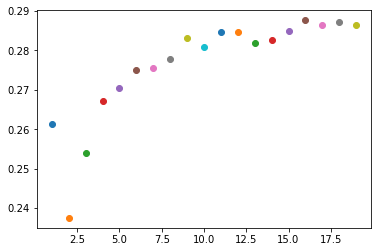

In [10]:
# Print the accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))
# plot observations
for k in range(1,20):
    accuracies = k_to_accuracies[k]
    print('k = %d, average accuracy = %f' % (k, np.average(accuracies)))
    plt.scatter([k] * len(accuracies), accuracies)

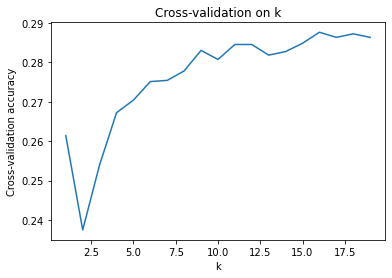

In [11]:
# plot trend line with error bars
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(range(1,20), accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()